In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data.csv')
splitted_columns = np.array_split(df.columns.values, 3)

In [3]:
def h(content): # Function for displaying content in HTML/Markdown format
    display(HTML(content)) # display content in HTML/Markdown format
    

def _desc(data, col, label): # Column description in a given dataset
    d0 = data.describe().reset_index() # Basic description (mean, std, min, max etc...) for a column
    d0.columns = [col, label]
    # Append column's unique values, number of NaNs, NaNs share and return it
    return d0.append({col:'unique values', label:data.unique().shape[0]}, ignore_index=True) \
             .append({col:'NaNs', label:data.isnull().sum()}, ignore_index=True) \
             .append({col:'NaNs share', label:np.round(data.isnull().sum() / data.shape[0], 4)}, ignore_index=True) \


def desc1(col): # Function for a column description
    d0 = _desc(df[col], col, 'Df') # Description for a column in the dataset
    d1 = _desc(df.loc[df['target'] == 1, col], col, 'Target 1') # Description for a column in the dataset where target is 1
    d2 = _desc(df.loc[df['target'] == 0, col], col, 'Target 0') # Description for a column in the dataset where target is 0
    dd = d0.merge(d1).merge(d2) # Merge all descriptive Datasets together
    display(dd) # Display the resulting descriptive Dataset

    if col not in ['id']:
        h('<b>Most popular values (NaN = -999):</b>')
        N = 10
        # Size, mean and sum results for the target column grouped by a given column in dataset
        d0 = df[['target',col]].fillna(-999).groupby(col)['target'].agg(['size','mean','sum']).reset_index().sort_values('size', ascending=False).reset_index(drop=True)
        # Count results for id column grouped by a given column in dataset
        d1 = df[['id',col]].fillna(-999).groupby(col)['id'].count().reset_index()
        dd = d0.merge(d1, how='left', on=col).head(N) # Merge d0 and d1 results together
        dd = dd.rename({'size':'Count in df (desc)','mean':'Mean target','sum':'Sum target','id':'Count in df'}, axis=1) # Renaming dataframe columns
        display(dd) # Display the resulting descriptive Dataset
        
        h('<b>Biggest sum values (NaN = -999):</b>')
        # Biggest values for d0 and d1 combined
        dd = d0.sort_values('sum', ascending=False).reset_index(drop=True).head(N).merge(d1, how='left', on=col)
        dd = dd.rename({'size':'Count in the dataframe','mean':'Mean target','sum':'Sum target (desc)','id':'Count in the dataframe'}, axis=1) # Renaming dataframe columns
        display(dd) # Display the resulting descriptive Dataset


def hist1(col): # Function for histogram
    plt.figure(figsize=(15, 3)) # Size of a plot
    plt.hist(df[col], bins=15); # Histogram for a given column
    plt.title('Dataframe histogram: ' + col); # Title for a histogram
    plt.show() # Show histogram


def corr1(col): # Function for the most correlated values for the given column - Correlation
    N = None
    num_vars = [f for f in df.columns if df[f].dtype != 'object'] # List of all numeric columns
    trx = df.head(N) if N is not None else df.copy() # Temporary dataframe for the correlation results
    # The most correlated columns with the given column (Only numeric columns)
    corrs = trx[num_vars].corrwith(trx[col]).reset_index().sort_values(0, ascending=False).reset_index(drop=True).rename({'index':'Column',0:'Correlation with ' + col}, axis=1)
    h('<b>Most correlated values with ' + col + ':</b>')
    trx = pd.concat([corrs.head(6), corrs.dropna().tail(5)]) # Final correlation results to dataframe
    def linkx(val):
        return '<a href="#c_{}">{}</a>'.format(val, val) if val in included_cols else val
    trx['Column'] = trx['Column'].apply(linkx)
    h(trx.to_html(escape=False))


def numeric(col): # EDA for numeric columns
    hist1(col) # Histogram
    desc1(col) # Description
    corr1(col) # Correlation


def proc(col): # Function for running eda
    if col not in ['id', 'target']:
        h('<h3 id="c_' + col + '">' + col + '</h3>')
        numeric(col) # Make EDA for a column

included_cols = list(df.columns.values)
# Shape of dataset
h('Dataframe shape: <b>' + str(df.shape) + '</b>')
# Preview
h('Dataframe preview:')
display(df.head(10))

id  target         var_0         var_1         var_2         var_3  \
0   0       1 -2.716667e+07  1.532973e+06 -1.382127e+07  2.829512e+06   
1   1       0 -3.717327e+07 -1.254214e+07 -2.467823e+07  1.652219e+06   
2   2       0 -3.766042e+07 -1.224612e+07 -2.413370e+07  7.697745e+05   
3   3       0 -3.822551e+07 -1.376055e+07 -2.434780e+07  3.935189e+06   
4   4       0 -3.884881e+07 -1.295881e+07 -2.331171e+07  5.057590e+06   
5   5       0 -1.477427e+07  1.079625e+07  1.419396e+06 -3.082950e+06   
6   6       0 -3.210121e+07 -8.519035e+06 -1.943330e+07  3.672805e+05   
7   7       0 -2.721042e+07 -3.990056e+06 -1.723738e+07 -3.645569e+06   
8   8       0 -2.712792e+07 -7.848829e+06 -1.565094e+07 -6.536734e+05   
9   9       1 -3.446131e+07 -1.097794e+07 -2.153013e+07 -1.056370e+06   

          var_4         var_5         var_6         var_7  ...   var_140  \
0  1.689719e+07 -6.725783e+05 -5.512402e+06  6.158191e+06  ...  0.067973   
1  6.419720e+06  3.089595e+06  1.525981e+06 -1.549544e+05  ...  1.455616   
2  7.279127e+06  3.904332e+06  1.568253e+06 -4.360454e+03  ...  5.271981   
3  3.161425e+06  4.321398e+05  2.836384e+05  4.994158e+05  ... -1.647516   
4 -2.125657e+06 -7.725465e+06 -6.210829e+05  1.065965e+06  ... -2.995177   
5 -3.953207e+06 -1.039908e+07  1.088852e+07  3.962243e+06  ...  0.352500   
6 -8.399175e+05 -3.805445e+06 -1.394731e+06  2.283690e+05  ...  0.056242   
7  7.070763e+05 -1.623434e+06 -1.137213e+06 -2.711271e+06  ... -0.339605   
8  4.711626e+05 -1.231139e+06  5.574122e+04 -4.099997e+06  ...  0.839943   
9  6.088588e+06  3.911451e+06  7.233767e+05 -9.964788e+03  ...  0.385339   

    var_141   var_142   var_143   var_144   var_145   var_146   var_147  \
0 -0.567163 -1.771328 -2.177941 -3.480699  0.208771 -0.889729 -0.669585   
1 -0.418064 -1.213405  0.076655 -0.385312 -0.795260 -1.041613 -1.009945   
2 -0.430013  0.754187  1.340762  3.892687 -2.510089 -2.013556  0.564031   
3  0.584338  0.515600  0.389583 -0.653244 -0.116140  0.153417  0.955127   
4  2.369432 -0.639060 -0.417412  0.402714 -0.332974 -1.516252 -0.042774   
5 -0.387407 -1.462615  0.019519 -0.745895 -1.748854  0.395627 -2.811710   
6  2.712449  0.468496  0.285748 -0.703557  0.359610  0.284084  0.905793   
7 -2.363523 -0.080223 -0.287477 -0.418941  0.112530 -0.548655  0.741536   
8 -0.448076  1.426673  0.509036  0.118612  0.422807  0.145720  0.811887   
9 -1.551219  1.805734  0.410338  1.274670  1.100202  0.244575  0.262775   

    var_148   var_149  
0  0.579225  0.615956  
1  0.510847  0.082466  
2 -1.232687  0.181147  
3 -0.198338 -0.130950  
4  0.452778  0.013317  
5  0.217636 -7.197802  
6 -1.803683 -0.821259  
7  1.113603 -0.678656  
8 -0.092680  0.072208  
9  0.665666 -0.068294  

[10 rows x 152 columns]

In [8]:
# Missing values
print('Number of NaNs in the dataframe:\n')
count = df.isnull().sum().sort_values(ascending=False)
percentage = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
missing = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])
missing

Number of NaNs in train_df in all columns:



Count  Percentage
id           0         0.0
var_102      0         0.0
var_95       0         0.0
var_96       0         0.0
var_97       0         0.0
...        ...         ...
var_49       0         0.0
var_50       0         0.0
var_51       0         0.0
var_52       0         0.0
var_149      0         0.0

[152 rows x 2 columns]

In [4]:
# target EDA
COL = 'target'
h('<h2 id="c_' + COL + '">' + COL)
h('This is target column.')
# 1 and 0 counts in target column
trx = df['target'].value_counts().reset_index().rename({'index':'Value','target':'Count'}, axis=1)
# Percentage of 1 and 0 in target column
trx['Share'] = np.round(trx['Count'] / trx['Count'].sum(), 6)
display(trx) # Display the resulting stats
corr1(COL) # Most correlated columns with target column

Value  Count  Share
0      0     88   0.88
1      1     12   0.12

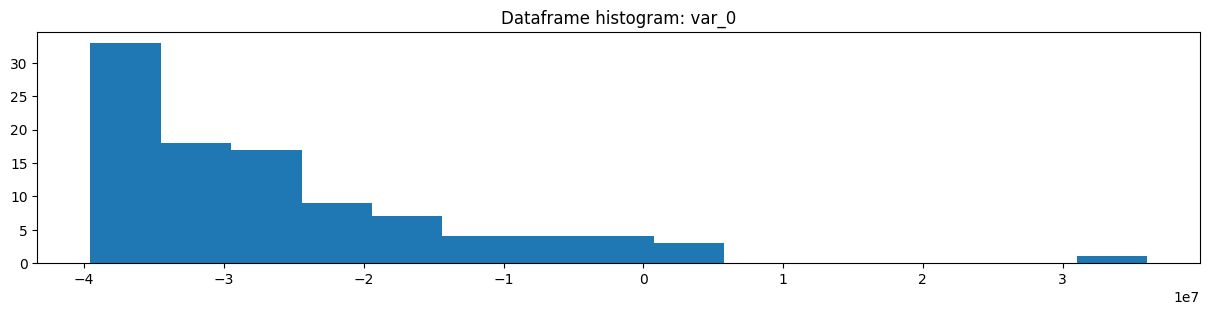

var_0            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean -2.633530e+07 -2.822998e+07 -2.607694e+07
2             std  1.313030e+07  1.128899e+07  1.339809e+07
3             min -3.956749e+07 -3.836012e+07 -3.956749e+07
4             25% -3.541903e+07 -3.525425e+07 -3.583462e+07
5             50% -2.953332e+07 -3.246144e+07 -2.926671e+07
6             75% -2.136343e+07 -2.497749e+07 -2.136343e+07
7             max  3.603420e+07  1.160047e+05  3.603420e+07
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_0  Count in df (desc)  Mean target  Sum target  Count in df
0 -3.956749e+07                   1          0.0           0            1
1 -2.631977e+07                   1          0.0           0            1
2 -2.181680e+07                   1          0.0           0            1
3 -2.246361e+07                   1          0.0           0            1
4 -2.260333e+07                   1          0.0           0            1
5 -2.313032e+07                   1          0.0           0            1
6 -2.313032e+07                   1          0.0           0            1
7 -2.317666e+07                   1          0.0           0            1
8 -2.486106e+07                   1          0.0           0            1
9 -2.563839e+07                   1          0.0           0            1

var_0  Count in the dataframe  Mean target  Sum target (desc)  \
0 -3.531423e+07                       1          1.0                  1   
1 -3.446131e+07                       1          1.0                  1   
2 -3.836012e+07                       1          1.0                  1   
3 -3.836012e+07                       1          1.0                  1   
4 -3.054164e+07                       1          1.0                  1   
5 -3.438124e+07                       1          1.0                  1   
6 -2.716667e+07                       1          1.0                  1   
7 -1.757229e+07                       1          1.0                  1   
8  1.160047e+05                       1          1.0                  1   
9 -2.907394e+07                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

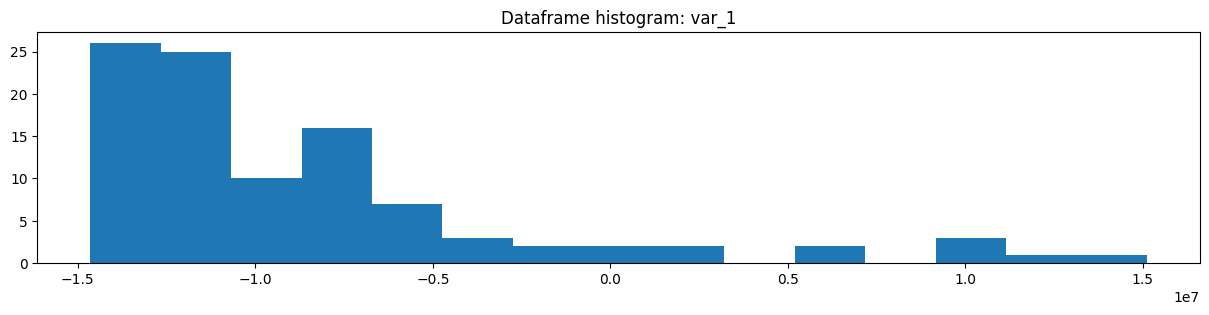

var_1            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean -8.456748e+06 -1.010816e+07 -8.231555e+06
2             std  6.406845e+06  4.548580e+06  6.608028e+06
3             min -1.465029e+07 -1.465029e+07 -1.416903e+07
4             25% -1.298428e+07 -1.351745e+07 -1.265354e+07
5             50% -1.078073e+07 -1.100614e+07 -1.026793e+07
6             75% -7.058171e+06 -9.667837e+06 -7.000176e+06
7             max  1.511630e+07  1.532973e+06  1.511630e+07
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_1  Count in df (desc)  Mean target  Sum target  Count in df
0 -1.465029e+07                   1          1.0           1            1
1 -8.519035e+06                   1          0.0           0            1
2 -7.077503e+06                   1          0.0           0            1
3 -7.159407e+06                   1          0.0           0            1
4 -7.248230e+06                   1          1.0           1            1
5 -7.332201e+06                   1          0.0           0            1
6 -7.520936e+06                   1          0.0           0            1
7 -7.520936e+06                   1          0.0           0            1
8 -7.560225e+06                   1          0.0           0            1
9 -7.848829e+06                   1          0.0           0            1

var_1  Count in the dataframe  Mean target  Sum target (desc)  \
0 -1.465029e+07                       1          1.0                  1   
1 -1.345476e+07                       1          1.0                  1   
2 -1.097794e+07                       1          1.0                  1   
3 -1.099525e+07                       1          1.0                  1   
4 -1.101704e+07                       1          1.0                  1   
5  1.532973e+06                       1          1.0                  1   
6 -1.122857e+07                       1          1.0                  1   
7 -1.370553e+07                       1          1.0                  1   
8 -1.370553e+07                       1          1.0                  1   
9 -5.373344e+06                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

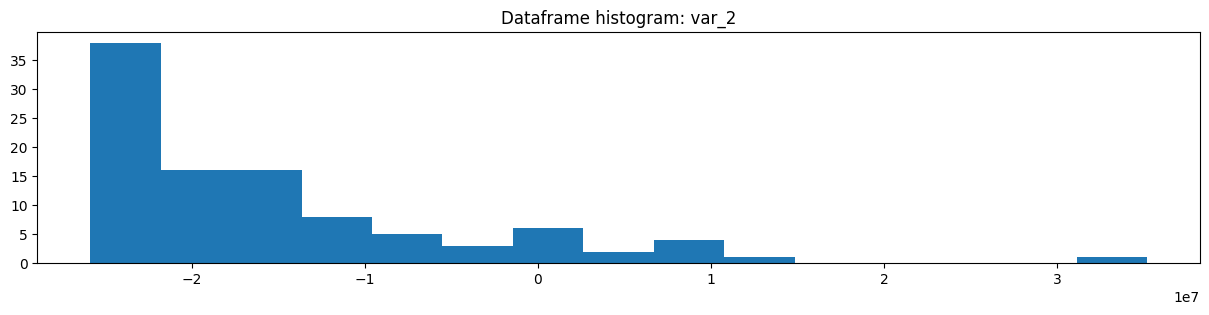

var_2            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean -1.540778e+07 -1.830765e+07 -1.501234e+07
2             std  1.114433e+07  7.454253e+06  1.153182e+07
3             min -2.585737e+07 -2.561006e+07 -2.585737e+07
4             25% -2.345646e+07 -2.316118e+07 -2.346626e+07
5             50% -1.884442e+07 -1.973667e+07 -1.876291e+07
6             75% -1.190931e+07 -1.632145e+07 -1.179766e+07
7             max  3.519209e+07  1.728850e+06  3.519209e+07
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_2  Count in df (desc)  Mean target  Sum target  Count in df
0 -2.585737e+07                   1          0.0           0            1
1 -1.565094e+07                   1          0.0           0            1
2 -1.205873e+07                   1          0.0           0            1
3 -1.210234e+07                   1          0.0           0            1
4 -1.250991e+07                   1          0.0           0            1
5 -1.286985e+07                   1          0.0           0            1
6 -1.382127e+07                   1          1.0           1            1
7 -1.451531e+07                   1          0.0           0            1
8 -1.509716e+07                   1          0.0           0            1
9 -1.513141e+07                   1          0.0           0            1

var_2  Count in the dataframe  Mean target  Sum target (desc)  \
0 -1.861280e+07                       1          1.0                  1   
1 -1.513919e+07                       1          1.0                  1   
2 -2.561006e+07                       1          1.0                  1   
3 -2.561006e+07                       1          1.0                  1   
4  1.728850e+06                       1          1.0                  1   
5 -2.086054e+07                       1          1.0                  1   
6 -1.681615e+07                       1          1.0                  1   
7 -1.671554e+07                       1          1.0                  1   
8 -2.153013e+07                       1          1.0                  1   
9 -2.373492e+07                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

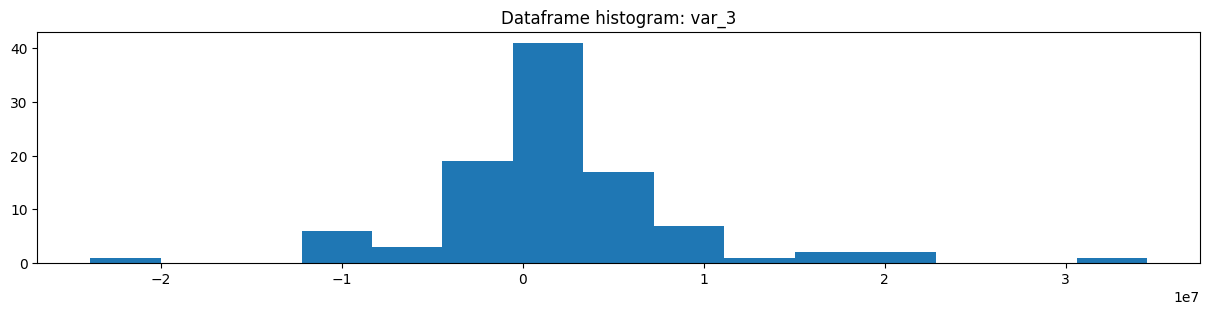

var_3            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean  1.901847e+06  1.087997e+06  2.012826e+06
2             std  7.021839e+06  4.741710e+06  7.291123e+06
3             min -2.392215e+07 -8.716271e+06 -2.392215e+07
4             25% -7.744723e+05 -9.868861e+05 -7.113881e+05
5             50%  1.652945e+06  2.327176e+06  1.621086e+06
6             75%  3.935189e+06  3.379592e+06  3.935189e+06
7             max  3.450394e+07  8.002089e+06  3.450394e+07
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_3  Count in df (desc)  Mean target  Sum target  Count in df
0 -2.392215e+07                   1          0.0           0            1
1  2.636896e+06                   1          0.0           0            1
2  3.834561e+06                   1          0.0           0            1
3  3.574450e+06                   1          0.0           0            1
4  3.491738e+06                   1          0.0           0            1
5  3.491738e+06                   1          0.0           0            1
6  3.306687e+06                   1          0.0           0            1
7  3.196329e+06                   1          0.0           0            1
8  3.196329e+06                   1          0.0           0            1
9  3.044323e+06                   1          0.0           0            1

var_3  Count in the dataframe  Mean target  Sum target (desc)  \
0  2.445403e+06                       1          1.0                  1   
1 -3.585572e+04                       1          1.0                  1   
2  2.327176e+06                       1          1.0                  1   
3  2.327176e+06                       1          1.0                  1   
4 -1.056370e+06                       1          1.0                  1   
5  6.306373e+06                       1          1.0                  1   
6 -5.439376e+06                       1          1.0                  1   
7  2.829512e+06                       1          1.0                  1   
8  8.002089e+06                       1          1.0                  1   
9  5.029832e+06                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

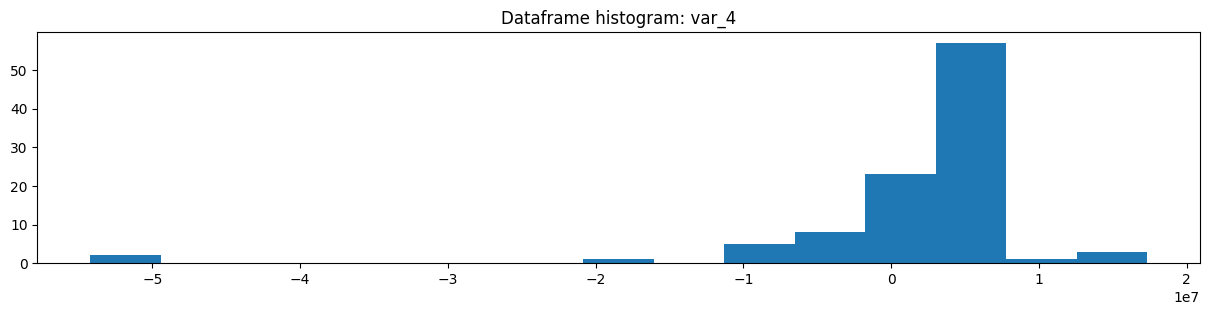

var_4            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean  1.790156e+06  5.319498e+06  1.308882e+06
2             std  9.602118e+06  5.176659e+06  9.978847e+06
3             min -5.420808e+07 -6.724515e+06 -5.420808e+07
4             25%  6.449062e+05  3.926409e+06  4.711626e+05
5             50%  3.959806e+06  6.026868e+06  3.451795e+06
6             75%  6.049792e+06  6.192294e+06  5.961904e+06
7             max  1.731958e+07  1.689719e+07  1.731958e+07
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_4  Count in df (desc)  Mean target  Sum target  Count in df
0 -5.420808e+07                   1          0.0           0            1
1  4.907294e+06                   1          0.0           0            1
2  6.026868e+06                   1          1.0           1            1
3  6.026868e+06                   1          1.0           1            1
4  5.968439e+06                   1          0.0           0            1
5  5.959725e+06                   1          0.0           0            1
6  5.894683e+06                   1          1.0           1            1
7  5.848338e+06                   1          0.0           0            1
8  5.740311e+06                   1          0.0           0            1
9  5.302016e+06                   1          0.0           0            1

var_4  Count in the dataframe  Mean target  Sum target (desc)  \
0  6.088588e+06                       1          1.0                  1   
1  3.144487e+06                       1          1.0                  1   
2  3.255095e+06                       1          1.0                  1   
3  6.534260e+06                       1          1.0                  1   
4  6.503410e+06                       1          1.0                  1   
5  4.150181e+06                       1          1.0                  1   
6  6.036859e+06                       1          1.0                  1   
7 -6.724515e+06                       1          1.0                  1   
8  5.894683e+06                       1          1.0                  1   
9  1.689719e+07                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

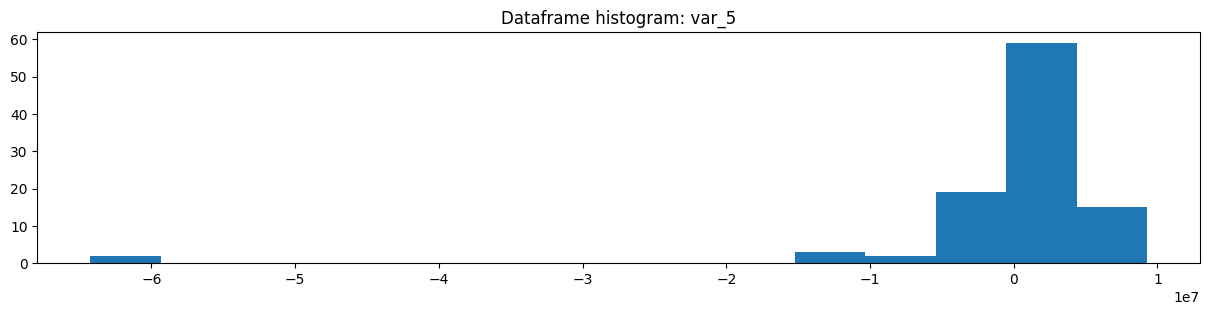

var_5            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean  1.317763e+05  4.257526e+06 -4.308260e+05
2             std  1.012743e+07  3.091943e+06  1.062239e+07
3             min -6.425594e+07 -6.725783e+05 -6.425594e+07
4             25% -6.310401e+05  2.202769e+06 -1.231139e+06
5             50%  2.192607e+06  3.871957e+06  1.742550e+06
6             75%  3.850430e+06  5.924694e+06  3.725674e+06
7             max  9.275873e+06  9.275873e+06  9.242141e+06
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_5  Count in df (desc)  Mean target  Sum target  Count in df
0 -6.425594e+07                   1          0.0           0            1
1  3.089595e+06                   1          0.0           0            1
2  3.829553e+06                   1          0.0           0            1
3  3.825235e+06                   1          1.0           1            1
4  3.748475e+06                   1          0.0           0            1
5  3.725674e+06                   1          0.0           0            1
6  3.725674e+06                   1          0.0           0            1
7  3.419004e+06                   1          0.0           0            1
8  3.376785e+06                   1          0.0           0            1
9  3.266780e+06                   1          0.0           0            1

var_5  Count in the dataframe  Mean target  Sum target (desc)  \
0  9.275873e+06                       1          1.0                  1   
1  2.202769e+06                       1          1.0                  1   
2  6.876596e+06                       1          1.0                  1   
3  3.911451e+06                       1          1.0                  1   
4  3.832463e+06                       1          1.0                  1   
5  2.202769e+06                       1          1.0                  1   
6  5.607393e+06                       1          1.0                  1   
7  4.177401e+06                       1          1.0                  1   
8  9.235905e+06                       1          1.0                  1   
9  3.825235e+06                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

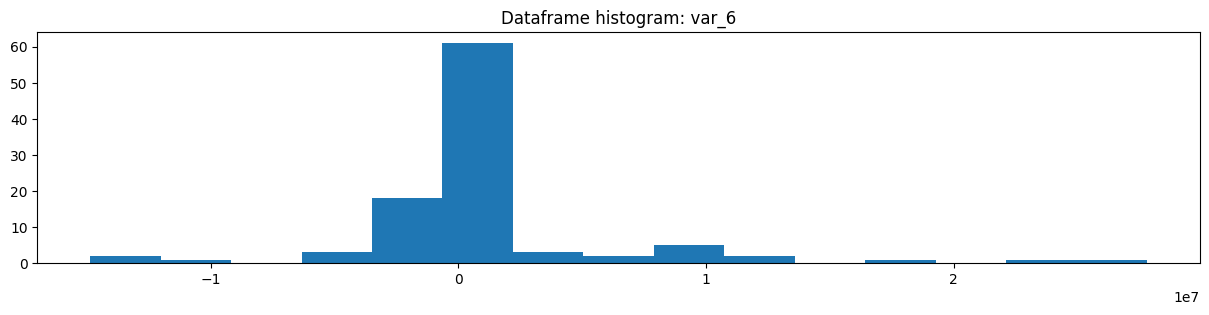

var_6            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean  1.245533e+06 -3.715994e+04  1.420446e+06
2             std  5.478592e+06  2.027686e+06  5.777304e+06
3             min -1.487056e+07 -5.512402e+06 -1.487056e+07
4             25% -6.204411e+05 -6.800807e+05 -6.204411e+05
5             50%  8.210785e+05  7.701303e+05  8.382140e+05
6             75%  1.504209e+06  1.253911e+06  1.530193e+06
7             max  2.780276e+07  2.017125e+06  2.780276e+07
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_6  Count in df (desc)  Mean target  Sum target  Count in df
0 -1.487056e+07                   1          0.0           0            1
1  1.321344e+06                   1          0.0           0            1
2  1.473592e+06                   1          0.0           0            1
3  1.447340e+06                   1          1.0           1            1
4  1.444496e+06                   1          0.0           0            1
5  1.444496e+06                   1          0.0           0            1
6  1.422670e+06                   1          0.0           0            1
7  1.418521e+06                   1          0.0           0            1
8  1.418521e+06                   1          0.0           0            1
9  1.385153e+06                   1          0.0           0            1

var_6  Count in the dataframe  Mean target  Sum target (desc)  \
0 -1.166798e+06                       1          1.0                  1   
1  9.273184e+05                       1          1.0                  1   
2 -3.740338e+05                       1          1.0                  1   
3  1.447340e+06                       1          1.0                  1   
4  8.168838e+05                       1          1.0                  1   
5  1.253911e+06                       1          1.0                  1   
6 -5.178418e+05                       1          1.0                  1   
7  1.253911e+06                       1          1.0                  1   
8 -5.512402e+06                       1          1.0                  1   
9  7.233767e+05                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

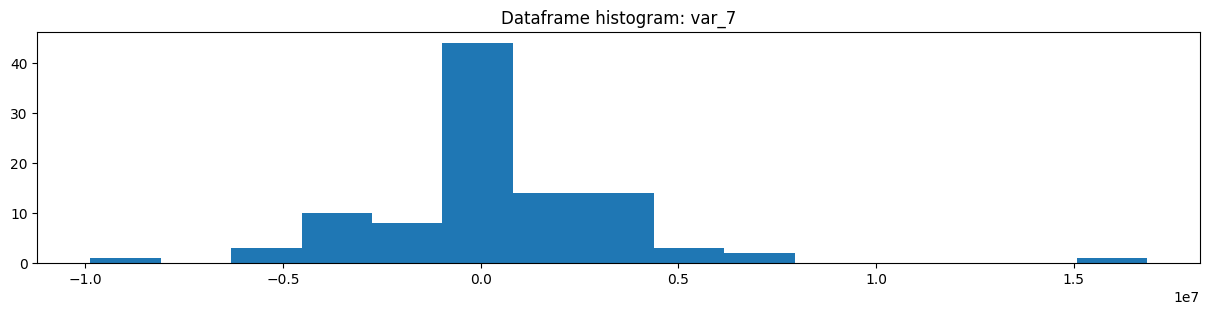

var_7            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean  4.274652e+05  8.962537e+05  3.635395e+05
2             std  3.201802e+06  2.602106e+06  3.282529e+06
3             min -9.875758e+06 -4.663119e+06 -9.875758e+06
4             25% -5.313466e+05 -9.203266e+04 -8.418876e+05
5             50%  3.335404e+05  3.578310e+05  3.161856e+05
6             75%  1.854896e+06  2.140446e+06  1.538580e+06
7             max  1.684855e+07  6.158191e+06  1.684855e+07
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_7  Count in df (desc)  Mean target  Sum target  Count in df
0 -9.875758e+06                   1          0.0           0            1
1  7.334428e+05                   1          0.0           0            1
2  1.438642e+06                   1          0.0           0            1
3  1.195703e+06                   1          0.0           0            1
4  1.173774e+06                   1          0.0           0            1
5  1.149064e+06                   1          0.0           0            1
6  1.065965e+06                   1          0.0           0            1
7  1.013966e+06                   1          1.0           1            1
8  8.879714e+05                   1          0.0           0            1
9  8.309559e+05                   1          0.0           0            1

var_7  Count in the dataframe  Mean target  Sum target (desc)  \
0  3.335404e+05                       1          1.0                  1   
1 -9.964788e+03                       1          1.0                  1   
2 -4.663119e+06                       1          1.0                  1   
3  1.904403e+06                       1          1.0                  1   
4  3.821216e+05                       1          1.0                  1   
5  3.306743e+06                       1          1.0                  1   
6  6.158191e+06                       1          1.0                  1   
7  2.848576e+06                       1          1.0                  1   
8 -5.147167e+05                       1          1.0                  1   
9  1.013966e+06                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

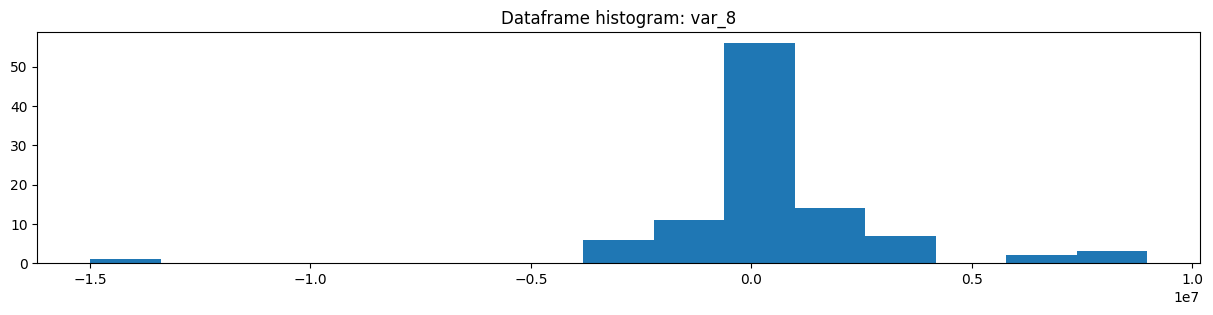

var_8            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean  4.321970e+05 -4.654264e+05  5.546002e+05
2             std  2.673166e+06  1.302041e+06  2.791202e+06
3             min -1.499257e+07 -3.356191e+06 -1.499257e+07
4             25% -2.663482e+05 -1.059453e+06 -2.281223e+05
5             50%  1.450563e+05  1.112746e+05  1.569782e+05
6             75%  1.033298e+06  3.689345e+05  1.122562e+06
7             max  8.970458e+06  8.029338e+05  8.970458e+06
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_8  Count in df (desc)  Mean target  Sum target  Count in df
0 -1.499257e+07                   1          0.0           0            1
1  5.194612e+05                   1          0.0           0            1
2  9.719094e+05                   1          0.0           0            1
3  9.624299e+05                   1          0.0           0            1
4  9.176324e+05                   1          0.0           0            1
5  9.176324e+05                   1          0.0           0            1
6  8.970778e+05                   1          0.0           0            1
7  8.029338e+05                   1          1.0           1            1
8  7.882533e+05                   1          1.0           1            1
9  7.064290e+05                   1          0.0           0            1

var_8  Count in the dataframe  Mean target  Sum target (desc)  \
0  3.576238e+05                       1          1.0                  1   
1 -7.973897e+05                       1          1.0                  1   
2 -2.278541e+05                       1          1.0                  1   
3 -2.070762e+06                       1          1.0                  1   
4  8.405257e+04                       1          1.0                  1   
5 -1.845643e+06                       1          1.0                  1   
6  4.028668e+05                       1          1.0                  1   
7 -3.356191e+06                       1          1.0                  1   
8  1.384967e+05                       1          1.0                  1   
9  7.882533e+05                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

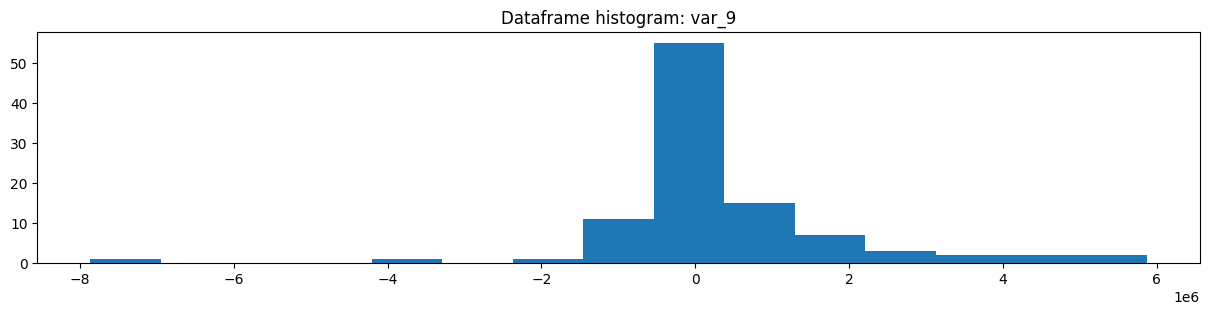

var_9            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean  2.713488e+05  7.257726e+05  2.093819e+05
2             std  1.638628e+06  2.102792e+06  1.569721e+06
3             min -7.870110e+06 -1.527581e+06 -7.870110e+06
4             25% -3.050408e+05 -3.556181e+05 -2.960879e+05
5             50% -7.652098e+04 -1.406972e+05 -6.608863e+04
6             75%  5.579550e+05  9.601757e+05  5.575467e+05
7             max  5.876321e+06  5.876321e+06  5.651768e+06
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_9  Count in df (desc)  Mean target  Sum target  Count in df
0 -7.870110e+06                   1          0.0           0            1
1  1.009513e+05                   1          0.0           0            1
2  5.520923e+05                   1          0.0           0            1
3  5.014595e+05                   1          0.0           0            1
4  4.722090e+05                   1          0.0           0            1
5  4.590151e+05                   1          0.0           0            1
6  4.315818e+05                   1          0.0           0            1
7  2.974796e+05                   1          0.0           0            1
8  1.727680e+05                   1          1.0           1            1
9  1.435448e+05                   1          0.0           0            1

var_9  Count in the dataframe  Mean target  Sum target (desc)  \
0  5.876321e+06                       1          1.0                  1   
1 -1.536300e+05                       1          1.0                  1   
2  3.461438e+06                       1          1.0                  1   
3  5.526368e+05                       1          1.0                  1   
4  2.182792e+06                       1          1.0                  1   
5 -8.050135e+05                       1          1.0                  1   
6 -1.527581e+06                       1          1.0                  1   
7 -4.423624e+05                       1          1.0                  1   
8 -1.277643e+05                       1          1.0                  1   
9  1.727680e+05                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

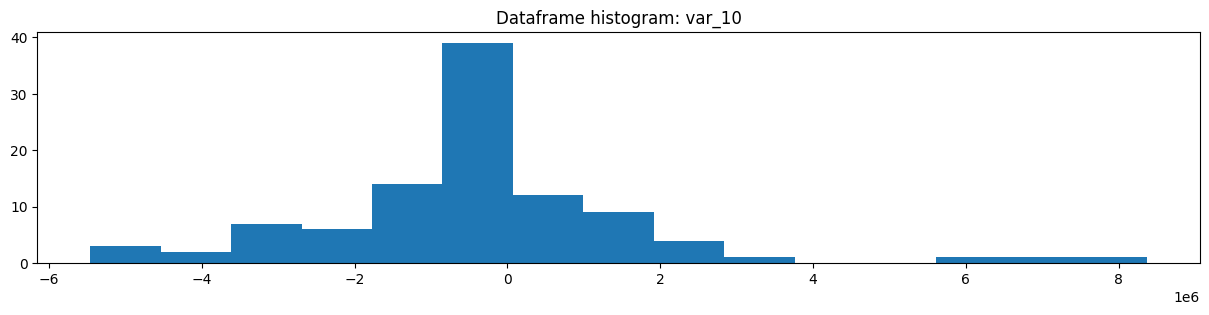

var_10            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean -4.163837e+05 -1.145432e+06 -3.169680e+05
2             std  2.118494e+06  1.887255e+06  2.138554e+06
3             min -5.460978e+06 -5.460978e+06 -5.437457e+06
4             25% -1.284095e+06 -1.995438e+06 -1.254877e+06
5             50% -5.211654e+05 -7.459956e+05 -4.618132e+05
6             75%  4.829728e+05 -9.570658e+03  5.005821e+05
7             max  8.372050e+06  1.332556e+06  8.372050e+06
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_10  Count in df (desc)  Mean target  Sum target  Count in df
0 -5.460978e+06                   1          1.0           1            1
1 -1.855112e+05                   1          1.0           1            1
2  4.712134e+05                   1          0.0           0            1
3  3.526228e+05                   1          0.0           0            1
4  2.064869e+05                   1          0.0           0            1
5 -1.334631e+04                   1          0.0           0            1
6 -3.083031e+04                   1          0.0           0            1
7 -5.871799e+04                   1          0.0           0            1
8 -7.539011e+04                   1          0.0           0            1
9 -7.539011e+04                   1          0.0           0            1

var_10  Count in the dataframe  Mean target  Sum target (desc)  \
0 -5.460978e+06                       1          1.0                  1   
1 -7.459956e+05                       1          1.0                  1   
2 -1.855112e+05                       1          1.0                  1   
3 -1.871998e+06                       1          1.0                  1   
4 -2.365759e+06                       1          1.0                  1   
5  1.332556e+06                       1          1.0                  1   
6 -3.303829e+06                       1          1.0                  1   
7  5.182510e+05                       1          1.0                  1   
8 -1.255814e+06                       1          1.0                  1   
9 -7.459956e+05                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

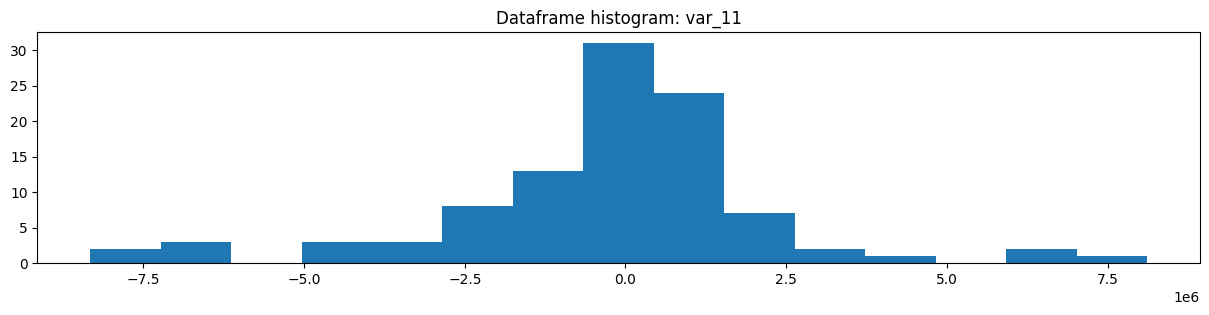

var_11            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean -2.763002e+05  7.883773e+05 -4.214835e+05
2             std  2.549291e+06  7.213768e+05  2.674288e+06
3             min -8.327729e+06 -1.705986e+05 -8.327729e+06
4             25% -1.106952e+06  1.447799e+05 -1.438737e+06
5             50%  1.677868e+05  7.124545e+05  1.300006e+05
6             75%  6.251030e+05  1.382028e+06  5.709569e+05
7             max  8.113419e+06  1.896536e+06  8.113419e+06
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_11  Count in df (desc)  Mean target  Sum target  Count in df
0 -8.327729e+06                   1          0.0           0            1
1  4.413627e+05                   1          0.0           0            1
2  6.163291e+05                   1          0.0           0            1
3  6.102708e+05                   1          1.0           1            1
4  6.037951e+05                   1          0.0           0            1
5  5.600109e+05                   1          0.0           0            1
6  5.535307e+05                   1          0.0           0            1
7  5.462498e+05                   1          0.0           0            1
8  5.462498e+05                   1          0.0           0            1
9  5.050283e+05                   1          0.0           0            1

var_11  Count in the dataframe  Mean target  Sum target (desc)  \
0  1.744521e+05                       1          1.0                  1   
1  1.054072e+06                       1          1.0                  1   
2  1.896536e+06                       1          1.0                  1   
3  1.793598e+06                       1          1.0                  1   
4  5.576313e+04                       1          1.0                  1   
5  5.576313e+04                       1          1.0                  1   
6  3.365557e+05                       1          1.0                  1   
7  1.495158e+06                       1          1.0                  1   
8  1.344318e+06                       1          1.0                  1   
9 -1.705986e+05                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

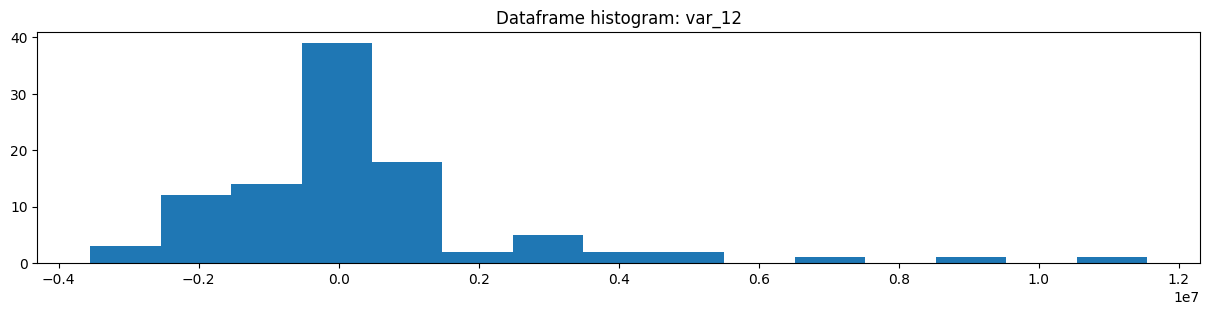

var_12            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean  3.297553e+05 -2.592774e+05  4.100779e+05
2             std  2.203147e+06  8.384979e+05  2.319499e+06
3             min -3.548084e+06 -1.976355e+06 -3.548084e+06
4             25% -7.072793e+05 -6.425305e+05 -7.072793e+05
5             50%  9.237076e+04 -5.314698e+04  2.321333e+05
6             75%  6.227889e+05  1.267196e+05  7.505144e+05
7             max  1.154726e+07  1.140866e+06  1.154726e+07
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_12  Count in df (desc)  Mean target  Sum target  Count in df
0 -3.548084e+06                   1          0.0           0            1
1  3.313986e+05                   1          0.0           0            1
2  6.059598e+05                   1          0.0           0            1
3  5.905250e+05                   1          0.0           0            1
4  5.843927e+05                   1          0.0           0            1
5  5.059456e+05                   1          0.0           0            1
6  4.821020e+05                   1          0.0           0            1
7  4.821020e+05                   1          0.0           0            1
8  4.069120e+05                   1          1.0           1            1
9  3.753177e+05                   1          1.0           1            1

var_12  Count in the dataframe  Mean target  Sum target (desc)  \
0 -2.128229e+05                       1          1.0                  1   
1  4.385363e+04                       1          1.0                  1   
2 -3.771822e+04                       1          1.0                  1   
3  4.385363e+04                       1          1.0                  1   
4 -1.281508e+06                       1          1.0                  1   
5  1.140866e+06                       1          1.0                  1   
6  3.753177e+05                       1          1.0                  1   
7  4.069120e+05                       1          1.0                  1   
8 -1.976355e+06                       1          1.0                  1   
9 -5.124848e+05                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

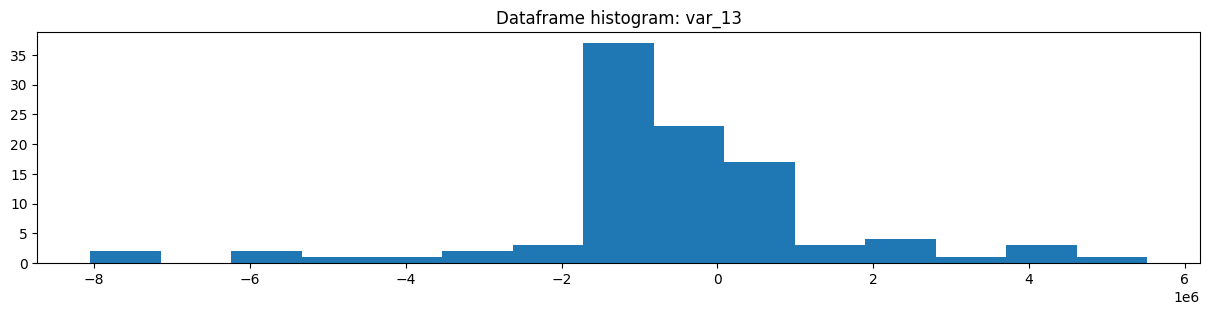

var_13            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean -5.593006e+05 -6.430880e+05 -5.478751e+05
2             std  2.042494e+06  8.029827e+05  2.159763e+06
3             min -8.049400e+06 -1.691714e+06 -8.049400e+06
4             25% -1.184055e+06 -1.139568e+06 -1.184055e+06
5             50% -7.707631e+05 -8.260127e+05 -7.543855e+05
6             75%  3.703575e+05 -5.077432e+05  3.938048e+05
7             max  5.513759e+06  1.286818e+06  5.513759e+06
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_13  Count in df (desc)  Mean target  Sum target  Count in df
0 -8.049400e+06                   1          0.0           0            1
1 -1.483767e+05                   1          0.0           0            1
2  3.634719e+05                   1          0.0           0            1
3  3.311820e+05                   1          0.0           0            1
4  2.349626e+05                   1          1.0           1            1
5  6.508534e+04                   1          0.0           0            1
6 -1.625141e+04                   1          1.0           1            1
7 -3.316028e+04                   1          0.0           0            1
8 -3.460015e+04                   1          0.0           0            1
9 -8.684088e+04                   1          0.0           0            1

var_13  Count in the dataframe  Mean target  Sum target (desc)  \
0 -7.348846e+05                       1          1.0                  1   
1 -1.104204e+06                       1          1.0                  1   
2 -9.171407e+05                       1          1.0                  1   
3 -9.250228e+05                       1          1.0                  1   
4 -6.867284e+05                       1          1.0                  1   
5 -6.715739e+05                       1          1.0                  1   
6  1.286818e+06                       1          1.0                  1   
7 -1.691714e+06                       1          1.0                  1   
8 -1.245658e+06                       1          1.0                  1   
9  2.349626e+05                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

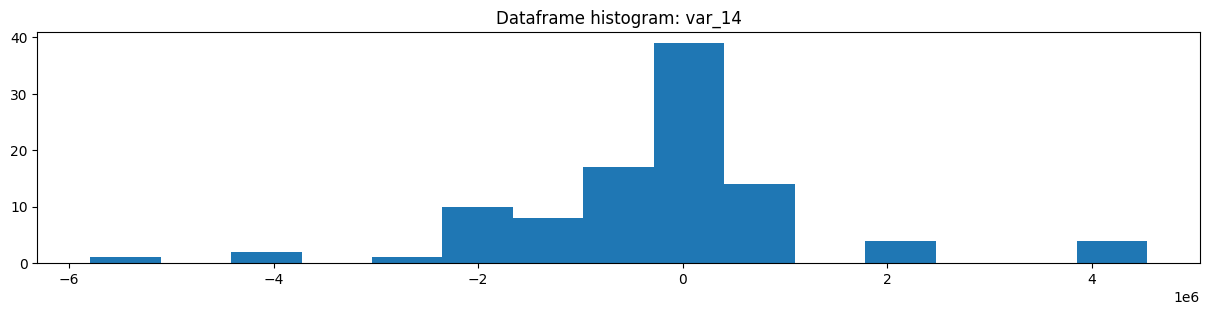

var_14            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean -1.751889e+05 -1.360800e+05 -1.805219e+05
2             std  1.505255e+06  8.827168e+05  1.574661e+06
3             min -5.792511e+06 -2.216250e+06 -5.792511e+06
4             25% -7.466607e+05 -3.151411e+05 -8.013230e+05
5             50%  2.107935e+04  2.086585e+04  2.107935e+04
6             75%  3.578217e+05  3.323306e+05  3.578217e+05
7             max  4.540467e+06  1.080745e+06  4.540467e+06
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_14  Count in df (desc)  Mean target  Sum target  Count in df
0 -5.792511e+06                   1          0.0           0            1
1  1.642583e+05                   1          1.0           1            1
2  3.208997e+05                   1          0.0           0            1
3  3.060564e+05                   1          1.0           1            1
4  2.993429e+05                   1          0.0           0            1
5  2.875530e+05                   1          0.0           0            1
6  2.832911e+05                   1          0.0           0            1
7  2.657827e+05                   1          0.0           0            1
8  2.631737e+05                   1          0.0           0            1
9  2.316925e+05                   1          0.0           0            1

var_14  Count in the dataframe  Mean target  Sum target (desc)  \
0 -2.216250e+06                       1          1.0                  1   
1 -1.260303e+06                       1          1.0                  1   
2 -2.524294e+05                       1          1.0                  1   
3  7.268136e+05                       1          1.0                  1   
4 -3.129146e+05                       1          1.0                  1   
5  1.642583e+05                       1          1.0                  1   
6 -3.218206e+05                       1          1.0                  1   
7  1.080745e+06                       1          1.0                  1   
8  4.111531e+05                       1          1.0                  1   
9  1.642583e+05                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

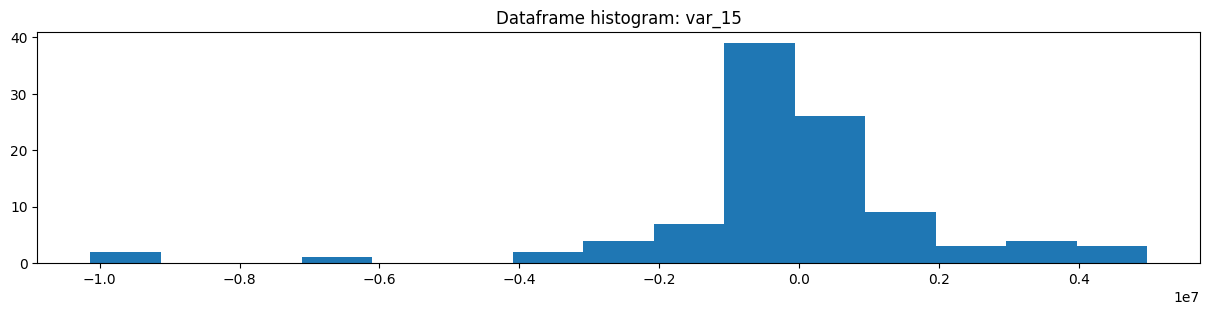

var_15            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean -1.753367e+05 -6.474360e+05 -1.109596e+05
2             std  2.181015e+06  8.382391e+05  2.299819e+06
3             min -1.013583e+07 -2.283229e+06 -1.013583e+07
4             25% -6.880429e+05 -9.145404e+05 -6.645823e+05
5             50% -3.870550e+05 -6.190946e+05 -6.841779e+04
6             75%  6.860510e+05 -5.110796e+05  7.314203e+05
7             max  4.977763e+06  1.474865e+06  4.977763e+06
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_15  Count in df (desc)  Mean target  Sum target  Count in df
0 -1.013583e+07                   1          0.0           0            1
1  1.315133e+05                   1          0.0           0            1
2  6.725170e+05                   1          0.0           0            1
3  5.873831e+05                   1          0.0           0            1
4  5.869427e+05                   1          0.0           0            1
5  5.201684e+05                   1          0.0           0            1
6  4.630503e+05                   1          0.0           0            1
7  3.469532e+05                   1          0.0           0            1
8  3.444672e+05                   1          0.0           0            1
9  3.214766e+05                   1          0.0           0            1

var_15  Count in the dataframe  Mean target  Sum target (desc)  \
0 -7.054110e+05                       1          1.0                  1   
1 -5.304404e+05                       1          1.0                  1   
2 -2.283229e+06                       1          1.0                  1   
3  1.474865e+06                       1          1.0                  1   
4 -4.438233e+05                       1          1.0                  1   
5 -4.529973e+05                       1          1.0                  1   
6 -9.276569e+05                       1          1.0                  1   
7 -9.101682e+05                       1          1.0                  1   
8 -1.191586e+06                       1          1.0                  1   
9 -6.190946e+05                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

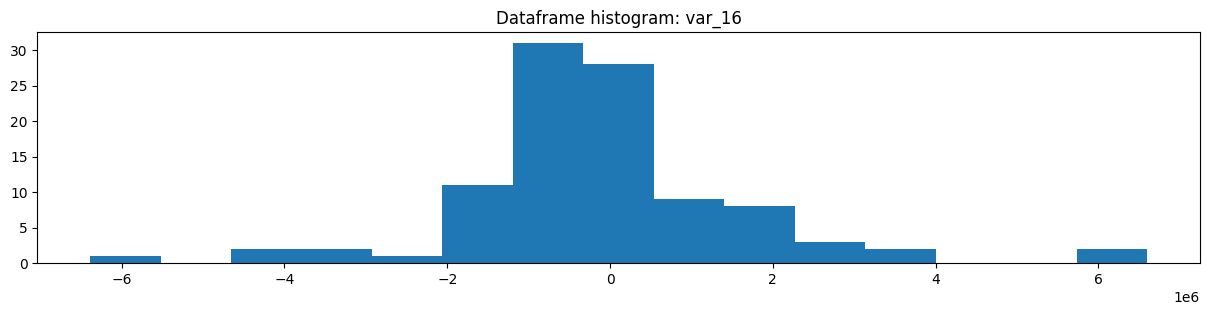

var_16            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean -6.236437e+04  2.065933e+04 -7.368579e+04
2             std  1.742752e+06  5.606677e+05  1.848047e+06
3             min -6.387423e+06 -5.797967e+05 -6.387423e+06
4             25% -6.336816e+05 -3.073592e+05 -7.172951e+05
5             50% -3.092064e+05 -2.518087e+05 -3.746202e+05
6             75%  4.797960e+05  2.722808e+05  4.948621e+05
7             max  6.597484e+06  1.052390e+06  6.597484e+06
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_16  Count in df (desc)  Mean target  Sum target  Count in df
0 -6.387423e+06                   1          0.0           0            1
1 -2.769619e+04                   1          0.0           0            1
2  4.672125e+05                   1          0.0           0            1
3  4.667036e+05                   1          0.0           0            1
4  4.512820e+05                   1          0.0           0            1
5  4.452315e+05                   1          0.0           0            1
6  3.898068e+05                   1          0.0           0            1
7  2.548772e+05                   1          0.0           0            1
8  1.905255e+05                   1          1.0           1            1
9  1.563315e+05                   1          0.0           0            1

var_16  Count in the dataframe  Mean target  Sum target (desc)  \
0 -3.055120e+05                       1          1.0                  1   
1  1.052390e+06                       1          1.0                  1   
2 -3.129007e+05                       1          1.0                  1   
3 -2.699566e+05                       1          1.0                  1   
4 -2.852218e+05                       1          1.0                  1   
5 -5.797967e+05                       1          1.0                  1   
6 -5.797967e+05                       1          1.0                  1   
7  1.905255e+05                       1          1.0                  1   
8 -2.336609e+05                       1          1.0                  1   
9  6.719883e+04                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

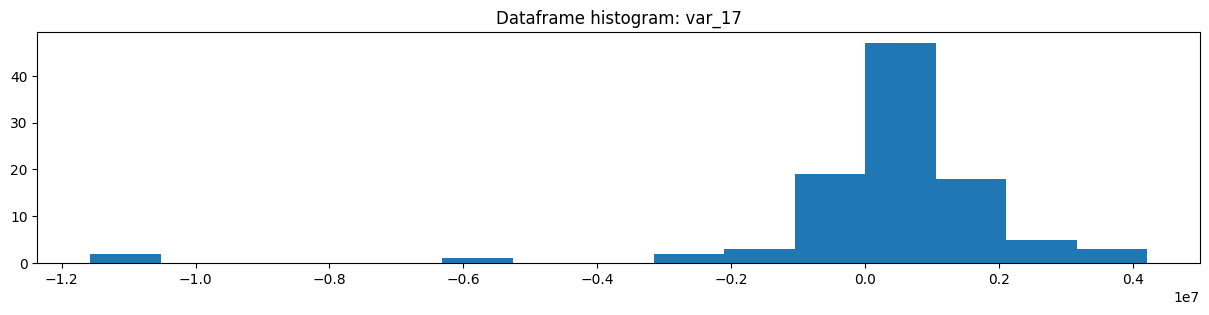

var_17            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean  3.188845e+05  7.035449e+05  2.664309e+05
2             std  2.141284e+06  5.673633e+05  2.270161e+06
3             min -1.157381e+07 -6.577845e+05 -1.157381e+07
4             25% -3.977496e+04  4.129076e+05 -1.770516e+05
5             50%  6.432885e+05  6.572596e+05  6.377593e+05
6             75%  1.061287e+06  1.068124e+06  1.061287e+06
7             max  4.213895e+06  1.511073e+06  4.213895e+06
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_17  Count in df (desc)  Mean target  Sum target  Count in df
0 -1.157381e+07                   1          0.0           0            1
1  7.218795e+05                   1          0.0           0            1
2  1.052567e+06                   1          0.0           0            1
3  1.029505e+06                   1          1.0           1            1
4  9.523328e+05                   1          1.0           1            1
5  8.030598e+05                   1          0.0           0            1
6  7.931294e+05                   1          0.0           0            1
7  7.471458e+05                   1          0.0           0            1
8  7.419959e+05                   1          0.0           0            1
9  7.419959e+05                   1          0.0           0            1

var_17  Count in the dataframe  Mean target  Sum target (desc)  \
0  4.129076e+05                       1          1.0                  1   
1  1.183979e+06                       1          1.0                  1   
2 -6.577845e+05                       1          1.0                  1   
3  4.129076e+05                       1          1.0                  1   
4  1.511073e+06                       1          1.0                  1   
5  3.755089e+05                       1          1.0                  1   
6  6.143971e+05                       1          1.0                  1   
7  1.293192e+06                       1          1.0                  1   
8  6.481440e+05                       1          1.0                  1   
9  9.523328e+05                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

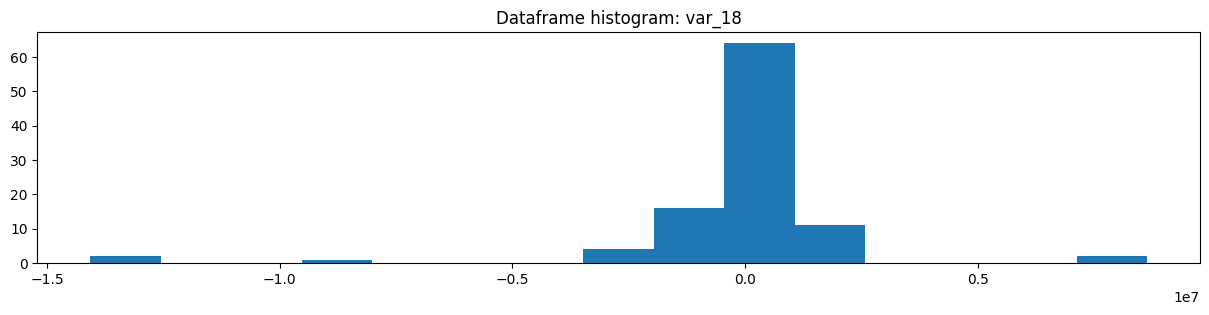

var_18            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean  2.701723e+04  6.057309e+05 -5.189828e+04
2             std  2.702091e+06  4.939585e+05  2.867931e+06
3             min -1.407090e+07 -2.449284e+05 -1.407090e+07
4             25% -2.710600e+05  3.179951e+05 -5.008801e+05
5             50%  5.153256e+05  6.029653e+05  5.064683e+05
6             75%  8.199225e+05  8.089068e+05  8.281512e+05
7             max  8.632197e+06  1.629611e+06  8.632197e+06
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_18  Count in df (desc)  Mean target  Sum target  Count in df
0 -1.407090e+07                   1          0.0           0            1
1  7.139709e+05                   1          1.0           1            1
2  8.177716e+05                   1          0.0           0            1
3  8.129998e+05                   1          0.0           0            1
4  8.089068e+05                   1          1.0           1            1
5  8.089068e+05                   1          1.0           1            1
6  8.066387e+05                   1          0.0           0            1
7  8.066387e+05                   1          0.0           0            1
8  7.919187e+05                   1          0.0           0            1
9  7.571413e+05                   1          0.0           0            1

var_18  Count in the dataframe  Mean target  Sum target (desc)  \
0  4.958492e+05                       1          1.0                  1   
1  1.182541e+06                       1          1.0                  1   
2  6.110668e+05                       1          1.0                  1   
3  1.629611e+06                       1          1.0                  1   
4  1.654354e+05                       1          1.0                  1   
5  3.688483e+05                       1          1.0                  1   
6  1.336999e+05                       1          1.0                  1   
7  5.948638e+05                       1          1.0                  1   
8 -2.449284e+05                       1          1.0                  1   
9  8.089068e+05                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

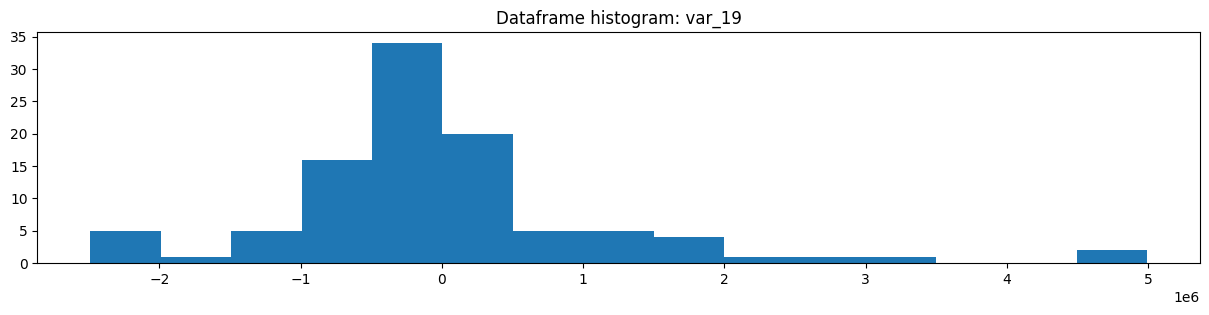

var_19            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean  2.668225e+04 -2.076788e+04  3.315272e+04
2             std  1.169428e+06  1.055335e+06  1.189547e+06
3             min -2.488842e+06 -2.094963e+06 -2.488842e+06
4             25% -5.301590e+05 -3.172184e+05 -5.301590e+05
5             50% -2.098979e+05 -3.784575e+04 -2.172538e+05
6             75%  4.016076e+05  2.300209e+05  4.069610e+05
7             max  4.992234e+06  2.411917e+06  4.992234e+06
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_19  Count in df (desc)  Mean target  Sum target  Count in df
0 -2.488842e+06                   1          0.0           0            1
1  1.054295e+05                   1          1.0           1            1
2  2.892798e+05                   1          0.0           0            1
3  2.639542e+05                   1          0.0           0            1
4  2.481468e+05                   1          1.0           1            1
5  2.292060e+05                   1          0.0           0            1
6  2.239789e+05                   1          1.0           1            1
7  2.010026e+05                   1          1.0           1            1
8  1.998255e+05                   1          0.0           0            1
9  1.810565e+05                   1          0.0           0            1

var_19  Count in the dataframe  Mean target  Sum target (desc)  \
0  7.778361e+05                       1          1.0                  1   
1  2.010026e+05                       1          1.0                  1   
2 -5.469109e+05                       1          1.0                  1   
3 -2.406542e+05                       1          1.0                  1   
4 -2.406542e+05                       1          1.0                  1   
5 -9.132220e+05                       1          1.0                  1   
6 -2.094963e+06                       1          1.0                  1   
7  2.411917e+06                       1          1.0                  1   
8  2.239789e+05                       1          1.0                  1   
9 -1.811210e+05                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

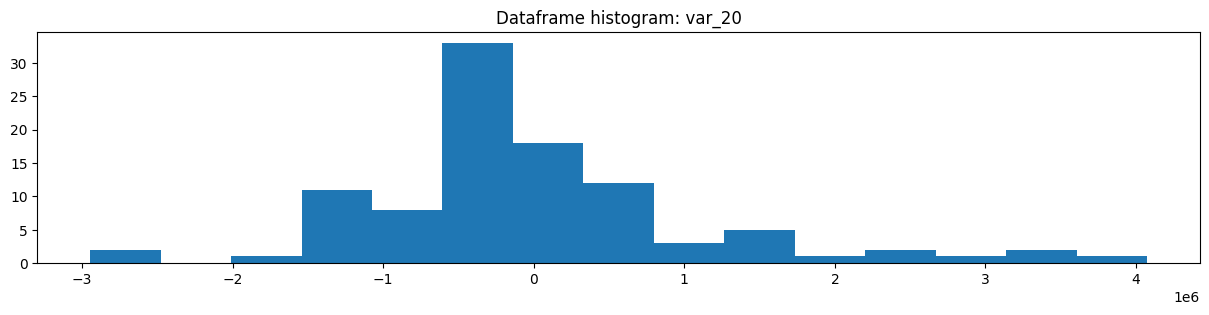

var_20            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean -1.336826e+04  8.955851e+04 -2.740373e+04
2             std  1.130234e+06  1.401238e+06  1.097138e+06
3             min -2.945724e+06 -1.303321e+06 -2.945724e+06
4             25% -5.612434e+05 -8.143415e+05 -4.732254e+05
5             50% -2.206399e+05 -2.505300e+05 -2.170211e+05
6             75%  4.514259e+05  5.439215e+05  3.651761e+05
7             max  4.072749e+06  4.072749e+06  3.300824e+06
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_20  Count in df (desc)  Mean target  Sum target  Count in df
0 -2.945724e+06                   1          0.0           0            1
1  8.882378e+04                   1          0.0           0            1
2  3.364262e+05                   1          0.0           0            1
3  3.106998e+05                   1          0.0           0            1
4  3.007320e+05                   1          0.0           0            1
5  2.210633e+05                   1          0.0           0            1
6  1.807030e+05                   1          0.0           0            1
7  1.708254e+05                   1          0.0           0            1
8  1.689784e+05                   1          0.0           0            1
9  1.354990e+05                   1          0.0           0            1

var_20  Count in the dataframe  Mean target  Sum target (desc)  \
0 -2.019552e+05                       1          1.0                  1   
1  4.124359e+04                       1          1.0                  1   
2 -2.991047e+05                       1          1.0                  1   
3 -2.991047e+05                       1          1.0                  1   
4 -1.303321e+06                       1          1.0                  1   
5 -9.505891e+05                       1          1.0                  1   
6 -8.446533e+05                       1          1.0                  1   
7 -8.042375e+05                       1          1.0                  1   
8  5.459050e+05                       1          1.0                  1   
9  5.745098e+05                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

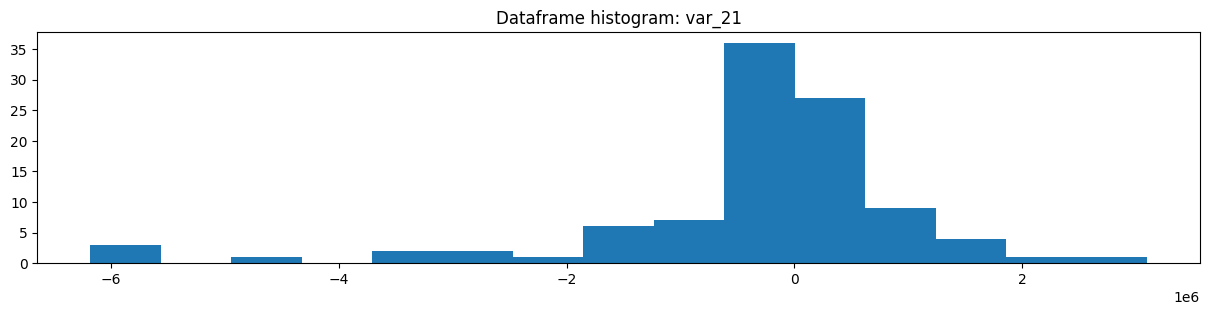

var_21            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean -3.478425e+05 -1.569755e+05 -3.738698e+05
2             std  1.486074e+06  9.380937e+05  1.547917e+06
3             min -6.183398e+06 -3.071146e+06 -6.183398e+06
4             25% -4.819312e+05 -5.134351e+04 -5.348551e+05
5             50% -7.837961e+04  3.328968e+04 -1.088563e+05
6             75%  2.450026e+05  2.034711e+05  2.546744e+05
7             max  3.096027e+06  5.127784e+05  3.096027e+06
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_21  Count in df (desc)  Mean target  Sum target  Count in df
0 -6.183398e+06                   1          0.0           0            1
1  6.232409e+04                   1          0.0           0            1
2  2.415071e+05                   1          0.0           0            1
3  2.334629e+05                   1          0.0           0            1
4  2.143186e+05                   1          1.0           1            1
5  1.998552e+05                   1          1.0           1            1
6  1.520730e+05                   1          0.0           0            1
7  1.520730e+05                   1          0.0           0            1
8  7.751816e+04                   1          0.0           0            1
9  7.585020e+04                   1          1.0           1            1

var_21  Count in the dataframe  Mean target  Sum target (desc)  \
0  7.585020e+04                       1          1.0                  1   
1 -3.071146e+06                       1          1.0                  1   
2 -3.969696e+04                       1          1.0                  1   
3  9.378104e+03                       1          1.0                  1   
4 -3.969696e+04                       1          1.0                  1   
5  4.018631e+05                       1          1.0                  1   
6  5.720126e+04                       1          1.0                  1   
7 -1.181278e+05                       1          1.0                  1   
8  5.127784e+05                       1          1.0                  1   
9 -8.628314e+04                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

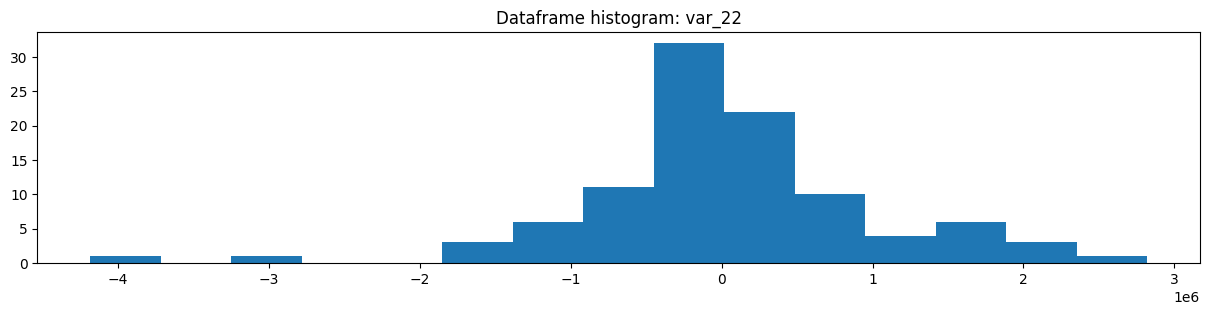

var_22            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean  1.491150e+04  5.921417e+04  8.870230e+03
2             std  9.806116e+05  5.397524e+05  1.028149e+06
3             min -4.184545e+06 -5.341122e+05 -4.184545e+06
4             25% -3.886766e+05 -1.400290e+05 -3.918286e+05
5             50%  5.087199e+03 -8.400957e+04  1.214408e+04
6             75%  4.145228e+05  5.627100e+04  4.660172e+05
7             max  2.818458e+06  1.494835e+06  2.818458e+06
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_22  Count in df (desc)  Mean target  Sum target  Count in df
0 -4.184545e+06                   1          0.0           0            1
1  9.657620e+04                   1          0.0           0            1
2  3.901435e+05                   1          0.0           0            1
3  3.342754e+05                   1          0.0           0            1
4  3.146815e+05                   1          0.0           0            1
5  2.942189e+05                   1          0.0           0            1
6  2.031445e+05                   1          0.0           0            1
7  1.607452e+05                   1          0.0           0            1
8  1.560628e+05                   1          1.0           1            1
9  1.546984e+05                   1          0.0           0            1

var_22  Count in the dataframe  Mean target  Sum target (desc)  \
0 -8.663970e+04                       1          1.0                  1   
1 -8.137945e+04                       1          1.0                  1   
2 -1.249559e+05                       1          1.0                  1   
3 -4.873457e+05                       1          1.0                  1   
4  6.268620e+05                       1          1.0                  1   
5 -8.663970e+04                       1          1.0                  1   
6 -5.341122e+05                       1          1.0                  1   
7  1.494835e+06                       1          1.0                  1   
8  1.560628e+05                       1          1.0                  1   
9  2.300707e+04                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

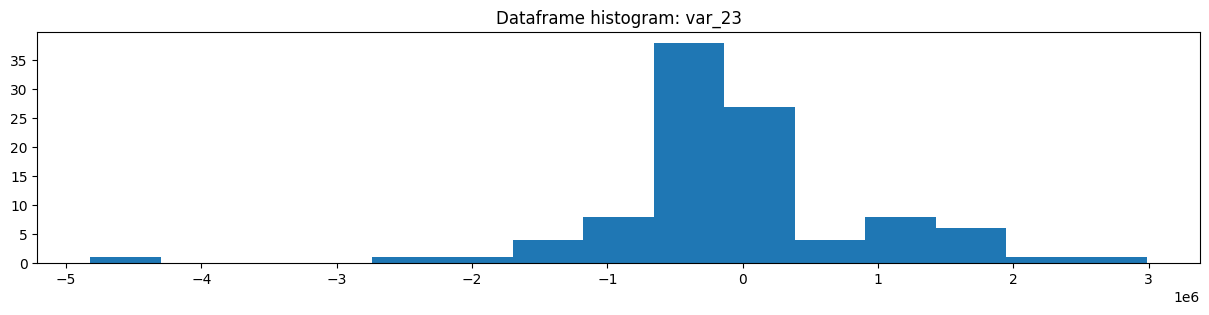

var_23            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean -6.066540e+04 -422320.172745 -1.134884e+04
2             std  9.871818e+05  302219.182624  1.037736e+06
3             min -4.820374e+06 -801850.276683 -4.820374e+06
4             25% -4.561955e+05 -670787.477936 -3.726125e+05
5             50% -2.025855e+05 -488731.800421 -1.635643e+05
6             75%  2.681206e+05 -142253.200118  2.886178e+05
7             max  2.987253e+06   79212.019087  2.987253e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_23  Count in df (desc)  Mean target  Sum target  Count in df
0 -4.820374e+06                   1          0.0           0            1
1  1.420154e+04                   1          0.0           0            1
2  2.658572e+05                   1          0.0           0            1
3  2.658572e+05                   1          0.0           0            1
4  2.512920e+05                   1          0.0           0            1
5  2.506538e+05                   1          0.0           0            1
6  2.166482e+05                   1          0.0           0            1
7  1.516564e+05                   1          0.0           0            1
8  1.201646e+05                   1          0.0           0            1
9  8.342907e+04                   1          0.0           0            1

var_23  Count in the dataframe  Mean target  Sum target (desc)  \
0 -484563.266323                       1          1.0                  1   
1 -651150.974792                       1          1.0                  1   
2 -147879.913795                       1          1.0                  1   
3 -125373.059085                       1          1.0                  1   
4 -125373.059085                       1          1.0                  1   
5 -761700.357838                       1          1.0                  1   
6 -729696.987371                       1          1.0                  1   
7   79212.019087                       1          1.0                  1   
8 -801850.276683                       1          1.0                  1   
9 -492900.334520                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

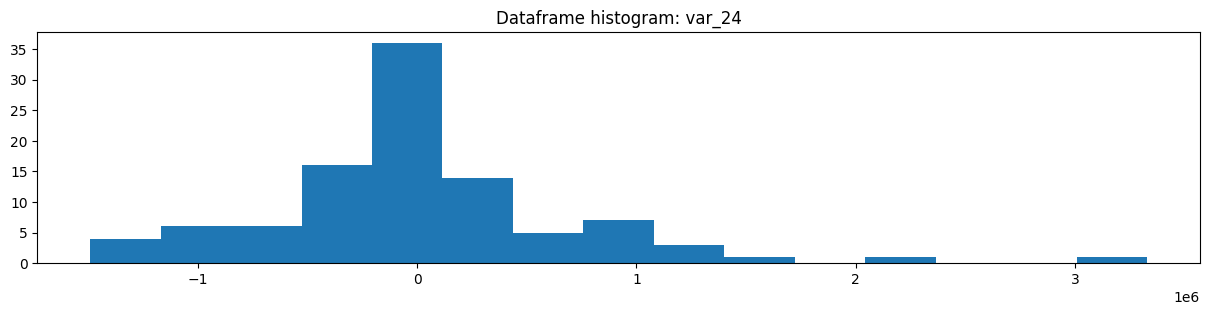

var_24            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean -7.986535e+03  3.510937e+05 -5.695202e+04
2             std  7.056786e+05  1.023632e+06  6.434100e+05
3             min -1.491513e+06 -6.625522e+05 -1.491513e+06
4             25% -3.679677e+05 -1.575413e+05 -3.819417e+05
5             50% -8.275091e+04  6.689085e+04 -1.031152e+05
6             75%  2.165942e+05  4.011407e+05  2.144179e+05
7             max  3.328844e+06  3.328844e+06  2.168121e+06
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_24  Count in df (desc)  Mean target  Sum target  Count in df
0 -1.491513e+06                   1          0.0           0            1
1  6.636735e+04                   1          0.0           0            1
2  2.138375e+05                   1          0.0           0            1
3  1.876735e+05                   1          1.0           1            1
4  1.644885e+05                   1          0.0           0            1
5  1.395591e+05                   1          0.0           0            1
6  1.301120e+05                   1          0.0           0            1
7  1.270419e+05                   1          0.0           0            1
8  1.108087e+05                   1          0.0           0            1
9  8.200761e+04                   1          1.0           1            1

var_24  Count in the dataframe  Mean target  Sum target (desc)  \
0  3.328844e+06                       1          1.0                  1   
1  3.405801e+05                       1          1.0                  1   
2  9.396856e+05                       1          1.0                  1   
3 -1.547480e+05                       1          1.0                  1   
4 -1.554734e+05                       1          1.0                  1   
5 -1.637451e+05                       1          1.0                  1   
6 -1.637451e+05                       1          1.0                  1   
7  5.828227e+05                       1          1.0                  1   
8  5.177410e+04                       1          1.0                  1   
9 -6.625522e+05                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

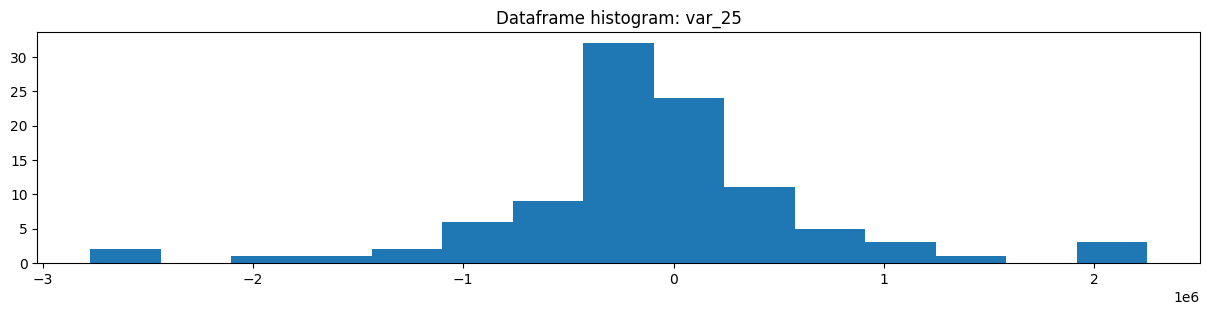

var_25            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean -9.622967e+04 -2.486610e+05 -7.544358e+04
2             std  7.563015e+05  3.884961e+05  7.925671e+05
3             min -2.774099e+06 -1.404057e+06 -2.774099e+06
4             25% -3.266425e+05 -2.741019e+05 -3.341852e+05
5             50% -1.110907e+05 -1.208574e+05 -1.051505e+05
6             75%  2.189567e+05 -3.104064e+04  2.687072e+05
7             max  2.251592e+06  1.603250e+04  2.251592e+06
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_25  Count in df (desc)  Mean target  Sum target  Count in df
0 -2.774099e+06                   1          0.0           0            1
1 -5.056893e+03                   1          0.0           0            1
2  1.787245e+05                   1          0.0           0            1
3  1.243468e+05                   1          0.0           0            1
4  1.131993e+05                   1          0.0           0            1
5  1.011050e+05                   1          0.0           0            1
6  8.945003e+04                   1          0.0           0            1
7  7.603999e+04                   1          0.0           0            1
8  6.199963e+04                   1          0.0           0            1
9  2.741132e+04                   1          0.0           0            1

var_25  Count in the dataframe  Mean target  Sum target (desc)  \
0 -1.095535e+05                       1          1.0                  1   
1  1.603250e+04                       1          1.0                  1   
2 -1.095535e+05                       1          1.0                  1   
3 -1.404057e+06                       1          1.0                  1   
4 -1.321613e+05                       1          1.0                  1   
5 -3.787688e+04                       1          1.0                  1   
6 -2.354231e+05                       1          1.0                  1   
7 -2.730561e+05                       1          1.0                  1   
8 -1.053194e+04                       1          1.0                  1   
9  1.435070e+04                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

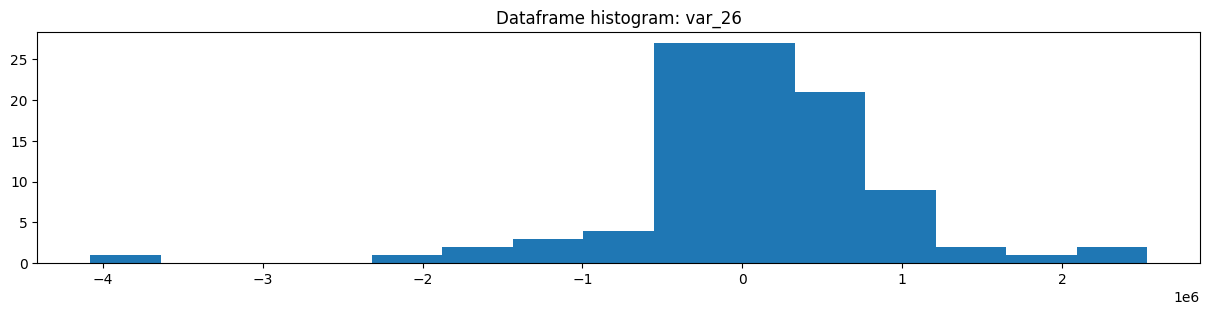

var_26            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean  8.083406e+04 -8.759791e+04  1.038021e+05
2             std  8.344472e+05  5.708728e+05  8.641135e+05
3             min -4.079016e+06 -1.196234e+06 -4.079016e+06
4             25% -1.781533e+05 -2.328564e+05 -1.781533e+05
5             50% -4.440586e+04 -8.510061e+04  1.806324e+03
6             75%  4.970960e+05  2.578548e+04  5.429800e+05
7             max  2.532094e+06  9.397385e+05  2.532094e+06
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_26  Count in df (desc)  Mean target  Sum target  Count in df
0 -4.079016e+06                   1          0.0           0            1
1  3.080502e+05                   1          0.0           0            1
2  4.833884e+05                   1          0.0           0            1
3  4.766192e+05                   1          0.0           0            1
4  4.766192e+05                   1          0.0           0            1
5  4.471992e+05                   1          0.0           0            1
6  4.390714e+05                   1          0.0           0            1
7  4.390714e+05                   1          0.0           0            1
8  4.107404e+05                   1          0.0           0            1
9  3.953715e+05                   1          0.0           0            1

var_26  Count in the dataframe  Mean target  Sum target (desc)  \
0 -6.278459e+04                       1          1.0                  1   
1 -1.117858e+05                       1          1.0                  1   
2 -1.196234e+06                       1          1.0                  1   
3  2.578548e+04                       1          1.0                  1   
4  2.578548e+04                       1          1.0                  1   
5 -7.839559e+04                       1          1.0                  1   
6 -6.478505e+05                       1          1.0                  1   
7 -9.180564e+04                       1          1.0                  1   
8  9.397385e+05                       1          1.0                  1   
9  7.955036e+05                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

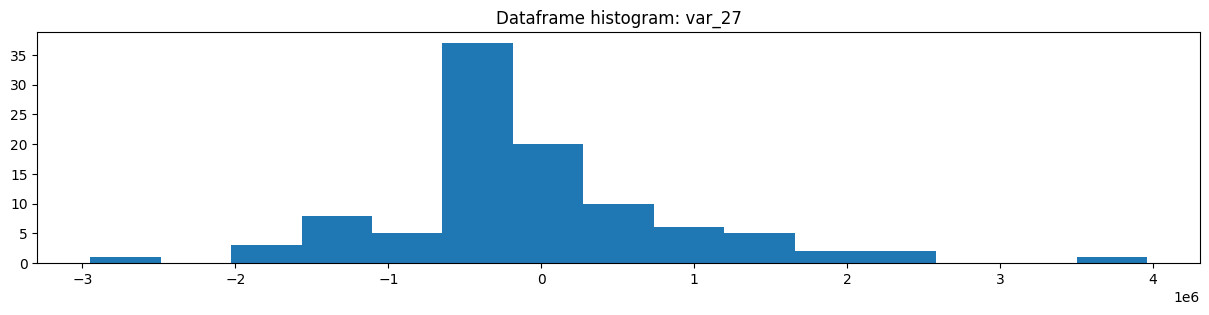

var_27            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean -7.255513e+04 -2.932497e+05 -4.246043e+04
2             std  9.881085e+05  4.924183e+05  1.035730e+06
3             min -2.948848e+06 -1.130716e+06 -2.948848e+06
4             25% -5.360780e+05 -5.780455e+05 -5.097044e+05
5             50% -2.716202e+05 -3.288134e+05 -2.191953e+05
6             75%  3.311535e+05 -1.300928e+05  3.816966e+05
7             max  3.960210e+06  7.059783e+05  3.960210e+06
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_27  Count in df (desc)  Mean target  Sum target  Count in df
0 -2.948848e+06                   1          0.0           0            1
1 -7.740249e+04                   1          0.0           0            1
2  2.741324e+05                   1          0.0           0            1
3  2.644254e+05                   1          0.0           0            1
4  2.275416e+05                   1          0.0           0            1
5  1.993556e+05                   1          0.0           0            1
6  1.665028e+05                   1          0.0           0            1
7  9.749689e+04                   1          0.0           0            1
8 -5.193832e+03                   1          0.0           0            1
9 -1.515815e+04                   1          0.0           0            1

var_27  Count in the dataframe  Mean target  Sum target (desc)  \
0 -1.249100e+05                       1          1.0                  1   
1 -6.466261e+05                       1          1.0                  1   
2 -3.288134e+05                       1          1.0                  1   
3 -1.130716e+06                       1          1.0                  1   
4 -6.824234e+05                       1          1.0                  1   
5  7.059783e+05                       1          1.0                  1   
6 -1.318204e+05                       1          1.0                  1   
7 -4.524166e+05                       1          1.0                  1   
8 -2.849529e+05                       1          1.0                  1   
9  4.417033e+05                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

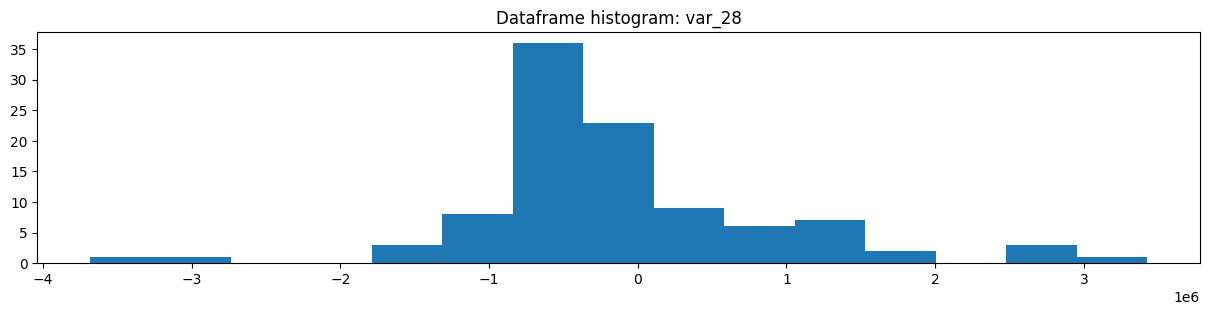

var_28            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean -1.226114e+05 -325916.590667 -9.488801e+04
2             std  1.035783e+06  493382.801338  1.087920e+06
3             min -3.681901e+06 -866520.295973 -3.681901e+06
4             25% -7.061005e+05 -635547.995986 -7.110205e+05
5             50% -3.371103e+05 -562917.769987 -2.807182e+05
6             75%  1.715520e+05 -120577.318859  2.090492e+05
7             max  3.424848e+06  624964.761308  3.424848e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_28  Count in df (desc)  Mean target  Sum target  Count in df
0 -3.681901e+06                   1          0.0           0            1
1 -7.762814e+04                   1          0.0           0            1
2  1.230055e+05                   1          0.0           0            1
3  1.096359e+05                   1          0.0           0            1
4  9.010051e+04                   1          0.0           0            1
5  9.010051e+04                   1          0.0           0            1
6  4.987207e+04                   1          0.0           0            1
7  4.450100e+04                   1          0.0           0            1
8 -9.047143e+02                   1          0.0           0            1
9 -3.373328e+04                   1          0.0           0            1

var_28  Count in the dataframe  Mean target  Sum target (desc)  \
0 -377084.787904                       1          1.0                  1   
1  497468.376626                       1          1.0                  1   
2 -866520.295973                       1          1.0                  1   
3 -558697.160979                       1          1.0                  1   
4 -567138.378996                       1          1.0                  1   
5  167100.691702                       1          1.0                  1   
6  624964.761308                       1          1.0                  1   
7 -216469.989046                       1          1.0                  1   
8 -632616.240209                       1          1.0                  1   
9 -632616.240209                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

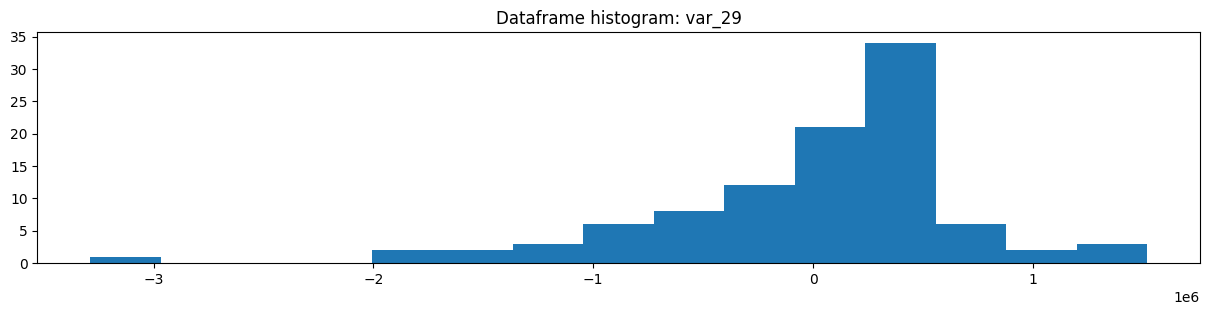

var_29            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean -1.029212e+04  220981.417625 -4.182943e+04
2             std  7.280937e+05  450043.461842  7.544856e+05
3             min -3.288004e+06 -574759.964908 -3.288004e+06
4             25% -3.615202e+05   11260.223800 -3.663165e+05
5             50%  1.692189e+05  331843.944796  1.636497e+05
6             75%  4.128810e+05  505348.376322  3.965523e+05
7             max  1.518848e+06  855239.273321  1.518848e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_29  Count in df (desc)  Mean target  Sum target  Count in df
0 -3.288004e+06                   1          0.0           0            1
1  3.349595e+05                   1          0.0           0            1
2  3.970645e+05                   1          1.0           1            1
3  3.965523e+05                   1          0.0           0            1
4  3.965523e+05                   1          0.0           0            1
5  3.954094e+05                   1          0.0           0            1
6  3.954094e+05                   1          0.0           0            1
7  3.882498e+05                   1          0.0           0            1
8  3.793427e+05                   1          0.0           0            1
9  3.632974e+05                   1          0.0           0            1

var_29  Count in the dataframe  Mean target  Sum target (desc)  \
0  434274.981259                       1          1.0                  1   
1   83067.628941                       1          1.0                  1   
2  266623.404355                       1          1.0                  1   
3  266623.404355                       1          1.0                  1   
4  522161.050300                       1          1.0                  1   
5  639091.601219                       1          1.0                  1   
6  499744.151663                       1          1.0                  1   
7 -204161.991623                       1          1.0                  1   
8  855239.273321                       1          1.0                  1   
9 -574759.964908                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

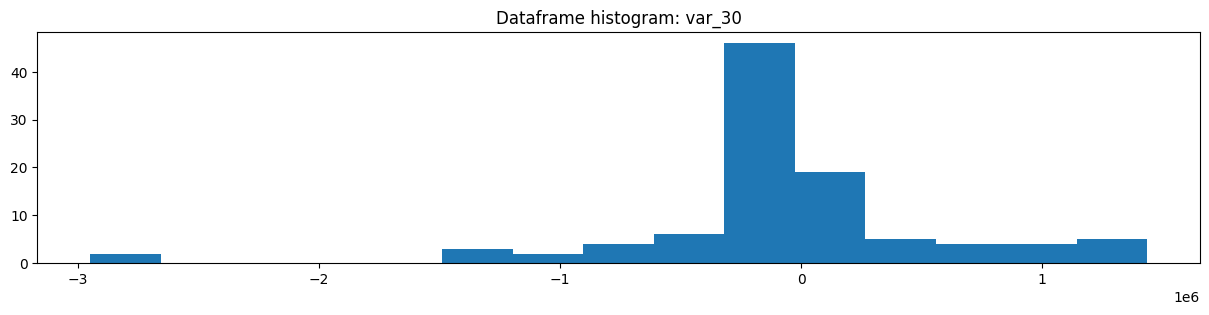

var_30            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean -9.407285e+04  -23683.664885 -1.036714e+05
2             std  6.684996e+05  323395.994227  7.032297e+05
3             min -2.948904e+06 -263546.525923 -2.948904e+06
4             25% -2.574096e+05 -231395.143448 -2.876972e+05
5             50% -1.498679e+05 -102592.073226 -1.588219e+05
6             75%  1.085038e+05  -11182.715471  1.106867e+05
7             max  1.433927e+06  882470.722609  1.433927e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_30  Count in df (desc)  Mean target  Sum target  Count in df
0 -2.948904e+06                   1          0.0           0            1
1 -2.331899e+04                   1          0.0           0            1
2  9.169747e+04                   1          0.0           0            1
3  7.792855e+04                   1          0.0           0            1
4  7.070205e+04                   1          0.0           0            1
5  5.427322e+04                   1          0.0           0            1
6  2.041889e+04                   1          0.0           0            1
7  3.375282e+03                   1          0.0           0            1
8  2.903882e+02                   1          0.0           0            1
9 -6.105614e+03                   1          0.0           0            1

var_30  Count in the dataframe  Mean target  Sum target (desc)  \
0 -255363.979125                       1          1.0                  1   
1  882470.722609                       1          1.0                  1   
2 -112373.107807                       1          1.0                  1   
3  -83276.629537                       1          1.0                  1   
4  286274.594098                       1          1.0                  1   
5  -12070.417762                       1          1.0                  1   
6   -8519.608598                       1          1.0                  1   
7  -92811.038644                       1          1.0                  1   
8 -231395.143448                       1          1.0                  1   
9 -231395.143448                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

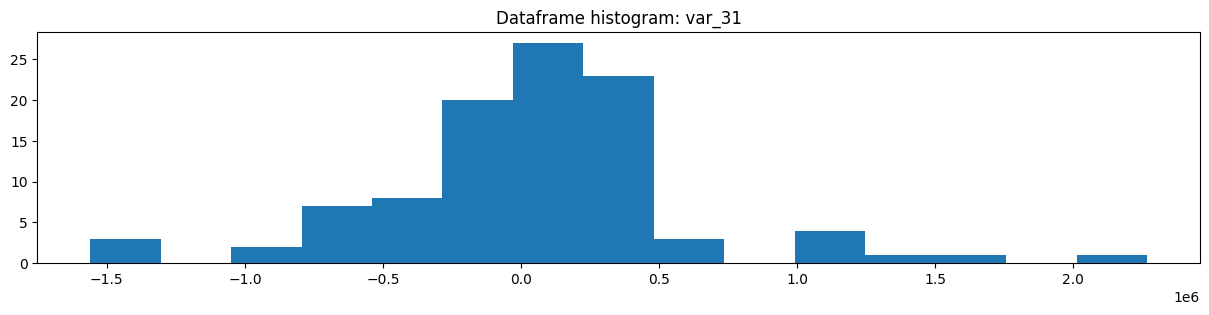

var_31            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean  5.594316e+04  9.208218e+04  5.101511e+04
2             std  5.671642e+05  4.855832e+05  5.796783e+05
3             min -1.560263e+06 -4.914525e+05 -1.560263e+06
4             25% -1.532727e+05 -1.505810e+05 -1.532727e+05
5             50%  7.158972e+04 -2.205789e+04  9.658792e+04
6             75%  2.763853e+05  1.915541e+05  2.763853e+05
7             max  2.268028e+06  1.420932e+06  2.268028e+06
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_31  Count in df (desc)  Mean target  Sum target  Count in df
0 -1.560263e+06                   1          0.0           0            1
1  1.919647e+05                   1          0.0           0            1
2  2.631537e+05                   1          0.0           0            1
3  2.559896e+05                   1          0.0           0            1
4  2.559896e+05                   1          0.0           0            1
5  2.470846e+05                   1          0.0           0            1
6  2.358620e+05                   1          0.0           0            1
7  2.330517e+05                   1          0.0           0            1
8  2.263114e+05                   1          0.0           0            1
9  2.024266e+05                   1          0.0           0            1

var_31  Count in the dataframe  Mean target  Sum target (desc)  \
0  1.420932e+06                       1          1.0                  1   
1 -8.469029e+04                       1          1.0                  1   
2 -2.088051e+05                       1          1.0                  1   
3 -2.412218e+05                       1          1.0                  1   
4  4.264387e+05                       1          1.0                  1   
5 -1.311729e+05                       1          1.0                  1   
6  2.916854e+05                       1          1.0                  1   
7  4.057451e+04                       1          1.0                  1   
8 -1.160534e+05                       1          1.0                  1   
9  1.581770e+05                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

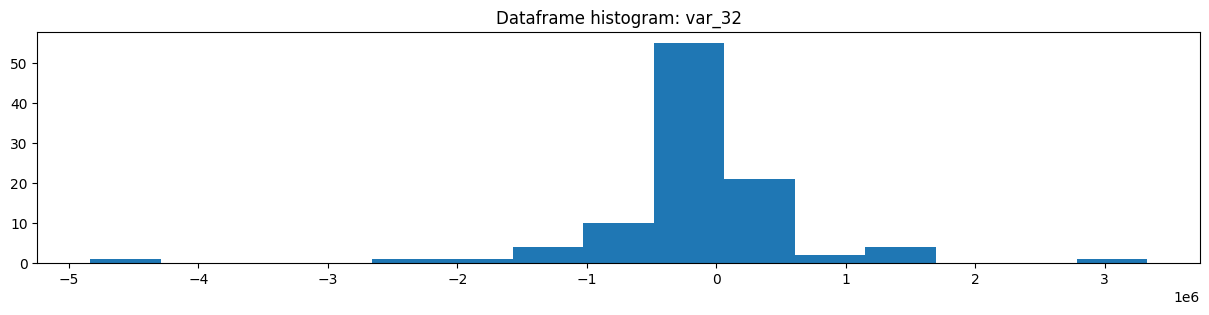

var_32            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean -1.109814e+05  -36465.332634 -1.211426e+05
2             std  8.142053e+05  225339.407893  8.643370e+05
3             min -4.835780e+06 -256769.904684 -4.835780e+06
4             25% -2.567590e+05 -215927.444967 -2.872734e+05
5             50% -6.566311e+04  -95431.770271 -6.566311e+04
6             75%  1.374615e+05  113074.179881  1.454061e+05
7             max  3.326478e+06  433117.879504  3.326478e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_32  Count in df (desc)  Mean target  Sum target  Count in df
0 -4.835780e+06                   1          0.0           0            1
1 -7.138684e+03                   1          0.0           0            1
2  1.010551e+05                   1          1.0           1            1
3  9.909185e+04                   1          0.0           0            1
4  1.381065e+04                   1          0.0           0            1
5  9.435452e+03                   1          1.0           1            1
6  8.348122e+03                   1          0.0           0            1
7  8.348122e+03                   1          0.0           0            1
8  3.158326e+03                   1          0.0           0            1
9 -1.913194e+03                   1          0.0           0            1

var_32  Count in the dataframe  Mean target  Sum target (desc)  \
0 -256769.904684                       1          1.0                  1   
1  -54626.967127                       1          1.0                  1   
2  101055.071221                       1          1.0                  1   
3 -256755.305798                       1          1.0                  1   
4 -136236.573414                       1          1.0                  1   
5    9435.451595                       1          1.0                  1   
6 -204222.967298                       1          1.0                  1   
7 -204222.967298                       1          1.0                  1   
8 -251040.877975                       1          1.0                  1   
9  433117.879504                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

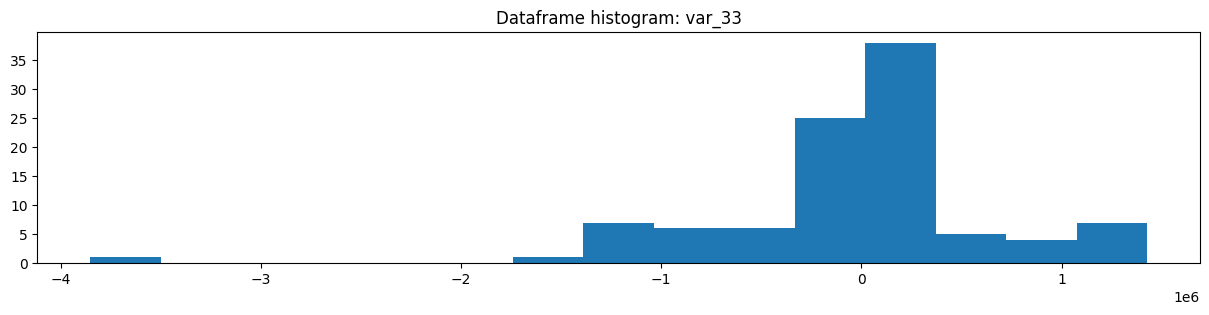

var_33            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean -3.126144e+04 -7.059547e+04 -2.589771e+04
2             std  7.326590e+05  5.622939e+05  7.553877e+05
3             min -3.852371e+06 -1.424800e+06 -3.852371e+06
4             25% -2.711416e+05 -3.392673e+05 -2.532014e+05
5             50%  1.054428e+05  1.590139e+05  1.018432e+05
6             75%  2.821578e+05  3.255454e+05  2.388304e+05
7             max  1.426105e+06  5.053419e+05  1.426105e+06
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_33  Count in df (desc)  Mean target  Sum target  Count in df
0 -3.852371e+06                   1          0.0           0            1
1  1.863227e+05                   1          0.0           0            1
2  2.606647e+05                   1          0.0           0            1
3  2.315523e+05                   1          0.0           0            1
4  2.305056e+05                   1          0.0           0            1
5  2.163673e+05                   1          0.0           0            1
6  2.163673e+05                   1          0.0           0            1
7  2.149703e+05                   1          1.0           1            1
8  2.114980e+05                   1          0.0           0            1
9  2.114980e+05                   1          0.0           0            1

var_33  Count in the dataframe  Mean target  Sum target (desc)  \
0  3.575325e+05                       1          1.0                  1   
1  2.149703e+05                       1          1.0                  1   
2  5.053419e+05                       1          1.0                  1   
3 -3.070181e+05                       1          1.0                  1   
4 -1.424800e+06                       1          1.0                  1   
5  3.575325e+05                       1          1.0                  1   
6 -6.549584e+05                       1          1.0                  1   
7 -1.836139e+05                       1          1.0                  1   
8  3.148830e+05                       1          1.0                  1   
9  3.059420e+05                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

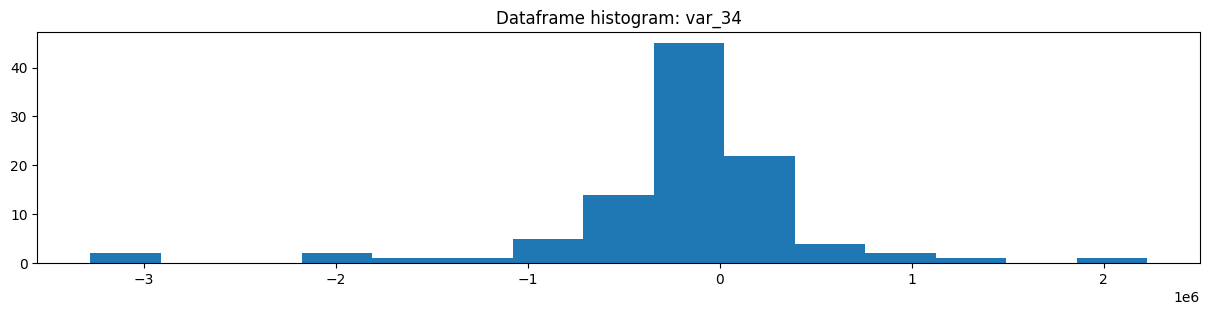

var_34            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean -2.030856e+05 -101444.297660 -2.169458e+05
2             std  7.028204e+05  115778.961995  7.475120e+05
3             min -3.280846e+06 -228606.896052 -3.280846e+06
4             25% -3.255437e+05 -169878.432520 -3.843456e+05
5             50% -1.535927e+05 -137718.756772 -1.587304e+05
6             75%  4.885407e+04  -73801.222016  5.412674e+04
7             max  2.225007e+06  137518.704065  2.225007e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_34  Count in df (desc)  Mean target  Sum target  Count in df
0 -3.280846e+06                   1          0.0           0            1
1 -5.325786e+04                   1          0.0           0            1
2  4.490066e+04                   1          0.0           0            1
3  3.516638e+04                   1          0.0           0            1
4  2.844815e+04                   1          0.0           0            1
5  2.817160e+04                   1          0.0           0            1
6  1.864506e+04                   1          0.0           0            1
7  1.210842e+04                   1          0.0           0            1
8 -3.169577e+04                   1          0.0           0            1
9 -5.089921e+04                   1          0.0           0            1

var_34  Count in the dataframe  Mean target  Sum target (desc)  \
0  -74739.487746                       1          1.0                  1   
1 -200656.046514                       1          1.0                  1   
2 -172549.045199                       1          1.0                  1   
3 -168988.228294                       1          1.0                  1   
4 -130098.297419                       1          1.0                  1   
5 -168988.228293                       1          1.0                  1   
6  -70986.424826                       1          1.0                  1   
7  137518.704065                       1          1.0                  1   
8  112431.989145                       1          1.0                  1   
9 -145339.216125                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

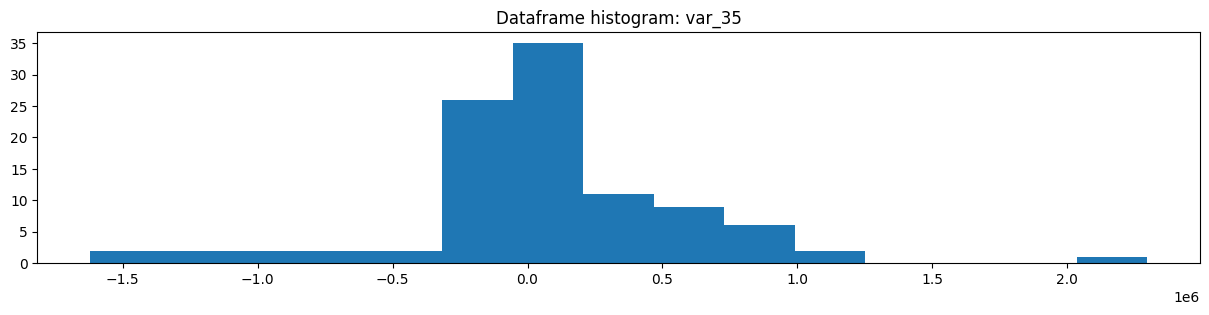

var_35            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean  7.315419e+04    -943.919633  8.325848e+04
2             std  5.455567e+05  164879.786284  5.782620e+05
3             min -1.621023e+06 -227428.610557 -1.621023e+06
4             25% -1.059527e+05 -113980.805817 -1.059527e+05
5             50%  1.582804e+04  -44854.039233  2.184335e+04
6             75%  3.384898e+05  126303.921113  3.936767e+05
7             max  2.296365e+06  336492.070083  2.296365e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_35  Count in df (desc)  Mean target  Sum target  Count in df
0 -1.621023e+06                   1          0.0           0            1
1  1.259751e+05                   1          0.0           0            1
2  3.142323e+05                   1          0.0           0            1
3  3.142323e+05                   1          0.0           0            1
4  2.445495e+05                   1          0.0           0            1
5  2.013907e+05                   1          0.0           0            1
6  1.622710e+05                   1          0.0           0            1
7  1.433344e+05                   1          0.0           0            1
8  1.425445e+05                   1          1.0           1            1
9  1.425445e+05                   1          1.0           1            1

var_35  Count in the dataframe  Mean target  Sum target (desc)  \
0  -24163.749277                       1          1.0                  1   
1  142544.464927                       1          1.0                  1   
2 -181295.223117                       1          1.0                  1   
3 -227428.610557                       1          1.0                  1   
4 -102051.332212                       1          1.0                  1   
5  336492.070083                       1          1.0                  1   
6   62441.355184                       1          1.0                  1   
7  120890.406509                       1          1.0                  1   
8  -65544.329188                       1          1.0                  1   
9 -149769.226632                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

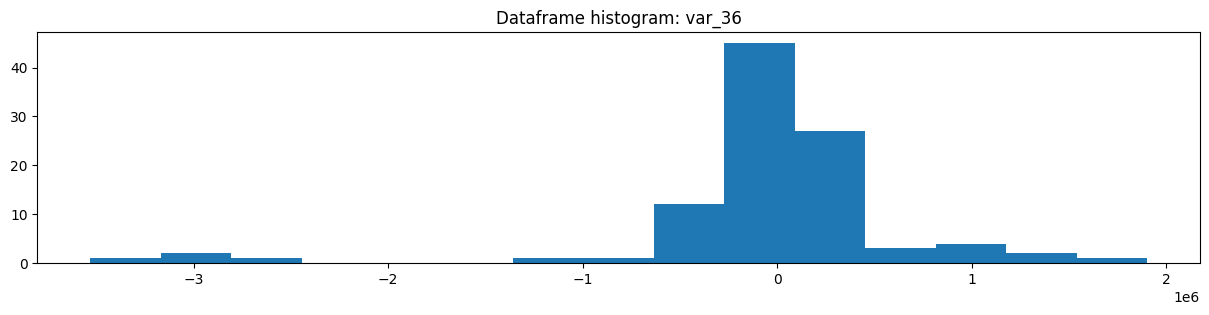

var_36            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean -7.439462e+04  -37855.057057 -7.937729e+04
2             std  7.607632e+05   94179.514650  8.107151e+05
3             min -3.532649e+06 -151123.463868 -3.532649e+06
4             25% -1.602379e+05  -91771.702633 -2.210809e+05
5             50% -2.746798e+04  -68401.889251 -1.028781e+04
6             75%  1.460228e+05    2731.910724  1.788245e+05
7             max  1.902341e+06  192214.643751  1.902341e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_36  Count in df (desc)  Mean target  Sum target  Count in df
0 -3.532649e+06                   1          0.0           0            1
1  9.318985e+04                   1          0.0           0            1
2  1.452833e+05                   1          0.0           0            1
3  1.448234e+05                   1          0.0           0            1
4  1.420983e+05                   1          0.0           0            1
5  1.321083e+05                   1          0.0           0            1
6  1.169781e+05                   1          0.0           0            1
7  1.096505e+05                   1          0.0           0            1
8  1.096505e+05                   1          0.0           0            1
9  1.092712e+05                   1          0.0           0            1

var_36  Count in the dataframe  Mean target  Sum target (desc)  \
0  -17164.157584                       1          1.0                  1   
1  -94213.316724                       1          1.0                  1   
2  -54387.413330                       1          1.0                  1   
3   -2205.097537                       1          1.0                  1   
4   17542.935506                       1          1.0                  1   
5   46829.864738                       1          1.0                  1   
6  -82416.365171                       1          1.0                  1   
7  -90957.831269                       1          1.0                  1   
8  -82416.365171                       1          1.0                  1   
9 -135964.118025                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

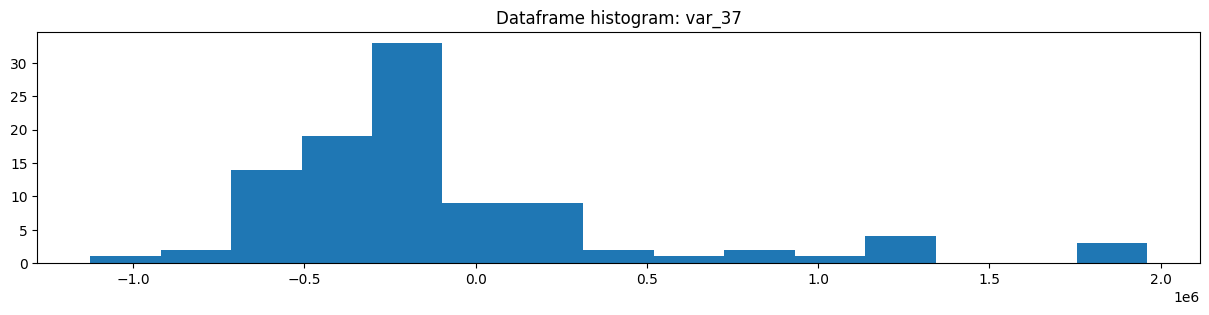

var_37            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean -8.557709e+04 -314013.697326 -5.442664e+04
2             std  5.763629e+05  161085.165300  6.054371e+05
3             min -1.125686e+06 -535167.111120 -1.125686e+06
4             25% -4.174520e+05 -435705.509937 -3.422623e+05
5             50% -2.343767e+05 -348915.897153 -2.207009e+05
6             75% -2.712265e+04 -174993.058886  1.065082e+05
7             max  1.960090e+06  -29816.726489  1.960090e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_37  Count in df (desc)  Mean target  Sum target  Count in df
0 -1.125686e+06                   1          0.0           0            1
1 -1.563623e+05                   1          1.0           1            1
2 -4.943569e+04                   1          0.0           0            1
3 -4.943569e+04                   1          0.0           0            1
4 -6.287452e+04                   1          0.0           0            1
5 -6.287452e+04                   1          0.0           0            1
6 -8.172980e+04                   1          0.0           0            1
7 -1.136513e+05                   1          0.0           0            1
8 -1.292635e+05                   1          0.0           0            1
9 -1.310920e+05                   1          0.0           0            1

var_37  Count in the dataframe  Mean target  Sum target (desc)  \
0 -425434.125490                       1          1.0                  1   
1 -156362.345211                       1          1.0                  1   
2 -356963.831536                       1          1.0                  1   
3 -466519.663277                       1          1.0                  1   
4  -29816.726489                       1          1.0                  1   
5 -216180.876737                       1          1.0                  1   
6 -181203.296777                       1          1.0                  1   
7 -535167.111120                       1          1.0                  1   
8 -414791.286025                       1          1.0                  1   
9 -156362.345211                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

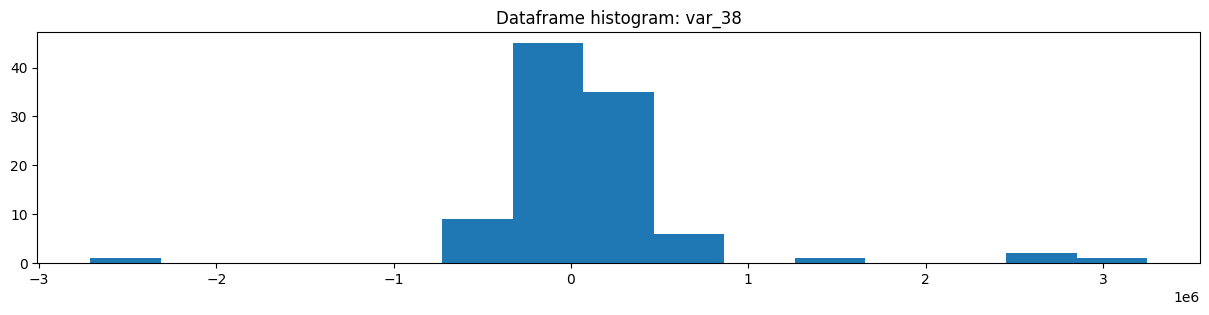

var_38            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean  1.035030e+05   24004.025921  1.143438e+05
2             std  6.507492e+05  244294.882936  6.880032e+05
3             min -2.710696e+06 -325156.627028 -2.710696e+06
4             25% -7.465882e+04  -68730.800163 -7.465882e+04
5             50%  4.607045e+04   13862.144499  4.818578e+04
6             75%  1.333674e+05   96457.237125  1.652511e+05
7             max  3.248722e+06  644477.803406  3.248722e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_38  Count in df (desc)  Mean target  Sum target  Count in df
0 -2.710696e+06                   1          0.0           0            1
1  8.874638e+04                   1          1.0           1            1
2  1.264902e+05                   1          0.0           0            1
3  1.215868e+05                   1          0.0           0            1
4  1.195898e+05                   1          1.0           1            1
5  1.195898e+05                   1          1.0           1            1
6  1.110418e+05                   1          0.0           0            1
7  1.037442e+05                   1          0.0           0            1
8  9.428689e+04                   1          0.0           0            1
9  9.428689e+04                   1          0.0           0            1

var_38  Count in the dataframe  Mean target  Sum target (desc)  \
0  -51781.531150                       1          1.0                  1   
1    2593.863133                       1          1.0                  1   
2  644477.803406                       1          1.0                  1   
3 -119578.607203                       1          1.0                  1   
4   24079.910087                       1          1.0                  1   
5   70448.604430                       1          1.0                  1   
6 -325156.627028                       1          1.0                  1   
7 -288605.505000                       1          1.0                  1   
8    3644.378910                       1          1.0                  1   
9   88746.375107                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

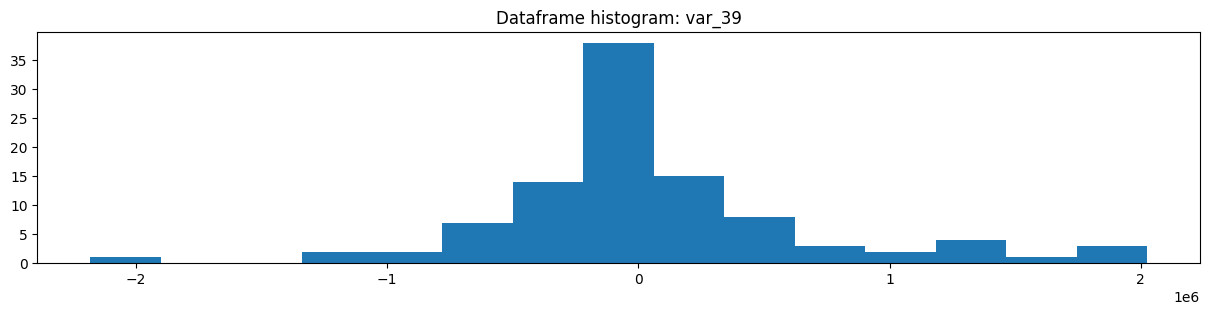

var_39            Df      Target 1      Target 0
0           count  1.000000e+02  1.200000e+01  8.800000e+01
1            mean  2.225524e+04  2.303540e+05 -6.121856e+03
2             std  6.566225e+05  6.229746e+05  6.593672e+05
3             min -2.182883e+06 -4.908051e+05 -2.182883e+06
4             25% -2.548345e+05 -1.713963e+05 -2.798759e+05
5             50% -1.106975e+05  1.357718e+05 -1.140045e+05
6             75%  2.138545e+05  3.327710e+05  2.117671e+05
7             max  2.025011e+06  1.916551e+06  2.025011e+06
8   unique values  1.000000e+02  1.200000e+01  8.800000e+01
9            NaNs  0.000000e+00  0.000000e+00  0.000000e+00
10     NaNs share  0.000000e+00  0.000000e+00  0.000000e+00

var_39  Count in df (desc)  Mean target  Sum target  Count in df
0 -2.182883e+06                   1          0.0           0            1
1  4.465096e+04                   1          0.0           0            1
2  2.117671e+05                   1          0.0           0            1
3  1.995981e+05                   1          0.0           0            1
4  1.848594e+05                   1          1.0           1            1
5  1.701165e+05                   1          1.0           1            1
6  1.511910e+05                   1          0.0           0            1
7  1.511910e+05                   1          0.0           0            1
8  1.337961e+05                   1          0.0           0            1
9  1.014272e+05                   1          1.0           1            1

var_39  Count in the dataframe  Mean target  Sum target (desc)  \
0 -1.600931e+05                       1          1.0                  1   
1  1.916551e+06                       1          1.0                  1   
2  1.848594e+05                       1          1.0                  1   
3  1.701165e+05                       1          1.0                  1   
4 -2.053059e+05                       1          1.0                  1   
5 -2.053059e+05                       1          1.0                  1   
6 -4.908051e+05                       1          1.0                  1   
7  1.014272e+05                       1          1.0                  1   
8  1.327786e+04                       1          1.0                  1   
9  3.253910e+05                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

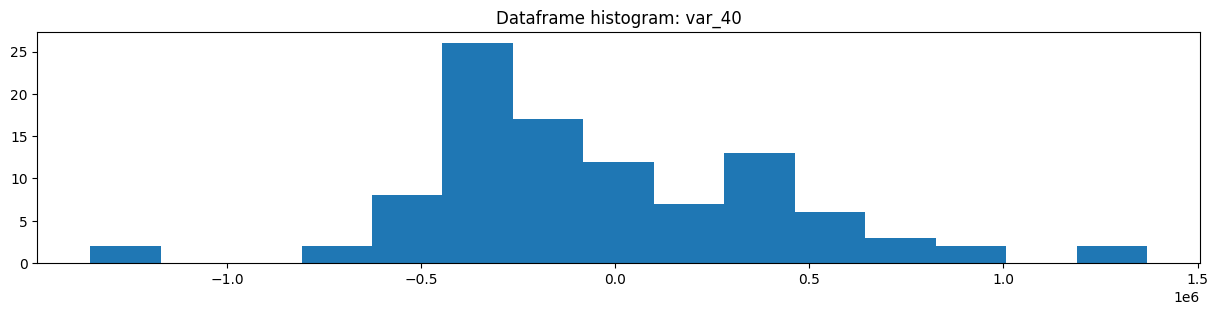

var_40            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean -4.681917e+04 -255159.742260 -1.840909e+04
2             std  4.669398e+05  313618.601401  4.784004e+05
3             min -1.352267e+06 -629282.462715 -1.352267e+06
4             25% -4.002722e+05 -394007.963040 -4.002722e+05
5             50% -1.381075e+05 -271734.129607 -8.393935e+04
6             75%  2.976439e+05 -185359.717719  3.502715e+05
7             max  1.369876e+06  617454.938633  1.369876e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_40  Count in df (desc)  Mean target  Sum target  Count in df
0 -1.352267e+06                   1          0.0           0            1
1  4.687046e+04                   1          0.0           0            1
2  2.570144e+05                   1          0.0           0            1
3  1.861766e+05                   1          0.0           0            1
4  1.671582e+05                   1          0.0           0            1
5  1.418077e+05                   1          0.0           0            1
6  1.341788e+05                   1          0.0           0            1
7  1.173443e+05                   1          0.0           0            1
8  1.010510e+05                   1          0.0           0            1
9  8.591914e+04                   1          0.0           0            1

var_40  Count in the dataframe  Mean target  Sum target (desc)  \
0 -234866.343620                       1          1.0                  1   
1 -319178.466126                       1          1.0                  1   
2 -629282.462715                       1          1.0                  1   
3  617454.938633                       1          1.0                  1   
4 -177133.294027                       1          1.0                  1   
5 -185359.717719                       1          1.0                  1   
6 -185359.717719                       1          1.0                  1   
7 -234384.370342                       1          1.0                  1   
8 -520468.495549                       1          1.0                  1   
9 -308601.915594                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

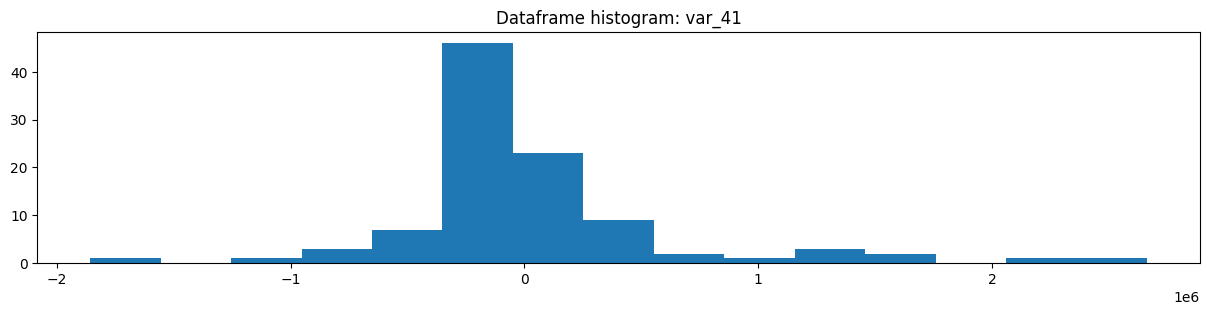

var_41            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean  3.030977e+04 -107934.124080  4.916121e+04
2             std  6.028197e+05   68771.263503  6.402508e+05
3             min -1.857058e+06 -213022.579260 -1.857058e+06
4             25% -2.138299e+05 -158609.103471 -2.212756e+05
5             50% -7.705767e+04 -103648.587792 -6.881211e+04
6             75%  1.445092e+05  -57192.750542  2.198446e+05
7             max  2.662935e+06   10397.952282  2.662935e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_41  Count in df (desc)  Mean target  Sum target  Count in df
0 -1.857058e+06                   1          0.0           0            1
1 -2.916632e+04                   1          0.0           0            1
2  1.404498e+05                   1          0.0           0            1
3  1.343474e+05                   1          0.0           0            1
4  1.329936e+05                   1          0.0           0            1
5  1.329936e+05                   1          0.0           0            1
6  9.828436e+04                   1          0.0           0            1
7  9.022193e+04                   1          0.0           0            1
8  3.143322e+04                   1          0.0           0            1
9  2.621479e+04                   1          0.0           0            1

var_41  Count in the dataframe  Mean target  Sum target (desc)  \
0  -40517.954359                       1          1.0                  1   
1 -177245.409827                       1          1.0                  1   
2 -112090.226059                       1          1.0                  1   
3  -40517.954359                       1          1.0                  1   
4 -123835.186904                       1          1.0                  1   
5  -95206.949526                       1          1.0                  1   
6  -89099.693252                       1          1.0                  1   
7 -152397.001352                       1          1.0                  1   
8   10397.952282                       1          1.0                  1   
9 -213022.579260                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

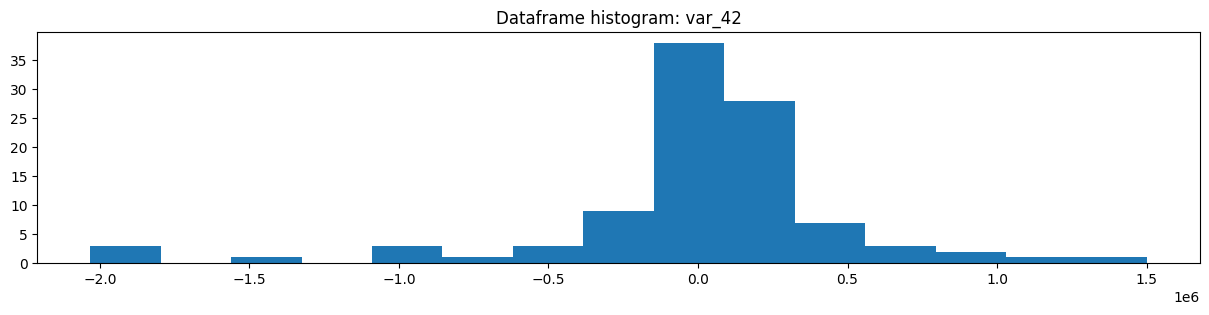

var_42            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean  1.449181e+03   59191.394945 -6.424757e+03
2             std  5.217978e+05  177631.551320  5.525539e+05
3             min -2.032411e+06 -305465.580250 -2.032411e+06
4             25% -4.478201e+04  -16583.646331 -5.452848e+04
5             50%  5.653985e+04    1994.327109  6.043591e+04
6             75%  1.770130e+05  152345.207310  1.821387e+05
7             max  1.501324e+06  363657.602514  1.501324e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_42  Count in df (desc)  Mean target  Sum target  Count in df
0 -2.032411e+06                   1          0.0           0            1
1  1.141490e+05                   1          0.0           0            1
2  1.597541e+05                   1          0.0           0            1
3  1.597541e+05                   1          0.0           0            1
4  1.477433e+05                   1          0.0           0            1
5  1.463241e+05                   1          0.0           0            1
6  1.417537e+05                   1          1.0           1            1
7  1.417537e+05                   1          1.0           1            1
8  1.375004e+05                   1          0.0           0            1
9  1.327320e+05                   1          0.0           0            1

var_42  Count in the dataframe  Mean target  Sum target (desc)  \
0  -56466.955037                       1          1.0                  1   
1   -8107.883228                       1          1.0                  1   
2 -305465.580250                       1          1.0                  1   
3  363657.602514                       1          1.0                  1   
4  290587.532857                       1          1.0                  1   
5    2745.757609                       1          1.0                  1   
6    1242.896610                       1          1.0                  1   
7   -3512.864295                       1          1.0                  1   
8  141753.661042                       1          1.0                  1   
9  141753.661043                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

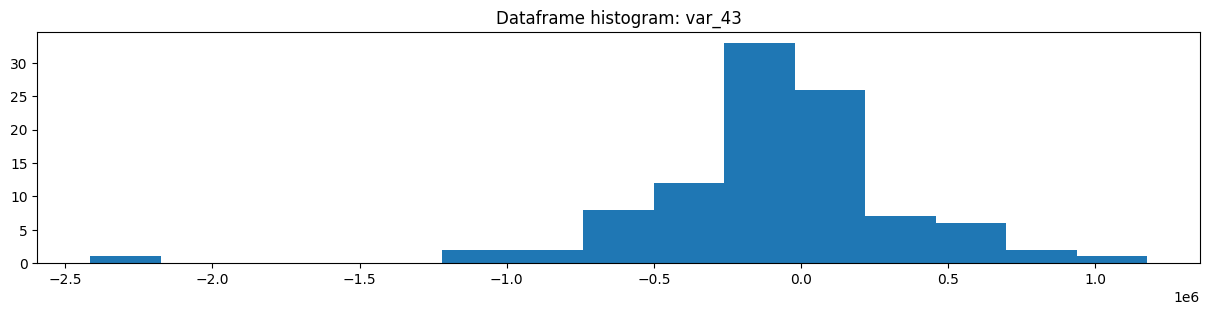

var_43            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean -9.752863e+04 -118912.024239 -9.461271e+04
2             std  4.424984e+05  252206.120448  4.633555e+05
3             min -2.415643e+06 -643086.618814 -2.415643e+06
4             25% -2.644822e+05 -232373.014539 -2.776839e+05
5             50% -4.130030e+04 -160211.508702 -3.589860e+04
6             75%  6.894098e+04    8691.695065  7.424840e+04
7             max  1.176169e+06  337693.251737  1.176169e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_43  Count in df (desc)  Mean target  Sum target  Count in df
0 -2.415643e+06                   1          0.0           0            1
1 -8.815630e+03                   1          0.0           0            1
2  6.452563e+04                   1          0.0           0            1
3  5.844075e+04                   1          0.0           0            1
4  5.825838e+04                   1          0.0           0            1
5  3.404122e+04                   1          0.0           0            1
6  2.420731e+04                   1          0.0           0            1
7  1.575626e+04                   1          0.0           0            1
8  6.850895e+03                   1          0.0           0            1
9 -6.541308e+02                   1          0.0           0            1

var_43  Count in the dataframe  Mean target  Sum target (desc)  \
0 -293229.961620                       1          1.0                  1   
1  176926.950462                       1          1.0                  1   
2 -260268.791770                       1          1.0                  1   
3   67415.896800                       1          1.0                  1   
4 -643086.618814                       1          1.0                  1   
5  337693.251737                       1          1.0                  1   
6 -160429.866180                       1          1.0                  1   
7  -10883.038847                       1          1.0                  1   
8 -159993.151224                       1          1.0                  1   
9  -34940.117151                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

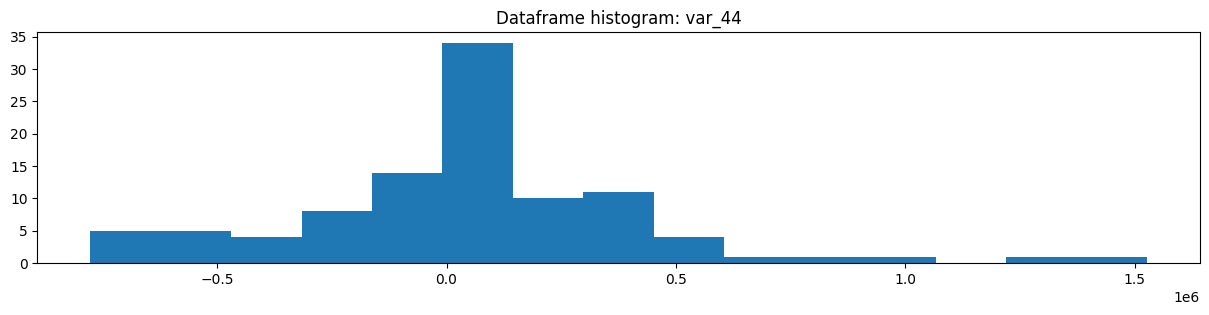

var_44            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean  5.110315e+04   55000.374894  5.057171e+04
2             std  3.800276e+05  315407.784875  3.895645e+05
3             min -7.764512e+05 -622290.504091 -7.764512e+05
4             25% -1.242526e+05   41080.546974 -1.328635e+05
5             50%  5.311785e+04   80423.201905  4.971124e+04
6             75%  2.301995e+05  255568.269772  2.150243e+05
7             max  1.526390e+06  468395.430420  1.526390e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_44  Count in df (desc)  Mean target  Sum target  Count in df
0 -776451.233640                   1          0.0           0            1
1  133707.983965                   1          0.0           0            1
2  211877.122173                   1          0.0           0            1
3  188810.669757                   1          0.0           0            1
4  162641.780881                   1          0.0           0            1
5  158383.018823                   1          0.0           0            1
6  144569.093420                   1          0.0           0            1
7  144569.093420                   1          0.0           0            1
8  143900.835982                   1          0.0           0            1
9  143900.835981                   1          0.0           0            1

var_44  Count in the dataframe  Mean target  Sum target (desc)  \
0   50977.083609                       1          1.0                  1   
1  112676.501089                       1          1.0                  1   
2 -622290.504091                       1          1.0                  1   
3  468395.430420                       1          1.0                  1   
4   75700.181729                       1          1.0                  1   
5   85146.222082                       1          1.0                  1   
6 -467678.857108                       1          1.0                  1   
7   11390.937070                       1          1.0                  1   
8  378191.066759                       1          1.0                  1   
9  255568.269772                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

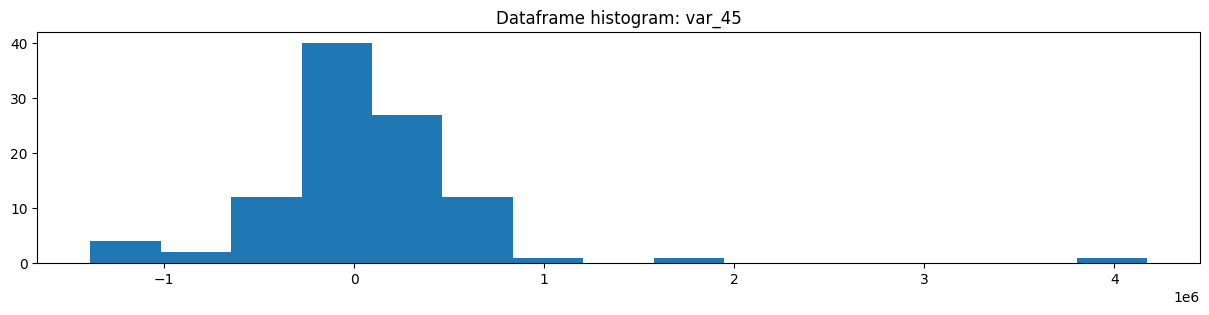

var_45            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean  7.015847e+04  123181.584498  6.292804e+04
2             std  6.244122e+05  291865.474644  6.576150e+05
3             min -1.389535e+06 -149565.606096 -1.389535e+06
4             25% -1.565964e+05 -104298.614347 -2.206761e+05
5             50%  5.714327e+04  -15465.917078  6.843770e+04
6             75%  2.413361e+05  238150.402662  2.413361e+05
7             max  4.171141e+06  713873.736206  4.171141e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_45  Count in df (desc)  Mean target  Sum target  Count in df
0 -1.389535e+06                   1          0.0           0            1
1  1.374403e+05                   1          1.0           1            1
2  1.663258e+05                   1          0.0           0            1
3  1.663258e+05                   1          0.0           0            1
4  1.626181e+05                   1          0.0           0            1
5  1.620812e+05                   1          0.0           0            1
6  1.620812e+05                   1          0.0           0            1
7  1.588983e+05                   1          1.0           1            1
8  1.582525e+05                   1          0.0           0            1
9  1.582525e+05                   1          0.0           0            1

var_45  Count in the dataframe  Mean target  Sum target (desc)  \
0 -149565.606096                       1          1.0                  1   
1  713873.736206                       1          1.0                  1   
2  137440.335117                       1          1.0                  1   
3 -106765.153841                       1          1.0                  1   
4 -104298.614347                       1          1.0                  1   
5 -104298.614346                       1          1.0                  1   
6  530176.990284                       1          1.0                  1   
7  158898.283903                       1          1.0                  1   
8  475906.758941                       1          1.0                  1   
9  -42257.267689                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

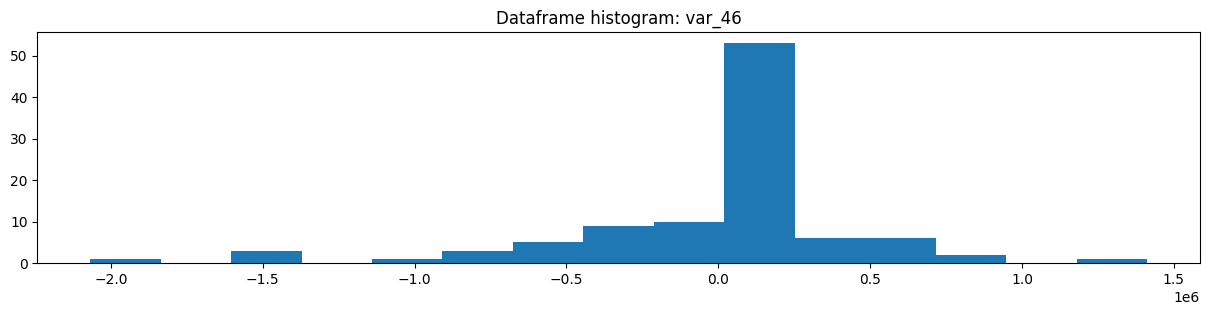

var_46            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean -1.884195e+03  200116.894594 -2.942980e+04
2             std  4.959140e+05  145416.133809  5.203680e+05
3             min -2.068219e+06   33481.648457 -2.068219e+06
4             25% -8.350846e+04  142677.039473 -2.094816e+05
5             50%  1.277161e+05  181420.799224  1.218481e+05
6             75%  2.017191e+05  214208.849824  1.844635e+05
7             max  1.411577e+06  614625.549087  1.411577e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_46  Count in df (desc)  Mean target  Sum target  Count in df
0 -2.068219e+06                   1          0.0           0            1
1  1.588131e+05                   1          1.0           1            1
2  1.996645e+05                   1          1.0           1            1
3  1.945425e+05                   1          0.0           0            1
4  1.811039e+05                   1          0.0           0            1
5  1.808349e+05                   1          0.0           0            1
6  1.767215e+05                   1          0.0           0            1
7  1.705468e+05                   1          0.0           0            1
8  1.659983e+05                   1          0.0           0            1
9  1.631771e+05                   1          1.0           1            1

var_46  Count in the dataframe  Mean target  Sum target (desc)  \
0  243153.590312                       1          1.0                  1   
1  205108.346215                       1          1.0                  1   
2   77560.112339                       1          1.0                  1   
3  103446.028960                       1          1.0                  1   
4  614625.549087                       1          1.0                  1   
5  155754.042977                       1          1.0                  1   
6  241510.360651                       1          1.0                  1   
7   33481.648457                       1          1.0                  1   
8  163177.140167                       1          1.0                  1   
9  205108.346215                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

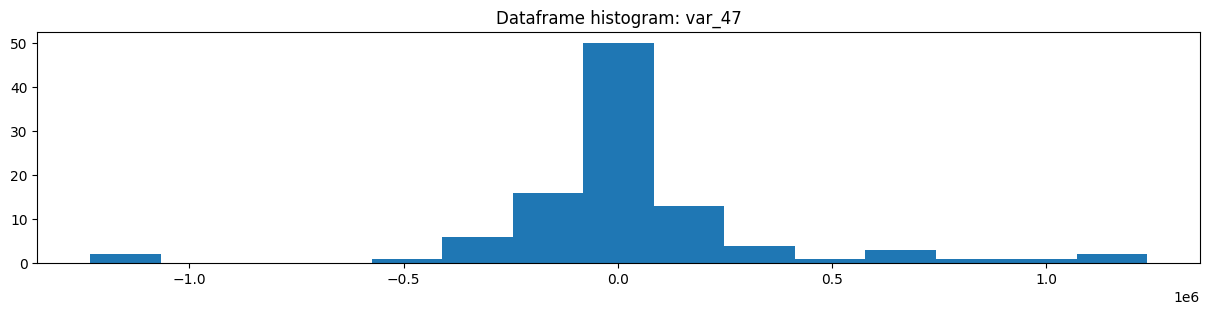

var_47            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean  3.244309e+04     804.155385  3.675749e+04
2             std  3.329948e+05  111971.362107  3.527577e+05
3             min -1.231621e+06 -105646.023385 -1.231621e+06
4             25% -8.071162e+04  -80711.616068 -7.161692e+04
5             50% -7.876090e+03  -10166.881617 -7.876090e+03
6             75%  7.855144e+04   -5650.708554  8.812362e+04
7             max  1.234888e+06  245800.831140  1.234888e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_47  Count in df (desc)  Mean target  Sum target  Count in df
0 -1.231621e+06                   1          0.0           0            1
1  9.060901e+03                   1          0.0           0            1
2  7.588611e+04                   1          0.0           0            1
3  6.884384e+04                   1          0.0           0            1
4  4.276065e+04                   1          0.0           0            1
5  3.548145e+04                   1          0.0           0            1
6  2.340688e+04                   1          0.0           0            1
7  2.340688e+04                   1          0.0           0            1
8  2.094147e+04                   1          0.0           0            1
9  1.404725e+04                   1          0.0           0            1

var_47  Count in the dataframe  Mean target  Sum target (desc)  \
0  -86279.468044                       1          1.0                  1   
1  201975.109523                       1          1.0                  1   
2   -5696.608039                       1          1.0                  1   
3   -5696.608038                       1          1.0                  1   
4   -5513.010102                       1          1.0                  1   
5  -12775.803799                       1          1.0                  1   
6  245800.831140                       1          1.0                  1   
7  -25641.294530                       1          1.0                  1   
8  -78855.665410                       1          1.0                  1   
9 -105646.023385                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

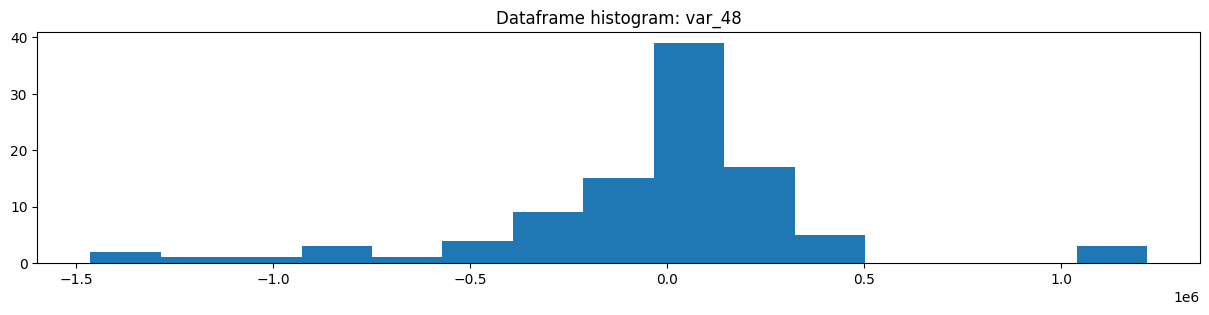

var_48            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean -2.756046e+04   91537.612655 -4.380110e+04
2             std  4.206372e+05  121080.023838  4.441438e+05
3             min -1.464936e+06  -89873.030974 -1.464936e+06
4             25% -1.877355e+05   21100.251671 -2.072551e+05
5             50%  6.598711e+04   81362.222095  3.745691e+04
6             75%  1.451647e+05  173473.453679  1.416764e+05
7             max  1.217595e+06  307283.189392  1.217595e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_48  Count in df (desc)  Mean target  Sum target  Count in df
0 -1.464936e+06                   1          0.0           0            1
1  1.238564e+05                   1          0.0           0            1
2  1.442192e+05                   1          0.0           0            1
3  1.408288e+05                   1          0.0           0            1
4  1.408288e+05                   1          0.0           0            1
5  1.407878e+05                   1          0.0           0            1
6  1.385903e+05                   1          0.0           0            1
7  1.369793e+05                   1          0.0           0            1
8  1.345200e+05                   1          0.0           0            1
9  1.291374e+05                   1          0.0           0            1

var_48  Count in the dataframe  Mean target  Sum target (desc)  \
0  149842.449780                       1          1.0                  1   
1  -26253.316705                       1          1.0                  1   
2   81362.222095                       1          1.0                  1   
3   81362.222094                       1          1.0                  1   
4  -89873.030974                       1          1.0                  1   
5  -84290.575710                       1          1.0                  1   
6   73604.904454                       1          1.0                  1   
7   36884.774463                       1          1.0                  1   
8  218864.551219                       1          1.0                  1   
9  172114.926481                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

In [5]:
# EDA for other columns
for col in list(splitted_columns[0]):
    proc(col) # Run EDA

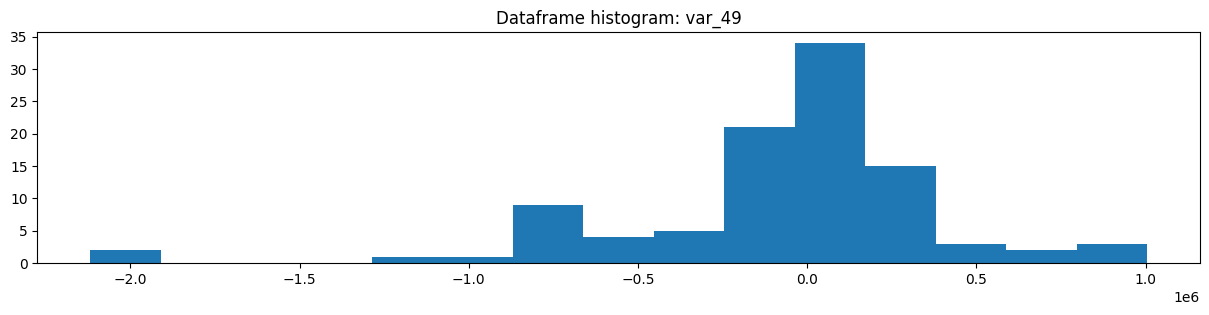

var_49            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean -9.012137e+04  -71003.423808 -9.272836e+04
2             std  4.808564e+05  231675.353475  5.062332e+05
3             min -2.118822e+06 -381649.435527 -2.118822e+06
4             25% -2.069949e+05 -244141.769471 -1.981688e+05
5             50% -8.840089e+03  -96982.666505  2.063931e+04
6             75%  1.167561e+05   24531.936305  1.274781e+05
7             max  1.004305e+06  365900.875909  1.004305e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_49  Count in df (desc)  Mean target  Sum target  Count in df
0 -2.118822e+06                   1          0.0           0            1
1  8.490990e+04                   1          0.0           0            1
2  1.059160e+05                   1          0.0           0            1
3  1.059160e+05                   1          0.0           0            1
4  1.035327e+05                   1          0.0           0            1
5  9.820627e+04                   1          0.0           0            1
6  9.757452e+04                   1          0.0           0            1
7  9.387479e+04                   1          0.0           0            1
8  9.275528e+04                   1          0.0           0            1
9  9.275528e+04                   1          0.0           0            1

var_49  Count in the dataframe  Mean target  Sum target (desc)  \
0   -5958.302487                       1          1.0                  1   
1  251692.137017                       1          1.0                  1   
2  116002.652678                       1          1.0                  1   
3  365900.875909                       1          1.0                  1   
4  -82711.627015                       1          1.0                  1   
5 -111253.705995                       1          1.0                  1   
6 -131299.432933                       1          1.0                  1   
7 -217866.310843                       1          1.0                  1   
8   -5958.302486                       1          1.0                  1   
9 -325971.488653                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

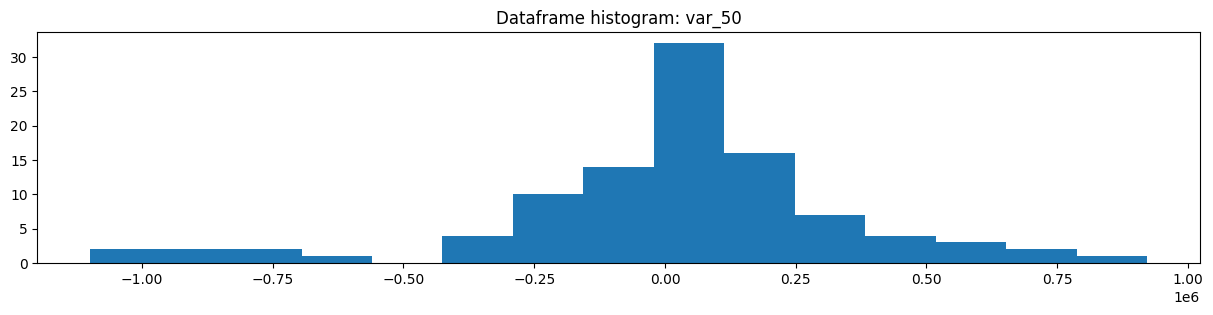

var_50            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean  1.981739e+04   -3375.055026  2.298000e+04
2             std  3.496471e+05  199236.930594  3.660769e+05
3             min -1.099098e+06 -374957.591696 -1.099098e+06
4             25% -6.720002e+04  -94975.223586 -5.523413e+04
5             50%  5.992297e+04    7555.908089  7.130110e+04
6             75%  1.441541e+05  107249.081309  1.535560e+05
7             max  9.218570e+05  389352.246380  9.218570e+05
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_50  Count in df (desc)  Mean target  Sum target  Count in df
0 -1.099098e+06                   1          0.0           0            1
1  1.012875e+05                   1          0.0           0            1
2  1.365974e+05                   1          0.0           0            1
3  1.274273e+05                   1          0.0           0            1
4  1.251712e+05                   1          0.0           0            1
5  1.250679e+05                   1          0.0           0            1
6  1.216207e+05                   1          0.0           0            1
7  1.193022e+05                   1          0.0           0            1
8  1.136383e+05                   1          1.0           1            1
9  1.051194e+05                   1          1.0           1            1

var_50  Count in the dataframe  Mean target  Sum target (desc)  \
0 -107162.374479                       1          1.0                  1   
1  105119.350356                       1          1.0                  1   
2  -90912.839955                       1          1.0                  1   
3   42679.385277                       1          1.0                  1   
4  389352.246380                       1          1.0                  1   
5 -374957.591696                       1          1.0                  1   
6   18437.225117                       1          1.0                  1   
7   -3325.408938                       1          1.0                  1   
8 -232823.939357                       1          1.0                  1   
9  -90912.839955                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

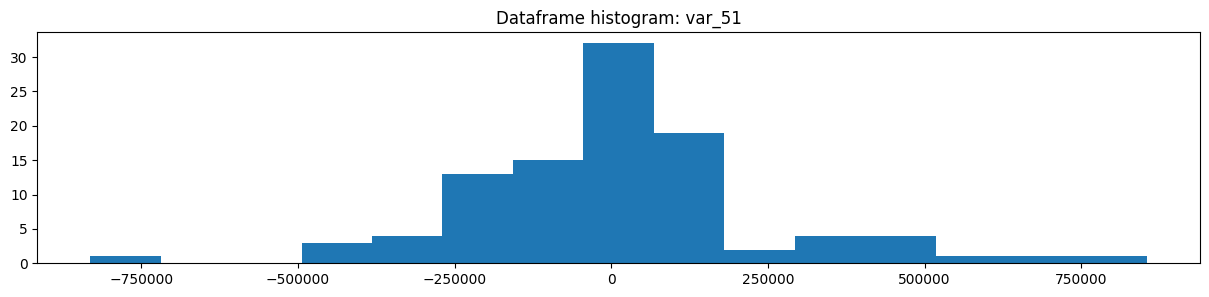

var_51             Df       Target 1       Target 0
0           count     100.000000      12.000000      88.000000
1            mean   -1475.308963   -5127.609676    -977.267956
2             std  238560.488856  230446.712323  240923.871185
3             min -831831.572601 -223036.241904 -831831.572601
4             25% -115470.342985 -178391.667949 -109036.298418
5             50%  -12765.741533   -6528.159370  -14584.947758
6             75%   99056.882881   30173.129984  102927.185008
7             max  855170.462451  632381.986613  855170.462451
8   unique values     100.000000      12.000000      88.000000
9            NaNs       0.000000       0.000000       0.000000
10     NaNs share       0.000000       0.000000       0.000000

var_51  Count in df (desc)  Mean target  Sum target  Count in df
0 -831831.572601                   1          0.0           0            1
1   18648.414693                   1          0.0           0            1
2   92146.477992                   1          0.0           0            1
3   79099.694312                   1          0.0           0            1
4   78743.151989                   1          0.0           0            1
5   77942.772483                   1          0.0           0            1
6   75836.684957                   1          0.0           0            1
7   73254.049999                   1          1.0           1            1
8   45917.647496                   1          0.0           0            1
9   36590.059212                   1          0.0           0            1

var_51  Count in the dataframe  Mean target  Sum target (desc)  \
0  104609.472144                       1          1.0                  1   
1   15812.823313                       1          1.0                  1   
2 -194793.905724                       1          1.0                  1   
3 -214111.250077                       1          1.0                  1   
4 -223036.241904                       1          1.0                  1   
5  632381.986613                       1          1.0                  1   
6   -6528.159371                       1          1.0                  1   
7   -6528.159369                       1          1.0                  1   
8   -2713.241866                       1          1.0                  1   
9 -172924.255357                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

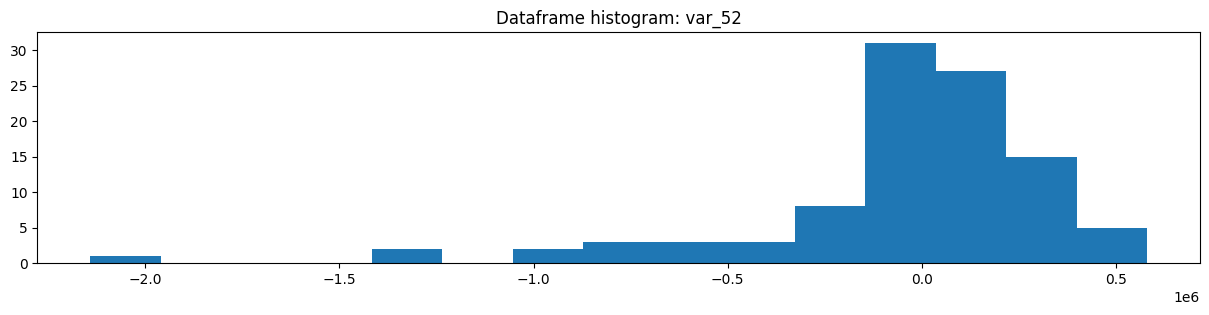

var_52            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean -5.608739e+04   40389.973418 -6.924339e+04
2             std  4.067076e+05  246815.824292  4.231609e+05
3             min -2.141492e+06 -297048.032542 -2.141492e+06
4             25% -1.125657e+05 -133249.221252 -1.061254e+05
5             50%  3.172310e+04   -5802.091869  3.172310e+04
6             75%  1.366503e+05  137164.029629  1.366503e+05
7             max  5.796691e+05  554860.979325  5.796691e+05
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_52  Count in df (desc)  Mean target  Sum target  Count in df
0 -2.141492e+06                   1          0.0           0            1
1  7.107353e+04                   1          0.0           0            1
2  1.357173e+05                   1          0.0           0            1
3  1.352558e+05                   1          0.0           0            1
4  1.165407e+05                   1          0.0           0            1
5  1.096220e+05                   1          0.0           0            1
6  8.845884e+04                   1          0.0           0            1
7  8.258998e+04                   1          0.0           0            1
8  8.247473e+04                   1          0.0           0            1
9  8.246173e+04                   1          1.0           1            1

var_52  Count in the dataframe  Mean target  Sum target (desc)  \
0 -106269.986679                       1          1.0                  1   
1  -52830.513585                       1          1.0                  1   
2 -297048.032542                       1          1.0                  1   
3  301270.922962                       1          1.0                  1   
4  342235.487341                       1          1.0                  1   
5 -133249.221252                       1          1.0                  1   
6  554860.979325                       1          1.0                  1   
7 -133249.221253                       1          1.0                  1   
8   41226.329848                       1          1.0                  1   
9   45108.147791                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

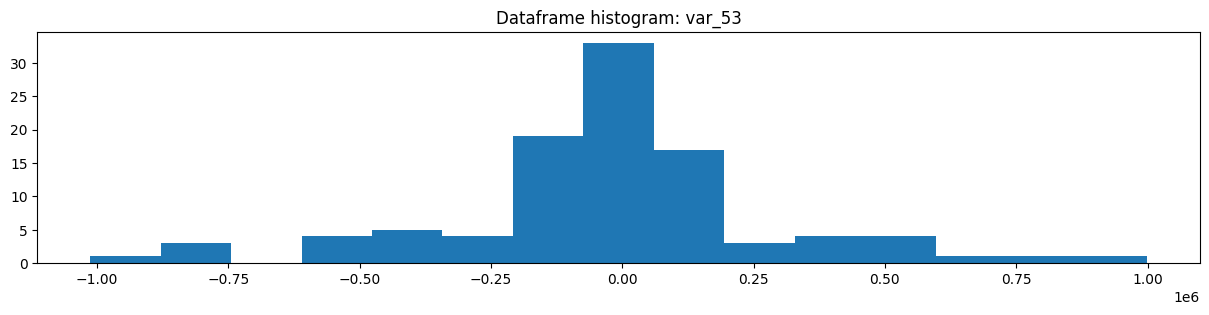

var_53            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean -3.012189e+04  -68716.255062 -2.485903e+04
2             std  3.134277e+05  263470.348641  3.205879e+05
3             min -1.012697e+06 -776893.302507 -1.012697e+06
4             25% -1.618066e+05 -173325.923432 -1.481768e+05
5             50% -2.902040e+04   -8545.298147 -3.251776e+04
6             75%  8.524297e+04  132428.228163  7.880137e+04
7             max  9.990481e+05  170964.370711  9.990481e+05
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_53  Count in df (desc)  Mean target  Sum target  Count in df
0 -1.012697e+06                   1          0.0           0            1
1  3.653839e+04                   1          1.0           1            1
2  7.880137e+04                   1          0.0           0            1
3  7.190824e+04                   1          0.0           0            1
4  7.190824e+04                   1          0.0           0            1
5  6.821883e+04                   1          0.0           0            1
6  6.821883e+04                   1          0.0           0            1
7  5.511138e+04                   1          0.0           0            1
8  5.388281e+04                   1          0.0           0            1
9  5.183776e+04                   1          0.0           0            1

var_53  Count in the dataframe  Mean target  Sum target (desc)  \
0 -179268.500831                       1          1.0                  1   
1    7506.289726                       1          1.0                  1   
2 -171345.064299                       1          1.0                  1   
3   36538.389860                       1          1.0                  1   
4  -24596.886020                       1          1.0                  1   
5  127493.633578                       1          1.0                  1   
6  147232.011919                       1          1.0                  1   
7  170964.370710                       1          1.0                  1   
8  170964.370711                       1          1.0                  1   
9 -776893.302507                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

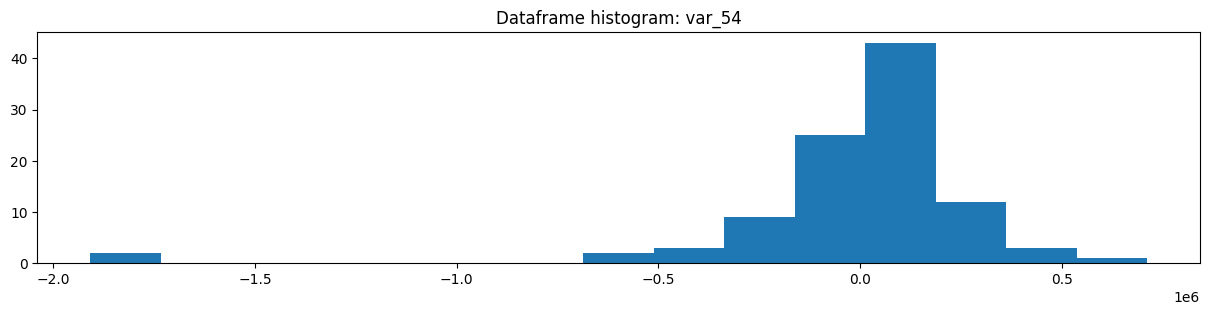

var_54            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean -8.163177e+03   16629.274439 -1.154397e+04
2             std  3.360272e+05  100047.464762  3.565484e+05
3             min -1.908434e+06 -173710.527446 -1.908434e+06
4             25% -3.732110e+04  -28543.697213 -3.732110e+04
5             50%  4.287072e+04   14216.946905  4.720036e+04
6             75%  1.168019e+05   68026.036570  1.362247e+05
7             max  7.106907e+05  205915.314036  7.106907e+05
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_54  Count in df (desc)  Mean target  Sum target  Count in df
0 -1.908434e+06                   1          0.0           0            1
1  6.147150e+04                   1          0.0           0            1
2  1.144760e+05                   1          1.0           1            1
3  8.715599e+04                   1          0.0           0            1
4  8.622972e+04                   1          0.0           0            1
5  8.482355e+04                   1          0.0           0            1
6  8.010439e+04                   1          0.0           0            1
7  7.634770e+04                   1          0.0           0            1
8  7.618463e+04                   1          0.0           0            1
9  7.618463e+04                   1          0.0           0            1

var_54  Count in the dataframe  Mean target  Sum target (desc)  \
0  -57675.676702                       1          1.0                  1   
1  -84399.488803                       1          1.0                  1   
2  114476.010184                       1          1.0                  1   
3   24334.520793                       1          1.0                  1   
4   52542.712032                       1          1.0                  1   
5   18642.560110                       1          1.0                  1   
6  205915.314036                       1          1.0                  1   
7 -173710.527446                       1          1.0                  1   
8    9791.333700                       1          1.0                  1   
9   -6008.437440                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

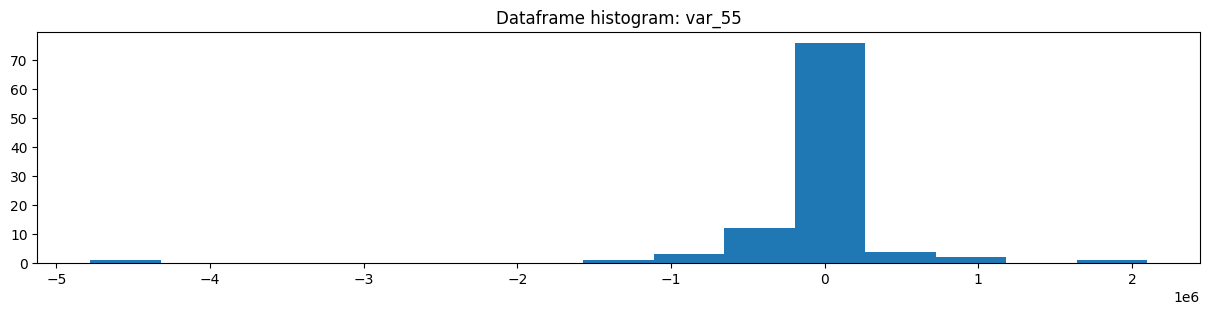

var_55            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean -5.238476e+04   29296.891096 -6.352317e+04
2             std  5.920158e+05  104352.508694  6.296051e+05
3             min -4.780255e+06 -160354.061586 -4.780255e+06
4             25% -1.264919e+05   -8682.427245 -1.295163e+05
5             50% -1.590080e+04    9794.679629 -2.977046e+04
6             75%  1.006234e+05   35898.349431  1.131039e+05
7             max  2.098274e+06  234368.983871  2.098274e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_55  Count in df (desc)  Mean target  Sum target  Count in df
0 -4.780255e+06                   1          0.0           0            1
1  1.499161e+04                   1          1.0           1            1
2  8.257343e+04                   1          0.0           0            1
3  6.934764e+04                   1          0.0           0            1
4  6.501745e+04                   1          0.0           0            1
5  5.348564e+04                   1          0.0           0            1
6  5.038479e+04                   1          0.0           0            1
7  5.038479e+04                   1          0.0           0            1
8  4.720841e+04                   1          0.0           0            1
9  3.870305e+04                   1          0.0           0            1

var_55  Count in the dataframe  Mean target  Sum target (desc)  \
0  -29922.167648                       1          1.0                  1   
1   15694.570941                       1          1.0                  1   
2   14991.608798                       1          1.0                  1   
3  192961.691955                       1          1.0                  1   
4  234368.983871                       1          1.0                  1   
5   96509.684902                       1          1.0                  1   
6  -35487.765893                       1          1.0                  1   
7   -1602.513777                       1          1.0                  1   
8    4813.302335                       1          1.0                  1   
9    4813.302335                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

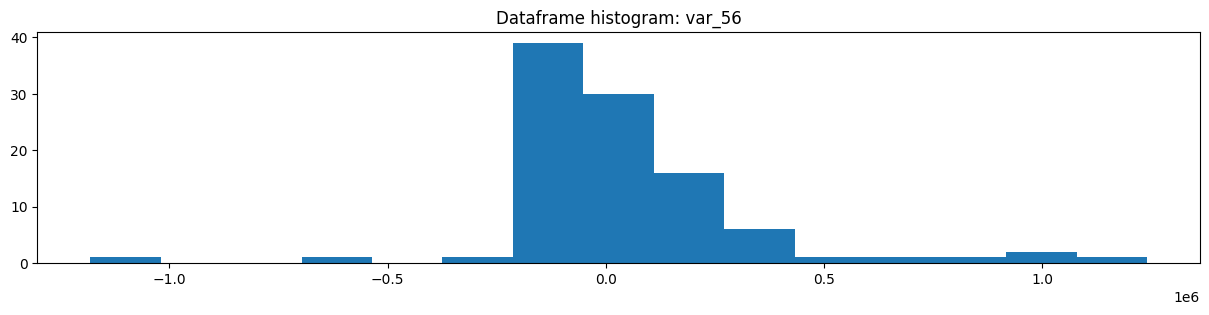

var_56            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean  4.900881e+04   31577.091558  5.138587e+04
2             std  2.906473e+05  155687.364125  3.049843e+05
3             min -1.181610e+06 -146727.601993 -1.181610e+06
4             25% -9.107328e+04  -89808.659624 -9.107328e+04
5             50% -1.317348e+04  -26436.511956 -9.505212e+03
6             75%  1.370608e+05  181384.315053  1.272965e+05
7             max  1.240040e+06  292585.000361  1.240040e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_56  Count in df (desc)  Mean target  Sum target  Count in df
0 -1.181610e+06                   1          0.0           0            1
1  5.061144e+04                   1          0.0           0            1
2  1.240418e+05                   1          0.0           0            1
3  1.235299e+05                   1          0.0           0            1
4  1.066796e+05                   1          0.0           0            1
5  1.066796e+05                   1          0.0           0            1
6  9.999933e+04                   1          0.0           0            1
7  9.728292e+04                   1          0.0           0            1
8  7.769613e+04                   1          0.0           0            1
9  6.832738e+04                   1          1.0           1            1

var_56  Count in the dataframe  Mean target  Sum target (desc)  \
0  292585.000361                       1          1.0                  1   
1 -146727.601993                       1          1.0                  1   
2  -26422.288543                       1          1.0                  1   
3  180712.273199                       1          1.0                  1   
4  183400.440615                       1          1.0                  1   
5  -75796.278399                       1          1.0                  1   
6   68327.379466                       1          1.0                  1   
7  -26450.735370                       1          1.0                  1   
8  237847.435801                       1          1.0                  1   
9 -131845.803301                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

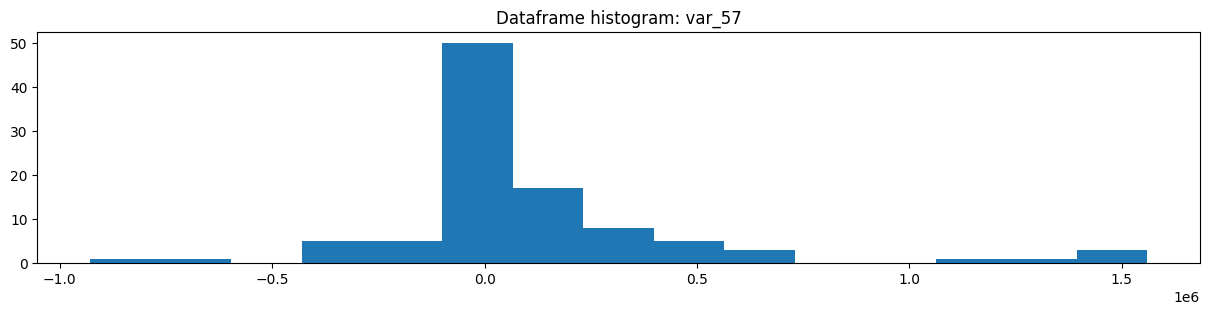

var_57            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean  1.116066e+05    5521.012942  1.260728e+05
2             std  3.801331e+05  159793.442910  3.992994e+05
3             min -9.284880e+05 -225811.334349 -9.284880e+05
4             25% -4.287133e+04  -84457.893421 -3.491040e+04
5             50%  1.514172e+04  -26356.196736  1.653626e+04
6             75%  2.033274e+05   49099.381988  2.173825e+05
7             max  1.559419e+06  364757.965993  1.559419e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_57  Count in df (desc)  Mean target  Sum target  Count in df
0 -928487.992424                   1          0.0           0            1
1   71222.233045                   1          0.0           0            1
2  174105.878200                   1          0.0           0            1
3  163894.756295                   1          0.0           0            1
4  151230.397743                   1          0.0           0            1
5  145088.953870                   1          0.0           0            1
6  145088.953867                   1          0.0           0            1
7  138342.387344                   1          0.0           0            1
8  106941.287820                   1          0.0           0            1
9  100913.034912                   1          0.0           0            1

var_57  Count in the dataframe  Mean target  Sum target (desc)  \
0  217153.360383                       1          1.0                  1   
1  364757.965993                       1          1.0                  1   
2    6554.296380                       1          1.0                  1   
3   33226.332005                       1          1.0                  1   
4 -225811.334349                       1          1.0                  1   
5   43929.365023                       1          1.0                  1   
6 -128387.279106                       1          1.0                  1   
7 -117954.119458                       1          1.0                  1   
8   64609.432881                       1          1.0                  1   
9  -73292.484741                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

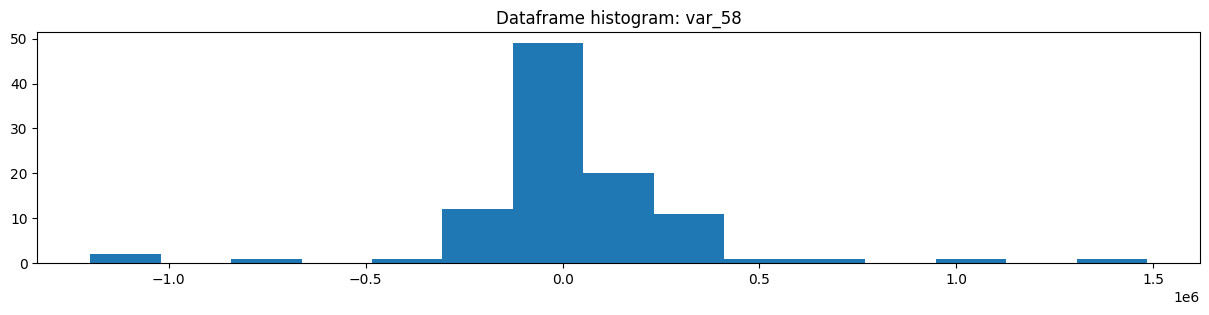

var_58            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean  2.428735e+03  -32436.614379  7.183101e+03
2             std  3.151830e+05   79817.674421  3.347333e+05
3             min -1.199552e+06 -143708.113930 -1.199552e+06
4             25% -1.091215e+05  -79518.343354 -1.105217e+05
5             50% -5.253281e+04  -42577.891594 -5.668121e+04
6             75%  1.090918e+05   48851.914087  1.258097e+05
7             max  1.484119e+06   83316.095982  1.484119e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_58  Count in df (desc)  Mean target  Sum target  Count in df
0 -1.199552e+06                   1          0.0           0            1
1  4.088179e+04                   1          0.0           0            1
2  9.702714e+04                   1          0.0           0            1
3  9.145244e+04                   1          0.0           0            1
4  8.649178e+04                   1          0.0           0            1
5  8.331610e+04                   1          1.0           1            1
6  7.271829e+04                   1          1.0           1            1
7  6.911713e+04                   1          0.0           0            1
8  6.176503e+04                   1          0.0           0            1
9  6.176503e+04                   1          0.0           0            1

var_58  Count in the dataframe  Mean target  Sum target (desc)  \
0   53021.965299                       1          1.0                  1   
1  -37983.021393                       1          1.0                  1   
2  -75534.207158                       1          1.0                  1   
3 -143708.113930                       1          1.0                  1   
4  -91470.751940                       1          1.0                  1   
5 -143708.113930                       1          1.0                  1   
6   47461.897017                       1          1.0                  1   
7  -33984.109646                       1          1.0                  1   
8  -72196.539352                       1          1.0                  1   
9   72718.288299                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

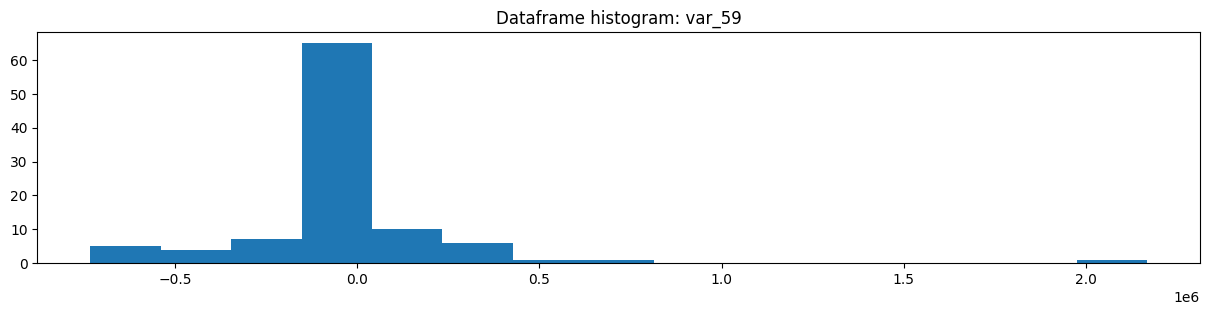

var_59            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean -3.576480e+04 -117854.197037 -2.457079e+04
2             std  3.154330e+05  163879.741328  3.298029e+05
3             min -7.326627e+05 -598363.741108 -7.326627e+05
4             25% -1.096426e+05 -111231.279364 -1.096426e+05
5             50% -4.231104e+04  -61127.385582 -3.865577e+04
6             75%  4.247721e+03  -46246.984611  9.932419e+03
7             max  2.167012e+06   11800.523505  2.167012e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_59  Count in df (desc)  Mean target  Sum target  Count in df
0 -732662.717641                   1          0.0           0            1
1  -21819.319561                   1          0.0           0            1
2    1585.051085                   1          0.0           0            1
3   -6307.946876                   1          1.0           1            1
4  -10299.755506                   1          0.0           0            1
5  -10942.207130                   1          0.0           0            1
6  -10942.207131                   1          0.0           0            1
7  -11165.792080                   1          0.0           0            1
8  -11554.166159                   1          0.0           0            1
9  -14741.029693                   1          0.0           0            1

var_59  Count in the dataframe  Mean target  Sum target (desc)  \
0  -48301.287755                       1          1.0                  1   
1  -40084.075181                       1          1.0                  1   
2 -598363.741108                       1          1.0                  1   
3   -6307.946876                       1          1.0                  1   
4 -101724.417288                       1          1.0                  1   
5   11800.523505                       1          1.0                  1   
6  -78721.228076                       1          1.0                  1   
7 -229484.361540                       1          1.0                  1   
8 -139751.865595                       1          1.0                  1   
9  -61197.577796                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

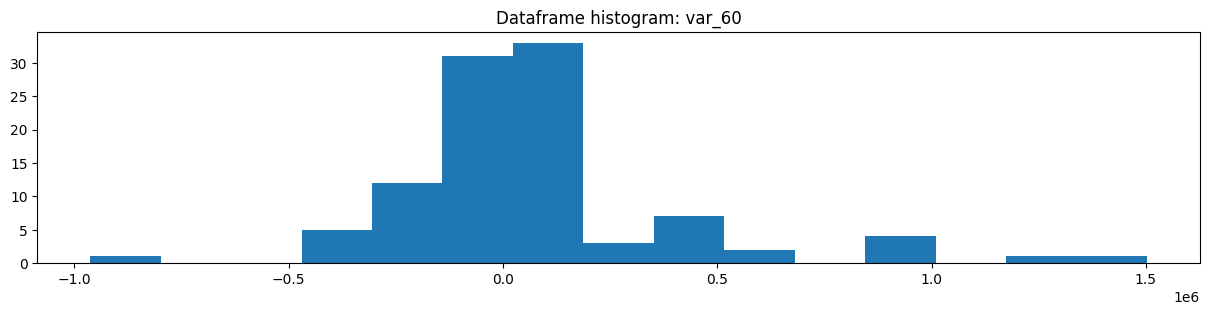

var_60            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean  7.247069e+04   28187.236972  7.850934e+04
2             std  3.449414e+05  134836.489111  3.644038e+05
3             min -9.629144e+05 -136630.131486 -9.629144e+05
4             25% -1.050861e+05  -61767.052822 -1.207066e+05
5             50%  2.844365e+04   40081.203517  2.844365e+04
6             75%  1.066896e+05   83105.722140  1.185593e+05
7             max  1.502696e+06  354755.045793  1.502696e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_60  Count in df (desc)  Mean target  Sum target  Count in df
0 -962914.425499                   1          0.0           0            1
1   71890.024508                   1          0.0           0            1
2   97878.089124                   1          0.0           0            1
3   96896.851901                   1          0.0           0            1
4   94653.438712                   1          1.0           1            1
5   94653.438711                   1          1.0           1            1
6   85983.777543                   1          0.0           0            1
7   79256.483283                   1          1.0           1            1
8   76620.402812                   1          0.0           0            1
9   72741.286318                   1          0.0           0            1

var_60  Count in the dataframe  Mean target  Sum target (desc)  \
0   15956.676901                       1          1.0                  1   
1   79256.483283                       1          1.0                  1   
2  -14106.277498                       1          1.0                  1   
3  354755.045793                       1          1.0                  1   
4 -100631.757841                       1          1.0                  1   
5   71404.628140                       1          1.0                  1   
6  -48812.151150                       1          1.0                  1   
7   64205.730134                       1          1.0                  1   
8 -136630.131486                       1          1.0                  1   
9   94653.438711                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

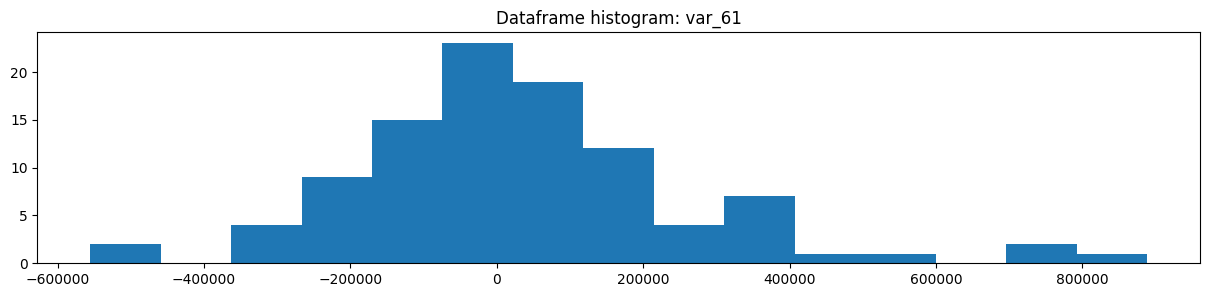

var_61             Df       Target 1       Target 0
0           count     100.000000      12.000000      88.000000
1            mean   32750.066551   -6280.837163   38072.462511
2             std  229761.395764  129494.216516  240234.787783
3             min -555462.459095 -195656.031784 -555462.459095
4             25%  -87274.043794  -92936.511775  -87274.043794
5             50%     680.511596   10363.948454   -2531.687717
6             75%  130357.370738   76940.159915  138663.562990
7             max  888238.243137  221513.166255  888238.243137
8   unique values     100.000000      12.000000      88.000000
9            NaNs       0.000000       0.000000       0.000000
10     NaNs share       0.000000       0.000000       0.000000

var_61  Count in df (desc)  Mean target  Sum target  Count in df
0 -555462.459095                   1          0.0           0            1
1   69604.391359                   1          0.0           0            1
2  128455.264975                   1          0.0           0            1
3  121327.664978                   1          0.0           0            1
4  109641.034510                   1          0.0           0            1
5  109190.147568                   1          1.0           1            1
6   96677.003681                   1          1.0           1            1
7   84011.362743                   1          0.0           0            1
8   77721.933024                   1          0.0           0            1
9   70361.211993                   1          1.0           1            1

var_61  Count in the dataframe  Mean target  Sum target (desc)  \
0   70361.211992                       1          1.0                  1   
1   70361.211993                       1          1.0                  1   
2  221513.166255                       1          1.0                  1   
3 -195656.031784                       1          1.0                  1   
4 -188969.703707                       1          1.0                  1   
5  -60290.023004                       1          1.0                  1   
6 -143054.365235                       1          1.0                  1   
7   27320.576991                       1          1.0                  1   
8   96677.003681                       1          1.0                  1   
9  109190.147568                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

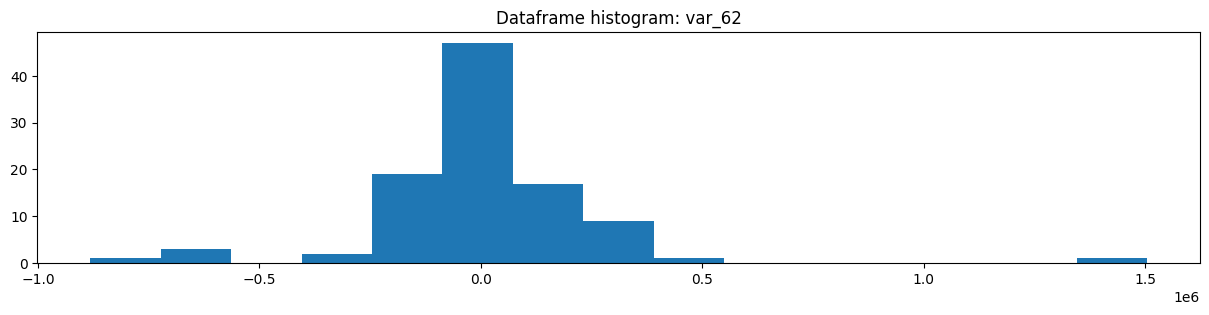

var_62            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean -6.893919e+03   51636.530598 -1.487534e+04
2             std  2.548403e+05  128839.625365  2.669561e+05
3             min -8.819955e+05  -72055.208184 -8.819955e+05
4             25% -8.619034e+04  -36922.063239 -9.990232e+04
5             50% -1.686776e+04   -6220.088375 -2.500356e+04
6             75%  9.500040e+04  130255.286147  8.768063e+04
7             max  1.503794e+06  290776.546836  1.503794e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_62  Count in df (desc)  Mean target  Sum target  Count in df
0 -881995.541906                   1          0.0           0            1
1   20038.823194                   1          0.0           0            1
2   85491.865546                   1          0.0           0            1
3   84347.464195                   1          0.0           0            1
4   56486.488497                   1          0.0           0            1
5   56486.488497                   1          0.0           0            1
6   39799.512376                   1          0.0           0            1
7   39603.390581                   1          1.0           1            1
8   35122.101085                   1          0.0           0            1
9   33748.980153                   1          0.0           0            1

var_62  Count in the dataframe  Mean target  Sum target (desc)  \
0  -26677.090661                       1          1.0                  1   
1   39603.390581                       1          1.0                  1   
2  143909.189184                       1          1.0                  1   
3   -6323.679111                       1          1.0                  1   
4  290776.546836                       1          1.0                  1   
5  125703.985135                       1          1.0                  1   
6   -6116.497640                       1          1.0                  1   
7   -6323.679110                       1          1.0                  1   
8  -67656.980972                       1          1.0                  1   
9  276168.687585                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

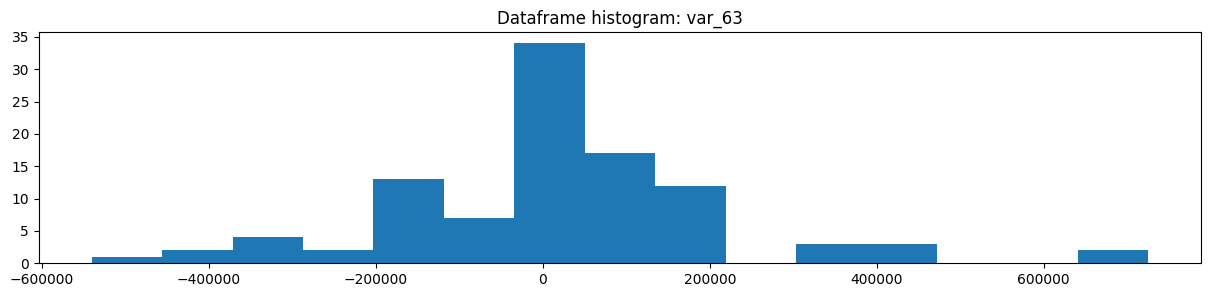

var_63             Df       Target 1       Target 0
0           count     100.000000      12.000000      88.000000
1            mean   16691.028688   67179.487398    9806.238864
2             std  203417.726692  128225.369796  211205.596272
3             min -540668.396036 -160621.464480 -540668.396036
4             25%  -66332.379764   14865.132620  -90032.077023
5             50%   24364.247854   44387.392617   18681.363072
6             75%   80349.864705   95293.836461   76422.395938
7             max  725510.397766  365373.596383  725510.397766
8   unique values     100.000000      12.000000      88.000000
9            NaNs       0.000000       0.000000       0.000000
10     NaNs share       0.000000       0.000000       0.000000

var_63  Count in df (desc)  Mean target  Sum target  Count in df
0 -540668.396036                   1          0.0           0            1
1   53266.978711                   1          1.0           1            1
2   79457.511649                   1          1.0           1            1
3   74220.886627                   1          0.0           0            1
4   66595.797768                   1          0.0           0            1
5   60833.223795                   1          0.0           0            1
6   60505.302499                   1          0.0           0            1
7   59038.058632                   1          0.0           0            1
8   59038.058608                   1          0.0           0            1
9   56742.825755                   1          0.0           0            1

var_63  Count in the dataframe  Mean target  Sum target (desc)  \
0  365373.596383                       1          1.0                  1   
1   18026.024909                       1          1.0                  1   
2  189871.620051                       1          1.0                  1   
3  142802.810896                       1          1.0                  1   
4   31930.361629                       1          1.0                  1   
5    5382.455752                       1          1.0                  1   
6   79457.511650                       1          1.0                  1   
7   35507.806522                       1          1.0                  1   
8 -160621.464480                       1          1.0                  1   
9   53266.978711                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

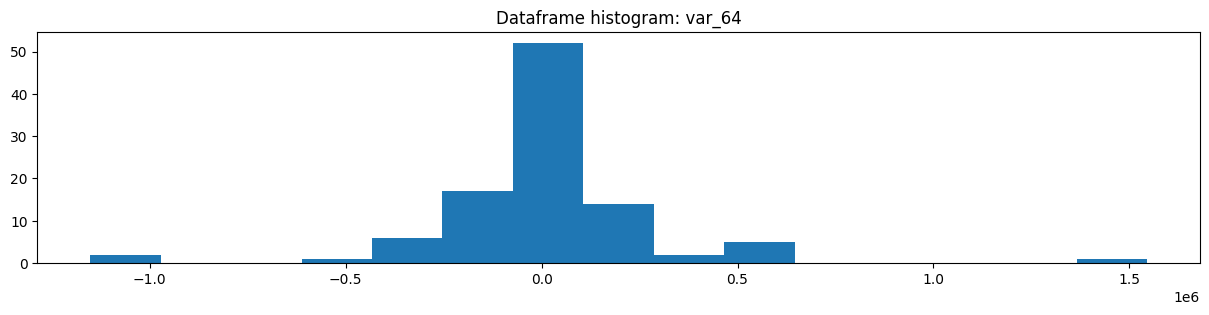

var_64            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean  9.093161e+03  -24719.094059  1.370392e+04
2             std  2.834013e+05  113774.751987  2.992967e+05
3             min -1.152259e+06 -252728.014860 -1.152259e+06
4             25% -7.583789e+04  -57307.773353 -7.583789e+04
5             50%  7.171725e+02  -13599.099187  2.669715e+03
6             75%  9.042000e+04   61125.961447  9.833614e+04
7             max  1.545185e+06  111653.551685  1.545185e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_64  Count in df (desc)  Mean target  Sum target  Count in df
0 -1.152259e+06                   1          0.0           0            1
1  4.626256e+04                   1          0.0           0            1
2  7.819054e+04                   1          0.0           0            1
3  7.260951e+04                   1          0.0           0            1
4  6.970783e+04                   1          0.0           0            1
5  6.441975e+04                   1          0.0           0            1
6  6.247513e+04                   1          1.0           1            1
7  6.118630e+04                   1          0.0           0            1
8  6.067624e+04                   1          1.0           1            1
9  5.594021e+04                   1          0.0           0            1

var_64  Count in the dataframe  Mean target  Sum target (desc)  \
0 -252728.014860                       1          1.0                  1   
1  -86877.561338                       1          1.0                  1   
2   -1828.487357                       1          1.0                  1   
3  100914.082701                       1          1.0                  1   
4  111653.551685                       1          1.0                  1   
5   62475.126788                       1          1.0                  1   
6   60676.239667                       1          1.0                  1   
7   17560.596995                       1          1.0                  1   
8  -47451.177358                       1          1.0                  1   
9 -210284.063597                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

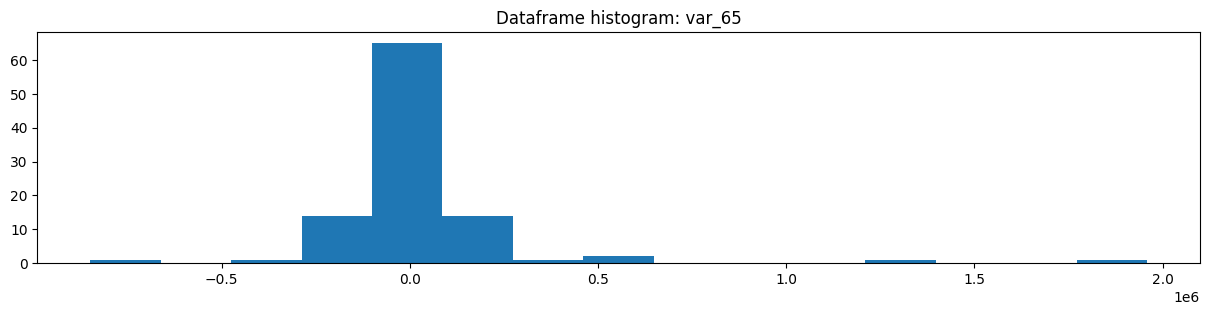

var_65            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean  4.311728e+04    5895.927308  4.819292e+04
2             std  2.901658e+05   99704.847456  3.071407e+05
3             min -8.492456e+05 -215173.612408 -8.492456e+05
4             25% -2.889441e+04  -11030.937381 -3.783132e+04
5             50%  2.518321e+04   51488.217209  2.366067e+04
6             75%  5.939679e+04   68082.859280  5.553425e+04
7             max  1.958821e+06   86756.610385  1.958821e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_65  Count in df (desc)  Mean target  Sum target  Count in df
0 -849245.577446                   1          0.0           0            1
1   42018.525917                   1          0.0           0            1
2   54788.624093                   1          1.0           1            1
3   54405.880863                   1          0.0           0            1
4   54405.880862                   1          0.0           0            1
5   53540.647363                   1          0.0           0            1
6   53356.295489                   1          0.0           0            1
7   52195.662610                   1          1.0           1            1
8   50780.771807                   1          1.0           1            1
9   46554.924380                   1          0.0           0            1

var_65  Count in the dataframe  Mean target  Sum target (desc)  \
0   69713.534125                       1          1.0                  1   
1   52195.662610                       1          1.0                  1   
2   35918.832387                       1          1.0                  1   
3 -215173.612408                       1          1.0                  1   
4   86756.610385                       1          1.0                  1   
5   69713.534125                       1          1.0                  1   
6   50780.771807                       1          1.0                  1   
7   67539.300998                       1          1.0                  1   
8  -10476.474136                       1          1.0                  1   
9  -12694.327119                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

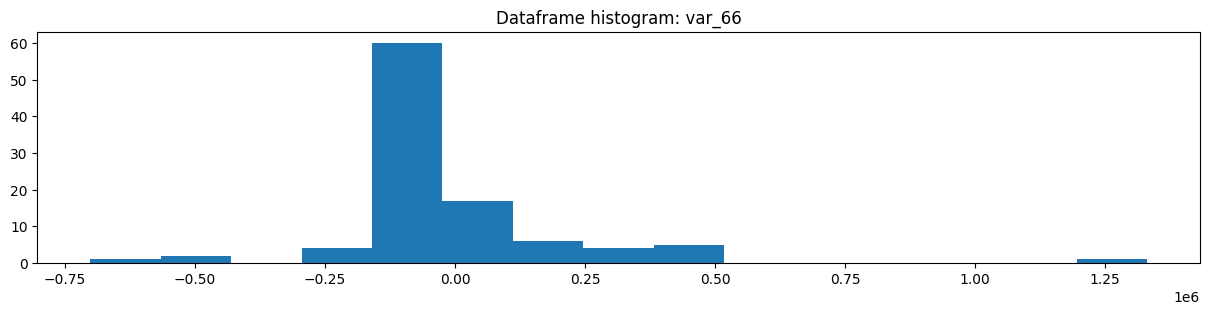

var_66            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean -5.957338e+03  -17531.949889 -4.378982e+03
2             std  2.234341e+05  127882.489540  2.339230e+05
3             min -7.018526e+05 -108790.885150 -7.018526e+05
4             25% -8.800726e+04  -82828.581804 -9.046806e+04
5             50% -4.828311e+04  -45808.901365 -4.828311e+04
6             75%  5.480396e+03  -24820.012052  1.377163e+04
7             max  1.330813e+06  370520.096528  1.330813e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_66  Count in df (desc)  Mean target  Sum target  Count in df
0 -701852.597373                   1          0.0           0            1
1  -30899.413378                   1          0.0           0            1
2   -1830.149240                   1          0.0           0            1
3  -12195.448895                   1          0.0           0            1
4  -13850.178245                   1          0.0           0            1
5  -13850.178245                   1          0.0           0            1
6  -17788.425466                   1          0.0           0            1
7  -19070.362919                   1          0.0           0            1
8  -19070.362920                   1          0.0           0            1
9  -25806.189142                   1          0.0           0            1

var_66  Count in the dataframe  Mean target  Sum target (desc)  \
0   11792.609605                       1          1.0                  1   
1  -61247.610372                       1          1.0                  1   
2  370520.096528                       1          1.0                  1   
3    4794.893262                       1          1.0                  1   
4  -54116.826416                       1          1.0                  1   
5  -37500.976314                       1          1.0                  1   
6  -34691.647158                       1          1.0                  1   
7  -87186.997334                       1          1.0                  1   
8  -34691.647157                       1          1.0                  1   
9  -97888.631535                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

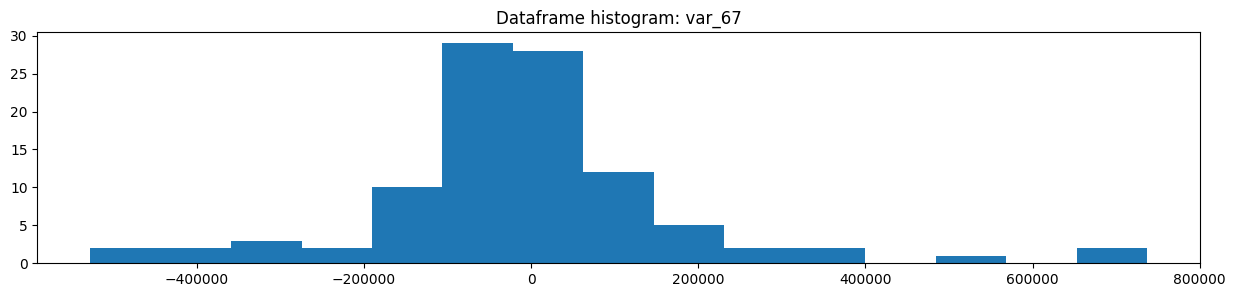

var_67             Df       Target 1       Target 0
0           count     100.000000      12.000000      88.000000
1            mean  -10486.294402  -22728.182235   -8816.946061
2             std  187642.965677  164807.262850  191334.064357
3             min -527676.323398 -427873.600632 -527676.323398
4             25%  -83906.565423  -58291.844554  -85828.477281
5             50%  -15266.564642  -14384.578475  -15266.564642
6             75%   60819.426186   18889.468946   61957.565427
7             max  736851.234652  309821.446397  736851.234652
8   unique values     100.000000      12.000000      88.000000
9            NaNs       0.000000       0.000000       0.000000
10     NaNs share       0.000000       0.000000       0.000000

var_67  Count in df (desc)  Mean target  Sum target  Count in df
0 -527676.323398                   1          0.0           0            1
1   12169.387031                   1          1.0           1            1
2   46889.216442                   1          0.0           0            1
3   39049.714691                   1          1.0           1            1
4   38725.552611                   1          0.0           0            1
5   37171.418776                   1          0.0           0            1
6   30725.675226                   1          0.0           0            1
7   29985.055412                   1          0.0           0            1
8   24230.456116                   1          0.0           0            1
9   17821.386272                   1          0.0           0            1

var_67  Count in the dataframe  Mean target  Sum target (desc)  \
0  -17354.637709                       1          1.0                  1   
1  -49753.604264                       1          1.0                  1   
2   12169.387031                       1          1.0                  1   
3  -11414.519241                       1          1.0                  1   
4   79569.380475                       1          1.0                  1   
5  309821.446397                       1          1.0                  1   
6 -427873.600632                       1          1.0                  1   
7  -83906.565422                       1          1.0                  1   
8  -10858.010130                       1          1.0                  1   
9  -28280.612592                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

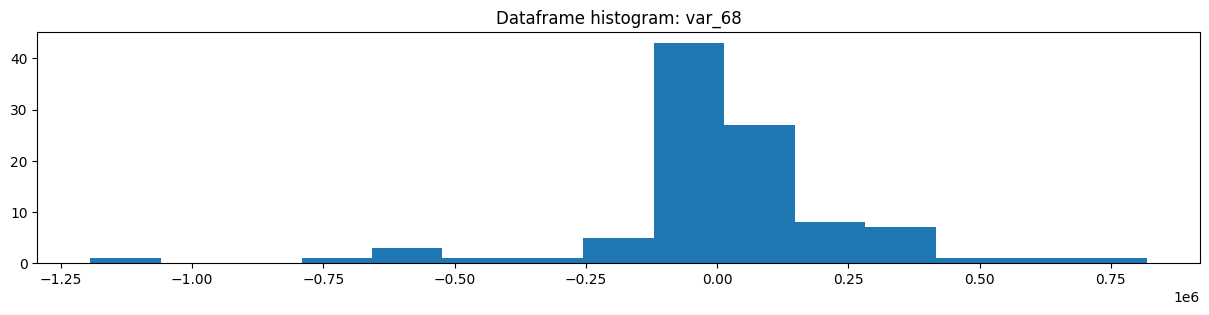

var_68            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean  1.058183e+04   -6971.123103  1.297541e+04
2             std  2.387499e+05   53715.644192  2.538714e+05
3             min -1.194083e+06  -60175.785890 -1.194083e+06
4             25% -4.003998e+04  -33630.134321 -4.003998e+04
5             50%  3.979046e+03  -23860.019991  8.299900e+03
6             75%  8.259695e+04   13583.263455  8.779844e+04
7             max  8.189721e+05  132236.316910  8.189721e+05
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_68  Count in df (desc)  Mean target  Sum target  Count in df
0 -1.194083e+06                   1          0.0           0            1
1  4.318638e+04                   1          1.0           1            1
2  8.141446e+04                   1          0.0           0            1
3  7.960221e+04                   1          0.0           0            1
4  7.779511e+04                   1          0.0           0            1
5  7.736794e+04                   1          0.0           0            1
6  6.677538e+04                   1          0.0           0            1
7  6.677538e+04                   1          0.0           0            1
8  6.407140e+04                   1          0.0           0            1
9  6.110277e+04                   1          0.0           0            1

var_68  Count in the dataframe  Mean target  Sum target (desc)  \
0  -28568.939312                       1          1.0                  1   
1  -60175.785890                       1          1.0                  1   
2  -21494.286499                       1          1.0                  1   
3  -28568.939313                       1          1.0                  1   
4   11045.755849                       1          1.0                  1   
5  -21234.200172                       1          1.0                  1   
6   21195.786272                       1          1.0                  1   
7  -26225.753482                       1          1.0                  1   
8  -56236.090271                       1          1.0                  1   
9  132236.316910                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

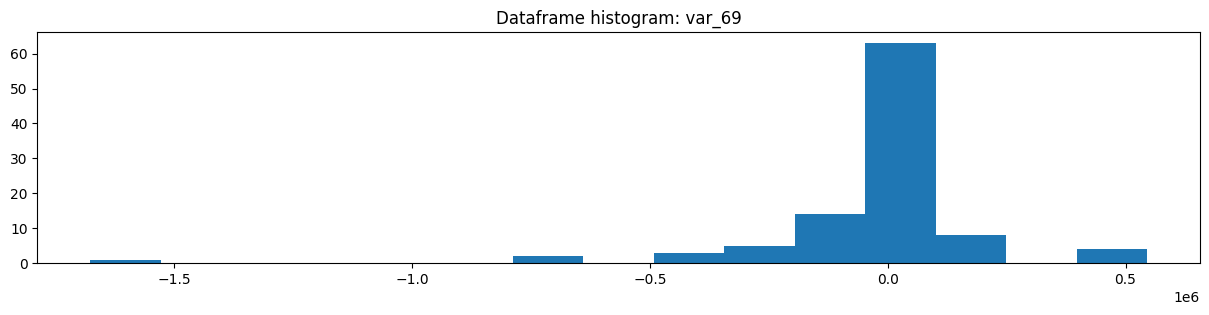

var_69            Df      Target 1      Target 0
0           count  1.000000e+02     12.000000  8.800000e+01
1            mean -2.979096e+04   4302.947399 -3.444012e+04
2             std  2.460171e+05  25756.475882  2.619285e+05
3             min -1.676585e+06 -32510.335566 -1.676585e+06
4             25% -4.726026e+04 -14329.204124 -5.863099e+04
5             50% -1.768112e+03   2215.298154 -3.141042e+03
6             75%  3.711027e+04  21295.851905  4.859902e+04
7             max  5.451690e+05  49914.047790  5.451690e+05
8   unique values  1.000000e+02     12.000000  8.800000e+01
9            NaNs  0.000000e+00      0.000000  0.000000e+00
10     NaNs share  0.000000e+00      0.000000  0.000000e+00

var_69  Count in df (desc)  Mean target  Sum target  Count in df
0 -1.676585e+06                   1          0.0           0            1
1  2.148284e+04                   1          0.0           0            1
2  3.113490e+04                   1          1.0           1            1
3  3.113490e+04                   1          1.0           1            1
4  3.060576e+04                   1          0.0           0            1
5  3.060576e+04                   1          0.0           0            1
6  3.050260e+04                   1          0.0           0            1
7  3.050260e+04                   1          0.0           0            1
8  2.817903e+04                   1          0.0           0            1
9  2.794588e+04                   1          0.0           0            1

var_69  Count in the dataframe  Mean target  Sum target (desc)  \
0 -29167.422401                       1          1.0                  1   
1 -32510.335566                       1          1.0                  1   
2 -13856.321614                       1          1.0                  1   
3  16946.819137                       1          1.0                  1   
4  18016.168627                       1          1.0                  1   
5 -15747.851655                       1          1.0                  1   
6  49914.047790                       1          1.0                  1   
7   6965.112374                       1          1.0                  1   
8  -8660.135316                       1          1.0                  1   
9  -2534.516065                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

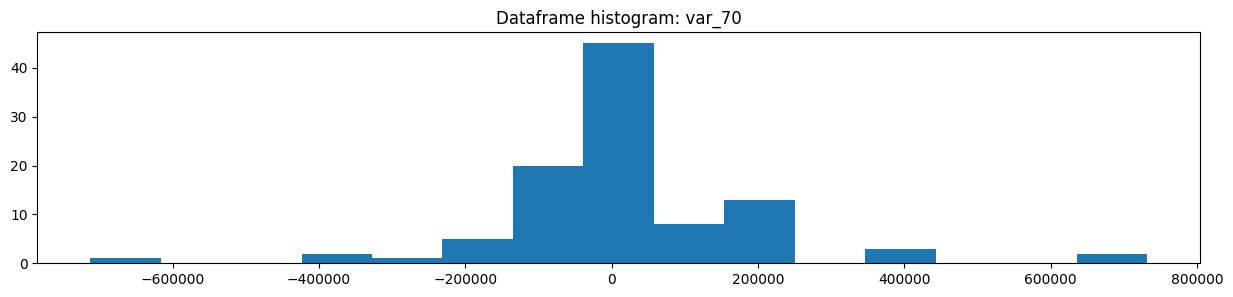

var_70             Df       Target 1       Target 0
0           count     100.000000      12.000000      88.000000
1            mean   26419.001313  -71873.767636   39822.560715
2             std  180657.867928  218091.301502  172077.902325
3             min -712487.054413 -712487.054413 -338981.210007
4             25%  -45585.449479  -45054.821271  -45585.449479
5             50%    6609.869483  -33221.975727    9026.512812
6             75%   60546.248307   10261.842121   93636.477815
7             max  731502.664039  185473.023263  731502.664039
8   unique values     100.000000      12.000000      88.000000
9            NaNs       0.000000       0.000000       0.000000
10     NaNs share       0.000000       0.000000       0.000000

var_70  Count in df (desc)  Mean target  Sum target  Count in df
0 -712487.054413                   1          1.0           1            1
1   31812.551973                   1          0.0           0            1
2   57463.334750                   1          0.0           0            1
3   57447.652657                   1          0.0           0            1
4   45472.932823                   1          0.0           0            1
5   42511.774269                   1          0.0           0            1
6   41001.608407                   1          0.0           0            1
7   41001.608398                   1          0.0           0            1
8   34655.710167                   1          0.0           0            1
9   34655.710167                   1          0.0           0            1

var_70  Count in the dataframe  Mean target  Sum target (desc)  \
0 -712487.054413                       1          1.0                  1   
1   21309.631664                       1          1.0                  1   
2    8319.257279                       1          1.0                  1   
3  185473.023263                       1          1.0                  1   
4 -184879.804143                       1          1.0                  1   
5  -47787.204457                       1          1.0                  1   
6   10261.842121                       1          1.0                  1   
7   10261.842121                       1          1.0                  1   
8  -44144.026876                       1          1.0                  1   
9  -31688.460303                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

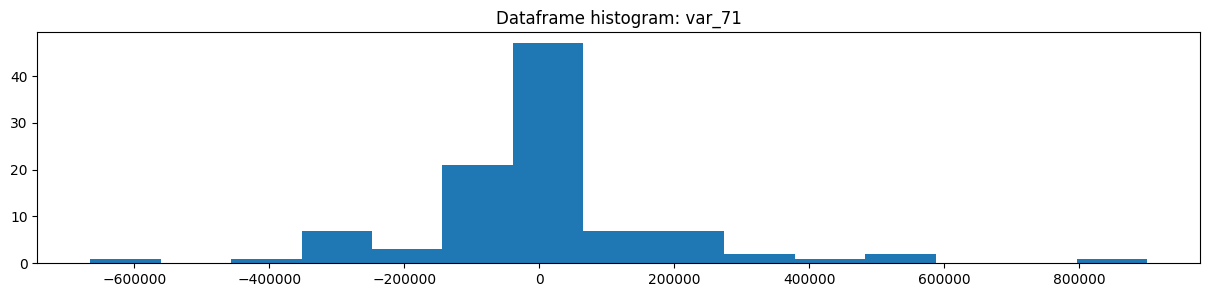

var_71             Df       Target 1       Target 0
0           count     100.000000      12.000000      88.000000
1            mean    -485.988101   -1876.905807    -296.317504
2             std  187980.284862   92101.671394  197832.678749
3             min -665346.066757 -248509.092120 -665346.066757
4             25%  -68382.831339  -15721.852764  -72449.668756
5             50%   -8337.394503   14466.046898  -15018.544120
6             75%   39431.370807   23559.404491   40812.320007
7             max  900641.402705  157686.810863  900641.402705
8   unique values     100.000000      12.000000      88.000000
9            NaNs       0.000000       0.000000       0.000000
10     NaNs share       0.000000       0.000000       0.000000

var_71  Count in df (desc)  Mean target  Sum target  Count in df
0 -665346.066757                   1          0.0           0            1
1   16501.425059                   1          1.0           1            1
2   34481.317882                   1          0.0           0            1
3   34481.317882                   1          0.0           0            1
4   27053.302813                   1          0.0           0            1
5   26261.912570                   1          1.0           1            1
6   22658.568465                   1          1.0           1            1
7   22658.568465                   1          1.0           1            1
8   22484.743642                   1          0.0           0            1
9   19931.988113                   1          0.0           0            1

var_71  Count in the dataframe  Mean target  Sum target (desc)  \
0   49561.884983                       1          1.0                  1   
1   22658.568465                       1          1.0                  1   
2 -248509.092120                       1          1.0                  1   
3  157686.810863                       1          1.0                  1   
4  -30302.236183                       1          1.0                  1   
5  -31919.206374                       1          1.0                  1   
6   12430.668737                       1          1.0                  1   
7   22658.568465                       1          1.0                  1   
8   26261.912570                       1          1.0                  1   
9   -8690.449189                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

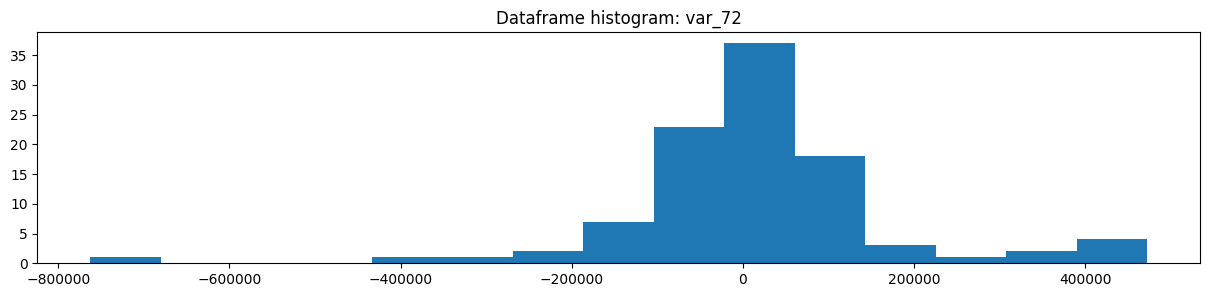

var_72             Df       Target 1       Target 0
0           count     100.000000      12.000000      88.000000
1            mean   16578.519445   27550.545466   15082.334078
2             std  156062.989046  104175.017570  162246.853319
3             min -762788.169954 -216536.810042 -762788.169954
4             25%  -39070.428280    -365.865922  -42094.985590
5             50%   18769.376722   16419.506267   18769.376722
6             75%   71322.162148   75523.803710   67262.852017
7             max  472175.942361  234780.397026  472175.942361
8   unique values     100.000000      12.000000      88.000000
9            NaNs       0.000000       0.000000       0.000000
10     NaNs share       0.000000       0.000000       0.000000

var_72  Count in df (desc)  Mean target  Sum target  Count in df
0 -762788.169954                   1          0.0           0            1
1   44758.135278                   1          0.0           0            1
2   65935.404960                   1          0.0           0            1
3   62827.457156                   1          0.0           0            1
4   57076.748484                   1          1.0           1            1
5   54618.966823                   1          0.0           0            1
6   51229.778237                   1          0.0           0            1
7   49944.164305                   1          0.0           0            1
8   49261.798565                   1          0.0           0            1
9   48228.259814                   1          0.0           0            1

var_72  Count in the dataframe  Mean target  Sum target (desc)  \
0   -6491.870286                       1          1.0                  1   
1   87436.007767                       1          1.0                  1   
2  234780.397026                       1          1.0                  1   
3   71553.069025                       1          1.0                  1   
4   29363.618859                       1          1.0                  1   
5    3475.393676                       1          1.0                  1   
6    3475.393676                       1          1.0                  1   
7    1676.135533                       1          1.0                  1   
8   93316.131477                       1          1.0                  1   
9 -216536.810042                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

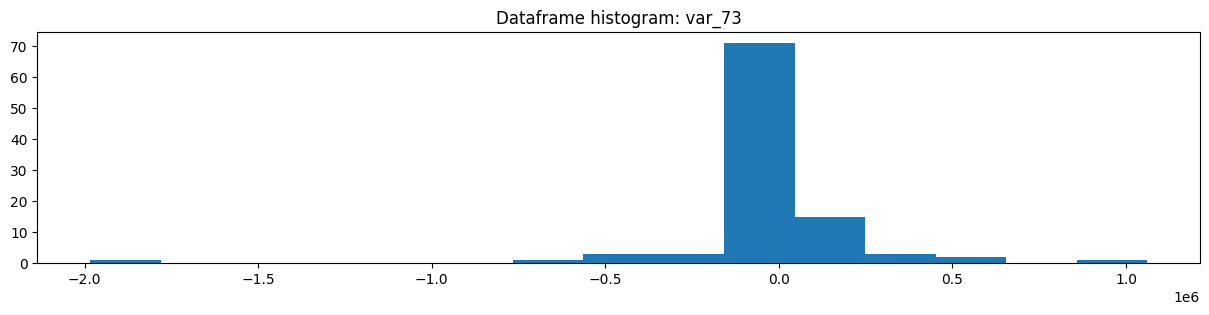

var_73            Df      Target 1      Target 0
0           count  1.000000e+02     12.000000  8.800000e+01
1            mean -1.052698e+03   2607.360694 -1.551797e+03
2             std  2.737633e+05  30704.252708  2.918262e+05
3             min -1.984311e+06 -34339.996142 -1.984311e+06
4             25% -1.245522e+04 -11415.806065 -1.245522e+04
5             50%  2.720866e+03  -2898.181489  2.751441e+03
6             75%  3.029959e+04   5073.742046  3.588093e+04
7             max  1.060483e+06  81320.143352  1.060483e+06
8   unique values  1.000000e+02     12.000000  8.800000e+01
9            NaNs  0.000000e+00      0.000000  0.000000e+00
10     NaNs share  0.000000e+00      0.000000  0.000000e+00

var_73  Count in df (desc)  Mean target  Sum target  Count in df
0 -1.984311e+06                   1          0.0           0            1
1  1.473503e+04                   1          0.0           0            1
2  2.414891e+04                   1          0.0           0            1
3  2.224869e+04                   1          0.0           0            1
4  1.994151e+04                   1          0.0           0            1
5  1.994151e+04                   1          0.0           0            1
6  1.941106e+04                   1          0.0           0            1
7  1.726038e+04                   1          0.0           0            1
8  1.663079e+04                   1          0.0           0            1
9  1.647168e+04                   1          0.0           0            1

var_73  Count in the dataframe  Mean target  Sum target (desc)  \
0  36077.359698                       1          1.0                  1   
1  -7240.471143                       1          1.0                  1   
2  -1578.438782                       1          1.0                  1   
3   4056.161263                       1          1.0                  1   
4   4056.161263                       1          1.0                  1   
5  81320.143352                       1          1.0                  1   
6  -4217.924197                       1          1.0                  1   
7 -34339.996142                       1          1.0                  1   
8 -28324.888354                       1          1.0                  1   
9   8126.484396                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

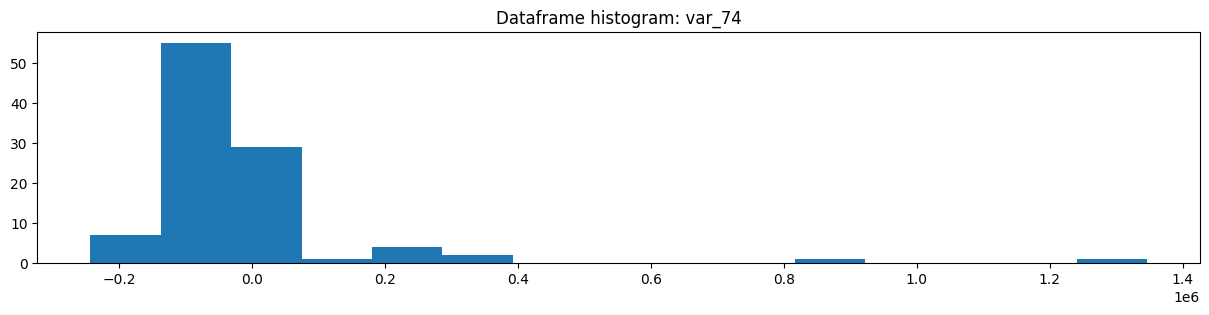

var_74            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean -1.300004e+04  -12065.781585 -1.312744e+04
2             std  1.893159e+05   81854.644944  1.998418e+05
3             min -2.431127e+05  -56261.102090 -2.431127e+05
4             25% -7.460155e+04  -50679.789806 -8.649731e+04
5             50% -4.183513e+04  -35064.901020 -4.389593e+04
6             75% -1.344040e+04  -17571.791686 -1.344040e+04
7             max  1.346357e+06  240704.360188  1.346357e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_74  Count in df (desc)  Mean target  Sum target  Count in df
0 -243112.727903                   1          0.0           0            1
1  -29179.080718                   1          0.0           0            1
2  -15848.531246                   1          0.0           0            1
3  -17903.823881                   1          0.0           0            1
4  -18464.840908                   1          0.0           0            1
5  -20936.774791                   1          0.0           0            1
6  -21062.778256                   1          0.0           0            1
7  -22633.185644                   1          1.0           1            1
8  -27103.313920                   1          1.0           1            1
9  -27167.775253                   1          0.0           0            1

var_74  Count in the dataframe  Mean target  Sum target (desc)  \
0   -2387.609813                       1          1.0                  1   
1  -56261.102090                       1          1.0                  1   
2  -51502.183728                       1          1.0                  1   
3   -1412.625592                       1          1.0                  1   
4  240704.360188                       1          1.0                  1   
5  -31427.629398                       1          1.0                  1   
6  -38702.172643                       1          1.0                  1   
7  -47397.155796                       1          1.0                  1   
8  -56261.102090                       1          1.0                  1   
9  -27103.313920                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

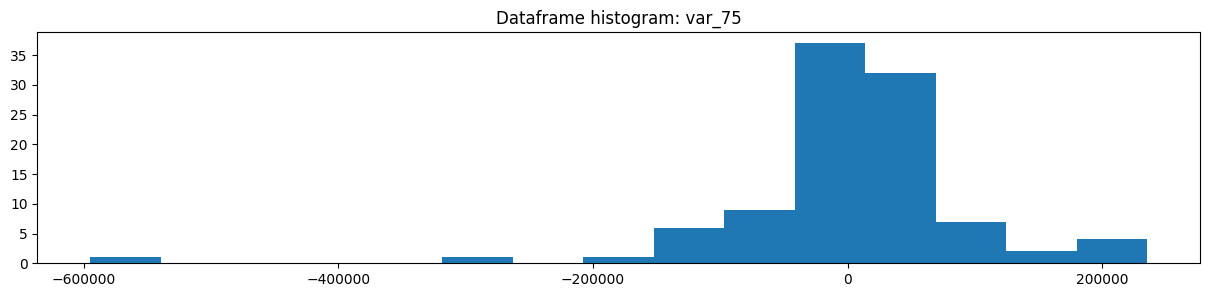

var_75             Df      Target 1       Target 0
0           count     100.000000     12.000000      88.000000
1            mean     172.272805   -164.618398     218.212514
2             std   95675.633540  37169.903523  101201.386332
3             min -594936.040607 -81238.073933 -594936.040607
4             25%  -20771.191579 -18983.430084  -20771.191579
5             50%   10473.043267   3288.395037   11089.331509
6             75%   27599.467728  15093.657107   30527.400111
7             max  235215.687393  75047.856693  235215.687393
8   unique values     100.000000     12.000000      88.000000
9            NaNs       0.000000      0.000000       0.000000
10     NaNs share       0.000000      0.000000       0.000000

var_75  Count in df (desc)  Mean target  Sum target  Count in df
0 -594936.040607                   1          0.0           0            1
1   18400.209822                   1          0.0           0            1
2   27419.454353                   1          0.0           0            1
3   26956.700708                   1          0.0           0            1
4   26956.700708                   1          0.0           0            1
5   26932.828994                   1          0.0           0            1
6   26067.944608                   1          0.0           0            1
7   23381.191671                   1          0.0           0            1
8   20852.407451                   1          0.0           0            1
9   20852.407444                   1          0.0           0            1

var_75  Count in the dataframe  Mean target  Sum target (desc)  \
0 -23442.413762                       1          1.0                  1   
1   7481.201525                       1          1.0                  1   
2  75047.856693                       1          1.0                  1   
3  14155.700594                       1          1.0                  1   
4   -904.411451                       1          1.0                  1   
5   7481.201524                       1          1.0                  1   
6  17907.526645                       1          1.0                  1   
7  -3125.133328                       1          1.0                  1   
8 -81238.073933                       1          1.0                  1   
9  28139.507821                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

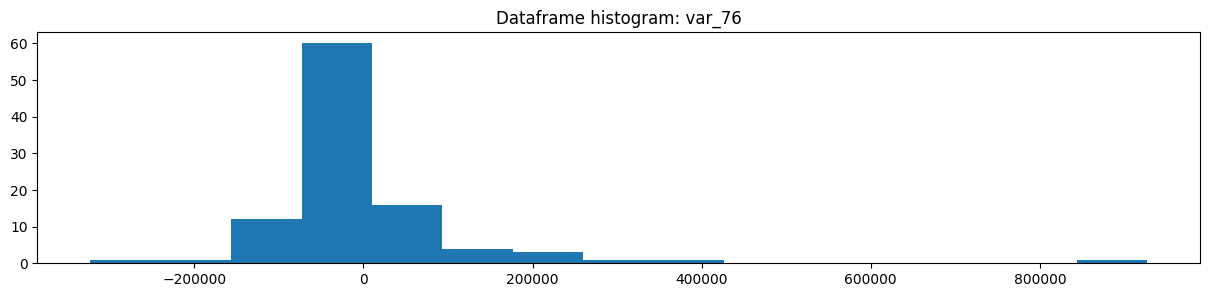

var_76             Df      Target 1       Target 0
0           count     100.000000     12.000000      88.000000
1            mean   -2181.125850 -32197.268492    1911.984511
2             std  130016.164592  27021.656783  137848.754981
3             min -323227.884310 -63338.325956 -323227.884310
4             25%  -52257.372504 -52638.096970  -51355.148818
5             50%  -24721.301999 -31070.914436  -21958.308085
6             75%   15466.721194 -24766.561245   30235.562017
7             max  926786.423167  35333.090173  926786.423167
8   unique values     100.000000     12.000000      88.000000
9            NaNs       0.000000      0.000000       0.000000
10     NaNs share       0.000000      0.000000       0.000000

var_76  Count in df (desc)  Mean target  Sum target  Count in df
0 -323227.884310                   1          0.0           0            1
1  -11924.016936                   1          0.0           0            1
2    9707.885693                   1          0.0           0            1
3    2200.109064                   1          0.0           0            1
4    2200.109064                   1          0.0           0            1
5   -1985.926787                   1          0.0           0            1
6   -3182.717046                   1          0.0           0            1
7   -3201.848964                   1          0.0           0            1
8   -3606.280288                   1          0.0           0            1
9  -10631.590019                   1          1.0           1            1

var_76  Count in the dataframe  Mean target  Sum target (desc)  \
0 -24630.783505                       1          1.0                  1   
1 -24811.820492                       1          1.0                  1   
2 -63338.325956                       1          1.0                  1   
3 -34441.565308                       1          1.0                  1   
4 -27700.263565                       1          1.0                  1   
5 -61501.472880                       1          1.0                  1   
6 -10631.590019                       1          1.0                  1   
7  35333.090173                       1          1.0                  1   
8 -51161.598773                       1          1.0                  1   
9 -38715.036452                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

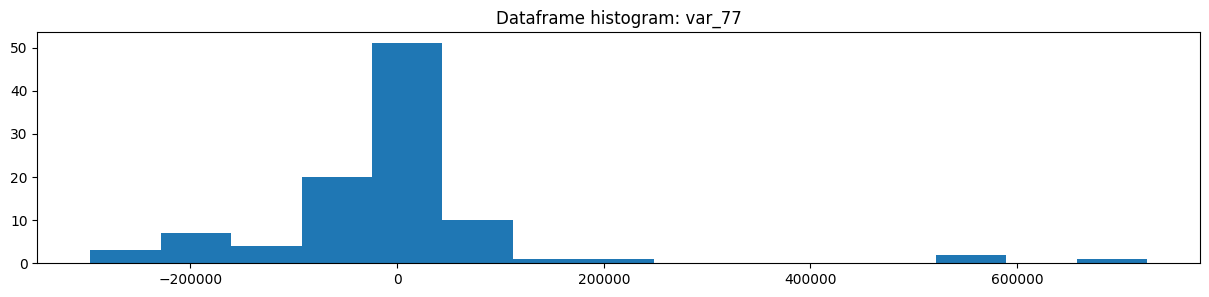

var_77             Df       Target 1       Target 0
0           count     100.000000      12.000000      88.000000
1            mean   -8441.023313  -11022.150837   -8089.051378
2             std  140876.866916   68930.940397  148262.961603
3             min -296945.050763 -215655.850360 -296945.050763
4             25%  -48578.462432  -13095.533841  -59684.105522
5             50%   -8422.977306    4572.896303   -8841.671085
6             75%   15749.211094   10322.353971   16065.510222
7             max  725622.058504   53815.956404  725622.058504
8   unique values     100.000000      12.000000      88.000000
9            NaNs       0.000000       0.000000       0.000000
10     NaNs share       0.000000       0.000000       0.000000

var_77  Count in df (desc)  Mean target  Sum target  Count in df
0 -296945.050763                   1          0.0           0            1
1    2598.001759                   1          0.0           0            1
2   14984.076595                   1          0.0           0            1
3   12950.569951                   1          0.0           0            1
4   11617.909484                   1          1.0           1            1
5    9890.502134                   1          1.0           1            1
6    9890.502133                   1          1.0           1            1
7    6735.316281                   1          1.0           1            1
8    6147.134356                   1          0.0           0            1
9    5427.938705                   1          0.0           0            1

var_77  Count in the dataframe  Mean target  Sum target (desc)  \
0   2410.476324                       1          1.0                  1   
1   6735.316281                       1          1.0                  1   
2  50659.482146                       1          1.0                  1   
3 -12205.402613                       1          1.0                  1   
4 -31117.493532                       1          1.0                  1   
5  53815.956404                       1          1.0                  1   
6  -2541.280915                       1          1.0                  1   
7 -15765.927526                       1          1.0                  1   
8   9890.502133                       1          1.0                  1   
9   9890.502134                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

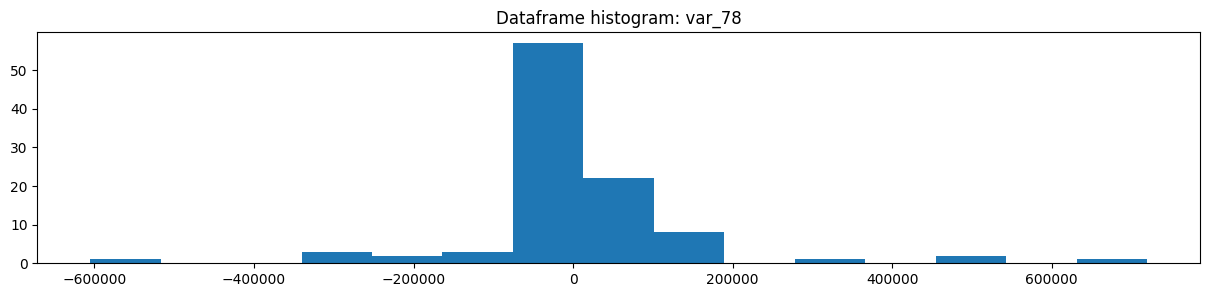

var_78             Df       Target 1       Target 0
0           count     100.000000      12.000000      88.000000
1            mean    4068.140278   20577.164905    1816.909647
2             std  147711.679006   65535.953824  155699.907924
3             min -605319.128418  -62193.075194 -605319.128418
4             25%  -42997.514357  -21629.767943  -43033.105100
5             50%  -18922.638911   -6112.927425  -22652.499245
6             75%   44213.662721   57011.116786   43749.649159
7             max  719481.020708  132282.490322  719481.020708
8   unique values     100.000000      12.000000      88.000000
9            NaNs       0.000000       0.000000       0.000000
10     NaNs share       0.000000       0.000000       0.000000

var_78  Count in df (desc)  Mean target  Sum target  Count in df
0 -605319.128418                   1          0.0           0            1
1    6702.241361                   1          0.0           0            1
2   43749.649159                   1          0.0           0            1
3   42753.493288                   1          1.0           1            1
4   39197.857792                   1          0.0           0            1
5   28770.842619                   1          0.0           0            1
6   23427.062051                   1          0.0           0            1
7   19647.144242                   1          0.0           0            1
8   15391.845723                   1          0.0           0            1
9   15391.845722                   1          0.0           0            1

var_78  Count in the dataframe  Mean target  Sum target (desc)  \
0  -18922.638911                       1          1.0                  1   
1    1991.832318                       1          1.0                  1   
2  -18922.638911                       1          1.0                  1   
3  -14217.687168                       1          1.0                  1   
4  -62193.075194                       1          1.0                  1   
5   91227.356926                       1          1.0                  1   
6  122056.682532                       1          1.0                  1   
7  132282.490322                       1          1.0                  1   
8   45605.703406                       1          1.0                  1   
9  -29751.155039                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

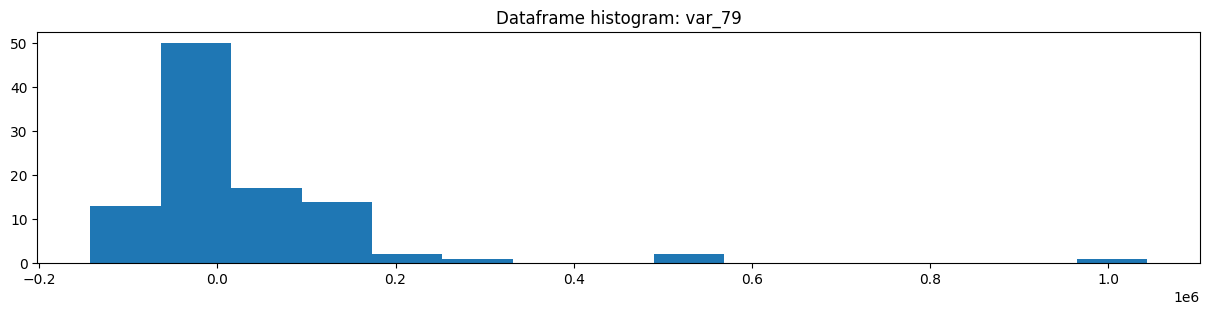

var_79            Df       Target 1      Target 0
0           count  1.000000e+02      12.000000  8.800000e+01
1            mean  2.799724e+04   12539.439591  3.010512e+04
2             std  1.458348e+05   50048.051280  1.544252e+05
3             min -1.428327e+05  -44171.516644 -1.428327e+05
4             25% -4.401276e+04  -15099.724520 -4.608401e+04
5             50% -1.023216e+04    1038.564516 -1.202165e+04
6             75%  6.170117e+04   20284.326553  6.411302e+04
7             max  1.043709e+06  128879.401253  1.043709e+06
8   unique values  1.000000e+02      12.000000  8.800000e+01
9            NaNs  0.000000e+00       0.000000  0.000000e+00
10     NaNs share  0.000000e+00       0.000000  0.000000e+00

var_79  Count in df (desc)  Mean target  Sum target  Count in df
0 -142832.736541                   1          0.0           0            1
1   17222.634731                   1          0.0           0            1
2   59040.903675                   1          0.0           0            1
3   59040.903674                   1          0.0           0            1
4   57099.889857                   1          0.0           0            1
5   55423.771084                   1          0.0           0            1
6   43862.704255                   1          0.0           0            1
7   40595.591121                   1          0.0           0            1
8   39738.188680                   1          0.0           0            1
9   37778.405174                   1          1.0           1            1

var_79  Count in the dataframe  Mean target  Sum target (desc)  \
0  37778.405174                       1          1.0                  1   
1 -36043.441656                       1          1.0                  1   
2  -1862.547313                       1          1.0                  1   
3  -8118.485474                       1          1.0                  1   
4  14452.967012                       1          1.0                  1   
5  14452.967012                       1          1.0                  1   
6  79537.636615                       1          1.0                  1   
7   2434.799674                       1          1.0                  1   
8   -357.670642                       1          1.0                  1   
9 -36509.239919                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

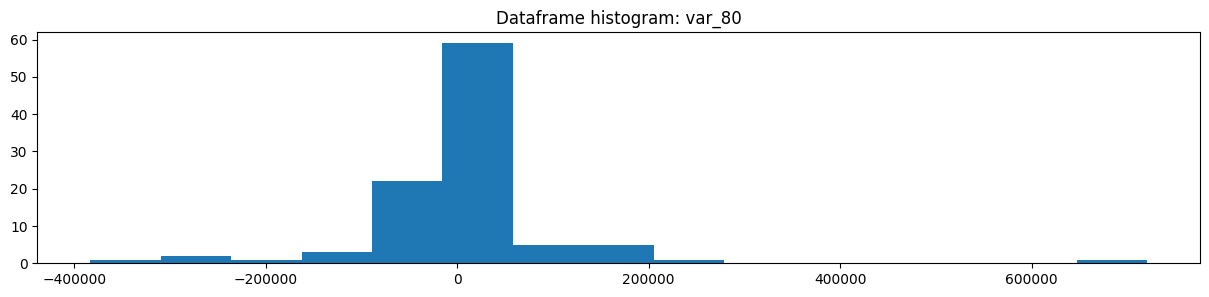

var_80             Df       Target 1       Target 0
0           count     100.000000      12.000000      88.000000
1            mean    4303.609360  -28031.827891    8712.987167
2             std  110437.998788   81095.828358  113505.219029
3             min -383367.042381 -282609.952560 -383367.042381
4             25%  -17996.242358  -13940.846452  -19014.239919
5             50%   -2520.307401   -4340.222278   -1793.881427
6             75%   22559.699581   -1626.214782   28804.212884
7             max  720592.651098   24865.414852  720592.651098
8   unique values     100.000000      12.000000      88.000000
9            NaNs       0.000000       0.000000       0.000000
10     NaNs share       0.000000       0.000000       0.000000

var_80  Count in df (desc)  Mean target  Sum target  Count in df
0 -383367.042381                   1          0.0           0            1
1    4837.549027                   1          0.0           0            1
2   19057.447606                   1          0.0           0            1
3   18596.728407                   1          0.0           0            1
4   17884.509362                   1          0.0           0            1
5   15594.436380                   1          0.0           0            1
6   12989.144614                   1          0.0           0            1
7    9001.932446                   1          0.0           0            1
8    7470.760676                   1          0.0           0            1
9    6306.946541                   1          0.0           0            1

var_80  Count in the dataframe  Mean target  Sum target (desc)  \
0    2505.562519                       1          1.0                  1   
1  -13544.759084                       1          1.0                  1   
2    -675.427258                       1          1.0                  1   
3   -3810.131051                       1          1.0                  1   
4 -282609.952560                       1          1.0                  1   
5   24865.414852                       1          1.0                  1   
6   -3810.131051                       1          1.0                  1   
7  -11226.908432                       1          1.0                  1   
8  -26133.036608                       1          1.0                  1   
9  -15129.108558                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

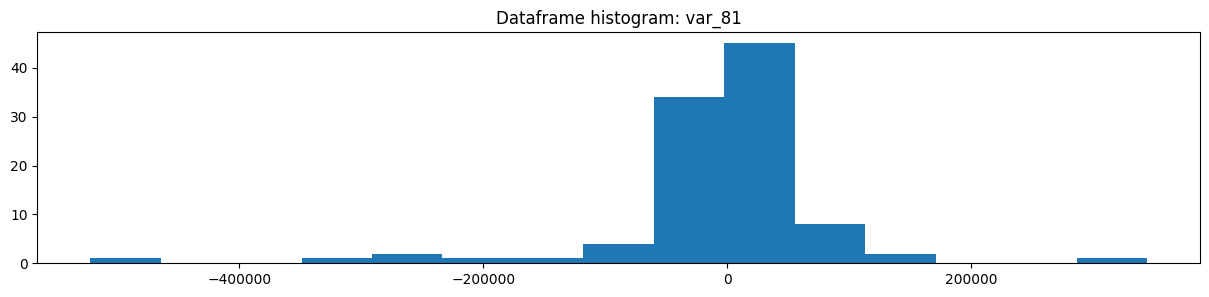

var_81             Df      Target 1       Target 0
0           count     100.000000     12.000000      88.000000
1            mean   -6982.307928   3690.437441   -8437.682297
2             std   92264.944556  21624.528813   98030.728978
3             min -522188.674946 -35999.288672 -522188.674946
4             25%  -16964.443706  -6744.778796  -17143.822373
5             50%      33.391142   5045.126136    -457.576427
6             75%   22476.426258  13075.571276   23947.438152
7             max  343942.648286  40528.435678  343942.648286
8   unique values     100.000000     12.000000      88.000000
9            NaNs       0.000000      0.000000       0.000000
10     NaNs share       0.000000      0.000000       0.000000

var_81  Count in df (desc)  Mean target  Sum target  Count in df
0 -522188.674946                   1          0.0           0            1
1    9360.144981                   1          0.0           0            1
2   21963.771240                   1          0.0           0            1
3   21880.018479                   1          0.0           0            1
4   18847.618309                   1          0.0           0            1
5   18140.213300                   1          0.0           0            1
6   17882.732770                   1          0.0           0            1
7   15914.526226                   1          0.0           0            1
8   15773.239296                   1          1.0           1            1
9   12176.348602                   1          1.0           1            1

var_81  Count in the dataframe  Mean target  Sum target (desc)  \
0   -998.847303                       1          1.0                  1   
1  12176.348602                       1          1.0                  1   
2  33497.976259                       1          1.0                  1   
3 -35999.288672                       1          1.0                  1   
4  40528.435678                       1          1.0                  1   
5   1347.465800                       1          1.0                  1   
6   8742.786472                       1          1.0                  1   
7   8742.786472                       1          1.0                  1   
8  -5485.549665                       1          1.0                  1   
9 -23517.637461                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

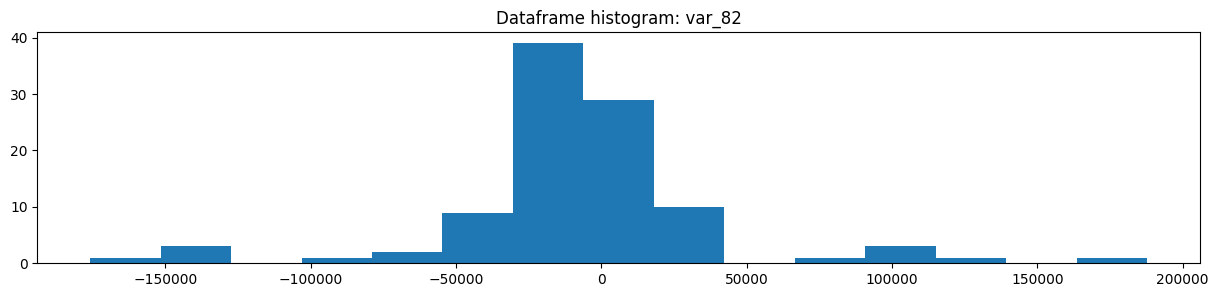

var_82             Df       Target 1       Target 0
0           count     100.000000      12.000000      88.000000
1            mean   -7224.714756    4878.205806   -8875.113014
2             std   48258.735871   31563.826391   50012.086217
3             min -175832.821493  -14957.451810 -175832.821493
4             25%  -19940.318718   -7411.545453  -23224.870378
5             50%   -7754.408918   -3721.775287   -8898.048607
6             75%    1452.297371    -216.293096    1766.530170
7             max  187707.503863  103603.835132  187707.503863
8   unique values     100.000000      12.000000      88.000000
9            NaNs       0.000000       0.000000       0.000000
10     NaNs share       0.000000       0.000000       0.000000

var_82  Count in df (desc)  Mean target  Sum target  Count in df
0 -175832.821493                   1          0.0           0            1
1   -3353.198431                   1          0.0           0            1
2     410.829682                   1          0.0           0            1
3     205.166641                   1          0.0           0            1
4    -853.968333                   1          1.0           1            1
5   -1800.671721                   1          0.0           0            1
6   -1869.488277                   1          1.0           1            1
7   -1907.943660                   1          0.0           0            1
8   -2227.217253                   1          0.0           0            1
9   -2227.217254                   1          0.0           0            1

var_82  Count in the dataframe  Mean target  Sum target (desc)  \
0   -8112.341513                       1          1.0                  1   
1  103603.835132                       1          1.0                  1   
2    -853.968333                       1          1.0                  1   
3   -8112.341514                       1          1.0                  1   
4   -1869.488277                       1          1.0                  1   
5  -14957.451810                       1          1.0                  1   
6   -7177.946767                       1          1.0                  1   
7    6692.850664                       1          1.0                  1   
8   -4927.859953                       1          1.0                  1   
9   -3519.699979                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

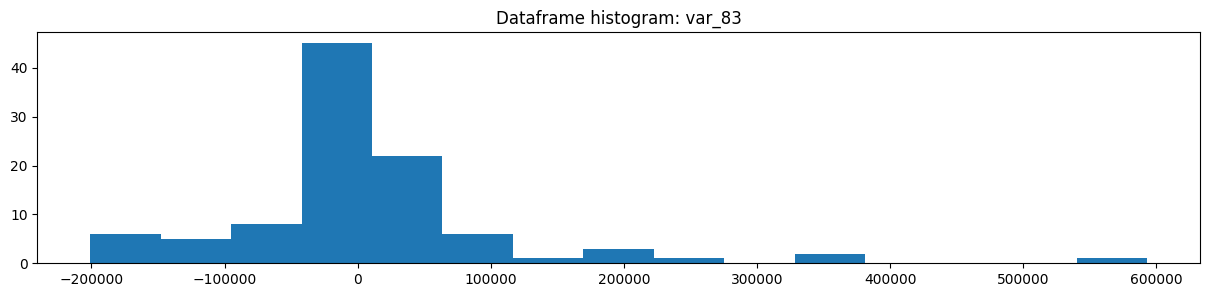

var_83             Df       Target 1       Target 0
0           count     100.000000      12.000000      88.000000
1            mean    7133.946397   12812.153758    6359.645394
2             std  111261.580365   55573.695679  117008.808536
3             min -200953.939579  -76127.497381 -200953.939579
4             25%  -39027.538571  -18075.114013  -40813.752817
5             50%   -2511.554424   11192.136371   -5464.079743
6             75%   27800.487111   23409.965629   27800.487111
7             max  593006.730507  155981.122212  593006.730507
8   unique values     100.000000      12.000000      88.000000
9            NaNs       0.000000       0.000000       0.000000
10     NaNs share       0.000000       0.000000       0.000000

var_83  Count in df (desc)  Mean target  Sum target  Count in df
0 -200953.939579                   1          0.0           0            1
1    9353.694768                   1          0.0           0            1
2   22917.428533                   1          0.0           0            1
3   22917.428533                   1          0.0           0            1
4   19432.426301                   1          0.0           0            1
5   17482.148072                   1          1.0           1            1
6   16036.725675                   1          1.0           1            1
7   15507.176312                   1          1.0           1            1
8   14964.252321                   1          0.0           0            1
9   12590.531730                   1          0.0           0            1

var_83  Count in the dataframe  Mean target  Sum target (desc)  \
0    6877.096429                       1          1.0                  1   
1  -76127.497381                       1          1.0                  1   
2  -28504.757467                       1          1.0                  1   
3  155981.122212                       1          1.0                  1   
4   17482.148072                       1          1.0                  1   
5   16036.725675                       1          1.0                  1   
6   15507.176312                       1          1.0                  1   
7   42457.968319                       1          1.0                  1   
8   41193.418298                       1          1.0                  1   
9   -1007.327351                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

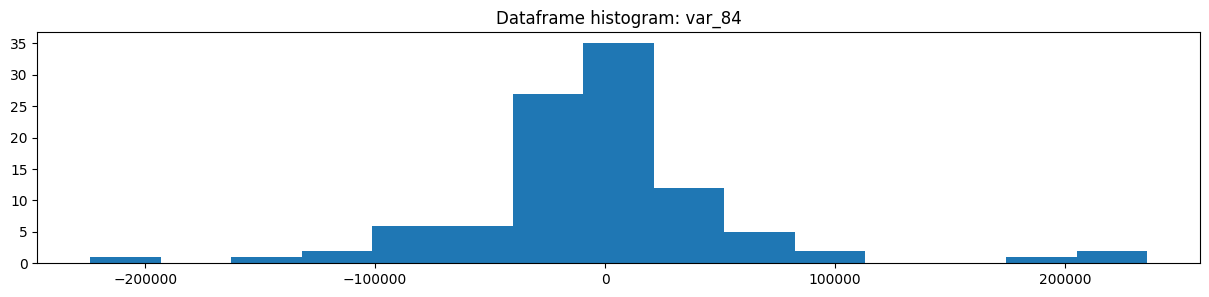

var_84             Df      Target 1       Target 0
0           count     100.000000     12.000000      88.000000
1            mean   -5246.508105  -6320.350714   -5100.075022
2             std   60711.156032  22696.644501   64256.701714
3             min -223868.508043 -41948.339254 -223868.508043
4             25%  -30103.582502 -15892.757918  -31392.390303
5             50%   -6834.136042  -5873.423172   -6834.136042
6             75%   11594.202821   -164.325699   16181.375658
7             max  235549.578480  43359.720543  235549.578480
8   unique values     100.000000     12.000000      88.000000
9            NaNs       0.000000      0.000000       0.000000
10     NaNs share       0.000000      0.000000       0.000000

var_84  Count in df (desc)  Mean target  Sum target  Count in df
0 -223868.508043                   1          0.0           0            1
1   -1060.578326                   1          0.0           0            1
2    6561.186573                   1          0.0           0            1
3    5682.248931                   1          0.0           0            1
4    3361.275198                   1          0.0           0            1
5    3186.617425                   1          0.0           0            1
6    2670.806295                   1          1.0           1            1
7     868.609203                   1          0.0           0            1
8     834.412374                   1          0.0           0            1
9     699.958263                   1          0.0           0            1

var_84  Count in the dataframe  Mean target  Sum target (desc)  \
0  16477.965360                       1          1.0                  1   
1  -1109.369697                       1          1.0                  1   
2 -41948.339254                       1          1.0                  1   
3  43359.720543                       1          1.0                  1   
4 -29729.638333                       1          1.0                  1   
5  -7352.491776                       1          1.0                  1   
6  -7352.491776                       1          1.0                  1   
7  -4394.354568                       1          1.0                  1   
8 -11280.464447                       1          1.0                  1   
9  -2283.951029                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

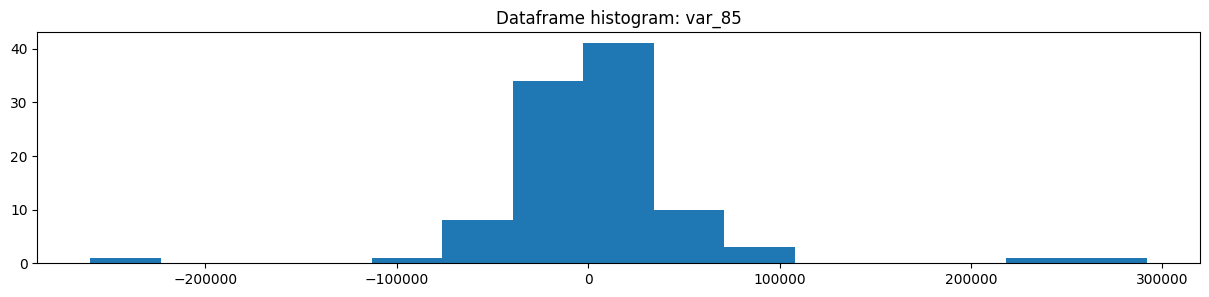

var_85             Df      Target 1       Target 0
0           count     100.000000     12.000000      88.000000
1            mean    2326.818162  -2898.604103    3039.375743
2             std   56101.864425  18212.266633   59458.630974
3             min -260242.091036 -48702.253174 -260242.091036
4             25%  -14739.114658  -6888.538508  -15273.954743
5             50%    -860.762165     31.384650    -896.782385
6             75%   14996.479041   4712.392030   18144.366731
7             max  291909.661940  25745.392339  291909.661940
8   unique values     100.000000     12.000000      88.000000
9            NaNs       0.000000      0.000000       0.000000
10     NaNs share       0.000000      0.000000       0.000000

var_85  Count in df (desc)  Mean target  Sum target  Count in df
0 -260242.091036                   1          0.0           0            1
1    2945.884113                   1          0.0           0            1
2   13753.334550                   1          1.0           1            1
3    9731.646546                   1          0.0           0            1
4    8979.417495                   1          0.0           0            1
5    7949.725610                   1          0.0           0            1
6    7949.725609                   1          0.0           0            1
7    7249.038208                   1          1.0           1            1
8    7044.918831                   1          0.0           0            1
9    4059.870484                   1          0.0           0            1

var_85  Count in the dataframe  Mean target  Sum target (desc)  \
0 -17345.684894                       1          1.0                  1   
1   3866.843304                       1          1.0                  1   
2    596.928100                       1          1.0                  1   
3  -5714.806726                       1          1.0                  1   
4   -534.158801                       1          1.0                  1   
5  25745.392339                       1          1.0                  1   
6 -10409.733852                       1          1.0                  1   
7  -3885.076394                       1          1.0                  1   
8   7249.038208                       1          1.0                  1   
9 -48702.253174                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

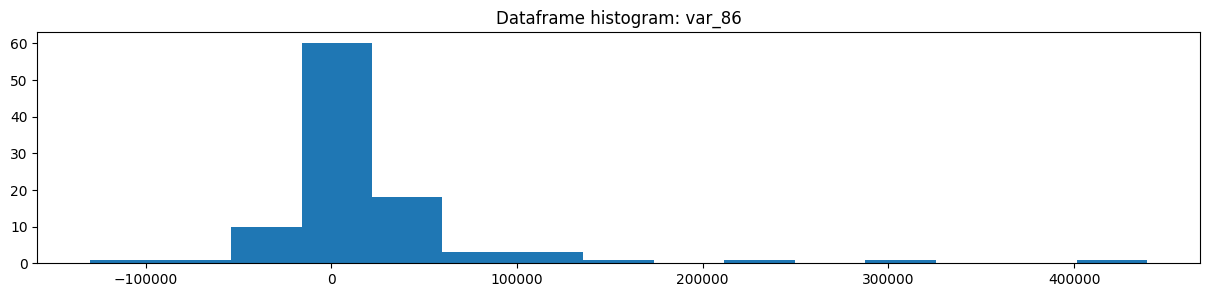

var_86             Df      Target 1       Target 0
0           count     100.000000     12.000000      88.000000
1            mean   19418.394249    893.926132   21944.458083
2             std   67970.513703  12340.363207   72001.321306
3             min -129794.999607 -24976.907782 -129794.999607
4             25%   -5818.697692  -3576.440206   -5818.697692
5             50%    1925.292647   1298.150113    3410.061797
6             75%   23171.225392   6572.124507   28828.887263
7             max  439268.638246  27496.010627  439268.638246
8   unique values     100.000000     12.000000      88.000000
9            NaNs       0.000000      0.000000       0.000000
10     NaNs share       0.000000      0.000000       0.000000

var_86  Count in df (desc)  Mean target  Sum target  Count in df
0 -129794.999607                   1          0.0           0            1
1    8946.043973                   1          1.0           1            1
2   22143.637978                   1          0.0           0            1
3   22143.637978                   1          0.0           0            1
4   21195.712659                   1          0.0           0            1
5   15077.147950                   1          0.0           0            1
6   14299.094054                   1          0.0           0            1
7   12970.557567                   1          0.0           0            1
8   12970.557567                   1          0.0           0            1
9   11033.170124                   1          0.0           0            1

var_86  Count in the dataframe  Mean target  Sum target (desc)  \
0  27496.010627                       1          1.0                  1   
1   6968.192129                       1          1.0                  1   
2   8946.043973                       1          1.0                  1   
3  -7028.053657                       1          1.0                  1   
4   1430.469304                       1          1.0                  1   
5  -8606.553625                       1          1.0                  1   
6  -2425.902389                       1          1.0                  1   
7   1298.150113                       1          1.0                  1   
8   1298.150113                       1          1.0                  1   
9   6440.101966                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

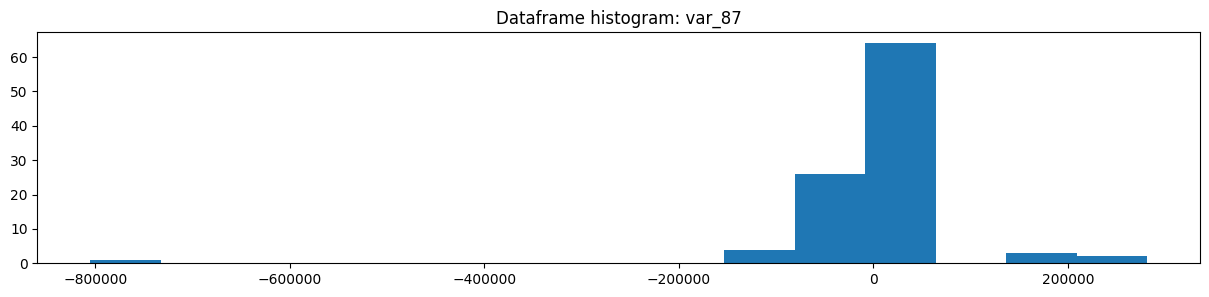

var_87             Df      Target 1       Target 0
0           count     100.000000     12.000000      88.000000
1            mean   -1554.383204  -6283.736844    -909.471344
2             std  101999.130127  32712.441055  108166.659867
3             min -805123.933483 -98569.766856 -805123.933483
4             25%  -19821.526959  -6112.206720  -20099.182837
5             50%    6021.348167   6021.348167    6093.413228
6             75%   18750.112900   7917.307668   20546.556200
7             max  281464.794900  21773.964728  281464.794900
8   unique values     100.000000     12.000000      88.000000
9            NaNs       0.000000      0.000000       0.000000
10     NaNs share       0.000000      0.000000       0.000000

var_87  Count in df (desc)  Mean target  Sum target  Count in df
0 -805123.933483                   1          0.0           0            1
1    9308.075111                   1          0.0           0            1
2   17984.960896                   1          0.0           0            1
3   15057.350036                   1          0.0           0            1
4   14617.396074                   1          1.0           1            1
5   13976.293389                   1          0.0           0            1
6   13976.293389                   1          0.0           0            1
7   12860.604202                   1          1.0           1            1
8   11410.385607                   1          0.0           0            1
9   10594.161568                   1          0.0           0            1

var_87  Count in the dataframe  Mean target  Sum target (desc)  \
0   6021.348167                       1          1.0                  1   
1  12860.604202                       1          1.0                  1   
2   6269.542156                       1          1.0                  1   
3  21773.964728                       1          1.0                  1   
4  -2186.761945                       1          1.0                  1   
5 -34440.572193                       1          1.0                  1   
6   4091.327002                       1          1.0                  1   
7   6025.269414                       1          1.0                  1   
8 -98569.766856                       1          1.0                  1   
9  14617.396074                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

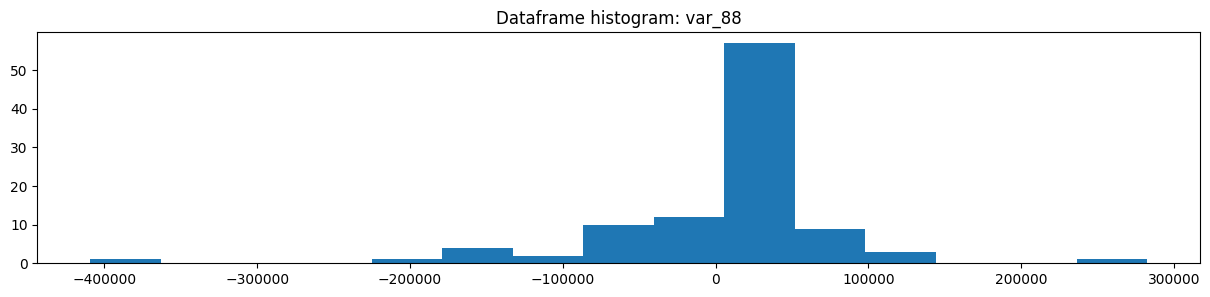

var_88             Df      Target 1       Target 0
0           count     100.000000     12.000000      88.000000
1            mean     981.510814  12822.052337    -633.108484
2             std   76362.967383  30023.279598   80620.567866
3             min -409245.717228 -55780.761172 -409245.717228
4             25%   -7484.036231  10347.850341  -10498.728850
5             50%   14321.975400  14552.477495   14321.975400
6             75%   32924.758590  21656.365672   33793.015618
7             max  282285.171695  71415.868518  282285.171695
8   unique values     100.000000     12.000000      88.000000
9            NaNs       0.000000      0.000000       0.000000
10     NaNs share       0.000000      0.000000       0.000000

var_88  Count in df (desc)  Mean target  Sum target  Count in df
0 -409245.717228                   1          0.0           0            1
1   18030.955708                   1          0.0           0            1
2   32635.339581                   1          0.0           0            1
3   29632.702441                   1          0.0           0            1
4   25872.161576                   1          0.0           0            1
5   25830.491477                   1          0.0           0            1
6   23455.861348                   1          1.0           1            1
7   21056.533780                   1          1.0           1            1
8   20833.565949                   1          0.0           0            1
9   18809.390158                   1          0.0           0            1

var_88  Count in the dataframe  Mean target  Sum target (desc)  \
0 -18652.131845                       1          1.0                  1   
1  21056.533780                       1          1.0                  1   
2  10516.621668                       1          1.0                  1   
3   9841.536361                       1          1.0                  1   
4  15694.804314                       1          1.0                  1   
5  36694.718421                       1          1.0                  1   
6 -55780.761172                       1          1.0                  1   
7  10516.621668                       1          1.0                  1   
8  23455.861348                       1          1.0                  1   
9  15109.793610                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

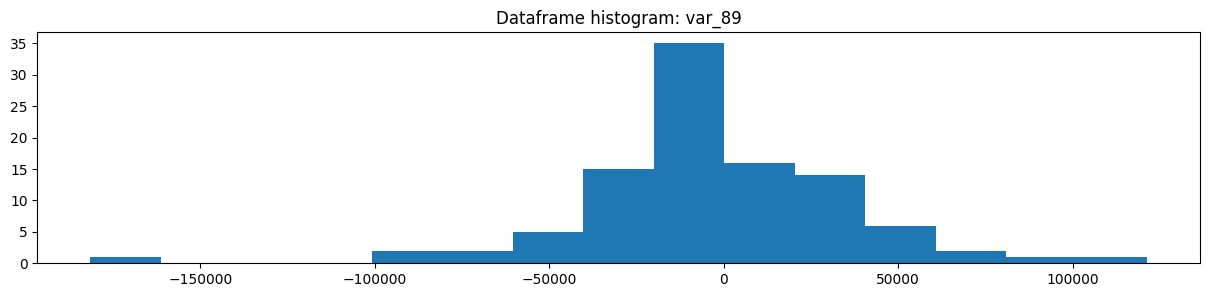

var_89             Df      Target 1       Target 0
0           count     100.000000     12.000000      88.000000
1            mean   -2344.663012  -2015.303488   -2389.575674
2             std   38623.404660  18686.621868   40661.541591
3             min -181534.594037 -42747.157410 -181534.594037
4             25%  -19417.633662  -9766.729025  -21525.754399
5             50%   -5542.535913  -1297.306002   -6179.410917
6             75%   19328.734930   4461.074251   24670.183369
7             max  121274.094320  37856.282002  121274.094320
8   unique values     100.000000     12.000000      88.000000
9            NaNs       0.000000      0.000000       0.000000
10     NaNs share       0.000000      0.000000       0.000000

var_89  Count in df (desc)  Mean target  Sum target  Count in df
0 -181534.594037                   1          0.0           0            1
1    2743.655400                   1          0.0           0            1
2   19061.224374                   1          0.0           0            1
3   17541.690405                   1          0.0           0            1
4   15401.833071                   1          0.0           0            1
5   11041.990403                   1          1.0           1            1
6    9971.362117                   1          0.0           0            1
7    7278.538249                   1          1.0           1            1
8    4687.734108                   1          0.0           0            1
9    4015.628074                   1          0.0           0            1

var_89  Count in the dataframe  Mean target  Sum target (desc)  \
0  -7969.884561                       1          1.0                  1   
1  -9024.908741                       1          1.0                  1   
2   -984.627657                       1          1.0                  1   
3 -11992.189880                       1          1.0                  1   
4 -11992.189880                       1          1.0                  1   
5 -42747.157410                       1          1.0                  1   
6   2438.570376                       1          1.0                  1   
7   3521.919585                       1          1.0                  1   
8  -1609.984347                       1          1.0                  1   
9  37856.282002                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

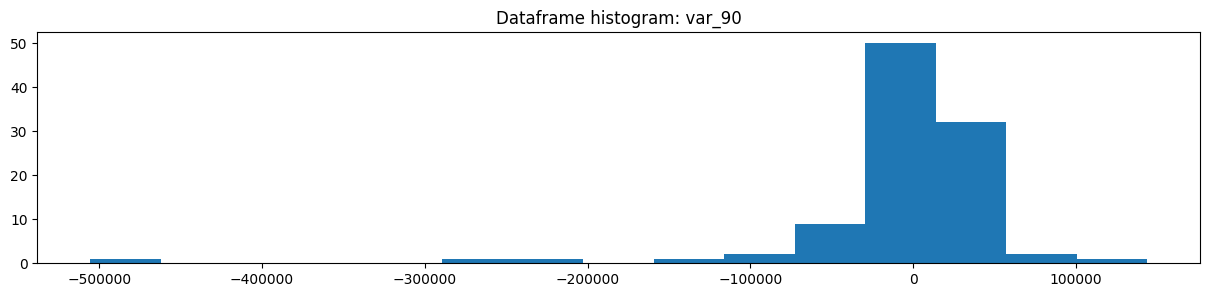

var_90             Df      Target 1       Target 0
0           count     100.000000     12.000000      88.000000
1            mean   -6174.261368   3089.774330   -7437.538963
2             std   69380.478188  17361.935068   73661.646086
3             min -505521.249772 -25286.153688 -505521.249772
4             25%   -6398.937593  -9981.147829   -4509.595465
5             50%   10542.907038  12096.481550   10191.640801
6             75%   17365.237203  14568.193134   17607.574576
7             max  143574.683125  20393.270766  143574.683125
8   unique values     100.000000     12.000000      88.000000
9            NaNs       0.000000      0.000000       0.000000
10     NaNs share       0.000000      0.000000       0.000000

var_90  Count in df (desc)  Mean target  Sum target  Count in df
0 -505521.249772                   1          0.0           0            1
1   13101.073418                   1          0.0           0            1
2   16696.708777                   1          0.0           0            1
3   16696.708777                   1          0.0           0            1
4   16636.903903                   1          0.0           0            1
5   15135.365081                   1          1.0           1            1
6   14450.076893                   1          0.0           0            1
7   14379.135819                   1          1.0           1            1
8   13902.675594                   1          0.0           0            1
9   13902.675593                   1          0.0           0            1

var_90  Count in the dataframe  Mean target  Sum target (desc)  \
0  19116.932369                       1          1.0                  1   
1 -21399.446967                       1          1.0                  1   
2  12096.481550                       1          1.0                  1   
3 -23696.017145                       1          1.0                  1   
4  15135.365081                       1          1.0                  1   
5 -25286.153688                       1          1.0                  1   
6  14379.135819                       1          1.0                  1   
7  12096.481550                       1          1.0                  1   
8   7454.676083                       1          1.0                  1   
9  20393.270766                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

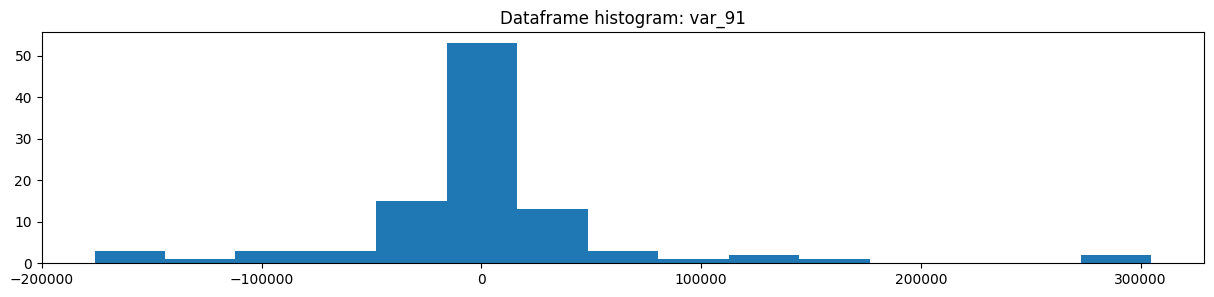

var_91             Df       Target 1       Target 0
0           count     100.000000      12.000000      88.000000
1            mean    1983.406406  -13433.310802    4085.686025
2             std   66874.435661   40673.978274   69588.916223
3             min -176121.366998 -140065.543371 -176121.366998
4             25%  -15211.062939   -7683.792186  -17935.265068
5             50%    1111.356535   -4408.215990    1919.999679
6             75%   12092.450242     679.912459   14445.021864
7             max  304880.778698   18455.608516  304880.778698
8   unique values     100.000000      12.000000      88.000000
9            NaNs       0.000000       0.000000       0.000000
10     NaNs share       0.000000       0.000000       0.000000

var_91  Count in df (desc)  Mean target  Sum target  Count in df
0 -176121.366998                   1          0.0           0            1
1    6034.775219                   1          0.0           0            1
2   11204.652806                   1          0.0           0            1
3   10696.734976                   1          0.0           0            1
4   10696.734976                   1          0.0           0            1
5    8992.939560                   1          0.0           0            1
6    6610.235170                   1          0.0           0            1
7    6610.235170                   1          0.0           0            1
8    6339.257810                   1          0.0           0            1
9    6051.854974                   1          0.0           0            1

var_91  Count in the dataframe  Mean target  Sum target (desc)  \
0  -12810.113910                       1          1.0                  1   
1   -6979.149685                       1          1.0                  1   
2   -1837.282294                       1          1.0                  1   
3    2241.550741                       1          1.0                  1   
4 -140065.543371                       1          1.0                  1   
5    -421.199079                       1          1.0                  1   
6   -6979.149685                       1          1.0                  1   
7   -7441.481923                       1          1.0                  1   
8   -8410.722973                       1          1.0                  1   
9     159.366365                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

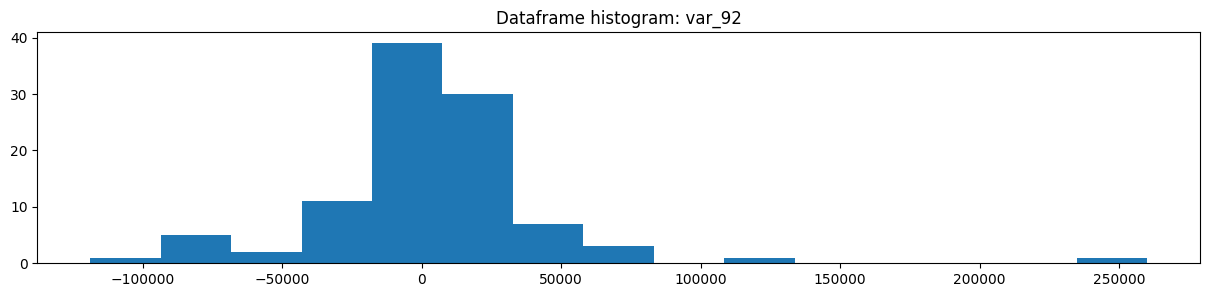

var_92             Df      Target 1       Target 0
0           count     100.000000     12.000000      88.000000
1            mean    4257.722604   2004.857476    4564.931486
2             std   42749.134477  13013.462347   45358.001120
3             min -118763.091860 -30238.860476 -118763.091860
4             25%  -10224.589564  -2059.956731  -13405.291854
5             50%    5774.980243    789.882708    6177.660257
6             75%   16073.107493   9296.272332   16236.496809
7             max  260014.394777  20552.981997  260014.394777
8   unique values     100.000000     12.000000      88.000000
9            NaNs       0.000000      0.000000       0.000000
10     NaNs share       0.000000      0.000000       0.000000

var_92  Count in df (desc)  Mean target  Sum target  Count in df
0 -118763.091860                   1          0.0           0            1
1   11421.959680                   1          0.0           0            1
2   16059.816193                   1          0.0           0            1
3   15974.141635                   1          0.0           0            1
4   15436.814503                   1          0.0           0            1
5   14605.476803                   1          1.0           1            1
6   14071.734329                   1          0.0           0            1
7   14071.734329                   1          0.0           0            1
8   14012.262683                   1          1.0           1            1
9   12883.683240                   1          0.0           0            1

var_92  Count in the dataframe  Mean target  Sum target (desc)  \
0  -2059.956731                       1          1.0                  1   
1  -2059.956731                       1          1.0                  1   
2   7072.969829                       1          1.0                  1   
3  20552.981997                       1          1.0                  1   
4   7724.275548                       1          1.0                  1   
5   2176.185599                       1          1.0                  1   
6   -596.420182                       1          1.0                  1   
7   -744.380561                       1          1.0                  1   
8 -30238.860476                       1          1.0                  1   
9  14012.262683                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

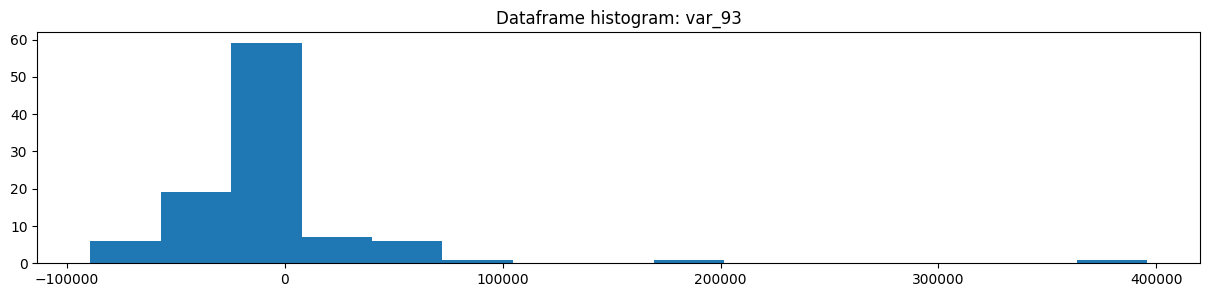

var_93             Df      Target 1       Target 0
0           count     100.000000     12.000000      88.000000
1            mean   -5586.265810   1089.685651   -6496.622828
2             std   53115.486039  16798.875967   56282.564659
3             min  -89149.754158 -18858.806421  -89149.754158
4             25%  -23286.623294  -8451.204240  -26449.588485
5             50%  -11426.145897  -3047.792511  -12615.577832
6             75%     888.195040   3247.479506    -852.519072
7             max  395649.745500  43787.738791  395649.745500
8   unique values     100.000000     12.000000      88.000000
9            NaNs       0.000000      0.000000       0.000000
10     NaNs share       0.000000      0.000000       0.000000

var_93  Count in df (desc)  Mean target  Sum target  Count in df
0 -89149.754158                   1          0.0           0            1
1  -7714.959397                   1          0.0           0            1
2    390.560450                   1          0.0           0            1
3  -1073.781473                   1          1.0           1            1
4  -1266.878913                   1          0.0           0            1
5  -4772.096689                   1          0.0           0            1
6  -5021.803549                   1          1.0           1            1
7  -5478.804362                   1          0.0           0            1
8  -6189.966532                   1          0.0           0            1
9  -6492.073211                   1          1.0           1            1

var_93  Count in the dataframe  Mean target  Sum target (desc)  \
0   2782.343153                       1          1.0                  1   
1 -11365.983034                       1          1.0                  1   
2   4642.888564                       1          1.0                  1   
3 -11265.966457                       1          1.0                  1   
4  20672.278467                       1          1.0                  1   
5   2782.343153                       1          1.0                  1   
6  -7512.950168                       1          1.0                  1   
7 -18858.806421                       1          1.0                  1   
8  -6492.073211                       1          1.0                  1   
9  -5021.803549                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

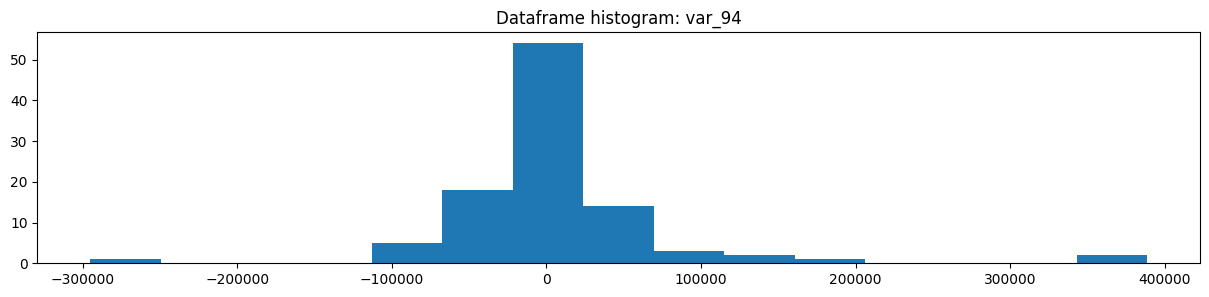

var_94             Df      Target 1       Target 0
0           count     100.000000     12.000000      88.000000
1            mean    6326.287286   1920.078578    6927.133928
2             std   75368.387953  33382.736121   79498.122078
3             min -295090.874012 -50490.219996 -295090.874012
4             25%  -16913.917159 -10698.592593  -23043.164509
5             50%    2244.422188   1112.556051    2902.596364
6             75%   18507.777524   3780.733804   20440.115671
7             max  388436.505923  93828.849455  388436.505923
8   unique values     100.000000     12.000000      88.000000
9            NaNs       0.000000      0.000000       0.000000
10     NaNs share       0.000000      0.000000       0.000000

var_94  Count in df (desc)  Mean target  Sum target  Count in df
0 -295090.874012                   1          0.0           0            1
1    5375.774255                   1          1.0           1            1
2   18315.378840                   1          0.0           0            1
3   17350.373321                   1          0.0           0            1
4   17350.373321                   1          0.0           0            1
5   17172.573446                   1          0.0           0            1
6   14774.283814                   1          1.0           1            1
7   12434.694444                   1          0.0           0            1
8    7582.190654                   1          0.0           0            1
9    7093.792973                   1          0.0           0            1

var_94  Count in the dataframe  Mean target  Sum target (desc)  \
0 -50490.219996                       1          1.0                  1   
1 -20285.987592                       1          1.0                  1   
2   3249.053653                       1          1.0                  1   
3   1425.016341                       1          1.0                  1   
4   1425.016341                       1          1.0                  1   
5  -4601.410029                       1          1.0                  1   
6 -10167.420656                       1          1.0                  1   
7  14774.283814                       1          1.0                  1   
8 -12292.108404                       1          1.0                  1   
9  93828.849455                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

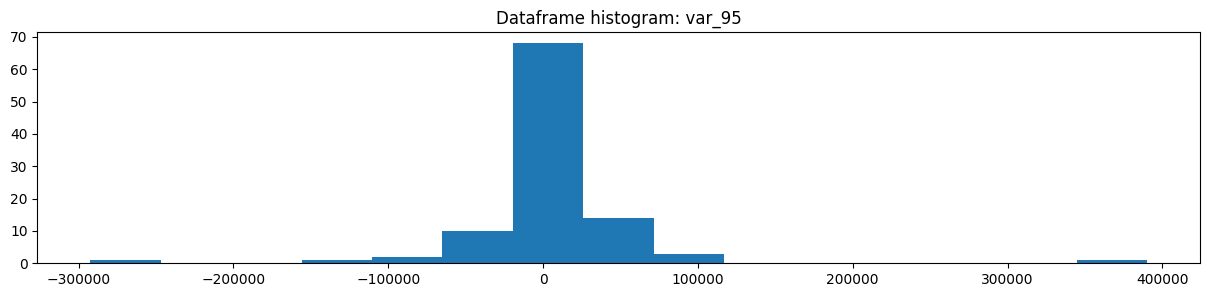

var_95             Df      Target 1       Target 0
0           count     100.000000     12.000000      88.000000
1            mean    3204.109687  -5437.777522    4382.548852
2             std   58708.417259  29381.448473   61654.095236
3             min -292502.848360 -74119.327991 -292502.848360
4             25%  -13240.661444  -9823.273907  -13379.686984
5             50%   -3245.188287  -3494.850617   -2823.954257
6             75%   11933.534540  -1714.790775   13204.968903
7             max  390083.313773  61746.941540  390083.313773
8   unique values     100.000000     12.000000      88.000000
9            NaNs       0.000000      0.000000       0.000000
10     NaNs share       0.000000      0.000000       0.000000

var_95  Count in df (desc)  Mean target  Sum target  Count in df
0 -292502.848360                   1          0.0           0            1
1    5925.386600                   1          0.0           0            1
2   11002.783184                   1          0.0           0            1
3   11002.783184                   1          0.0           0            1
4    9837.224803                   1          0.0           0            1
5    9560.830027                   1          0.0           0            1
6    9370.374277                   1          0.0           0            1
7    9111.025578                   1          0.0           0            1
8    9111.025578                   1          0.0           0            1
9    8471.774006                   1          0.0           0            1

var_95  Count in the dataframe  Mean target  Sum target (desc)  \
0  -3100.945493                       1          1.0                  1   
1  -8107.263722                       1          1.0                  1   
2  -3100.945493                       1          1.0                  1   
3  61746.941540                       1          1.0                  1   
4 -74119.327991                       1          1.0                  1   
5 -13217.919921                       1          1.0                  1   
6  -3888.755741                       1          1.0                  1   
7  -1953.930666                       1          1.0                  1   
8   -997.371101                       1          1.0                  1   
9   3486.799574                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

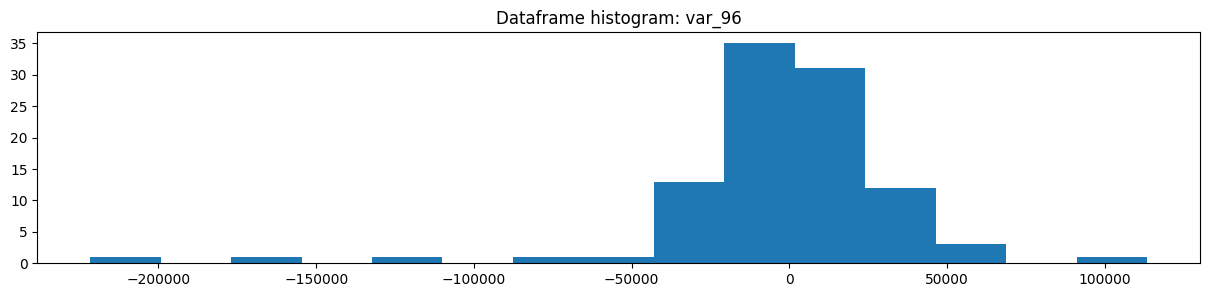

var_96             Df      Target 1       Target 0
0           count     100.000000     12.000000      88.000000
1            mean   -2813.321469  -3336.266186   -2742.010826
2             std   38931.571408  17272.563547   41072.626013
3             min -221651.160595 -36892.661756 -221651.160595
4             25%  -12776.289199 -11430.092936  -12776.289199
5             50%    1123.050324   1227.275419    1123.050324
6             75%   12235.976813   4544.757360   13255.150020
7             max  113421.312790  29124.960824  113421.312790
8   unique values     100.000000     12.000000      88.000000
9            NaNs       0.000000      0.000000       0.000000
10     NaNs share       0.000000      0.000000       0.000000

var_96  Count in df (desc)  Mean target  Sum target  Count in df
0 -221651.160595                   1          0.0           0            1
1    5330.689085                   1          0.0           0            1
2   12235.460722                   1          0.0           0            1
3   10899.218692                   1          0.0           0            1
4   10347.595266                   1          0.0           0            1
5    9631.203464                   1          0.0           0            1
6    9631.203464                   1          0.0           0            1
7    8419.128684                   1          1.0           1            1
8    7957.908970                   1          0.0           0            1
9    6249.752021                   1          1.0           1            1

var_96  Count in the dataframe  Mean target  Sum target (desc)  \
0    593.085292                       1          1.0                  1   
1  -2295.811263                       1          1.0                  1   
2   3976.425807                       1          1.0                  1   
3   1861.465547                       1          1.0                  1   
4  29124.960824                       1          1.0                  1   
5   1861.465547                       1          1.0                  1   
6 -25360.063120                       1          1.0                  1   
7   6249.752021                       1          1.0                  1   
8   8419.128684                       1          1.0                  1   
9  -9073.714964                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

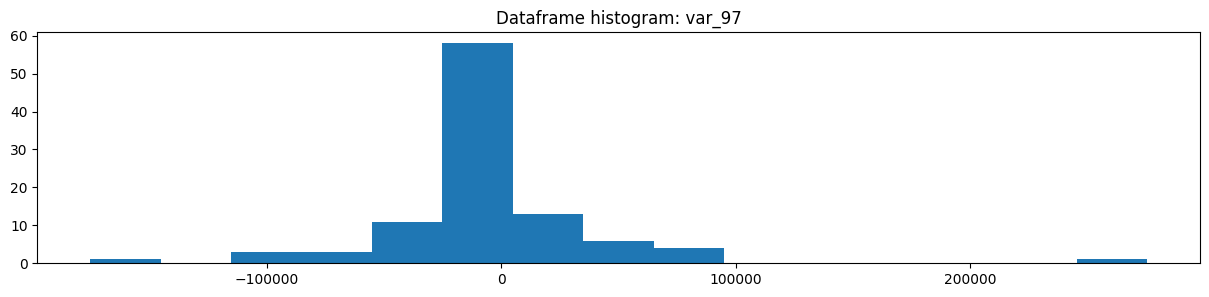

var_97             Df      Target 1       Target 0
0           count     100.000000     12.000000      88.000000
1            mean   -3099.904300   2063.029335   -3803.940705
2             std   46383.177247  27659.795607   48448.256255
3             min -175486.626149 -29238.644095 -175486.626149
4             25%  -11451.361565  -7743.101731  -12126.264663
5             50%   -3336.326715  -2230.733262   -3336.326715
6             75%    4288.924964   1783.145492    5051.341580
7             max  275609.729063  85118.681823  275609.729063
8   unique values     100.000000     12.000000      88.000000
9            NaNs       0.000000      0.000000       0.000000
10     NaNs share       0.000000      0.000000       0.000000

var_97  Count in df (desc)  Mean target  Sum target  Count in df
0 -175486.626149                   1          0.0           0            1
1    -779.159470                   1          0.0           0            1
2    3444.469731                   1          1.0           1            1
3    2295.993920                   1          0.0           0            1
4    2006.413172                   1          1.0           1            1
5    1708.722932                   1          1.0           1            1
6    1597.158265                   1          0.0           0            1
7    1313.604987                   1          0.0           0            1
8    1298.738276                   1          1.0           1            1
9     861.958592                   1          0.0           0            1

var_97  Count in the dataframe  Mean target  Sum target (desc)  \
0 -11248.484266                       1          1.0                  1   
1  85118.681823                       1          1.0                  1   
2  -6048.953875                       1          1.0                  1   
3  -6574.640887                       1          1.0                  1   
4   -932.543165                       1          1.0                  1   
5   1298.738276                       1          1.0                  1   
6 -29238.644095                       1          1.0                  1   
7 -11248.484266                       1          1.0                  1   
8   1708.722932                       1          1.0                  1   
9   2006.413172                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

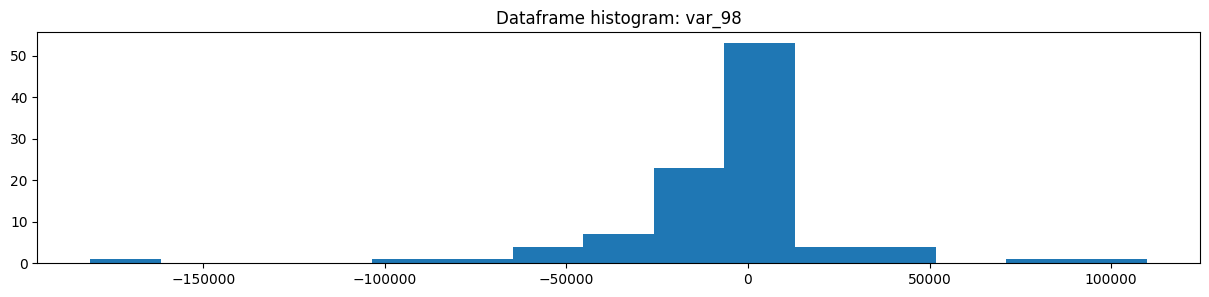

var_98             Df      Target 1       Target 0
0           count     100.000000     12.000000      88.000000
1            mean   -5938.770390  -4084.331085   -6191.648477
2             std   30686.285062  10676.140277   32505.081231
3             min -181141.982238 -27552.682929 -181141.982238
4             25%  -12300.033968 -12177.617116  -14066.625726
5             50%   -2102.643575  -1876.087586   -2102.643575
6             75%    3528.297983   2883.789737    3528.297983
7             max  109875.197454  12460.470819  109875.197454
8   unique values     100.000000     12.000000      88.000000
9            NaNs       0.000000      0.000000       0.000000
10     NaNs share       0.000000      0.000000       0.000000

var_98  Count in df (desc)  Mean target  Sum target  Count in df
0 -181141.982238                   1          0.0           0            1
1     362.042317                   1          0.0           0            1
2    3029.629933                   1          0.0           0            1
3    3029.629933                   1          0.0           0            1
4    2625.350715                   1          1.0           1            1
5    2559.672324                   1          0.0           0            1
6    2331.644778                   1          0.0           0            1
7    2164.209418                   1          0.0           0            1
8    2099.505669                   1          0.0           0            1
9    2099.505669                   1          0.0           0            1

var_98  Count in the dataframe  Mean target  Sum target (desc)  \
0   3659.106803                       1          1.0                  1   
1  -5171.718420                       1          1.0                  1   
2   5471.871386                       1          1.0                  1   
3 -27552.682929                       1          1.0                  1   
4  12460.470819                       1          1.0                  1   
5 -12300.033968                       1          1.0                  1   
6 -12136.811499                       1          1.0                  1   
7  -3557.464025                       1          1.0                  1   
8   -194.711147                       1          1.0                  1   
9    -15.316788                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

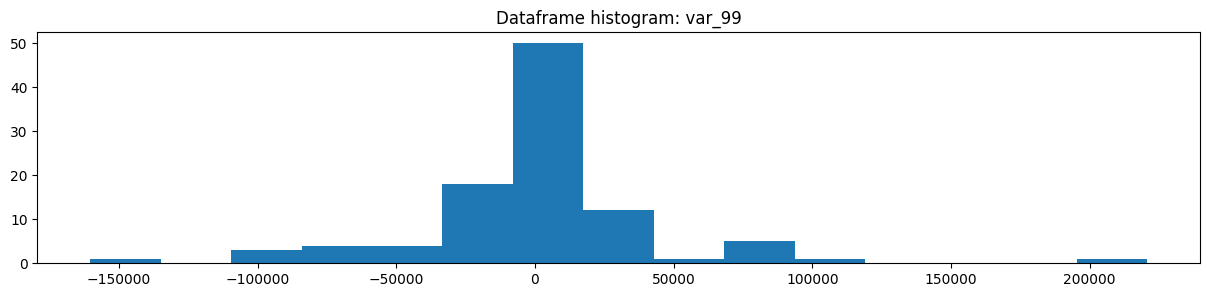

var_99             Df      Target 1       Target 0
0           count     100.000000     12.000000      88.000000
1            mean     459.326608   4230.188179     -54.881788
2             std   44298.268978  17100.239092   46838.046475
3             min -160356.439565 -18927.178399 -160356.439565
4             25%  -12143.595467  -3518.151417  -12164.878198
5             50%   -1003.791193   1550.466152   -1075.823878
6             75%   14236.585926   7871.689683   14236.585926
7             max  220662.856647  35082.149851  220662.856647
8   unique values     100.000000     12.000000      88.000000
9            NaNs       0.000000      0.000000       0.000000
10     NaNs share       0.000000      0.000000       0.000000

var_99  Count in df (desc)  Mean target  Sum target  Count in df
0 -160356.439565                   1          0.0           0            1
1    3608.419404                   1          0.0           0            1
2   11502.515944                   1          0.0           0            1
3   10860.209792                   1          0.0           0            1
4    9949.019898                   1          0.0           0            1
5    9531.962899                   1          0.0           0            1
6    6517.849089                   1          0.0           0            1
7    6517.849089                   1          0.0           0            1
8    5826.557675                   1          0.0           0            1
9    5401.966986                   1          1.0           1            1

var_99  Count in the dataframe  Mean target  Sum target (desc)  \
0   5401.966986                       1          1.0                  1   
1   2833.318162                       1          1.0                  1   
2    267.614143                       1          1.0                  1   
3  33900.961913                       1          1.0                  1   
4 -18269.038965                       1          1.0                  1   
5   -624.269966                       1          1.0                  1   
6 -18927.178399                       1          1.0                  1   
7  15280.857772                       1          1.0                  1   
8  -7342.832674                       1          1.0                  1   
9  -2243.257664                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

In [6]:
# EDA for other columns
for col in list(splitted_columns[1]):
    proc(col) # Run EDA

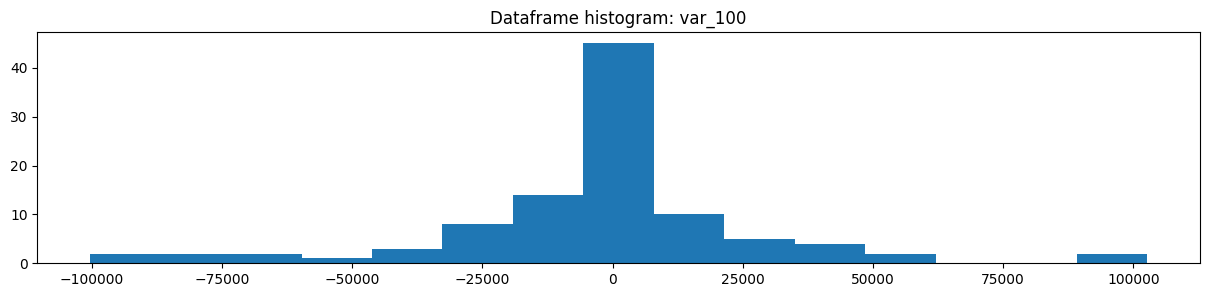

var_100             Df      Target 1       Target 0
0           count     100.000000     12.000000      88.000000
1            mean   -2295.885428    -32.784631   -2604.490082
2             std   30623.642258  16898.929203   32097.514283
3             min -100271.456990 -32515.825549 -100271.456990
4             25%   -9586.463382  -4715.982216  -12411.675817
5             50%   -1366.711667   -163.345024   -1394.196041
6             75%    6900.145792   1963.023987    7976.440730
7             max  102605.411404  43615.612410  102605.411404
8   unique values     100.000000     12.000000      88.000000
9            NaNs       0.000000      0.000000       0.000000
10     NaNs share       0.000000      0.000000       0.000000

var_100  Count in df (desc)  Mean target  Sum target  Count in df
0 -100271.456990                   1          0.0           0            1
1    1899.274737                   1          1.0           1            1
2    6034.028820                   1          0.0           0            1
3    5184.650948                   1          1.0           1            1
4    4839.799683                   1          0.0           0            1
5    4839.799683                   1          0.0           0            1
6    4420.717722                   1          0.0           0            1
7    4420.717722                   1          0.0           0            1
8    3972.496496                   1          0.0           0            1
9    2902.863534                   1          0.0           0            1

var_100  Count in the dataframe  Mean target  Sum target (desc)  \
0  -4753.380282                       1          1.0                  1   
1   -523.473228                       1          1.0                  1   
2    196.783180                       1          1.0                  1   
3  -3645.597167                       1          1.0                  1   
4  43615.612410                       1          1.0                  1   
5  -4703.516194                       1          1.0                  1   
6   1899.274737                       1          1.0                  1   
7   2154.271735                       1          1.0                  1   
8 -32515.825549                       1          1.0                  1   
9   1899.274737                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

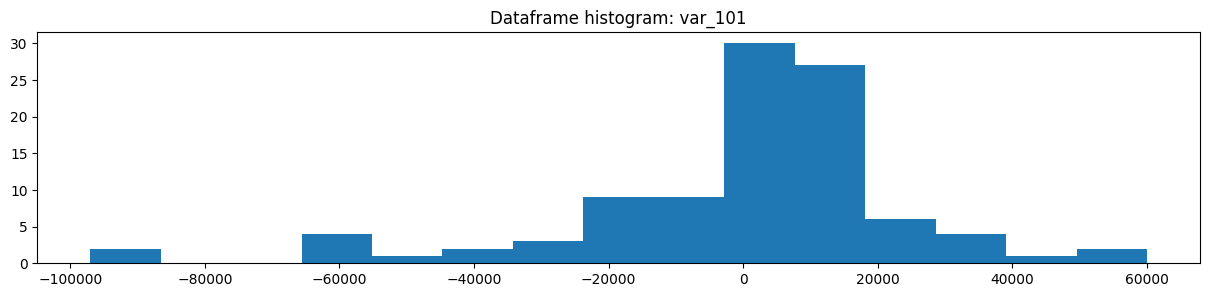

var_101            Df      Target 1      Target 0
0           count    100.000000     12.000000     88.000000
1            mean   -124.937110  -3960.217008    398.055604
2             std  25649.489866  18089.958319  26551.065925
3             min -97030.867009 -53183.583381 -97030.867009
4             25%  -7926.457403  -7982.791739  -7607.541407
5             50%   4268.443797   2597.028689   4946.008520
6             75%  11628.361602   6162.415805  11974.645942
7             max  60011.133937  16298.734250  60011.133937
8   unique values    100.000000     12.000000     88.000000
9            NaNs      0.000000      0.000000      0.000000
10     NaNs share      0.000000      0.000000      0.000000

var_101  Count in df (desc)  Mean target  Sum target  Count in df
0 -97030.867009                   1          0.0           0            1
1   8142.877943                   1          0.0           0            1
2  11507.939190                   1          0.0           0            1
3  10503.018878                   1          0.0           0            1
4  10471.404145                   1          0.0           0            1
5  10326.716034                   1          0.0           0            1
6  10326.716034                   1          0.0           0            1
7   8710.430428                   1          1.0           1            1
8   8695.848500                   1          0.0           0            1
9   8695.848500                   1          0.0           0            1

var_101  Count in the dataframe  Mean target  Sum target (desc)  \
0   2406.072441                       1          1.0                  1   
1  16298.734250                       1          1.0                  1   
2  -7907.679291                       1          1.0                  1   
3  -7982.791739                       1          1.0                  1   
4 -53183.583381                       1          1.0                  1   
5   3735.005242                       1          1.0                  1   
6   5707.028623                       1          1.0                  1   
7   2787.984936                       1          1.0                  1   
8   7528.577351                       1          1.0                  1   
9  -7982.791739                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

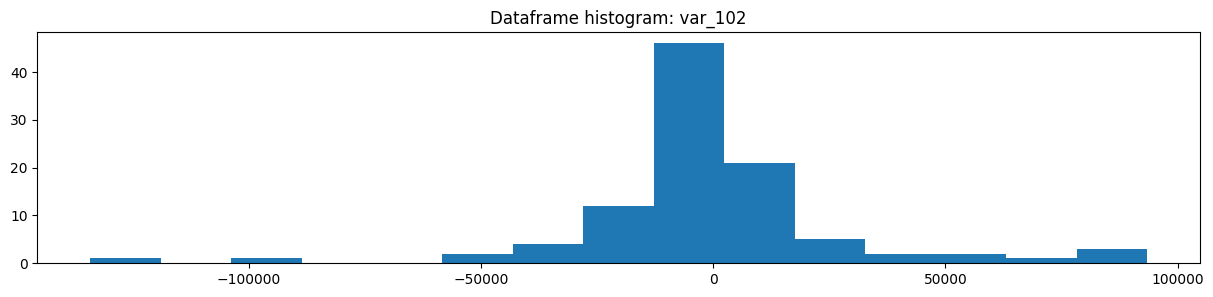

var_102             Df      Target 1       Target 0
0           count     100.000000     12.000000      88.000000
1            mean     -52.165625   5722.716310    -839.649526
2             std   29598.050581  21372.314896   30559.743312
3             min -134166.136920 -18398.994647 -134166.136920
4             25%   -8427.607821  -2433.271121   -9845.344927
5             50%     256.351527   1262.887562     -12.229662
6             75%    5278.259868   5900.926662    5140.998129
7             max   93406.319471  69031.857260   93406.319471
8   unique values     100.000000     12.000000      88.000000
9            NaNs       0.000000      0.000000       0.000000
10     NaNs share       0.000000      0.000000       0.000000

var_102  Count in df (desc)  Mean target  Sum target  Count in df
0 -134166.136920                   1          0.0           0            1
1    2068.209657                   1          0.0           0            1
2    5124.894044                   1          0.0           0            1
3    5027.659091                   1          0.0           0            1
4    5013.070233                   1          0.0           0            1
5    4494.021471                   1          0.0           0            1
6    4210.217839                   1          0.0           0            1
7    3799.554179                   1          0.0           0            1
8    3799.554179                   1          0.0           0            1
9    3328.730390                   1          0.0           0            1

var_102  Count in the dataframe  Mean target  Sum target (desc)  \
0  -1488.181995                       1          1.0                  1   
1  -2433.271121                       1          1.0                  1   
2  -6028.640177                       1          1.0                  1   
3   5545.108315                       1          1.0                  1   
4    744.672863                       1          1.0                  1   
5  13252.597817                       1          1.0                  1   
6   1781.102262                       1          1.0                  1   
7   2131.234558                       1          1.0                  1   
8  69031.857260                       1          1.0                  1   
9  -2433.271121                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

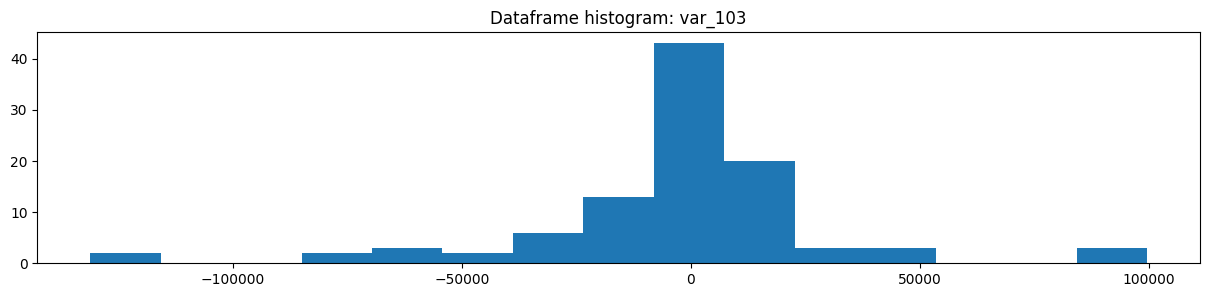

var_103             Df      Target 1       Target 0
0           count     100.000000     12.000000      88.000000
1            mean   -2278.615845  -2135.058374   -2298.191863
2             std   32617.640408  23418.272509   33783.333428
3             min -131131.254170 -68479.185230 -131131.254170
4             25%  -10369.525241  -3111.026295  -10791.026881
5             50%    1534.607341   3143.139816    1521.071656
6             75%    9708.967973   9437.534182    9708.967973
7             max   99619.903061  24986.196538   99619.903061
8   unique values     100.000000     12.000000      88.000000
9            NaNs       0.000000      0.000000       0.000000
10     NaNs share       0.000000      0.000000       0.000000

var_103  Count in df (desc)  Mean target  Sum target  Count in df
0 -131131.254170                   1          0.0           0            1
1    4133.236375                   1          0.0           0            1
2    8777.100314                   1          1.0           1            1
3    8098.963734                   1          0.0           0            1
4    8098.963734                   1          0.0           0            1
5    6870.657980                   1          0.0           0            1
6    6712.870222                   1          0.0           0            1
7    6128.527729                   1          0.0           0            1
8    6108.255354                   1          0.0           0            1
9    6108.255354                   1          0.0           0            1

var_103  Count in the dataframe  Mean target  Sum target (desc)  \
0   3896.867579                       1          1.0                  1   
1   2389.412053                       1          1.0                  1   
2  12624.083185                       1          1.0                  1   
3  24986.196538                       1          1.0                  1   
4   4350.061144                       1          1.0                  1   
5   -732.554898                       1          1.0                  1   
6 -18629.464368                       1          1.0                  1   
7  11418.835785                       1          1.0                  1   
8  -3111.026295                       1          1.0                  1   
9  -3111.026295                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

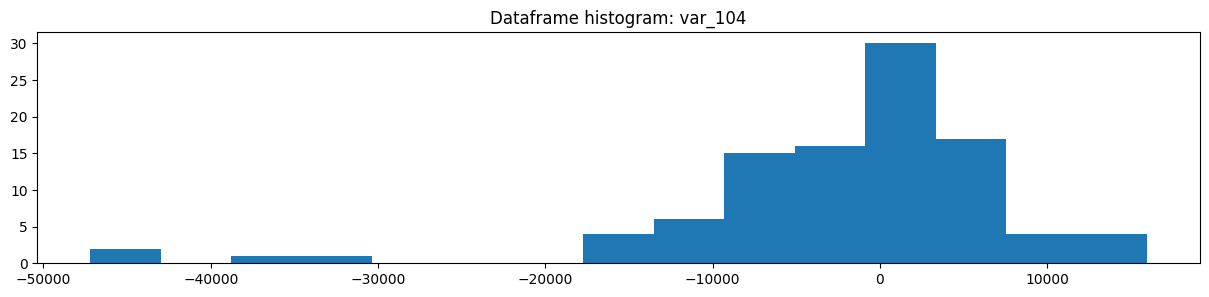

var_104            Df     Target 1      Target 0
0           count    100.000000    12.000000     88.000000
1            mean  -2176.302844 -1386.432180  -2284.012480
2             std  10454.501422  3487.830192  11078.632835
3             min -47204.569590 -7606.708865 -47204.569590
4             25%  -6022.436777 -3528.644954  -6300.935037
5             50%   -406.838202  -443.546949   -406.838202
6             75%   3253.398750    91.408046   3770.903653
7             max  15963.480675  4079.947027  15963.480675
8   unique values    100.000000    12.000000     88.000000
9            NaNs      0.000000     0.000000      0.000000
10     NaNs share      0.000000     0.000000      0.000000

var_104  Count in df (desc)  Mean target  Sum target  Count in df
0 -47204.569590                   1          0.0           0            1
1   1552.840159                   1          0.0           0            1
2   3224.743369                   1          1.0           1            1
3   3172.290052                   1          0.0           0            1
4   3172.290052                   1          0.0           0            1
5   2876.100720                   1          0.0           0            1
6   2833.831864                   1          0.0           0            1
7   2833.831864                   1          0.0           0            1
8   2514.537206                   1          0.0           0            1
9   2514.537206                   1          0.0           0            1

var_104  Count in the dataframe  Mean target  Sum target (desc)  \
0 -7606.708865                       1          1.0                  1   
1 -2885.487566                       1          1.0                  1   
2   -90.211491                       1          1.0                  1   
3  -282.982828                       1          1.0                  1   
4 -1876.982595                       1          1.0                  1   
5  4079.947027                       1          1.0                  1   
6    22.395042                       1          1.0                  1   
7   298.447058                       1          1.0                  1   
8  -604.111070                       1          1.0                  1   
9 -5458.117118                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

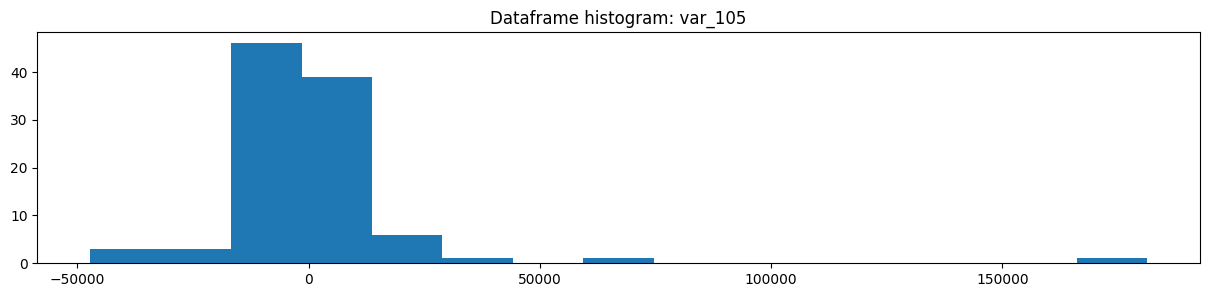

var_105             Df      Target 1       Target 0
0           count     100.000000     12.000000      88.000000
1            mean     270.253255    272.981349     269.881242
2             std   22750.094860   4671.312671   24211.491978
3             min  -47237.479044  -5261.289246  -47237.479044
4             25%   -5190.244764  -1703.509956   -5439.005185
5             50%   -1586.027315   -733.666406   -2176.759324
6             75%    1102.922537   1781.348667    1015.700724
7             max  181280.880143  12953.194903  181280.880143
8   unique values     100.000000     12.000000      88.000000
9            NaNs       0.000000      0.000000       0.000000
10     NaNs share       0.000000      0.000000       0.000000

var_105  Count in df (desc)  Mean target  Sum target  Count in df
0 -47237.479044                   1          0.0           0            1
1   -528.072494                   1          0.0           0            1
2   1002.885232                   1          0.0           0            1
3    986.470026                   1          0.0           0            1
4    986.470026                   1          0.0           0            1
5    831.590914                   1          0.0           0            1
6    831.590914                   1          0.0           0            1
7    189.616869                   1          1.0           1            1
8     11.359509                   1          0.0           0            1
9     11.359508                   1          0.0           0            1

var_105  Count in the dataframe  Mean target  Sum target (desc)  \
0   1781.348667                       1          1.0                  1   
1   -253.437913                       1          1.0                  1   
2  -2084.164513                       1          1.0                  1   
3   1781.348667                       1          1.0                  1   
4  12953.194903                       1          1.0                  1   
5  -1468.589002                       1          1.0                  1   
6  -1213.894899                       1          1.0                  1   
7   2910.012686                       1          1.0                  1   
8  -5261.289246                       1          1.0                  1   
9    189.616869                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

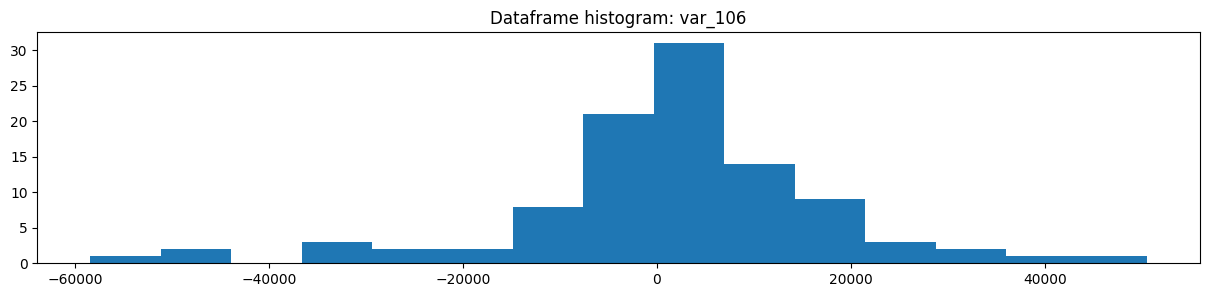

var_106            Df      Target 1      Target 0
0           count    100.000000     12.000000     88.000000
1            mean    952.616669     -4.205915   1083.092476
2             std  16653.760989  12649.576241  17182.192721
3             min -58426.395548 -33400.855299 -58426.395548
4             25%  -5323.132408  -1574.560531  -5413.280104
5             50%   1545.285014   1282.833026   1545.285014
6             75%   8256.855473   3809.166670   8772.106368
7             max  50510.739574  17720.927509  50510.739574
8   unique values    100.000000     12.000000     88.000000
9            NaNs      0.000000      0.000000      0.000000
10     NaNs share      0.000000      0.000000      0.000000

var_106  Count in df (desc)  Mean target  Sum target  Count in df
0 -58426.395548                   1          0.0           0            1
1   4830.194875                   1          0.0           0            1
2   7516.848164                   1          0.0           0            1
3   7300.841855                   1          0.0           0            1
4   7205.003686                   1          0.0           0            1
5   7205.003686                   1          0.0           0            1
6   6603.612595                   1          0.0           0            1
7   6328.740740                   1          0.0           0            1
8   6205.498842                   1          0.0           0            1
9   6019.364038                   1          0.0           0            1

var_106  Count in the dataframe  Mean target  Sum target (desc)  \
0  14553.271932                       1          1.0                  1   
1   3809.166670                       1          1.0                  1   
2     89.992052                       1          1.0                  1   
3   3545.961639                       1          1.0                  1   
4   -563.944189                       1          1.0                  1   
5   2475.674001                       1          1.0                  1   
6   -820.261703                       1          1.0                  1   
7  17720.927509                       1          1.0                  1   
8  -7432.113241                       1          1.0                  1   
9  -3837.457016                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

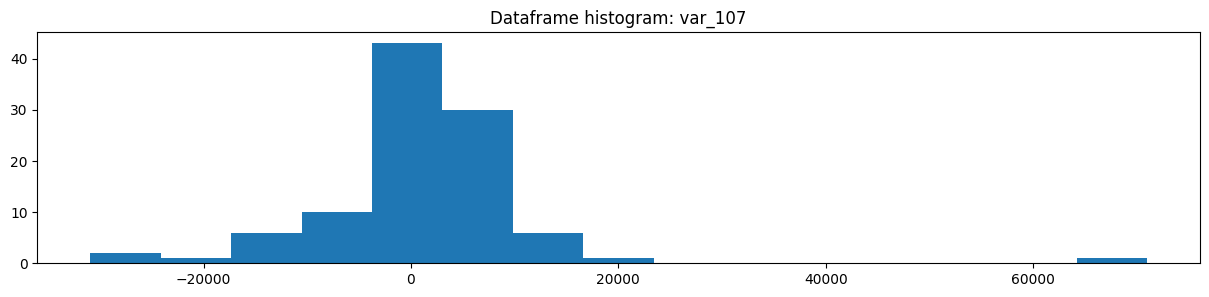

var_107            Df      Target 1      Target 0
0           count    100.000000     12.000000     88.000000
1            mean   1356.469252  -2097.842009   1827.511697
2             std  10295.518463   9450.375517  10366.088638
3             min -30932.143225 -30932.143225 -25429.353508
4             25%  -1668.196232  -2688.894775  -1334.448687
5             50%   2701.774510   1166.713593   2826.932996
6             75%   4190.350756   2867.415999   4689.479434
7             max  70986.474335   3423.855310  70986.474335
8   unique values    100.000000     12.000000     88.000000
9            NaNs      0.000000      0.000000      0.000000
10     NaNs share      0.000000      0.000000      0.000000

var_107  Count in df (desc)  Mean target  Sum target  Count in df
0 -30932.143225                   1          1.0           1            1
1   3286.305855                   1          0.0           0            1
2   4080.064452                   1          0.0           0            1
3   4080.064452                   1          0.0           0            1
4   3990.562132                   1          0.0           0            1
5   3943.962089                   1          0.0           0            1
6   3801.646534                   1          0.0           0            1
7   3626.698978                   1          0.0           0            1
8   3423.855310                   1          1.0           1            1
9   3371.933378                   1          1.0           1            1

var_107  Count in the dataframe  Mean target  Sum target (desc)  \
0 -30932.143225                       1          1.0                  1   
1   3371.933378                       1          1.0                  1   
2  -2622.396061                       1          1.0                  1   
3  -2888.390915                       1          1.0                  1   
4  -3766.646696                       1          1.0                  1   
5  -1575.207584                       1          1.0                  1   
6   1410.287585                       1          1.0                  1   
7   1354.846674                       1          1.0                  1   
8    978.580513                       1          1.0                  1   
9   2699.243539                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

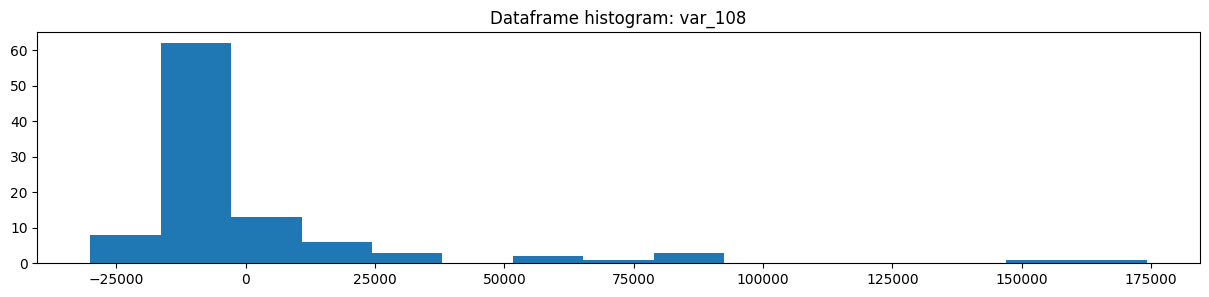

var_108             Df      Target 1       Target 0
0           count     100.000000     12.000000      88.000000
1            mean    2320.190131    106.561633    2622.048562
2             std   32308.406960  24481.558696   33335.606029
3             min  -30042.521936 -16815.563632  -30042.521936
4             25%  -10897.809853 -10979.669305  -10746.366447
5             50%   -8769.601643  -9678.219411   -8727.951086
6             75%    -296.439161  -2801.094335    -296.439161
7             max  174197.775427  71691.379224  174197.775427
8   unique values     100.000000     12.000000      88.000000
9            NaNs       0.000000      0.000000       0.000000
10     NaNs share       0.000000      0.000000       0.000000

var_108  Count in df (desc)  Mean target  Sum target  Count in df
0 -30042.521936                   1          0.0           0            1
1  -5404.260867                   1          0.0           0            1
2  -1147.091714                   1          0.0           0            1
3  -1532.868897                   1          0.0           0            1
4  -1939.604492                   1          0.0           0            1
5  -2496.487430                   1          0.0           0            1
6  -2962.884651                   1          0.0           0            1
7  -3304.386426                   1          0.0           0            1
8  -3304.386426                   1          0.0           0            1
9  -3644.841020                   1          0.0           0            1

var_108  Count in the dataframe  Mean target  Sum target (desc)  \
0  19743.880275                       1          1.0                  1   
1 -10236.779810                       1          1.0                  1   
2   3300.249566                       1          1.0                  1   
3 -10886.884865                       1          1.0                  1   
4  71691.379224                       1          1.0                  1   
5  -9119.659011                       1          1.0                  1   
6 -16815.563632                       1          1.0                  1   
7  -7953.785233                       1          1.0                  1   
8  -4834.875635                       1          1.0                  1   
9 -10886.884865                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

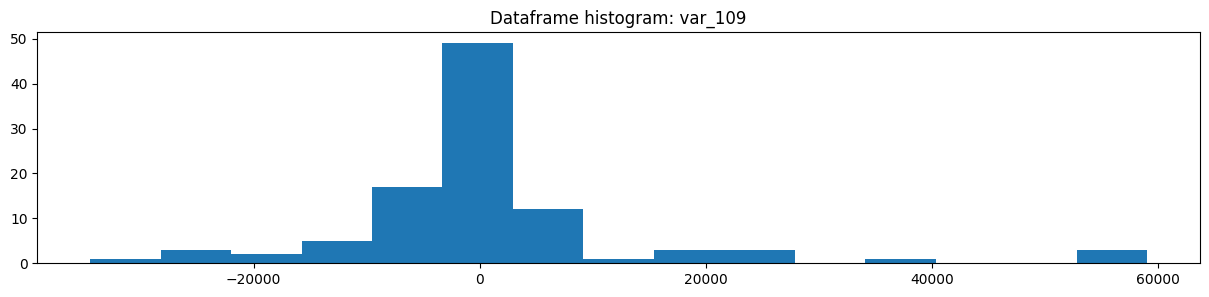

var_109            Df      Target 1      Target 0
0           count    100.000000     12.000000     88.000000
1            mean    469.727647   4381.806207    -63.737612
2             std  14102.379124  17444.497898  13617.399799
3             min -34463.858643  -4421.137320 -34463.858643
4             25%  -4101.487167  -2568.023559  -4279.176181
5             50%  -1699.493999  -1165.198561  -1699.493999
6             75%   2068.442872   3340.036057   1815.182072
7             max  59014.122334  59014.122334  56186.258426
8   unique values    100.000000     12.000000     88.000000
9            NaNs      0.000000      0.000000      0.000000
10     NaNs share      0.000000      0.000000      0.000000

var_109  Count in df (desc)  Mean target  Sum target  Count in df
0 -34463.858643                   1          0.0           0            1
1    -19.343223                   1          0.0           0            1
2   1803.692019                   1          0.0           0            1
3   1461.321149                   1          0.0           0            1
4   1144.280360                   1          0.0           0            1
5   1075.669478                   1          0.0           0            1
6   1075.669478                   1          0.0           0            1
7    926.589554                   1          0.0           0            1
8    733.750775                   1          0.0           0            1
9    592.419525                   1          0.0           0            1

var_109  Count in the dataframe  Mean target  Sum target (desc)  \
0  59014.122334                       1          1.0                  1   
1   3450.556896                       1          1.0                  1   
2  -4421.137320                       1          1.0                  1   
3  -1983.558890                       1          1.0                  1   
4  -2269.887915                       1          1.0                  1   
5   -346.838232                       1          1.0                  1   
6   -346.838232                       1          1.0                  1   
7   4500.265358                       1          1.0                  1   
8  -2479.473467                       1          1.0                  1   
9   3303.195778                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

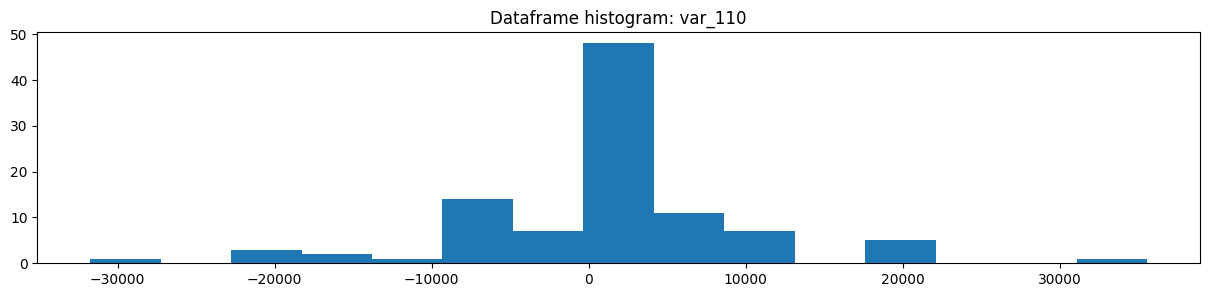

var_110            Df      Target 1      Target 0
0           count    100.000000     12.000000     88.000000
1            mean   1149.647539    -75.689520   1316.738956
2             std   9093.955613   5440.070181   9493.670312
3             min -31740.842237  -8685.176351 -31740.842237
4             25%   -741.527504  -2300.563686   -692.436711
5             50%   1642.991143    886.978005   1706.381395
6             75%   4143.428947   2359.023541   4751.027027
7             max  35550.004761  11129.902878  35550.004761
8   unique values    100.000000     12.000000     88.000000
9            NaNs      0.000000      0.000000      0.000000
10     NaNs share      0.000000      0.000000      0.000000

var_110  Count in df (desc)  Mean target  Sum target  Count in df
0 -31740.842237                   1          0.0           0            1
1   2605.282338                   1          0.0           0            1
2   3894.579071                   1          0.0           0            1
3   3894.579071                   1          0.0           0            1
4   3827.769761                   1          0.0           0            1
5   3554.928034                   1          0.0           0            1
6   3427.126113                   1          0.0           0            1
7   3162.959679                   1          0.0           0            1
8   3137.209879                   1          0.0           0            1
9   2899.945153                   1          0.0           0            1

var_110  Count in the dataframe  Mean target  Sum target (desc)  \
0   -772.719824                       1          1.0                  1   
1  -7391.157253                       1          1.0                  1   
2  11129.902878                       1          1.0                  1   
3  -8685.176351                       1          1.0                  1   
4   2083.782327                       1          1.0                  1   
5   2359.023541                       1          1.0                  1   
6   2359.023541                       1          1.0                  1   
7    984.627013                       1          1.0                  1   
8    789.328996                       1          1.0                  1   
9    623.290249                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

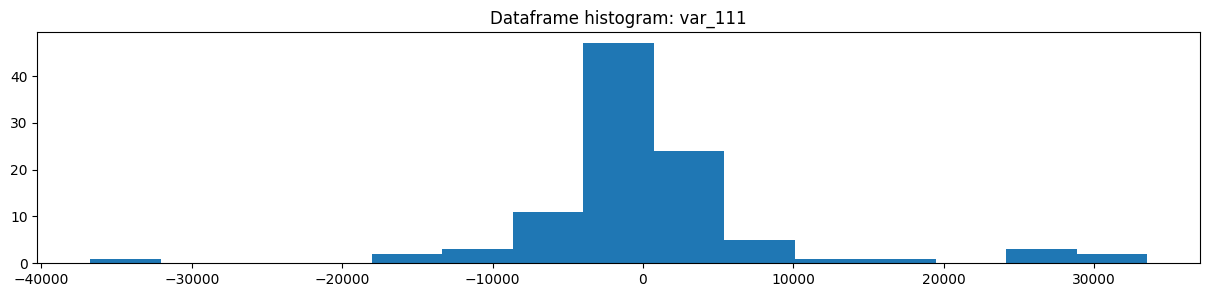

var_111            Df      Target 1      Target 0
0           count    100.000000     12.000000     88.000000
1            mean    703.461243  -1179.480835    960.226072
2             std   8935.176947   4628.694081   9358.677265
3             min -36759.868320 -14668.239512 -36759.868320
4             25%  -1743.792558  -1272.862315  -2139.393712
5             50%   -630.199824   -851.040215   -594.836592
6             75%   2316.192475    -97.695723   2403.351316
7             max  33522.674279   4490.321049  33522.674279
8   unique values    100.000000     12.000000     88.000000
9            NaNs      0.000000      0.000000      0.000000
10     NaNs share      0.000000      0.000000      0.000000

var_111  Count in df (desc)  Mean target  Sum target  Count in df
0 -36759.868320                   1          0.0           0            1
1    571.828563                   1          0.0           0            1
2   2214.910559                   1          0.0           0            1
3   1919.018120                   1          0.0           0            1
4   1725.434579                   1          0.0           0            1
5   1561.953157                   1          0.0           0            1
6   1507.820103                   1          0.0           0            1
7   1398.925396                   1          0.0           0            1
8   1333.191721                   1          0.0           0            1
9   1148.391734                   1          0.0           0            1

var_111  Count in the dataframe  Mean target  Sum target (desc)  \
0   -238.247122                       1          1.0                  1   
1   2995.910645                       1          1.0                  1   
2   -781.093701                       1          1.0                  1   
3   -401.294262                       1          1.0                  1   
4   4490.321049                       1          1.0                  1   
5   -920.986729                       1          1.0                  1   
6   -920.986729                       1          1.0                  1   
7    323.958473                       1          1.0                  1   
8 -14668.239512                       1          1.0                  1   
9  -1452.639468                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

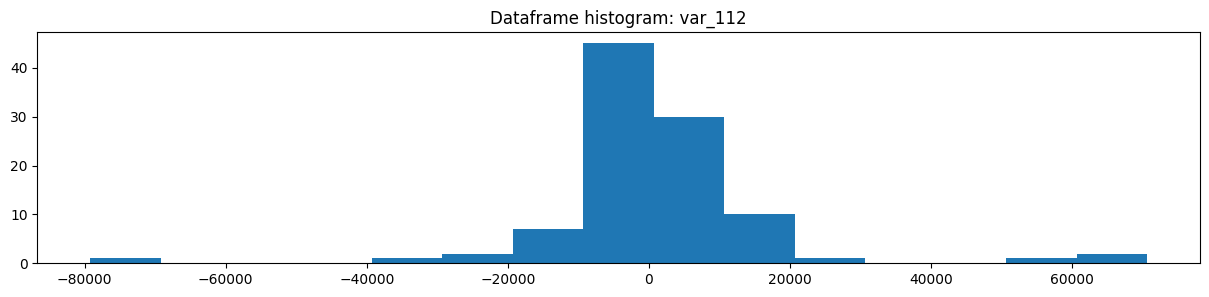

var_112            Df      Target 1      Target 0
0           count    100.000000     12.000000     88.000000
1            mean   1591.564457  -1197.356518   1971.871863
2             std  16103.327267   9394.148383  16813.918278
3             min -79218.132789 -25910.861337 -79218.132789
4             25%  -2109.522814  -1796.915293  -2109.522814
5             50%    184.828288    248.331088    146.143689
6             75%   3794.536903   3349.185155   4088.255660
7             max  70600.366349  11929.412297  70600.366349
8   unique values    100.000000     12.000000     88.000000
9            NaNs      0.000000      0.000000      0.000000
10     NaNs share      0.000000      0.000000      0.000000

var_112  Count in df (desc)  Mean target  Sum target  Count in df
0 -79218.132789                   1          0.0           0            1
1   2237.802985                   1          0.0           0            1
2   3653.559015                   1          1.0           1            1
3   3613.660436                   1          0.0           0            1
4   3562.268163                   1          0.0           0            1
5   3550.984353                   1          0.0           0            1
6   3247.727202                   1          1.0           1            1
7   2954.020609                   1          0.0           0            1
8   2879.750907                   1          0.0           0            1
9   2683.561106                   1          0.0           0            1

var_112  Count in the dataframe  Mean target  Sum target (desc)  \
0    289.514695                       1          1.0                  1   
1   3653.559015                       1          1.0                  1   
2  -4332.184543                       1          1.0                  1   
3 -25910.861337                       1          1.0                  1   
4   3247.727202                       1          1.0                  1   
5   -951.825543                       1          1.0                  1   
6    207.147482                       1          1.0                  1   
7  -9483.209470                       1          1.0                  1   
8   6358.116244                       1          1.0                  1   
9  11929.412297                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

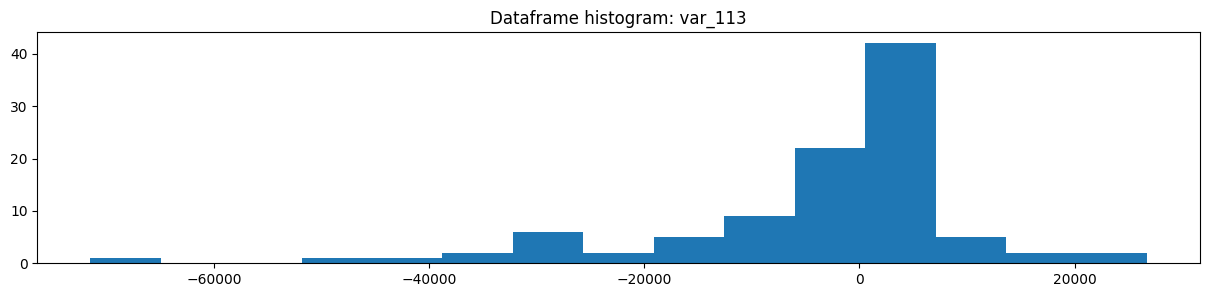

var_113            Df      Target 1      Target 0
0           count    100.000000     12.000000     88.000000
1            mean  -3921.004296  -1218.864091  -4289.477960
2             std  14572.309183  10425.051816  15058.430941
3             min -71532.038293 -21347.724559 -71532.038293
4             25%  -8469.403755  -6008.767434  -8913.458064
5             50%    691.109349    921.553041    578.176150
6             75%   3654.573115   2978.832572   3758.213025
7             max  26734.931357  21563.152725  26734.931357
8   unique values    100.000000     12.000000     88.000000
9            NaNs      0.000000      0.000000      0.000000
10     NaNs share      0.000000      0.000000      0.000000

var_113  Count in df (desc)  Mean target  Sum target  Count in df
0 -71532.038293                   1          0.0           0            1
1   1947.964441                   1          0.0           0            1
2   3226.389146                   1          0.0           0            1
3   2978.832572                   1          1.0           1            1
4   2978.832572                   1          1.0           1            1
5   2619.014773                   1          0.0           0            1
6   2436.071252                   1          0.0           0            1
7   2392.118391                   1          0.0           0            1
8   2392.118391                   1          0.0           0            1
9   2362.245842                   1          0.0           0            1

var_113  Count in the dataframe  Mean target  Sum target (desc)  \
0 -21347.724559                       1          1.0                  1   
1  -2863.333794                       1          1.0                  1   
2  21563.152725                       1          1.0                  1   
3   2978.832572                       1          1.0                  1   
4   2978.832572                       1          1.0                  1   
5 -12162.467269                       1          1.0                  1   
6  -5230.588537                       1          1.0                  1   
7    943.869872                       1          1.0                  1   
8  -8343.304124                       1          1.0                  1   
9   4061.907300                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

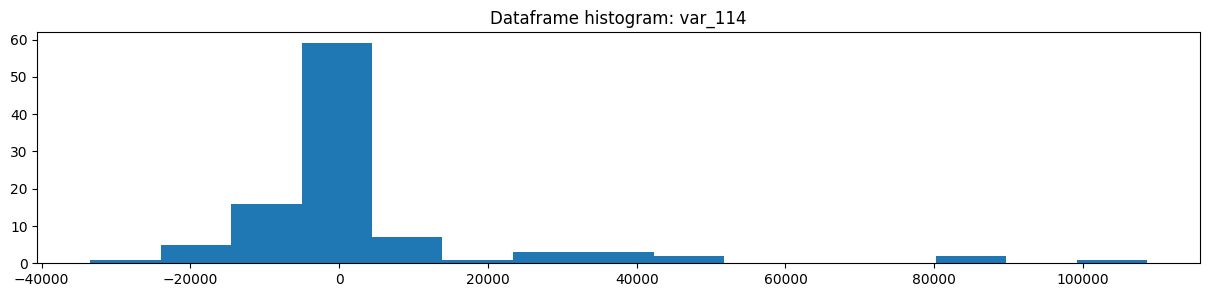

var_114             Df      Target 1       Target 0
0           count     100.000000     12.000000      88.000000
1            mean    2688.297355   1531.491054    2846.043668
2             std   20132.817386  13061.660444   20963.235018
3             min  -33473.520611 -15999.586415  -33473.520611
4             25%   -4533.342336  -4123.622663   -4568.099026
5             50%   -2586.401587  -2474.059964   -2595.296443
6             75%     254.238758   2418.040002     -70.584369
7             max  108609.039722  28090.493622  108609.039722
8   unique values     100.000000     12.000000      88.000000
9            NaNs       0.000000      0.000000       0.000000
10     NaNs share       0.000000      0.000000       0.000000

var_114  Count in df (desc)  Mean target  Sum target  Count in df
0 -33473.520611                   1          0.0           0            1
1  -1618.418833                   1          0.0           0            1
2   -142.309507                   1          0.0           0            1
3   -142.309507                   1          0.0           0            1
4   -201.291307                   1          0.0           0            1
5   -436.035981                   1          0.0           0            1
6   -608.502356                   1          0.0           0            1
7   -958.216614                   1          0.0           0            1
8  -1215.793751                   1          0.0           0            1
9  -1215.793751                   1          0.0           0            1

var_114  Count in the dataframe  Mean target  Sum target (desc)  \
0  -4452.599528                       1          1.0                  1   
1  -2474.059964                       1          1.0                  1   
2  28090.493622                       1          1.0                  1   
3  -2350.243659                       1          1.0                  1   
4  -7258.276171                       1          1.0                  1   
5  -3219.751574                       1          1.0                  1   
6  -2474.059964                       1          1.0                  1   
7   3532.832436                       1          1.0                  1   
8   2046.442524                       1          1.0                  1   
9  -4013.963708                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

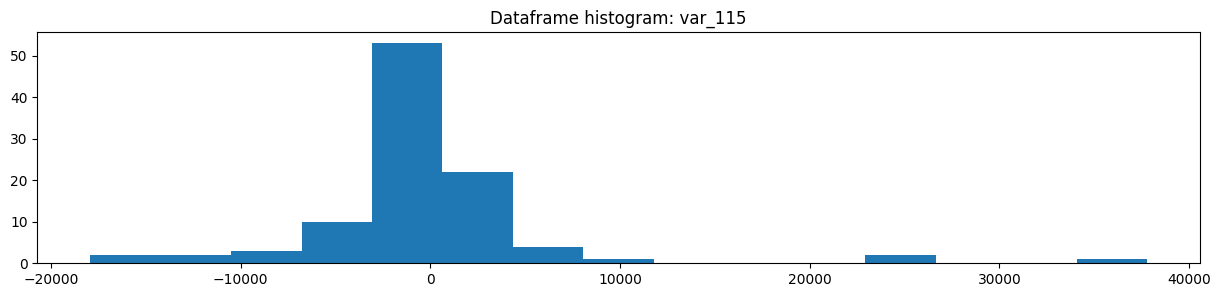

var_115            Df      Target 1      Target 0
0           count    100.000000     12.000000     88.000000
1            mean     64.298102   -709.361547    169.797146
2             std   6531.299649   5269.376647   6703.522806
3             min -17932.408129 -16150.850915 -17932.408129
4             25%  -1530.823134   -569.387212  -1637.412704
5             50%    -98.560847   -215.069521    -58.685373
6             75%    841.886758   1161.528608    841.886758
7             max  37778.126848   5750.290195  37778.126848
8   unique values    100.000000     12.000000     88.000000
9            NaNs      0.000000      0.000000      0.000000
10     NaNs share      0.000000      0.000000      0.000000

var_115  Count in df (desc)  Mean target  Sum target  Count in df
0 -17932.408129                   1          0.0           0            1
1    427.463812                   1          0.0           0            1
2    774.420276                   1          1.0           1            1
3    760.294992                   1          0.0           0            1
4    687.912015                   1          0.0           0            1
5    664.099898                   1          0.0           0            1
6    569.373904                   1          0.0           0            1
7    526.539227                   1          0.0           0            1
8    526.539227                   1          0.0           0            1
9    459.032543                   1          0.0           0            1

var_115  Count in the dataframe  Mean target  Sum target (desc)  \
0  -1664.463248                       1          1.0                  1   
1   2322.853605                       1          1.0                  1   
2   -417.577086                       1          1.0                  1   
3   -291.702722                       1          1.0                  1   
4 -16150.850915                       1          1.0                  1   
5     47.218183                       1          1.0                  1   
6   2698.304142                       1          1.0                  1   
7   -417.577086                       1          1.0                  1   
8   5750.290195                       1          1.0                  1   
9  -1024.817588                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

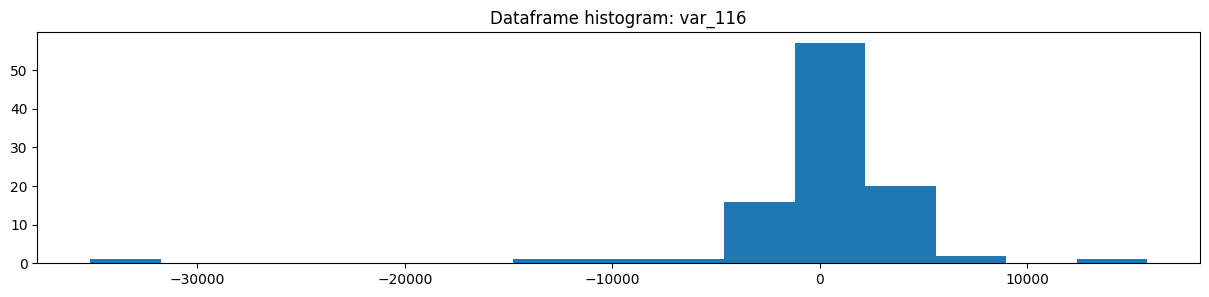

var_116            Df     Target 1      Target 0
0           count    100.000000    12.000000     88.000000
1            mean     48.464195   545.185732    -19.270560
2             std   4786.343882  1065.768526   5087.894884
3             min -35169.249777  -967.618440 -35169.249777
4             25%   -842.741786    -8.247062   -864.737507
5             50%    264.258015   178.808679    378.335372
6             75%   1848.955652   616.923630   2001.217465
7             max  15781.851353  2744.438869  15781.851353
8   unique values    100.000000    12.000000     88.000000
9            NaNs      0.000000     0.000000      0.000000
10     NaNs share      0.000000     0.000000      0.000000

var_116  Count in df (desc)  Mean target  Sum target  Count in df
0 -35169.249777                   1          0.0           0            1
1    948.871419                   1          0.0           0            1
2   1738.885524                   1          0.0           0            1
3   1738.885524                   1          0.0           0            1
4   1534.357947                   1          0.0           0            1
5   1476.286734                   1          0.0           0            1
6   1406.202269                   1          0.0           0            1
7   1340.774821                   1          1.0           1            1
8   1331.413959                   1          0.0           0            1
9   1265.446166                   1          0.0           0            1

var_116  Count in the dataframe  Mean target  Sum target (desc)  \
0   324.371892                       1          1.0                  1   
1   -67.957581                       1          1.0                  1   
2  -967.618440                       1          1.0                  1   
3  2337.974986                       1          1.0                  1   
4  2744.438869                       1          1.0                  1   
5   113.481101                       1          1.0                  1   
6   375.639900                       1          1.0                  1   
7    -8.247062                       1          1.0                  1   
8    -8.247062                       1          1.0                  1   
9   153.473220                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

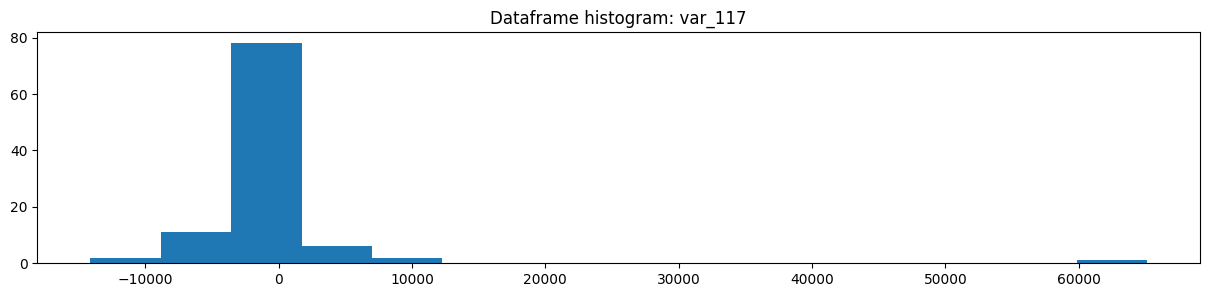

var_117            Df     Target 1      Target 0
0           count    100.000000    12.000000     88.000000
1            mean   -563.189439  -811.399093   -529.342668
2             std   7308.664275  1161.276201   7784.870737
3             min -14121.954813 -3126.270182 -14121.954813
4             25%  -2547.808232 -1426.104520  -2739.311667
5             50%   -657.954203  -846.639701   -576.346377
6             75%    -96.856463  -171.401527    -96.856463
7             max  65119.233818  1383.987733  65119.233818
8   unique values    100.000000    12.000000     88.000000
9            NaNs      0.000000     0.000000      0.000000
10     NaNs share      0.000000     0.000000      0.000000

var_117  Count in df (desc)  Mean target  Sum target  Count in df
0 -14121.954813                   1          0.0           0            1
1   -332.872432                   1          0.0           0            1
2   -134.050805                   1          0.0           0            1
3   -134.050805                   1          0.0           0            1
4   -160.761721                   1          0.0           0            1
5   -191.073640                   1          0.0           0            1
6   -230.456314                   1          0.0           0            1
7   -268.728471                   1          0.0           0            1
8   -274.909055                   1          0.0           0            1
9   -282.633868                   1          0.0           0            1

var_117  Count in the dataframe  Mean target  Sum target (desc)  \
0 -1034.921213                       1          1.0                  1   
1  -686.244025                       1          1.0                  1   
2 -1370.935980                       1          1.0                  1   
3  1383.987733                       1          1.0                  1   
4 -3126.270182                       1          1.0                  1   
5   182.968564                       1          1.0                  1   
6 -1838.781996                       1          1.0                  1   
7  -686.244025                       1          1.0                  1   
8 -1007.035378                       1          1.0                  1   
9  -289.524891                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

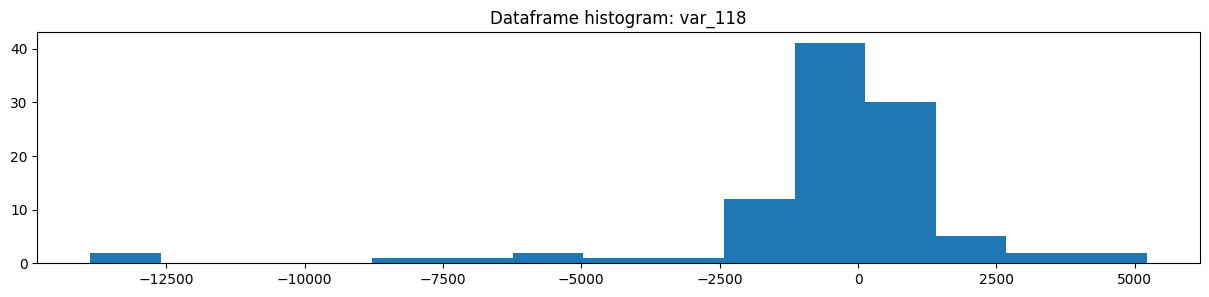

var_118            Df     Target 1      Target 0
0           count    100.000000    12.000000     88.000000
1            mean   -440.996707  -399.883775   -446.603016
2             std   2671.582223   848.180990   2833.829373
3             min -13873.989070 -1786.120313 -13873.989070
4             25%   -675.150202 -1046.556106   -655.746819
5             50%    -34.796499  -168.402145     40.662548
6             75%    505.920996   -69.028055    623.198552
7             max   5221.663869  1275.127556   5221.663869
8   unique values    100.000000    12.000000     88.000000
9            NaNs      0.000000     0.000000      0.000000
10     NaNs share      0.000000     0.000000      0.000000

var_118  Count in df (desc)  Mean target  Sum target  Count in df
0 -13873.989070                   1          0.0           0            1
1    218.851818                   1          0.0           0            1
2    437.293598                   1          0.0           0            1
3    437.293598                   1          0.0           0            1
4    407.908773                   1          0.0           0            1
5    385.520229                   1          0.0           0            1
6    320.460670                   1          0.0           0            1
7    277.955489                   1          0.0           0            1
8    255.094026                   1          1.0           1            1
9    244.734246                   1          0.0           0            1

var_118  Count in the dataframe  Mean target  Sum target (desc)  \
0  -137.342271                       1          1.0                  1   
1   255.094026                       1          1.0                  1   
2 -1543.967955                       1          1.0                  1   
3   -86.397300                       1          1.0                  1   
4  -137.342271                       1          1.0                  1   
5  -199.462019                       1          1.0                  1   
6  -225.771261                       1          1.0                  1   
7 -1786.120313                       1          1.0                  1   
8  1275.127556                       1          1.0                  1   
9 -1200.142541                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

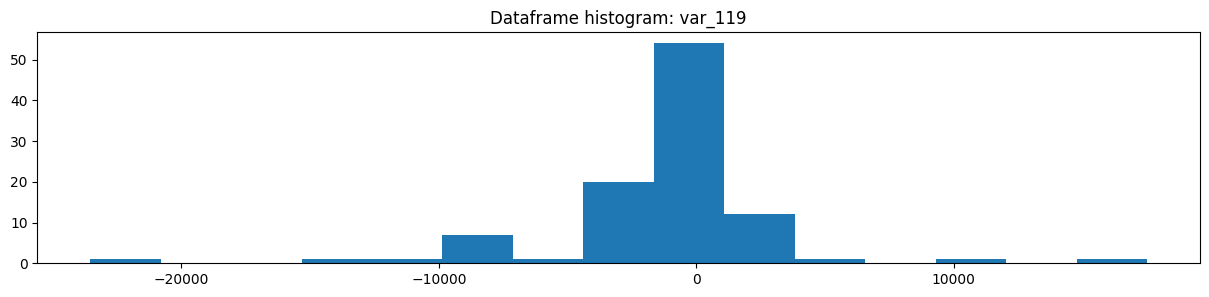

var_119            Df      Target 1      Target 0
0           count    100.000000     12.000000     88.000000
1            mean  -1116.704387    937.358339  -1396.803850
2             std   4475.561506   5882.920067   4213.830550
3             min -23539.376375  -7480.805838 -23539.376375
4             25%  -1976.131935  -1976.131935  -2067.969014
5             50%    -82.271206    475.025982   -148.753013
6             75%    638.539612    996.474939    576.669104
7             max  17502.477906  17502.477906  10639.976796
8   unique values    100.000000     12.000000     88.000000
9            NaNs      0.000000      0.000000      0.000000
10     NaNs share      0.000000      0.000000      0.000000

var_119  Count in df (desc)  Mean target  Sum target  Count in df
0 -23539.376375                   1          0.0           0            1
1    306.823480                   1          0.0           0            1
2    559.159128                   1          0.0           0            1
3    502.634436                   1          1.0           1            1
4    502.634436                   1          1.0           1            1
5    447.417529                   1          1.0           1            1
6    436.322073                   1          0.0           0            1
7    436.322073                   1          0.0           0            1
8    416.695999                   1          0.0           0            1
9    399.097847                   1          0.0           0            1

var_119  Count in the dataframe  Mean target  Sum target (desc)  \
0  17502.477906                       1          1.0                  1   
1    184.845075                       1          1.0                  1   
2  -2000.166373                       1          1.0                  1   
3  -7480.805838                       1          1.0                  1   
4   1535.134875                       1          1.0                  1   
5  -2276.271250                       1          1.0                  1   
6  -1968.120456                       1          1.0                  1   
7   3481.598104                       1          1.0                  1   
8    816.921627                       1          1.0                  1   
9    447.417529                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

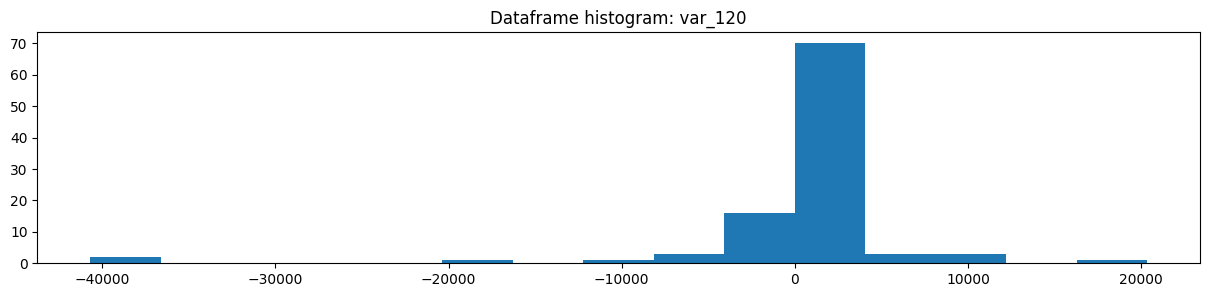

var_120            Df     Target 1      Target 0
0           count    100.000000    12.000000     88.000000
1            mean    -61.831819  1336.285746   -252.484214
2             std   6976.401594  2951.772065   7346.787360
3             min -40691.769147 -3565.357939 -40691.769147
4             25%     87.582323   350.428501     87.582323
5             50%    719.686847   871.960124    670.239091
6             75%   1203.934471  1434.602201   1183.983760
7             max  20332.565217  7655.781631  20332.565217
8   unique values    100.000000    12.000000     88.000000
9            NaNs      0.000000     0.000000      0.000000
10     NaNs share      0.000000     0.000000      0.000000

var_120  Count in df (desc)  Mean target  Sum target  Count in df
0 -40691.769147                   1          0.0           0            1
1    852.091262                   1          0.0           0            1
2   1179.281518                   1          0.0           0            1
3   1086.321231                   1          0.0           0            1
4   1022.470818                   1          1.0           1            1
5   1013.770503                   1          1.0           1            1
6   1011.769309                   1          0.0           0            1
7    965.309387                   1          0.0           0            1
8    914.293257                   1          0.0           0            1
9    910.774528                   1          0.0           0            1

var_120  Count in the dataframe  Mean target  Sum target (desc)  \
0  7655.781631                       1          1.0                  1   
1   730.149745                       1          1.0                  1   
2  2074.009532                       1          1.0                  1   
3 -1169.023096                       1          1.0                  1   
4 -3565.357939                       1          1.0                  1   
5   730.149745                       1          1.0                  1   
6  1221.466424                       1          1.0                  1   
7   513.299949                       1          1.0                  1   
8  5946.897483                       1          1.0                  1   
9  1013.770503                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

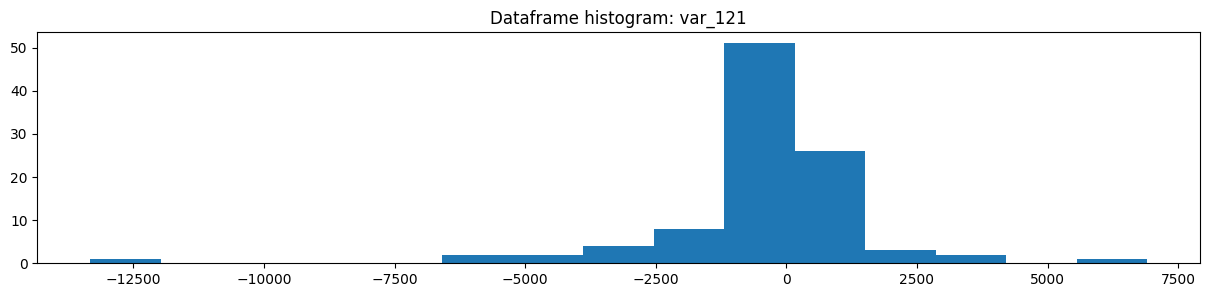

var_121            Df     Target 1      Target 0
0           count    100.000000    12.000000     88.000000
1            mean   -339.549703  -495.281403   -318.313562
2             std   2090.189633  1066.146171   2196.356228
3             min -13327.708033 -2830.774321 -13327.708033
4             25%   -530.851220  -332.636967   -571.579729
5             50%    -81.259758  -192.237963    -69.428821
6             75%    301.043498   111.694913    403.529036
7             max   6904.846366   345.948819   6904.846366
8   unique values    100.000000    12.000000     88.000000
9            NaNs      0.000000     0.000000      0.000000
10     NaNs share      0.000000     0.000000      0.000000

var_121  Count in df (desc)  Mean target  Sum target  Count in df
0 -13327.708033                   1          0.0           0            1
1     46.000125                   1          0.0           0            1
2    231.547652                   1          1.0           1            1
3    215.039217                   1          0.0           0            1
4    215.039217                   1          0.0           0            1
5    200.598567                   1          0.0           0            1
6    186.674547                   1          0.0           0            1
7    169.448181                   1          0.0           0            1
8    114.073570                   1          0.0           0            1
9     79.403690                   1          0.0           0            1

var_121  Count in the dataframe  Mean target  Sum target (desc)  \
0   345.948819                       1          1.0                  1   
1 -2830.774321                       1          1.0                  1   
2  -110.511197                       1          1.0                  1   
3  -110.511197                       1          1.0                  1   
4 -2592.397665                       1          1.0                  1   
5  -273.964730                       1          1.0                  1   
6    71.744000                       1          1.0                  1   
7   322.414044                       1          1.0                  1   
8  -328.022607                       1          1.0                  1   
9  -330.849114                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

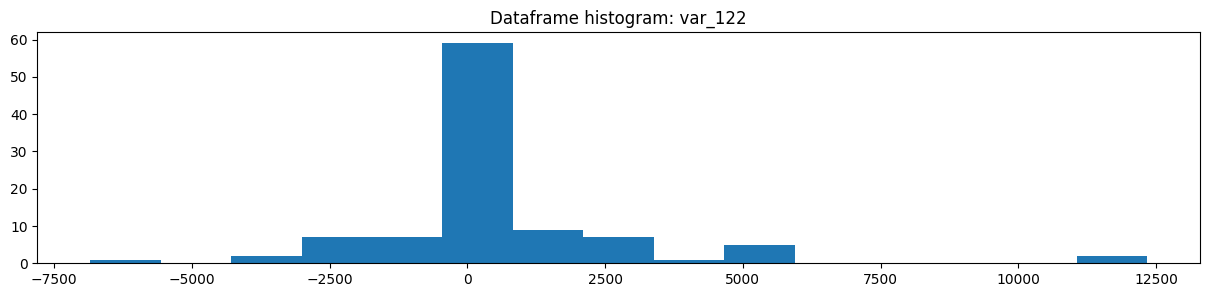

var_122            Df      Target 1      Target 0
0           count    100.000000     12.000000     88.000000
1            mean    661.465430   1679.177785    522.686473
2             std   2474.557285   3656.943652   2261.600060
3             min  -6842.880995  -2000.845168  -6842.880995
4             25%   -137.601516     57.958108   -143.794281
5             50%    356.223578    327.969418    369.449087
6             75%    791.907349   1341.297557    781.935370
7             max  12333.034653  11660.883507  12333.034653
8   unique values    100.000000     12.000000     88.000000
9            NaNs      0.000000      0.000000      0.000000
10     NaNs share      0.000000      0.000000      0.000000

var_122  Count in df (desc)  Mean target  Sum target  Count in df
0 -6842.880995                   1          0.0           0            1
1   593.619582                   1          0.0           0            1
2   781.534562                   1          0.0           0            1
3   769.545306                   1          0.0           0            1
4   767.927328                   1          0.0           0            1
5   719.345033                   1          0.0           0            1
6   719.345033                   1          0.0           0            1
7   682.709664                   1          0.0           0            1
8   674.191187                   1          0.0           0            1
9   666.995465                   1          0.0           0            1

var_122  Count in the dataframe  Mean target  Sum target (desc)  \
0    262.734914                       1          1.0                  1   
1   2255.228327                       1          1.0                  1   
2  11660.883507                       1          1.0                  1   
3   -150.454863                       1          1.0                  1   
4    327.969418                       1          1.0                  1   
5    327.969418                       1          1.0                  1   
6  -2000.845168                       1          1.0                  1   
7    524.896392                       1          1.0                  1   
8   5848.926670                       1          1.0                  1   
9   1036.653966                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

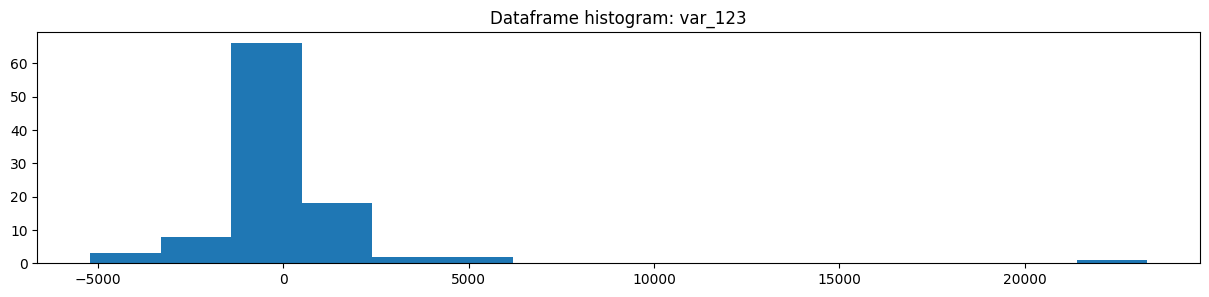

var_123            Df     Target 1      Target 0
0           count    100.000000    12.000000     88.000000
1            mean    238.928339  -174.579854    295.315820
2             std   2733.775828   509.759222   2905.977648
3             min  -5205.882222 -1542.691900  -5205.882222
4             25%   -264.637184  -267.446339   -264.637184
5             50%     89.899372    74.893016     89.899372
6             75%    393.093238   118.982879    521.095915
7             max  23292.596385   282.491470  23292.596385
8   unique values    100.000000    12.000000     88.000000
9            NaNs      0.000000     0.000000      0.000000
10     NaNs share      0.000000     0.000000      0.000000

var_123  Count in df (desc)  Mean target  Sum target  Count in df
0 -5205.882222                   1          0.0           0            1
1   173.158469                   1          0.0           0            1
2   334.175807                   1          0.0           0            1
3   334.175807                   1          0.0           0            1
4   320.907665                   1          0.0           0            1
5   282.491470                   1          1.0           1            1
6   219.915614                   1          0.0           0            1
7   212.993779                   1          0.0           0            1
8   212.993779                   1          0.0           0            1
9   194.489864                   1          0.0           0            1

var_123  Count in the dataframe  Mean target  Sum target (desc)  \
0   146.805375                       1          1.0                  1   
1 -1542.691900                       1          1.0                  1   
2  -219.771195                       1          1.0                  1   
3    49.906926                       1          1.0                  1   
4    99.879105                       1          1.0                  1   
5   111.186227                       1          1.0                  1   
6   118.982879                       1          1.0                  1   
7   118.982879                       1          1.0                  1   
8  -410.471770                       1          1.0                  1   
9  -189.029244                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

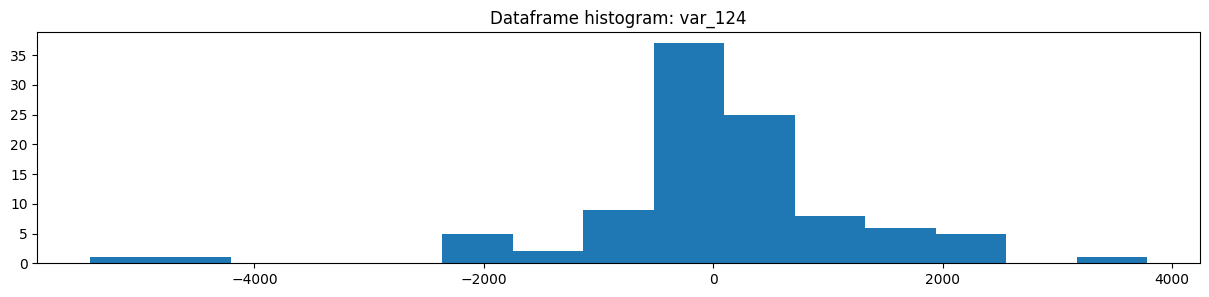

var_124           Df     Target 1     Target 0
0           count   100.000000    12.000000    88.000000
1            mean    88.218336   300.189360    59.313197
2             std  1205.797648   892.940462  1243.638407
3             min -5432.064506  -774.148279 -5432.064506
4             25%  -313.794272  -169.382402  -320.817859
5             50%    33.270254   173.719607    15.448583
6             75%   501.248683   275.214315   539.040482
7             max  3781.232292  2139.165084  3781.232292
8   unique values   100.000000    12.000000    88.000000
9            NaNs     0.000000     0.000000     0.000000
10     NaNs share     0.000000     0.000000     0.000000

var_124  Count in df (desc)  Mean target  Sum target  Count in df
0 -5432.064506                   1          0.0           0            1
1   287.124257                   1          0.0           0            1
2   485.239780                   1          0.0           0            1
3   468.865044                   1          0.0           0            1
4   441.194111                   1          0.0           0            1
5   336.437588                   1          0.0           0            1
6   336.437588                   1          0.0           0            1
7   335.912317                   1          0.0           0            1
8   335.912317                   1          0.0           0            1
9   314.529198                   1          0.0           0            1

var_124  Count in the dataframe  Mean target  Sum target (desc)  \
0  2139.165084                       1          1.0                  1   
1    65.661219                       1          1.0                  1   
2   252.442396                       1          1.0                  1   
3    94.996819                       1          1.0                  1   
4   265.738187                       1          1.0                  1   
5  -774.148279                       1          1.0                  1   
6  -111.628071                       1          1.0                  1   
7   303.642699                       1          1.0                  1   
8   252.442396                       1          1.0                  1   
9  -533.140676                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

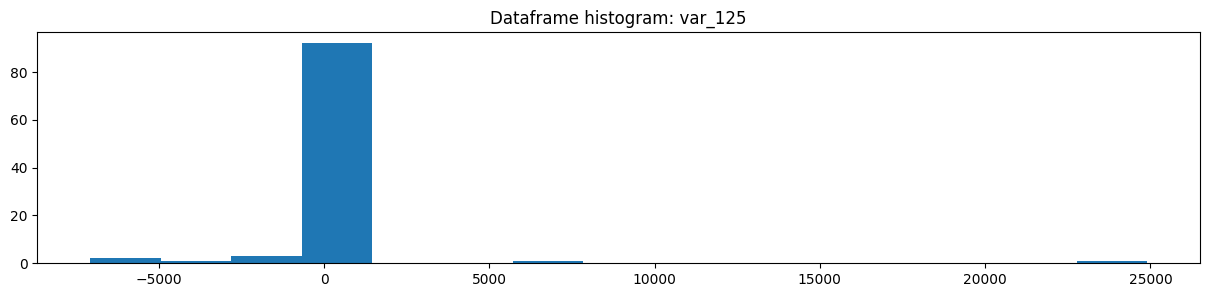

var_125            Df    Target 1      Target 0
0           count    100.000000   12.000000     88.000000
1            mean     17.154895 -116.488368     35.378976
2             std   2849.956363  192.172741   3038.929578
3             min  -7073.781220 -496.381908  -7073.781220
4             25%   -235.039146 -239.584394   -235.039146
5             50%    -90.337759  -83.985224    -92.930750
6             75%     -8.968897   -9.811767     -6.440288
7             max  24896.146323  254.053244  24896.146323
8   unique values    100.000000   12.000000     88.000000
9            NaNs      0.000000    0.000000      0.000000
10     NaNs share      0.000000    0.000000      0.000000

var_125  Count in df (desc)  Mean target  Sum target  Count in df
0 -7073.781220                   1          0.0           0            1
1   -20.534695                   1          0.0           0            1
2    -9.811767                   1          1.0           1            1
3   -10.099983                   1          0.0           0            1
4   -10.362761                   1          0.0           0            1
5   -10.883273                   1          0.0           0            1
6   -11.660191                   1          0.0           0            1
7   -13.162625                   1          0.0           0            1
8   -13.162625                   1          0.0           0            1
9   -18.649517                   1          0.0           0            1

var_125  Count in the dataframe  Mean target  Sum target (desc)  \
0 -230.226283                       1          1.0                  1   
1  254.053244                       1          1.0                  1   
2 -496.381908                       1          1.0                  1   
3 -267.658726                       1          1.0                  1   
4  -55.167439                       1          1.0                  1   
5 -124.548865                       1          1.0                  1   
6   25.598847                       1          1.0                  1   
7   -9.811767                       1          1.0                  1   
8 -315.935303                       1          1.0                  1   
9  -75.062764                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

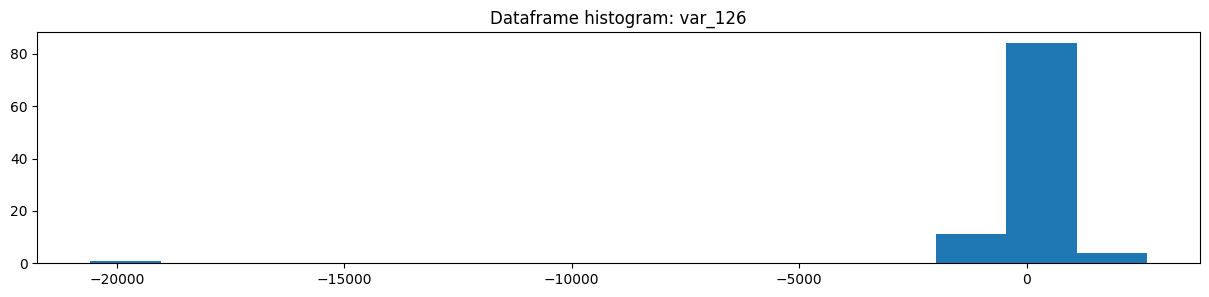

var_126            Df    Target 1      Target 0
0           count    100.000000   12.000000     88.000000
1            mean   -159.270211  -28.904810   -177.047311
2             std   2118.810559  212.889656   2258.359099
3             min -20584.107263 -602.574064 -20584.107263
4             25%   -102.489009  -28.844967   -109.080421
5             50%     34.951184   26.676233     34.951184
6             75%    158.714358   68.863352    174.125282
7             max   2649.230082  189.598824   2649.230082
8   unique values    100.000000   12.000000     88.000000
9            NaNs      0.000000    0.000000      0.000000
10     NaNs share      0.000000    0.000000      0.000000

var_126  Count in df (desc)  Mean target  Sum target  Count in df
0 -20584.107263                   1          0.0           0            1
1     50.158287                   1          0.0           0            1
2    152.764957                   1          0.0           0            1
3    148.871112                   1          0.0           0            1
4    133.420102                   1          1.0           1            1
5    130.430752                   1          0.0           0            1
6    129.633408                   1          1.0           1            1
7    128.131246                   1          0.0           0            1
8    121.916031                   1          0.0           0            1
9     93.310137                   1          0.0           0            1

var_126  Count in the dataframe  Mean target  Sum target (desc)  \
0    8.609173                       1          1.0                  1   
1 -256.628586                       1          1.0                  1   
2 -602.574064                       1          1.0                  1   
3  -23.935564                       1          1.0                  1   
4  -26.152798                       1          1.0                  1   
5  -36.921473                       1          1.0                  1   
6   44.743294                       1          1.0                  1   
7   48.606667                       1          1.0                  1   
8   44.743294                       1          1.0                  1   
9  189.598824                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

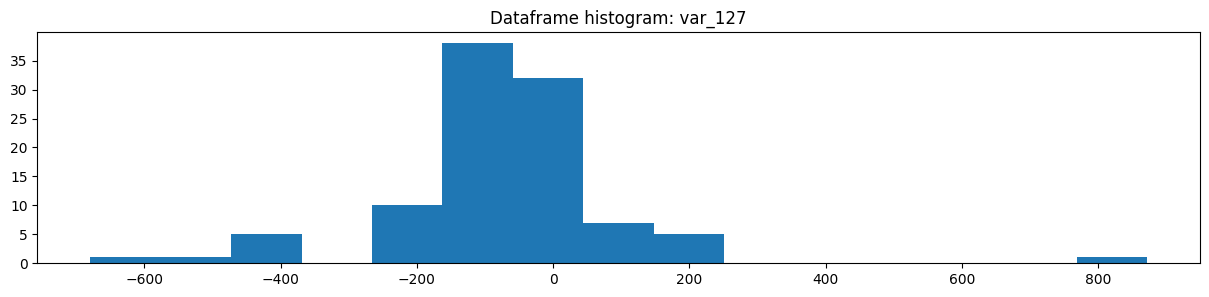

var_127          Df    Target 1    Target 0
0           count  100.000000   12.000000   88.000000
1            mean  -72.523325 -128.918387  -64.833089
2             std  169.803054  190.942891  166.438503
3             min -679.595066 -679.595066 -506.139413
4             25% -108.110771 -157.173305 -103.581907
5             50%  -63.105480  -61.710908  -63.219777
6             75%  -28.686135  -40.605103  -21.908702
7             max  871.872952   84.276371  871.872952
8   unique values  100.000000   12.000000   88.000000
9            NaNs    0.000000    0.000000    0.000000
10     NaNs share    0.000000    0.000000    0.000000

var_127  Count in df (desc)  Mean target  Sum target  Count in df
0 -679.595066                   1          1.0           1            1
1  -40.753558                   1          1.0           1            1
2  -30.045038                   1          0.0           0            1
3  -32.247003                   1          0.0           0            1
4  -32.631269                   1          0.0           0            1
5  -38.086665                   1          0.0           0            1
6  -38.328105                   1          0.0           0            1
7  -39.277657                   1          0.0           0            1
8  -40.159739                   1          1.0           1            1
9  -40.159739                   1          1.0           1            1

var_127  Count in the dataframe  Mean target  Sum target (desc)  \
0 -679.595066                       1          1.0                  1   
1  -40.159739                       1          1.0                  1   
2  -63.260377                       1          1.0                  1   
3  -40.753558                       1          1.0                  1   
4 -196.769463                       1          1.0                  1   
5 -219.613153                       1          1.0                  1   
6   84.276371                       1          1.0                  1   
7  -60.161439                       1          1.0                  1   
8  -56.521016                       1          1.0                  1   
9 -143.974586                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

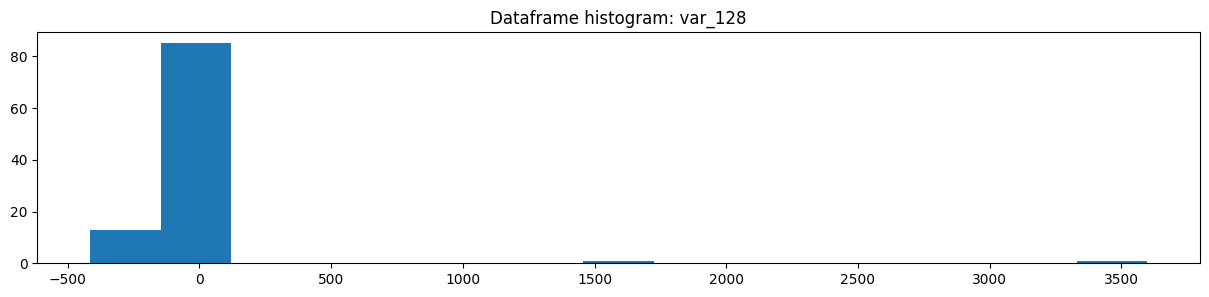

var_128           Df     Target 1     Target 0
0           count   100.000000    12.000000    88.000000
1            mean     4.476702    83.544660    -6.305292
2             std   404.244807   463.283500   397.286397
3             min  -414.675881  -182.940225  -414.675881
4             25%   -67.863989   -44.410389   -67.863989
5             50%   -23.724989   -22.176627   -23.724989
6             75%    -3.618674   -10.469570    -2.560797
7             max  3597.259377  1542.630769  3597.259377
8   unique values   100.000000    12.000000    88.000000
9            NaNs     0.000000     0.000000     0.000000
10     NaNs share     0.000000     0.000000     0.000000

var_128  Count in df (desc)  Mean target  Sum target  Count in df
0 -414.675881                   1          0.0           0            1
1  -12.874815                   1          0.0           0            1
2   -6.730996                   1          0.0           0            1
3   -6.799348                   1          0.0           0            1
4   -7.347265                   1          0.0           0            1
5   -9.029622                   1          0.0           0            1
6   -9.322332                   1          0.0           0            1
7  -10.655740                   1          0.0           0            1
8  -10.655740                   1          0.0           0            1
9  -10.775296                   1          0.0           0            1

var_128  Count in the dataframe  Mean target  Sum target (desc)  \
0   -26.342424                       1          1.0                  1   
1   -12.649093                       1          1.0                  1   
2     3.304793                       1          1.0                  1   
3  -149.392153                       1          1.0                  1   
4  -182.940225                       1          1.0                  1   
5   -24.684350                       1          1.0                  1   
6  1542.630769                       1          1.0                  1   
7    -3.930999                       1          1.0                  1   
8   -19.668904                       1          1.0                  1   
9   -33.249580                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

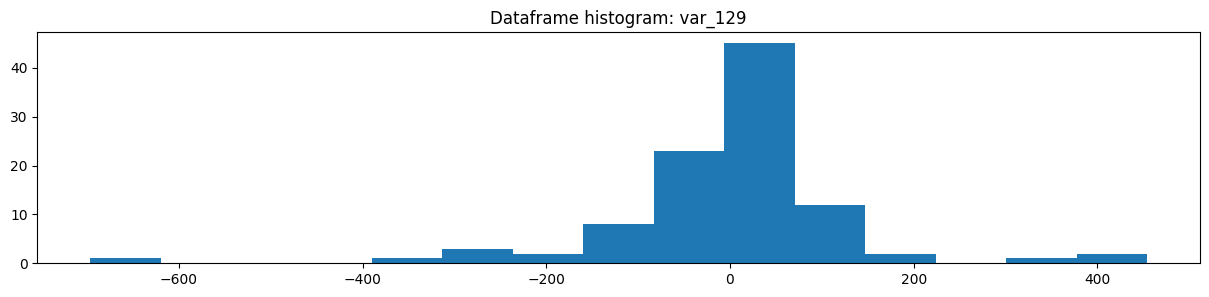

var_129          Df    Target 1    Target 0
0           count  100.000000   12.000000   88.000000
1            mean   -2.612142   29.447919   -6.983968
2             std  133.459123   59.039678  140.236410
3             min -696.742168  -35.452717 -696.742168
4             25%  -36.787896  -11.778050  -48.994308
5             50%    2.907403    5.770873    2.410716
6             75%   41.296252   64.057595   40.339209
7             max  454.112981  169.053577  454.112981
8   unique values  100.000000   12.000000   88.000000
9            NaNs    0.000000    0.000000    0.000000
10     NaNs share    0.000000    0.000000    0.000000

var_129  Count in df (desc)  Mean target  Sum target  Count in df
0 -696.742168                   1          0.0           0            1
1   18.362782                   1          0.0           0            1
2   40.344243                   1          0.0           0            1
3   40.337530                   1          0.0           0            1
4   39.039795                   1          0.0           0            1
5   38.178510                   1          0.0           0            1
6   29.109862                   1          0.0           0            1
7   26.714306                   1          0.0           0            1
8   19.644709                   1          0.0           0            1
9   19.503888                   1          0.0           0            1

var_129  Count in the dataframe  Mean target  Sum target (desc)  \
0    0.348048                       1          1.0                  1   
1   61.525123                       1          1.0                  1   
2  -35.452717                       1          1.0                  1   
3   41.003398                       1          1.0                  1   
4    9.050635                       1          1.0                  1   
5   85.056995                       1          1.0                  1   
6   71.655010                       1          1.0                  1   
7   -8.573649                       1          1.0                  1   
8  169.053577                       1          1.0                  1   
9    2.491111                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

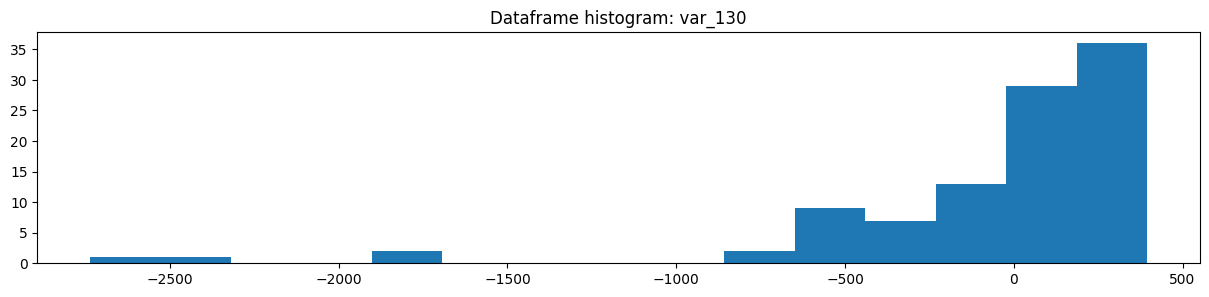

var_130           Df     Target 1     Target 0
0           count   100.000000    12.000000    88.000000
1            mean   -81.555190  -233.717891   -60.805731
2             std   529.493705   765.545702   491.228848
3             min -2736.110181 -2470.914084 -2736.110181
4             25%  -147.375999  -283.716964  -146.011914
5             50%    73.572820    38.982568    73.572820
6             75%   238.644665   177.599153   242.862976
7             max   394.743241   252.905164   394.743241
8   unique values   100.000000    12.000000    88.000000
9            NaNs     0.000000     0.000000     0.000000
10     NaNs share     0.000000     0.000000     0.000000

var_130  Count in df (desc)  Mean target  Sum target  Count in df
0 -2736.110181                   1          0.0           0            1
1   169.256203                   1          0.0           0            1
2   236.513079                   1          0.0           0            1
3   233.518649                   1          0.0           0            1
4   232.665459                   1          0.0           0            1
5   228.047708                   1          0.0           0            1
6   226.256293                   1          0.0           0            1
7   223.502243                   1          0.0           0            1
8   221.519447                   1          1.0           1            1
9   216.695797                   1          1.0           1            1

var_130  Count in the dataframe  Mean target  Sum target (desc)  \
0   149.284060                       1          1.0                  1   
1   164.566938                       1          1.0                  1   
2    83.708900                       1          1.0                  1   
3    -5.743764                       1          1.0                  1   
4  -612.235990                       1          1.0                  1   
5  -612.235990                       1          1.0                  1   
6   252.905164                       1          1.0                  1   
7   -17.954545                       1          1.0                  1   
8 -2470.914084                       1          1.0                  1   
9  -174.210621                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

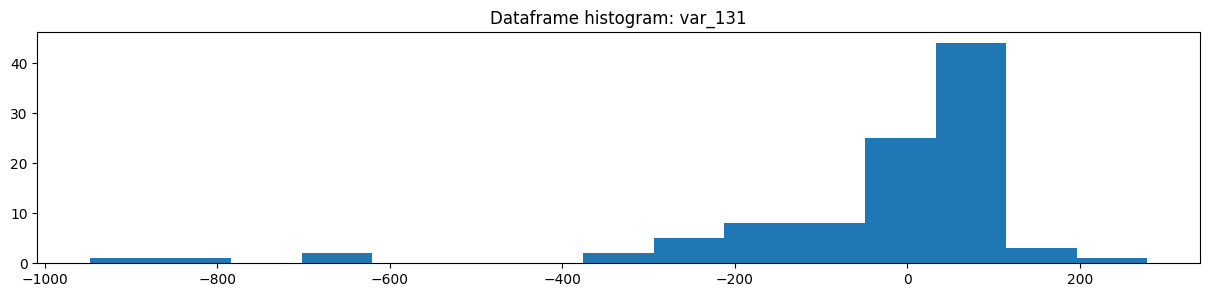

var_131          Df    Target 1    Target 0
0           count  100.000000   12.000000   88.000000
1            mean  -29.344439  -94.017855  -20.525337
2             std  191.139297  264.290447  179.126516
3             min -947.285009 -860.062897 -947.285009
4             25%  -56.979082 -129.578868  -50.448982
5             50%   23.096428    7.299608   29.956843
6             75%   76.285965   41.403986   80.539177
7             max  278.097610   94.100286  278.097610
8   unique values  100.000000   12.000000   88.000000
9            NaNs    0.000000    0.000000    0.000000
10     NaNs share    0.000000    0.000000    0.000000

var_131  Count in df (desc)  Mean target  Sum target  Count in df
0 -947.285009                   1          0.0           0            1
1   62.456151                   1          0.0           0            1
2   75.274637                   1          0.0           0            1
3   73.337652                   1          0.0           0            1
4   73.017298                   1          0.0           0            1
5   72.702861                   1          0.0           0            1
6   72.464411                   1          0.0           0            1
7   72.464411                   1          0.0           0            1
8   72.406759                   1          0.0           0            1
9   70.267888                   1          0.0           0            1

var_131  Count in the dataframe  Mean target  Sum target (desc)  \
0 -231.113936                       1          1.0                  1   
1   38.551858                       1          1.0                  1   
2  -95.733845                       1          1.0                  1   
3    6.315392                       1          1.0                  1   
4   30.865862                       1          1.0                  1   
5 -231.113936                       1          1.0                  1   
6 -860.062897                       1          1.0                  1   
7   94.100286                       1          1.0                  1   
8   49.960372                       1          1.0                  1   
9   -7.290183                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

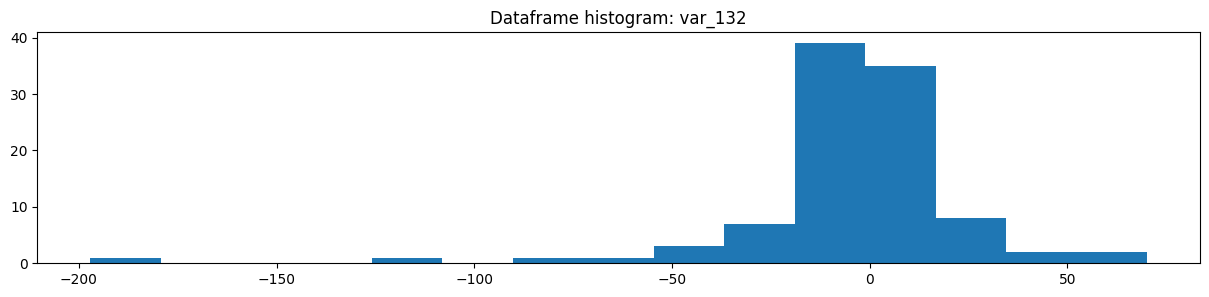

var_132          Df   Target 1    Target 0
0           count  100.000000  12.000000   88.000000
1            mean   -4.773176  -8.468676   -4.269244
2             std   31.069635  25.165122   31.878821
3             min -197.116525 -65.416050 -197.116525
4             25%  -10.009168  -5.960935  -10.490158
5             50%   -1.637822  -1.829842   -1.637822
6             75%    8.217374   2.776614    8.601746
7             max   70.121213  17.624761   70.121213
8   unique values  100.000000  12.000000   88.000000
9            NaNs    0.000000   0.000000    0.000000
10     NaNs share    0.000000   0.000000    0.000000

var_132  Count in df (desc)  Mean target  Sum target  Count in df
0 -197.116525                   1          0.0           0            1
1    1.635591                   1          0.0           0            1
2    7.155892                   1          0.0           0            1
3    6.521643                   1          0.0           0            1
4    6.286085                   1          0.0           0            1
5    6.011625                   1          0.0           0            1
6    5.629609                   1          0.0           0            1
7    4.089839                   1          0.0           0            1
8    3.993557                   1          0.0           0            1
9    3.029072                   1          0.0           0            1

var_132  Count in the dataframe  Mean target  Sum target (desc)  \
0  15.403279                       1          1.0                  1   
1  -5.799943                       1          1.0                  1   
2 -53.717852                       1          1.0                  1   
3  -1.321247                       1          1.0                  1   
4  -2.109680                       1          1.0                  1   
5  17.624761                       1          1.0                  1   
6  -3.846690                       1          1.0                  1   
7   2.776614                       1          1.0                  1   
8   2.776614                       1          1.0                  1   
9 -65.416050                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

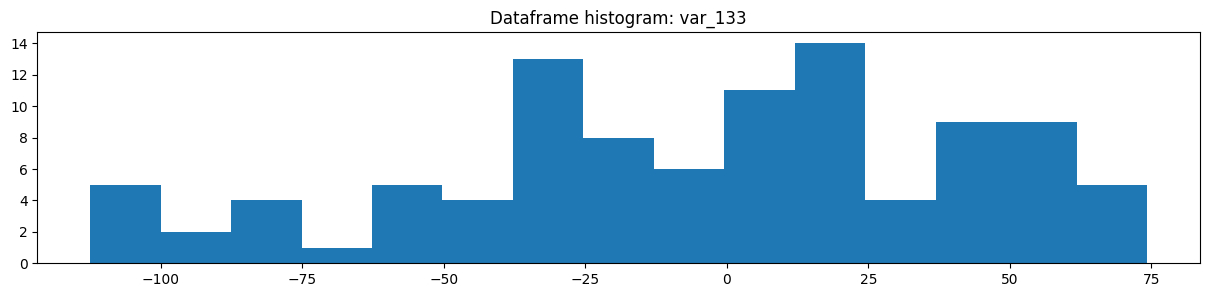

var_133          Df   Target 1    Target 0
0           count  100.000000  12.000000   88.000000
1            mean   -5.072054   8.053028   -6.861838
2             std   47.797419  48.346394   47.719790
3             min -112.489195 -62.528194 -112.489195
4             25%  -36.085138 -28.780697  -36.085138
5             50%    3.072394  11.204226    2.815047
6             75%   32.380940  51.163053   26.333852
7             max   74.232867  74.232867   67.607897
8   unique values  100.000000  12.000000   88.000000
9            NaNs    0.000000   0.000000    0.000000
10     NaNs share    0.000000   0.000000    0.000000

var_133  Count in df (desc)  Mean target  Sum target  Count in df
0 -112.489195                   1          0.0           0            1
1   15.373427                   1          0.0           0            1
2   24.578070                   1          0.0           0            1
3   23.967640                   1          0.0           0            1
4   23.551479                   1          0.0           0            1
5   20.302369                   1          0.0           0            1
6   20.117407                   1          0.0           0            1
7   20.030759                   1          0.0           0            1
8   19.861594                   1          0.0           0            1
9   19.758535                   1          1.0           1            1

var_133  Count in the dataframe  Mean target  Sum target (desc)  \
0  74.232867                       1          1.0                  1   
1  19.758535                       1          1.0                  1   
2  -3.913441                       1          1.0                  1   
3  57.164116                       1          1.0                  1   
4  49.162699                       1          1.0                  1   
5  67.448857                       1          1.0                  1   
6 -62.528194                       1          1.0                  1   
7  19.758535                       1          1.0                  1   
8 -21.941468                       1          1.0                  1   
9 -55.857707                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

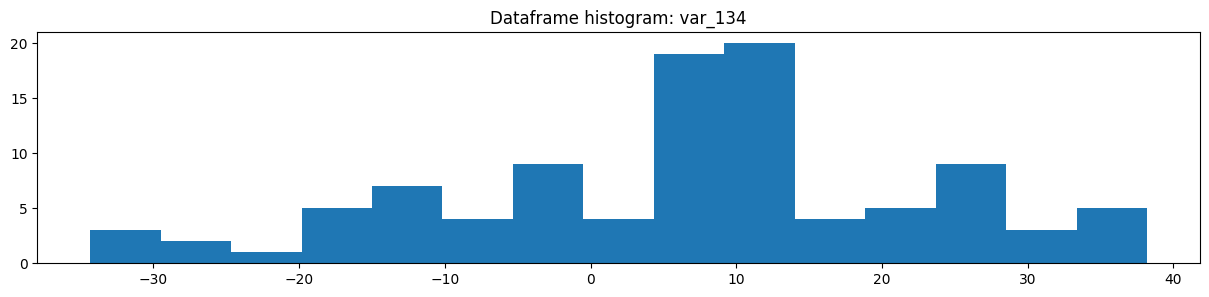

var_134          Df   Target 1   Target 0
0           count  100.000000  12.000000  88.000000
1            mean    6.167611   7.149076   6.033775
2             std   16.028369  16.024282  16.116053
3             min  -34.337864 -26.217295 -34.337864
4             25%   -3.503658   3.936556  -3.781042
5             50%    8.033159  10.534064   7.540229
6             75%   15.188119  15.953905  15.188119
7             max   38.194431  25.154602  38.194431
8   unique values  100.000000  12.000000  88.000000
9            NaNs    0.000000   0.000000   0.000000
10     NaNs share    0.000000   0.000000   0.000000

var_134  Count in df (desc)  Mean target  Sum target  Count in df
0 -34.337864                   1          0.0           0            1
1  10.865817                   1          0.0           0            1
2  13.631503                   1          0.0           0            1
3  13.631503                   1          0.0           0            1
4  13.369403                   1          1.0           1            1
5  11.589817                   1          0.0           0            1
6  11.316742                   1          0.0           0            1
7  11.302081                   1          1.0           1            1
8  11.258220                   1          0.0           0            1
9  11.258220                   1          0.0           0            1

var_134  Count in the dataframe  Mean target  Sum target (desc)  \
0  10.067348                       1          1.0                  1   
1  23.707411                       1          1.0                  1   
2  -3.395882                       1          1.0                  1   
3  13.369403                       1          1.0                  1   
4 -26.217295                       1          1.0                  1   
5   6.554387                       1          1.0                  1   
6  11.302081                       1          1.0                  1   
7  25.154602                       1          1.0                  1   
8 -17.289224                       1          1.0                  1   
9   6.380702                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

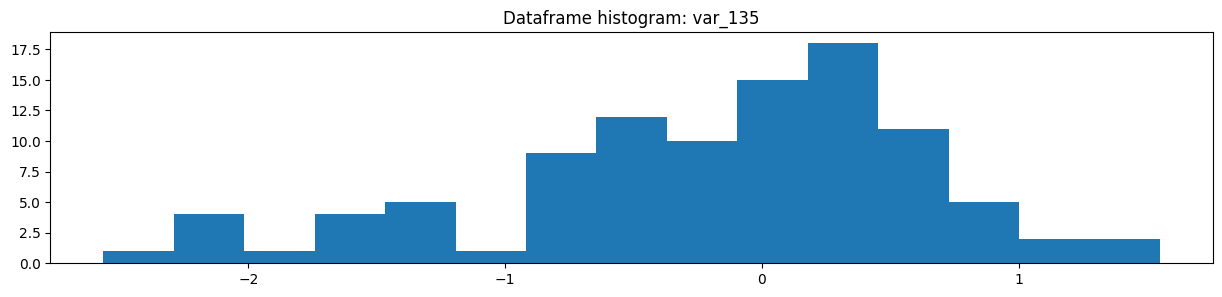

var_135          Df   Target 1   Target 0
0           count  100.000000  12.000000  88.000000
1            mean   -0.199620  -0.123447  -0.210007
2             std    0.832301   0.857535   0.833299
3             min   -2.564865  -2.078179  -2.564865
4             25%   -0.603633  -0.457838  -0.673360
5             50%   -0.041642   0.005715  -0.060004
6             75%    0.373422   0.302278   0.377465
7             max    1.551659   1.268883   1.551659
8   unique values  100.000000  12.000000  88.000000
9            NaNs    0.000000   0.000000   0.000000
10     NaNs share    0.000000   0.000000   0.000000

var_135  Count in df (desc)  Mean target  Sum target  Count in df
0 -2.564865                   1          0.0           0            1
1  0.218440                   1          0.0           0            1
2  0.354127                   1          1.0           1            1
3  0.353892                   1          0.0           0            1
4  0.353892                   1          0.0           0            1
5  0.321502                   1          0.0           0            1
6  0.318526                   1          0.0           0            1
7  0.286966                   1          0.0           0            1
8  0.284995                   1          1.0           1            1
9  0.272083                   1          0.0           0            1

var_135  Count in the dataframe  Mean target  Sum target (desc)  \
0 -0.457838                       1          1.0                  1   
1 -0.457838                       1          1.0                  1   
2 -2.078179                       1          1.0                  1   
3 -0.207806                       1          1.0                  1   
4 -1.056405                       1          1.0                  1   
5  0.064636                       1          1.0                  1   
6  0.284995                       1          1.0                  1   
7  0.125721                       1          1.0                  1   
8  0.731546                       1          1.0                  1   
9 -0.053206                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

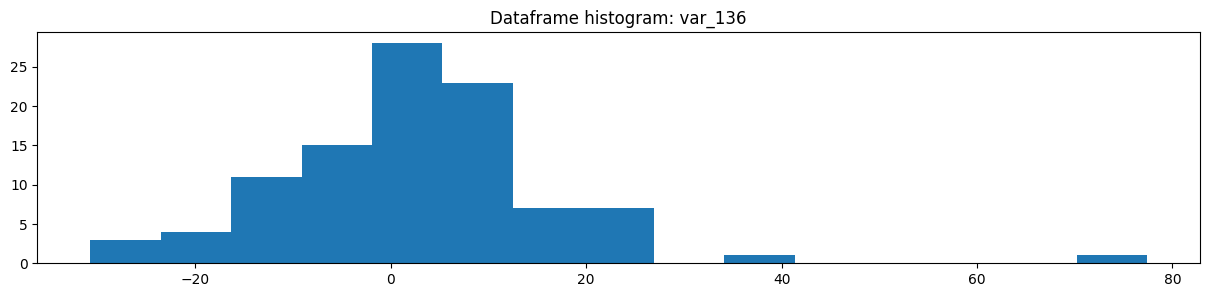

var_136          Df   Target 1   Target 0
0           count  100.000000  12.000000  88.000000
1            mean    2.537207  -2.144242   3.175586
2             std   14.113804  15.152877  13.935890
3             min  -30.775806 -30.775806 -29.974325
4             25%   -3.110112  -4.162053  -3.110112
5             50%    1.483944  -0.229108   2.387588
6             75%    9.268089   5.596607   9.638977
7             max   77.403601  21.982451  77.403601
8   unique values  100.000000  12.000000  88.000000
9            NaNs    0.000000   0.000000   0.000000
10     NaNs share    0.000000   0.000000   0.000000

var_136  Count in df (desc)  Mean target  Sum target  Count in df
0 -30.775806                   1          1.0           1            1
1   6.457910                   1          0.0           0            1
2   8.866314                   1          0.0           0            1
3   8.866314                   1          0.0           0            1
4   8.583815                   1          0.0           0            1
5   8.583815                   1          0.0           0            1
6   8.445631                   1          0.0           0            1
7   8.394736                   1          0.0           0            1
8   7.562652                   1          0.0           0            1
9   7.562652                   1          0.0           0            1

var_136  Count in the dataframe  Mean target  Sum target (desc)  \
0 -30.775806                       1          1.0                  1   
1  -0.943477                       1          1.0                  1   
2 -10.023847                       1          1.0                  1   
3  13.664823                       1          1.0                  1   
4  21.982451                       1          1.0                  1   
5 -28.104342                       1          1.0                  1   
6   0.485260                       1          1.0                  1   
7   5.596607                       1          1.0                  1   
8   5.596607                       1          1.0                  1   
9   0.965070                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

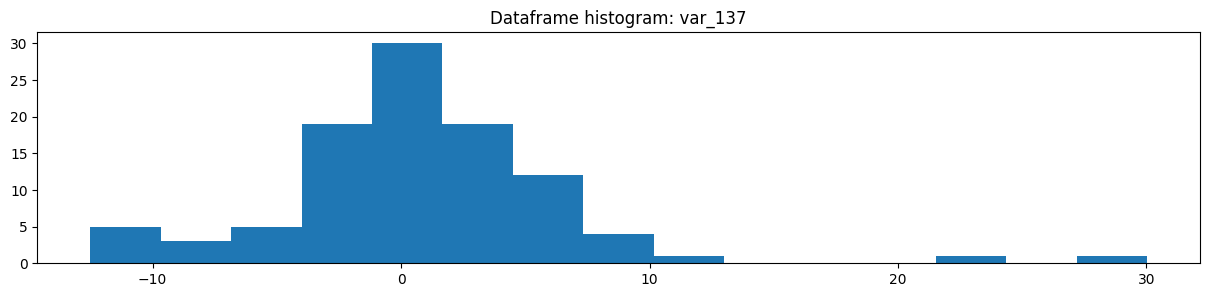

var_137          Df   Target 1   Target 0
0           count  100.000000  12.000000  88.000000
1            mean    0.747691  -1.368663   1.036285
2             std    5.943201   6.587198   5.831407
3             min  -12.512588 -12.243453 -12.512588
4             25%   -2.221310  -4.587089  -2.162201
5             50%    0.408261  -0.993636   0.630688
6             75%    2.837453   2.036812   2.981935
7             max   30.024132  10.521456  30.024132
8   unique values  100.000000  12.000000  88.000000
9            NaNs    0.000000   0.000000   0.000000
10     NaNs share    0.000000   0.000000   0.000000

var_137  Count in df (desc)  Mean target  Sum target  Count in df
0 -12.512588                   1          0.0           0            1
1   2.019579                   1          0.0           0            1
2   2.803507                   1          1.0           1            1
3   2.767514                   1          0.0           0            1
4   2.767514                   1          0.0           0            1
5   2.749045                   1          0.0           0            1
6   2.688846                   1          0.0           0            1
7   2.585392                   1          0.0           0            1
8   2.581151                   1          0.0           0            1
9   2.078249                   1          0.0           0            1

var_137  Count in the dataframe  Mean target  Sum target (desc)  \
0  -4.067460                       1          1.0                  1   
1  -0.993636                       1          1.0                  1   
2 -11.105526                       1          1.0                  1   
3   6.344325                       1          1.0                  1   
4   1.001604                       1          1.0                  1   
5  -5.034392                       1          1.0                  1   
6  -4.437988                       1          1.0                  1   
7 -12.243453                       1          1.0                  1   
8   1.781247                       1          1.0                  1   
9  -0.993636                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

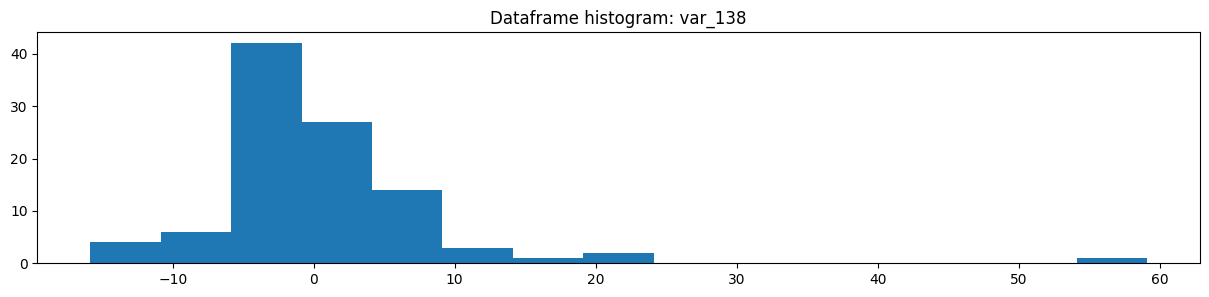

var_138          Df   Target 1   Target 0
0           count  100.000000  12.000000  88.000000
1            mean    0.496524   1.624435   0.342718
2             std    8.576737   9.544771   8.484607
3             min  -15.850920  -8.252252 -15.850920
4             25%   -3.370459  -4.307328  -3.291820
5             50%   -1.469137  -2.596182  -0.948373
6             75%    3.259327   4.691919   3.202895
7             max   59.105779  23.335828  59.105779
8   unique values  100.000000  12.000000  88.000000
9            NaNs    0.000000   0.000000   0.000000
10     NaNs share    0.000000   0.000000   0.000000

var_138  Count in df (desc)  Mean target  Sum target  Count in df
0 -15.850920                   1          0.0           0            1
1   0.509227                   1          0.0           0            1
2   3.184084                   1          0.0           0            1
3   2.684870                   1          0.0           0            1
4   2.684870                   1          0.0           0            1
5   2.631515                   1          0.0           0            1
6   1.679289                   1          0.0           0            1
7   1.466060                   1          0.0           0            1
8   1.135230                   1          0.0           0            1
9   0.881710                   1          0.0           0            1

var_138  Count in the dataframe  Mean target  Sum target (desc)  \
0   3.617016                       1          1.0                  1   
1  -2.596182                       1          1.0                  1   
2  16.173481                       1          1.0                  1   
3   7.916629                       1          1.0                  1   
4  -8.252252                       1          1.0                  1   
5  -2.107657                       1          1.0                  1   
6  -4.537205                       1          1.0                  1   
7  -2.596182                       1          1.0                  1   
8  23.335828                       1          1.0                  1   
9  -4.349247                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

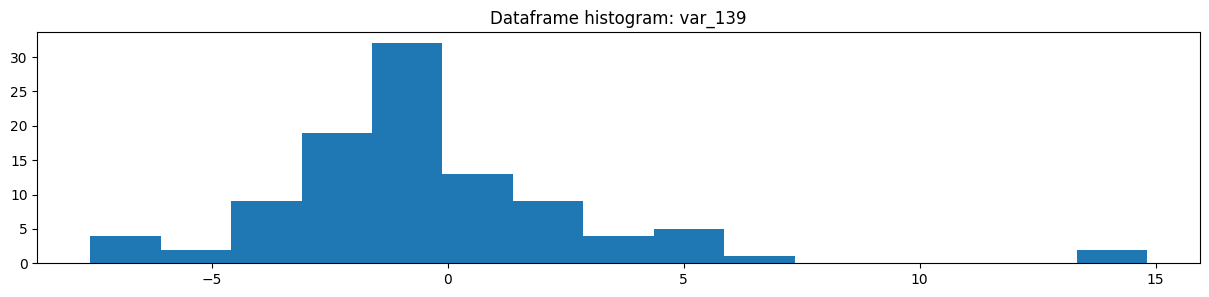

var_139          Df   Target 1   Target 0
0           count  100.000000  12.000000  88.000000
1            mean   -0.443171  -0.798518  -0.394715
2             std    3.409269   2.860816   3.488799
3             min   -7.569825  -5.822367  -7.569825
4             25%   -2.147882  -1.750388  -2.147882
5             50%   -0.835043  -0.831862  -0.835043
6             75%    0.897253  -0.268359   0.942544
7             max   14.816420   6.265294  14.816420
8   unique values  100.000000  12.000000  88.000000
9            NaNs    0.000000   0.000000   0.000000
10     NaNs share    0.000000   0.000000   0.000000

var_139  Count in df (desc)  Mean target  Sum target  Count in df
0 -7.569825                   1          0.0           0            1
1 -0.391324                   1          0.0           0            1
2  0.755060                   1          0.0           0            1
3  0.663232                   1          1.0           1            1
4  0.527525                   1          0.0           0            1
5  0.273274                   1          0.0           0            1
6  0.192036                   1          0.0           0            1
7  0.187210                   1          0.0           0            1
8  0.115855                   1          0.0           0            1
9  0.004004                   1          0.0           0            1

var_139  Count in the dataframe  Mean target  Sum target (desc)  \
0 -1.404908                       1          1.0                  1   
1 -3.355338                       1          1.0                  1   
2  6.265294                       1          1.0                  1   
3 -5.822367                       1          1.0                  1   
4  0.892977                       1          1.0                  1   
5 -0.698954                       1          1.0                  1   
6 -0.698954                       1          1.0                  1   
7 -0.578889                       1          1.0                  1   
8 -1.561005                       1          1.0                  1   
9 -0.964771                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

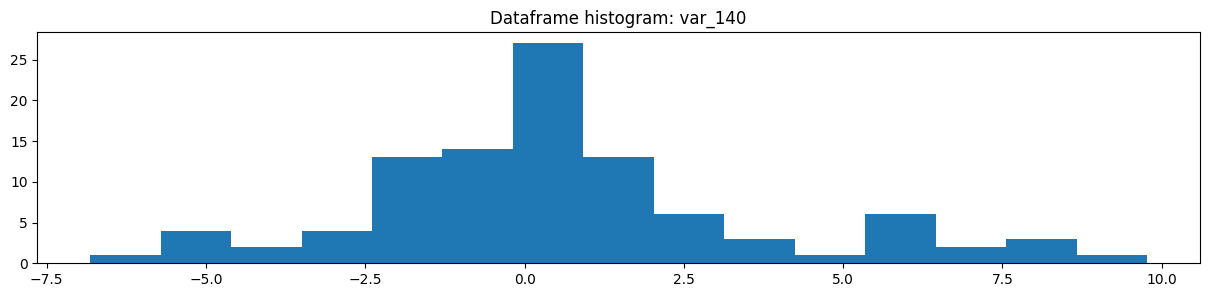

var_140          Df   Target 1   Target 0
0           count  100.000000  12.000000  88.000000
1            mean    0.592712  -1.840518   0.924516
2             std    3.051276   2.846900   2.939680
3             min   -6.816786  -6.816786  -4.954877
4             25%   -1.193454  -3.530760  -0.922857
5             50%    0.212494  -1.432092   0.343275
6             75%    1.712838  -0.055837   1.840281
7             max    9.768084   3.248461   9.768084
8   unique values  100.000000  12.000000  88.000000
9            NaNs    0.000000   0.000000   0.000000
10     NaNs share    0.000000   0.000000   0.000000

var_140  Count in df (desc)  Mean target  Sum target  Count in df
0 -6.816786                   1          1.0           1            1
1  0.839943                   1          0.0           0            1
2  1.699218                   1          0.0           0            1
3  1.661550                   1          0.0           0            1
4  1.565925                   1          0.0           0            1
5  1.470463                   1          0.0           0            1
6  1.455616                   1          0.0           0            1
7  1.424005                   1          0.0           0            1
8  1.267032                   1          0.0           0            1
9  1.129957                   1          0.0           0            1

var_140  Count in the dataframe  Mean target  Sum target (desc)  \
0 -6.816786                       1          1.0                  1   
1 -5.538016                       1          1.0                  1   
2 -4.520516                       1          1.0                  1   
3  0.067973                       1          1.0                  1   
4 -3.200841                       1          1.0                  1   
5  0.385339                       1          1.0                  1   
6 -2.653427                       1          1.0                  1   
7 -0.097107                       1          1.0                  1   
8 -0.097107                       1          1.0                  1   
9 -1.189443                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

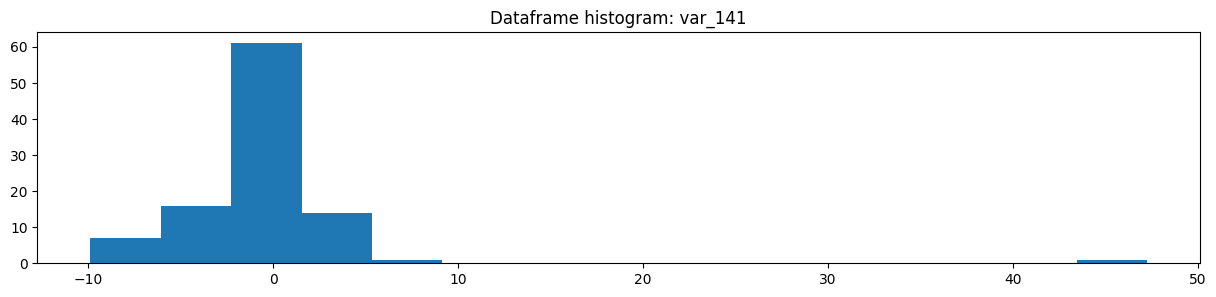

var_141          Df   Target 1   Target 0
0           count  100.000000  12.000000  88.000000
1            mean   -0.453380  -0.377554  -0.463720
2             std    5.567694   1.511273   5.914837
3             min   -9.884200  -2.460022  -9.884200
4             25%   -1.859200  -1.367945  -2.270800
5             50%   -0.448076  -0.767880  -0.424506
6             75%    0.640332   0.131142   0.640332
7             max   47.234279   2.370935  47.234279
8   unique values  100.000000  12.000000  88.000000
9            NaNs    0.000000   0.000000   0.000000
10     NaNs share    0.000000   0.000000   0.000000

var_141  Count in df (desc)  Mean target  Sum target  Count in df
0 -9.884200                   1          0.0           0            1
1 -0.168055                   1          0.0           0            1
2  0.584338                   1          0.0           0            1
3  0.584338                   1          0.0           0            1
4  0.484427                   1          0.0           0            1
5  0.441558                   1          0.0           0            1
6  0.335289                   1          0.0           0            1
7  0.254134                   1          0.0           0            1
8  0.124366                   1          0.0           0            1
9 -0.166608                   1          0.0           0            1

var_141  Count in the dataframe  Mean target  Sum target (desc)  \
0 -0.608141                       1          1.0                  1   
1 -1.170188                       1          1.0                  1   
2 -0.295460                       1          1.0                  1   
3 -0.567163                       1          1.0                  1   
4  1.410946                       1          1.0                  1   
5  2.370935                       1          1.0                  1   
6 -2.460022                       1          1.0                  1   
7 -0.927620                       1          1.0                  1   
8 -1.367945                       1          1.0                  1   
9 -1.367945                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

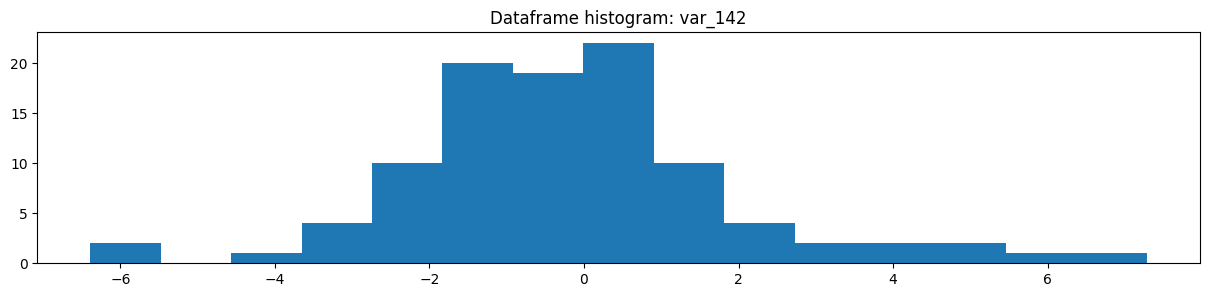

var_142          Df   Target 1   Target 0
0           count  100.000000  12.000000  88.000000
1            mean   -0.174787  -0.291987  -0.158805
2             std    2.119984   2.733226   2.041455
3             min   -6.390179  -2.637744  -6.390179
4             25%   -1.371743  -1.936793  -1.286316
5             50%   -0.381315  -0.776292  -0.330131
6             75%    0.790146   0.170124   0.811897
7             max    7.286030   7.286030   5.487055
8   unique values  100.000000  12.000000  88.000000
9            NaNs    0.000000   0.000000   0.000000
10     NaNs share    0.000000   0.000000   0.000000

var_142  Count in df (desc)  Mean target  Sum target  Count in df
0 -6.390179                   1          0.0           0            1
1  0.444358                   1          0.0           0            1
2  0.783741                   1          0.0           0            1
3  0.761999                   1          0.0           0            1
4  0.754187                   1          0.0           0            1
5  0.628917                   1          0.0           0            1
6  0.515600                   1          0.0           0            1
7  0.515600                   1          0.0           0            1
8  0.468496                   1          0.0           0            1
9  0.468496                   1          0.0           0            1

var_142  Count in the dataframe  Mean target  Sum target (desc)  \
0  7.286030                       1          1.0                  1   
1  0.466220                       1          1.0                  1   
2 -1.771328                       1          1.0                  1   
3  1.805734                       1          1.0                  1   
4 -2.433188                       1          1.0                  1   
5 -2.474527                       1          1.0                  1   
6 -2.637744                       1          1.0                  1   
7 -0.568064                       1          1.0                  1   
8 -0.568064                       1          1.0                  1   
9  0.071426                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

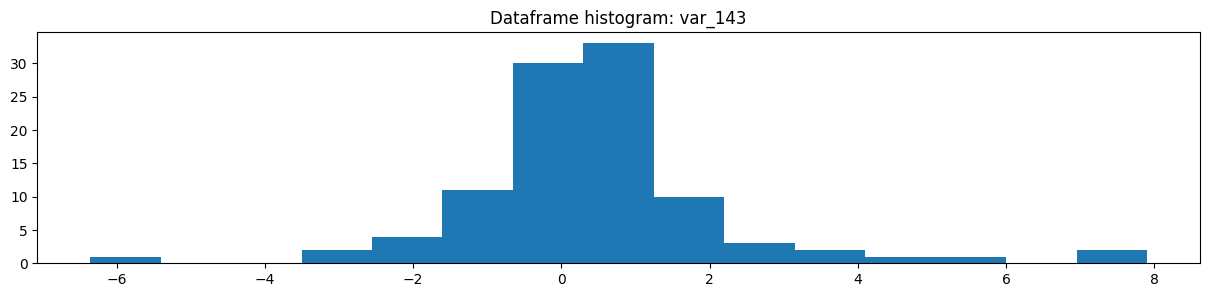

var_143          Df   Target 1   Target 0
0           count  100.000000  12.000000  88.000000
1            mean    0.390727  -0.480896   0.509585
2             std    1.803118   1.378022   1.827704
3             min   -6.358286  -3.243361  -6.358286
4             25%   -0.333295  -1.118236  -0.237743
5             50%    0.321697  -0.504755   0.368572
6             75%    0.816992   0.485462   0.848636
7             max    7.900562   1.774412   7.900562
8   unique values  100.000000  12.000000  88.000000
9            NaNs    0.000000   0.000000   0.000000
10     NaNs share    0.000000   0.000000   0.000000

var_143  Count in df (desc)  Mean target  Sum target  Count in df
0 -6.358286                   1          0.0           0            1
1  0.506691                   1          0.0           0            1
2  0.718873                   1          0.0           0            1
3  0.710833                   1          1.0           1            1
4  0.710833                   1          1.0           1            1
5  0.706976                   1          0.0           0            1
6  0.538685                   1          0.0           0            1
7  0.520375                   1          0.0           0            1
8  0.520375                   1          0.0           0            1
9  0.509036                   1          0.0           0            1

var_143  Count in the dataframe  Mean target  Sum target (desc)  \
0 -0.391381                       1          1.0                  1   
1  0.258006                       1          1.0                  1   
2  0.410338                       1          1.0                  1   
3 -1.214443                       1          1.0                  1   
4 -3.243361                       1          1.0                  1   
5 -0.903747                       1          1.0                  1   
6  1.774412                       1          1.0                  1   
7 -1.086167                       1          1.0                  1   
8 -2.177941                       1          1.0                  1   
9 -0.618130                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

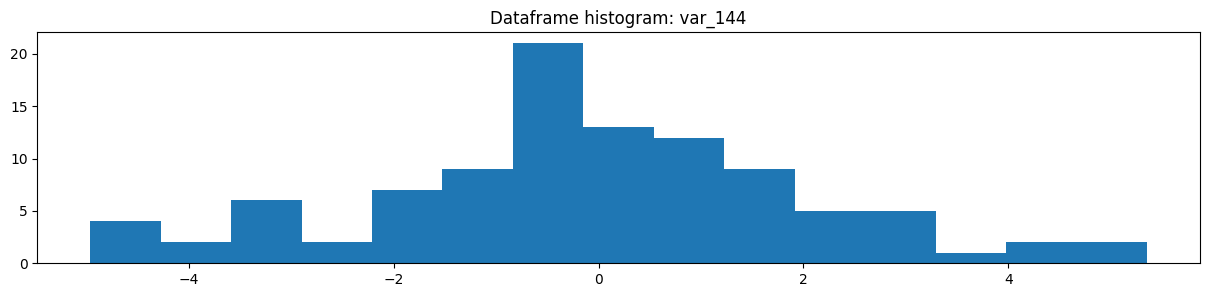

var_144          Df   Target 1   Target 0
0           count  100.000000  12.000000  88.000000
1            mean   -0.070046  -0.106455  -0.065081
2             std    2.112484   1.895612   2.150251
3             min   -4.962381  -3.480699  -4.962381
4             25%   -0.939080  -1.153768  -0.938826
5             50%   -0.173177   0.567998  -0.252094
6             75%    1.024825   1.268249   0.985583
7             max    5.353058   1.965523   5.353058
8   unique values  100.000000  12.000000  88.000000
9            NaNs    0.000000   0.000000   0.000000
10     NaNs share    0.000000   0.000000   0.000000

var_144  Count in df (desc)  Mean target  Sum target  Count in df
0 -4.962381                   1          0.0           0            1
1  0.532643                   1          0.0           0            1
2  0.976410                   1          0.0           0            1
3  0.966323                   1          0.0           0            1
4  0.966323                   1          0.0           0            1
5  0.936916                   1          0.0           0            1
6  0.844620                   1          0.0           0            1
7  0.828570                   1          1.0           1            1
8  0.728710                   1          0.0           0            1
9  0.713383                   1          0.0           0            1

var_144  Count in the dataframe  Mean target  Sum target (desc)  \
0 -0.167127                       1          1.0                  1   
1  0.696533                       1          1.0                  1   
2 -0.939840                       1          1.0                  1   
3 -1.795554                       1          1.0                  1   
4  1.274670                       1          1.0                  1   
5  1.965523                       1          1.0                  1   
6  1.965523                       1          1.0                  1   
7 -3.330631                       1          1.0                  1   
8 -3.480699                       1          1.0                  1   
9  0.439464                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

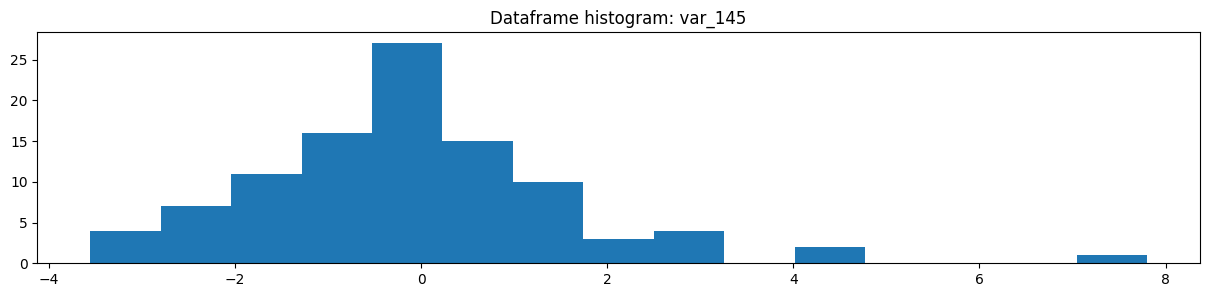

var_145          Df   Target 1   Target 0
0           count  100.000000  12.000000  88.000000
1            mean   -0.098904   0.024584  -0.115743
2             std    1.722379   1.539842   1.753166
3             min   -3.556512  -2.560861  -3.556512
4             25%   -1.063622  -0.741021  -1.063622
5             50%   -0.184680  -0.000167  -0.199325
6             75%    0.551743   0.437548   0.551743
7             max    7.800713   2.699075   7.800713
8   unique values  100.000000  12.000000  88.000000
9            NaNs    0.000000   0.000000   0.000000
10     NaNs share    0.000000   0.000000   0.000000

var_145  Count in df (desc)  Mean target  Sum target  Count in df
0 -3.556512                   1          0.0           0            1
1  0.216664                   1          1.0           1            1
2  0.490707                   1          0.0           0            1
3  0.422807                   1          0.0           0            1
4  0.422807                   1          0.0           0            1
5  0.397915                   1          0.0           0            1
6  0.391288                   1          0.0           0            1
7  0.359610                   1          0.0           0            1
8  0.359610                   1          0.0           0            1
9  0.249130                   1          0.0           0            1

var_145  Count in the dataframe  Mean target  Sum target (desc)  \
0 -1.380146                       1          1.0                  1   
1  1.100202                       1          1.0                  1   
2  2.699075                       1          1.0                  1   
3  2.505304                       1          1.0                  1   
4 -2.560861                       1          1.0                  1   
5 -0.513914                       1          1.0                  1   
6  0.208771                       1          1.0                  1   
7  0.216664                       1          1.0                  1   
8 -0.527979                       1          1.0                  1   
9 -1.459669                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

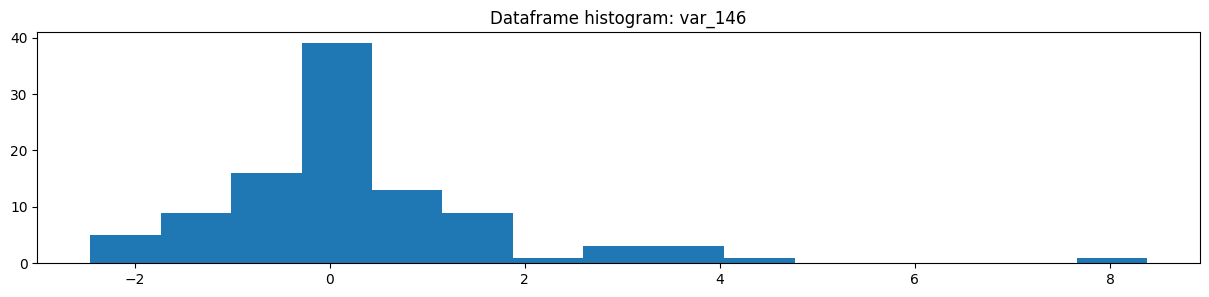

var_146          Df   Target 1   Target 0
0           count  100.000000  12.000000  88.000000
1            mean    0.318558   0.561610   0.285415
2             std    1.540695   1.232236   1.581111
3             min   -2.455711  -0.889729  -2.455711
4             25%   -0.532187  -0.156827  -0.593623
5             50%    0.171069   0.239349   0.153417
6             75%    0.871991   1.040900   0.829412
7             max    8.379805   3.870577   8.379805
8   unique values  100.000000  12.000000  88.000000
9            NaNs    0.000000   0.000000   0.000000
10     NaNs share    0.000000   0.000000   0.000000

var_146  Count in df (desc)  Mean target  Sum target  Count in df
0 -2.455711                   1          0.0           0            1
1  0.284084                   1          0.0           0            1
2  0.828680                   1          0.0           0            1
3  0.826996                   1          0.0           0            1
4  0.759526                   1          0.0           0            1
5  0.602153                   1          0.0           0            1
6  0.434291                   1          0.0           0            1
7  0.395627                   1          0.0           0            1
8  0.395627                   1          0.0           0            1
9  0.387723                   1          0.0           0            1

var_146  Count in the dataframe  Mean target  Sum target (desc)  \
0  1.010611                       1          1.0                  1   
1 -0.156827                       1          1.0                  1   
2  1.464793                       1          1.0                  1   
3  0.234123                       1          1.0                  1   
4  0.244575                       1          1.0                  1   
5  0.253987                       1          1.0                  1   
6 -0.099844                       1          1.0                  1   
7 -0.156827                       1          1.0                  1   
8  3.870577                       1          1.0                  1   
9 -0.889729                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

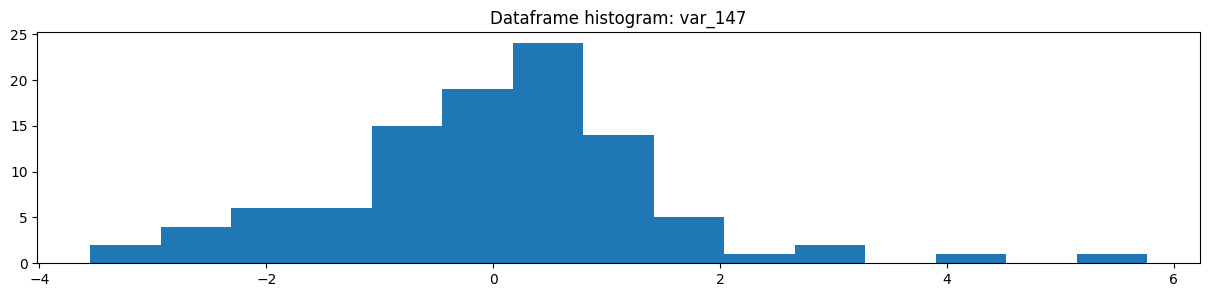

var_147          Df   Target 1   Target 0
0           count  100.000000  12.000000  88.000000
1            mean    0.035393   0.335751  -0.005565
2             std    1.415760   1.173439   1.446584
3             min   -3.552189  -1.562679  -3.552189
4             25%   -0.672491  -0.491672  -0.723997
5             50%    0.159557   0.303851   0.137262
6             75%    0.749644   1.182492   0.695976
7             max    5.764217   2.831478   5.764217
8   unique values  100.000000  12.000000  88.000000
9            NaNs    0.000000   0.000000   0.000000
10     NaNs share    0.000000   0.000000   0.000000

var_147  Count in df (desc)  Mean target  Sum target  Count in df
0 -3.552189                   1          0.0           0            1
1  0.421479                   1          0.0           0            1
2  0.680790                   1          0.0           0            1
3  0.649386                   1          0.0           0            1
4  0.647035                   1          0.0           0            1
5  0.599739                   1          1.0           1            1
6  0.581682                   1          0.0           0            1
7  0.564031                   1          0.0           0            1
8  0.543032                   1          0.0           0            1
9  0.541529                   1          0.0           0            1

var_147  Count in the dataframe  Mean target  Sum target (desc)  \
0  2.831478                       1          1.0                  1   
1 -0.460751                       1          1.0                  1   
2  1.182492                       1          1.0                  1   
3  1.182492                       1          1.0                  1   
4  0.262775                       1          1.0                  1   
5 -1.562679                       1          1.0                  1   
6 -0.350673                       1          1.0                  1   
7  1.253231                       1          1.0                  1   
8  0.344928                       1          1.0                  1   
9  0.599739                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

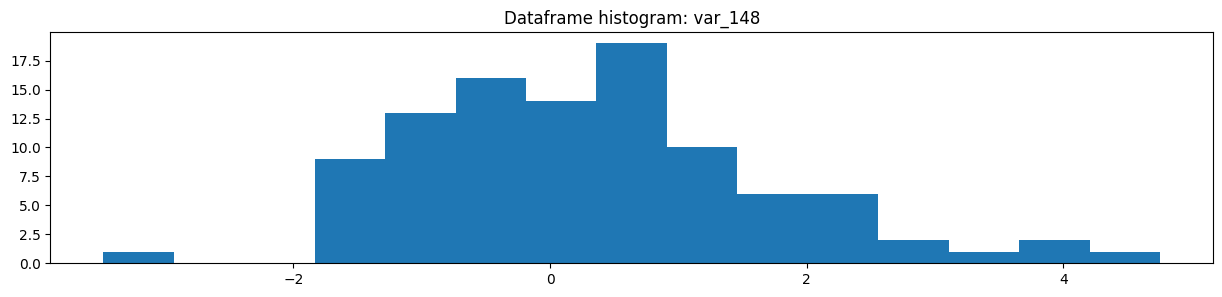

var_148          Df   Target 1   Target 0
0           count  100.000000  12.000000  88.000000
1            mean    0.315688   0.072977   0.348785
2             std    1.388695   0.925933   1.441123
3             min   -3.481513  -1.234765  -3.481513
4             25%   -0.651997  -0.732886  -0.651997
5             50%    0.207484   0.338348   0.207484
6             75%    1.141516   0.646736   1.231264
7             max    4.753627   1.577493   4.753627
8   unique values  100.000000  12.000000  88.000000
9            NaNs    0.000000   0.000000   0.000000
10     NaNs share    0.000000   0.000000   0.000000

var_148  Count in df (desc)  Mean target  Sum target  Count in df
0 -3.481513                   1          0.0           0            1
1  0.626605                   1          0.0           0            1
2  1.113603                   1          0.0           0            1
3  1.019470                   1          1.0           1            1
4  0.825265                   1          0.0           0            1
5  0.712512                   1          0.0           0            1
6  0.710607                   1          0.0           0            1
7  0.710607                   1          0.0           0            1
8  0.665666                   1          1.0           1            1
9  0.640425                   1          1.0           1            1

var_148  Count in the dataframe  Mean target  Sum target (desc)  \
0 -1.115869                       1          1.0                  1   
1  0.665666                       1          1.0                  1   
2 -0.216056                       1          1.0                  1   
3  0.579225                       1          1.0                  1   
4 -1.115869                       1          1.0                  1   
5  0.583753                       1          1.0                  1   
6 -1.234765                       1          1.0                  1   
7  0.640425                       1          1.0                  1   
8  0.097472                       1          1.0                  1   
9 -0.605225                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

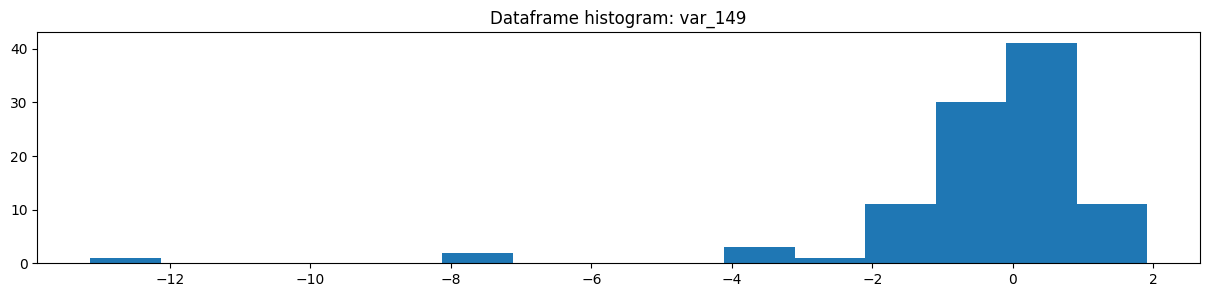

var_149          Df   Target 1   Target 0
0           count  100.000000  12.000000  88.000000
1            mean   -0.459469  -0.133116  -0.503972
2             std    1.920210   0.904517   2.018824
3             min  -13.134550  -2.006743 -13.134550
4             25%   -0.724266  -0.346324  -0.821259
5             50%   -0.056812  -0.185424  -0.016006
6             75%    0.410766   0.079951   0.422371
7             max    1.910233   1.910233   1.750643
8   unique values  100.000000  12.000000  88.000000
9            NaNs    0.000000   0.000000   0.000000
10     NaNs share    0.000000   0.000000   0.000000

var_149  Count in df (desc)  Mean target  Sum target  Count in df
0 -13.134550                   1          0.0           0            1
1   0.139558                   1          1.0           1            1
2   0.341302                   1          0.0           0            1
3   0.323563                   1          0.0           0            1
4   0.310264                   1          0.0           0            1
5   0.285660                   1          0.0           0            1
6   0.281212                   1          0.0           0            1
7   0.273510                   1          0.0           0            1
8   0.202651                   1          0.0           0            1
9   0.194932                   1          0.0           0            1

var_149  Count in the dataframe  Mean target  Sum target (desc)  \
0  1.910233                       1          1.0                  1   
1 -0.326302                       1          1.0                  1   
2  0.139558                       1          1.0                  1   
3  0.615956                       1          1.0                  1   
4 -2.006743                       1          1.0                  1   
5 -0.818344                       1          1.0                  1   
6 -0.106048                       1          1.0                  1   
7  0.060082                       1          1.0                  1   
8 -0.264800                       1          1.0                  1   
9 -0.326302                       1          1.0                  1   

   Count in the dataframe  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
5                       1  
6                       1  
7                       1  
8                       1  
9                       1

In [7]:
# EDA for other columns
for col in list(splitted_columns[2]):
    proc(col) # Run EDA